# 4.Modeling

### 4.1.Import Libaries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate,cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.compose import ColumnTransformer
import time
from datetime import datetime


In [2]:
#pip install xgboost


In [3]:
#pip install catboost


### 4.2.Load Data( Test set and training set )

In [4]:
datafilepath = "../data/interim/train_test_split.pkl"

with open(datafilepath, 'rb') as file:
    X,y,X_train, X_test, y_train, y_test = pickle.load(file)

In [5]:
X_train

,AREA,VICT_AGE,VICT_DESCENT_Encoded,VICT_SEX_Encoded,WEEKDAY_OCC_ID
51952,11,53,13,1,2
47534,10,61,18,0,4
270,1,15,2,0,6
46278,10,43,2,1,0
39513,9,9,8,0,2
...,...,...,...,...,...
71128,15,68,8,1,4
53719,11,86,8,0,2
27113,6,54,2,0,2
73278,16,34,12,1,1


### Initiation

In [6]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

10.100396647208502

In [7]:
#Calculate the medium of `y_train`
X_defaults_median = X_train.median()
X_defaults_median

AREA                    11.0
VICT_AGE                43.0
VICT_DESCENT_Encoded    12.0
VICT_SEX_Encoded         1.0
WEEKDAY_OCC_ID           3.0
dtype: float64

##### Impute NaN Data

### 4.3.Models

In [8]:
# Check for NaN values
print("NaN values in X_test:", X_test.isna().sum().sum())

# Replace NaN values with the mean (you can choose other methods)
X_test = X_test.fillna(X_test.mean())

# Check for infinity values
print("Infinity values in X_test:", np.isinf(X_test).sum().sum())

# Replace infinity values
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.mean())

NaN values in X_test: 0
Infinity values in X_test: 0


In [9]:
# Normalize or Scale your data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.47310344,  0.34188418,  1.3646626 , -1.01429762,  0.5108267 ],
       [-0.79805453, -0.49783641,  1.3646626 ,  0.89647132, -1.00076383],
       [-0.47310344,  1.27490705,  0.28599875,  0.89647132,  0.5108267 ],
       ...,
       [ 0.50174984, -0.35788298,  0.28599875,  0.89647132, -0.49690032],
       [ 0.66422539, -0.77774327, -1.51177433,  0.89647132,  0.5108267 ],
       [-1.12300562, -1.10430128, -0.43311048,  0.89647132, -1.50462734]])

## 4.3.Models

### Regression Models

Lets try different models. y vlaue - crime counts is continuous and expected a linear relationship between the features and the target.

<b>Linear Regression</b>

In [10]:

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')


# Best parameters and model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model_pred = lr_model.predict(X_test)

# Evaluation
lr_mse = mean_squared_error(y_test, lr_model_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_model_pred)
lr_mae = mean_absolute_error(y_test, lr_model_pred)

lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive values
lr_cv_scores_positive = - lr_cv_scores



print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("Mean Absolute Error:", lr_mae)
print("R^2 Score:", lr_r2)
print("CV Scores (Mean Squared Error):", lr_cv_scores_positive)
print("Average CV Score:", np.mean(lr_cv_scores_positive))
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)


# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))


Started at:  14:46:01
----------------------------------
Mean Squared Error: 4441.801216837647
Root Mean Squared Error: 66.64683951124499
Mean Absolute Error: 15.336831315802572
R^2 Score: 0.015465516464608808
CV Scores (Mean Squared Error): [2960.43977535 3483.16540935 3157.39548058 3382.68377732 4784.79077547]
Average CV Score: 3553.6950436148654
Coefficients: [-0.03225323 -0.3419461   0.76737019 12.05957786  0.02361187]
Intercept: 11.226688314872536
----------------------------------
Elapsed time: 0.00 minutes


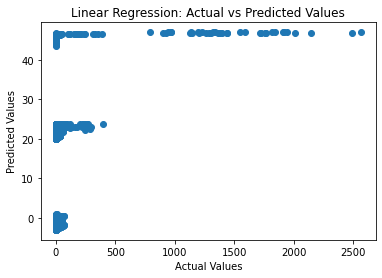

In [11]:
plt.scatter(y_test, lr_model_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

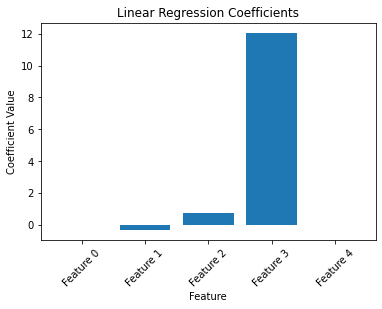

In [14]:
# Get coefficients and corresponding feature names
coefficients = lr_model.coef_
feature_names = [f"Feature {i}" for i in range(len(coefficients))]

# Plotting
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

Radom Forest Regressor

In [12]:

from sklearn.ensemble import RandomForestRegressor

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_test)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_model_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_model_pred)
rf_mae = mean_absolute_error(y_test, rf_model_pred)

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive values
rf_cv_scores_positive = -rf_cv_scores



print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)
print("CV Scores (Mean Squared Error):", rf_cv_scores_positive)
print("Average CV Score:", np.mean(rf_cv_scores_positive))
print("Feature Importances:", rf_model.feature_importances_)


# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  14:52:24
----------------------------------
Mean Squared Error: 4132.9789140540815
Root Mean Squared Error: 64.28824864665455
Mean Absolute Error: 9.700623129115945
R^2 Score: 0.08391662256604182
CV Scores (Mean Squared Error): [29.13589527 37.7003532  68.27587807 48.32729855 37.31215881]
Average CV Score: 44.15031678123394
Feature Importances: [0.10127274 0.17433309 0.67137687 0.04873089 0.0042864 ]
----------------------------------
Elapsed time: 1.34 minutes


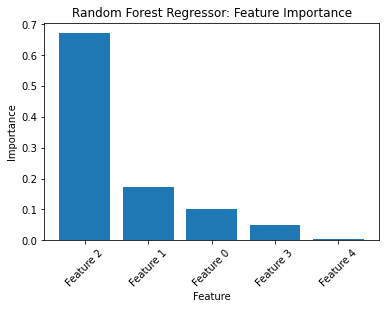

In [13]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get feature names (if available)
feature_names = [f"Feature {i}" for i in range(len(feature_importances))]

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Regressor: Feature Importance')
plt.show()

Gradient Boosting Machines (GBM): Models like XGBoost, LightGBM, or CatBoost are very popular for their performance in a variety of tasks. They can handle non-linear relationships and interactions between features effectively.

In [20]:
import xgboost as xgb



# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    # Add other parameters as needed
}

xgb_model = xgb.XGBRegressor()
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')

xgb_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_

# Predictions
xgb_pred = best_xgb_model.predict(X_test)

# Evaluation
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

# Cross-Validation Scores
xgb_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores_positive = -xgb_cv_scores

print("XGBoost Evaluation Metrics")
print("Mean Squared Error:", xgb_mse)
print("Root Mean Squared Error:", xgb_rmse)
print("Mean Absolute Error:", xgb_mae)
print("R^2 Score:", xgb_r2)
print("CV Scores (Mean Squared Error):", xgb_cv_scores_positive)
print("Average CV Score:", np.mean(xgb_cv_scores_positive))


# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  14:59:47
----------------------------------
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 300}
XGBoost Evaluation Metrics
Mean Squared Error: 5330.602370835773
Root Mean Squared Error: 73.01097431780906
Mean Absolute Error: 14.878010856842975
R^2 Score: -0.18153910900131964
CV Scores (Mean Squared Error): [33.49716833 39.31065333 64.42457273 37.01470288 35.01309017]
Average CV Score: 41.85203748926827
----------------------------------
Elapsed time: 0.32 minutes


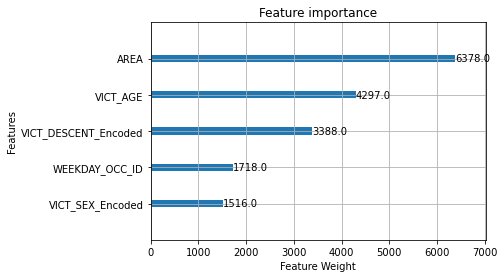

In [21]:
xgb.plot_importance(best_xgb_model, importance_type='weight', xlabel='Feature Weight')
plt.show()

In [24]:
from catboost import CatBoostRegressor, Pool

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for CatBoost
cat_param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
}


cat_model = CatBoostRegressor()
cat_grid_search = GridSearchCV(cat_model, cat_param_grid, cv=5, scoring='neg_mean_squared_error')
cat_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for CatBoost:", cat_grid_search.best_params_)
best_cat_model = cat_grid_search.best_estimator_

# Predictions
cat_pred = best_cat_model.predict(X_test)

pool = Pool(X_train, label=y_train)

# Evaluation
cat_mse = mean_squared_error(y_test, cat_pred)
cat_rmse = np.sqrt(cat_mse)
cat_r2 = r2_score(y_test, cat_pred)
cat_mae = mean_absolute_error(y_test, cat_pred)

# Cross-Validation Scores
cat_cv_scores = cross_val_score(best_cat_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cat_cv_scores_positive = -cat_cv_scores

print("CatBoost Evaluation Metrics")
print("Mean Squared Error:", cat_mse)
print("Root Mean Squared Error:", cat_rmse)
print("Mean Absolute Error:", cat_mae)
print("R^2 Score:", cat_r2)
print("CV Scores (Mean Squared Error):", cat_cv_scores_positive)
print("Average CV Score:", np.mean(cat_cv_scores_positive))


# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  15:02:02
----------------------------------
0:	learn: 61.2775634	total: 66.3ms	remaining: 1m 6s
1:	learn: 60.7624057	total: 68.7ms	remaining: 34.3s
2:	learn: 60.2626066	total: 71.2ms	remaining: 23.7s
3:	learn: 59.7612683	total: 74ms	remaining: 18.4s
4:	learn: 59.2717553	total: 76.3ms	remaining: 15.2s
5:	learn: 58.7779329	total: 78.8ms	remaining: 13s
6:	learn: 58.2899191	total: 81.4ms	remaining: 11.5s
7:	learn: 57.8155669	total: 83.9ms	remaining: 10.4s
8:	learn: 57.3376578	total: 86.1ms	remaining: 9.48s
9:	learn: 56.8631388	total: 88.9ms	remaining: 8.8s
10:	learn: 56.3964836	total: 91.5ms	remaining: 8.23s
11:	learn: 55.9336165	total: 94ms	remaining: 7.74s
12:	learn: 55.4776995	total: 97.5ms	remaining: 7.41s
13:	learn: 55.0247323	total: 100ms	remaining: 7.05s
14:	learn: 54.5839936	total: 102ms	remaining: 6.72s
15:	learn: 54.1429377	total: 105ms	remaining: 6.46s
16:	learn: 53.7065955	total: 107ms	remaining: 6.2s
17:	learn: 53.2901086	total: 110ms	remaining: 5.98s
18:	learn: 5

165:	learn: 23.2426899	total: 544ms	remaining: 2.73s
166:	learn: 23.1733233	total: 548ms	remaining: 2.73s
167:	learn: 23.1068810	total: 551ms	remaining: 2.73s
168:	learn: 23.0310874	total: 555ms	remaining: 2.73s
169:	learn: 22.9668224	total: 558ms	remaining: 2.73s
170:	learn: 22.9027047	total: 561ms	remaining: 2.72s
171:	learn: 22.8378319	total: 564ms	remaining: 2.72s
172:	learn: 22.7655428	total: 567ms	remaining: 2.71s
173:	learn: 22.7015932	total: 570ms	remaining: 2.71s
174:	learn: 22.6310864	total: 574ms	remaining: 2.7s
175:	learn: 22.5702237	total: 577ms	remaining: 2.7s
176:	learn: 22.5089434	total: 580ms	remaining: 2.7s
177:	learn: 22.4505903	total: 583ms	remaining: 2.69s
178:	learn: 22.3913554	total: 586ms	remaining: 2.69s
179:	learn: 22.3322977	total: 590ms	remaining: 2.69s
180:	learn: 22.2767856	total: 593ms	remaining: 2.68s
181:	learn: 22.2110836	total: 596ms	remaining: 2.68s
182:	learn: 22.1546364	total: 598ms	remaining: 2.67s
183:	learn: 22.0903895	total: 602ms	remaining: 2.

350:	learn: 17.1905280	total: 1.13s	remaining: 2.08s
351:	learn: 17.1691468	total: 1.13s	remaining: 2.08s
352:	learn: 17.1576417	total: 1.13s	remaining: 2.08s
353:	learn: 17.1454830	total: 1.14s	remaining: 2.07s
354:	learn: 17.1360952	total: 1.14s	remaining: 2.07s
355:	learn: 17.1251809	total: 1.14s	remaining: 2.07s
356:	learn: 17.1141109	total: 1.15s	remaining: 2.06s
357:	learn: 17.0950849	total: 1.15s	remaining: 2.06s
358:	learn: 17.0823107	total: 1.15s	remaining: 2.06s
359:	learn: 17.0718309	total: 1.16s	remaining: 2.05s
360:	learn: 17.0612882	total: 1.16s	remaining: 2.05s
361:	learn: 17.0512208	total: 1.16s	remaining: 2.05s
362:	learn: 17.0390586	total: 1.17s	remaining: 2.05s
363:	learn: 17.0283538	total: 1.17s	remaining: 2.04s
364:	learn: 17.0186109	total: 1.17s	remaining: 2.04s
365:	learn: 17.0004549	total: 1.18s	remaining: 2.04s
366:	learn: 16.9906820	total: 1.18s	remaining: 2.04s
367:	learn: 16.9799840	total: 1.18s	remaining: 2.03s
368:	learn: 16.9707232	total: 1.19s	remaining:

532:	learn: 15.8705763	total: 1.71s	remaining: 1.5s
533:	learn: 15.8681255	total: 1.71s	remaining: 1.49s
534:	learn: 15.8622677	total: 1.72s	remaining: 1.49s
535:	learn: 15.8565221	total: 1.72s	remaining: 1.49s
536:	learn: 15.8516130	total: 1.72s	remaining: 1.48s
537:	learn: 15.8475475	total: 1.73s	remaining: 1.48s
538:	learn: 15.8448945	total: 1.73s	remaining: 1.48s
539:	learn: 15.8393447	total: 1.73s	remaining: 1.48s
540:	learn: 15.8361472	total: 1.74s	remaining: 1.47s
541:	learn: 15.8339388	total: 1.74s	remaining: 1.47s
542:	learn: 15.8316250	total: 1.74s	remaining: 1.47s
543:	learn: 15.8293829	total: 1.75s	remaining: 1.46s
544:	learn: 15.8269174	total: 1.75s	remaining: 1.46s
545:	learn: 15.8227688	total: 1.75s	remaining: 1.46s
546:	learn: 15.8160192	total: 1.75s	remaining: 1.45s
547:	learn: 15.8130245	total: 1.76s	remaining: 1.45s
548:	learn: 15.8086048	total: 1.76s	remaining: 1.45s
549:	learn: 15.8040100	total: 1.76s	remaining: 1.44s
550:	learn: 15.7989990	total: 1.77s	remaining: 

716:	learn: 15.1173612	total: 2.29s	remaining: 906ms
717:	learn: 15.1163602	total: 2.3s	remaining: 902ms
718:	learn: 15.1153034	total: 2.3s	remaining: 899ms
719:	learn: 15.1124162	total: 2.3s	remaining: 896ms
720:	learn: 15.1104255	total: 2.31s	remaining: 893ms
721:	learn: 15.1069445	total: 2.31s	remaining: 890ms
722:	learn: 15.1036676	total: 2.31s	remaining: 886ms
723:	learn: 15.0998754	total: 2.32s	remaining: 883ms
724:	learn: 15.0984784	total: 2.32s	remaining: 880ms
725:	learn: 15.0974903	total: 2.32s	remaining: 877ms
726:	learn: 15.0965145	total: 2.33s	remaining: 874ms
727:	learn: 15.0950041	total: 2.33s	remaining: 871ms
728:	learn: 15.0930422	total: 2.33s	remaining: 867ms
729:	learn: 15.0917298	total: 2.34s	remaining: 864ms
730:	learn: 15.0896593	total: 2.34s	remaining: 861ms
731:	learn: 15.0881056	total: 2.34s	remaining: 858ms
732:	learn: 15.0865941	total: 2.35s	remaining: 855ms
733:	learn: 15.0848419	total: 2.35s	remaining: 851ms
734:	learn: 15.0835660	total: 2.35s	remaining: 84

902:	learn: 14.6545076	total: 2.88s	remaining: 309ms
903:	learn: 14.6522558	total: 2.88s	remaining: 306ms
904:	learn: 14.6512860	total: 2.88s	remaining: 303ms
905:	learn: 14.6503145	total: 2.88s	remaining: 299ms
906:	learn: 14.6490867	total: 2.89s	remaining: 296ms
907:	learn: 14.6476566	total: 2.89s	remaining: 293ms
908:	learn: 14.6470419	total: 2.9s	remaining: 290ms
909:	learn: 14.6456568	total: 2.9s	remaining: 287ms
910:	learn: 14.6429774	total: 2.9s	remaining: 284ms
911:	learn: 14.6420534	total: 2.91s	remaining: 280ms
912:	learn: 14.6392567	total: 2.91s	remaining: 277ms
913:	learn: 14.6385686	total: 2.91s	remaining: 274ms
914:	learn: 14.6346443	total: 2.92s	remaining: 271ms
915:	learn: 14.6140352	total: 2.92s	remaining: 268ms
916:	learn: 14.6126503	total: 2.92s	remaining: 265ms
917:	learn: 14.6114767	total: 2.93s	remaining: 261ms
918:	learn: 14.6100899	total: 2.93s	remaining: 258ms
919:	learn: 14.6088286	total: 2.93s	remaining: 255ms
920:	learn: 14.6083234	total: 2.94s	remaining: 25

90:	learn: 31.3214724	total: 247ms	remaining: 2.47s
91:	learn: 31.1441656	total: 250ms	remaining: 2.46s
92:	learn: 30.9645417	total: 253ms	remaining: 2.46s
93:	learn: 30.7904773	total: 255ms	remaining: 2.46s
94:	learn: 30.6158019	total: 258ms	remaining: 2.46s
95:	learn: 30.4424670	total: 261ms	remaining: 2.46s
96:	learn: 30.2701816	total: 264ms	remaining: 2.46s
97:	learn: 30.1052278	total: 268ms	remaining: 2.46s
98:	learn: 29.9385071	total: 271ms	remaining: 2.46s
99:	learn: 29.7762730	total: 274ms	remaining: 2.46s
100:	learn: 29.6138411	total: 277ms	remaining: 2.46s
101:	learn: 29.4578333	total: 279ms	remaining: 2.46s
102:	learn: 29.2998401	total: 282ms	remaining: 2.45s
103:	learn: 29.1488020	total: 284ms	remaining: 2.45s
104:	learn: 28.9948259	total: 287ms	remaining: 2.45s
105:	learn: 28.8455125	total: 290ms	remaining: 2.45s
106:	learn: 28.6993448	total: 293ms	remaining: 2.44s
107:	learn: 28.5569501	total: 296ms	remaining: 2.44s
108:	learn: 28.4111769	total: 298ms	remaining: 2.44s
109

290:	learn: 17.9690752	total: 833ms	remaining: 2.03s
291:	learn: 17.9541810	total: 836ms	remaining: 2.03s
292:	learn: 17.9259725	total: 840ms	remaining: 2.02s
293:	learn: 17.9034646	total: 843ms	remaining: 2.02s
294:	learn: 17.8895352	total: 847ms	remaining: 2.02s
295:	learn: 17.8618600	total: 850ms	remaining: 2.02s
296:	learn: 17.8368990	total: 853ms	remaining: 2.02s
297:	learn: 17.8152688	total: 856ms	remaining: 2.02s
298:	learn: 17.8011009	total: 859ms	remaining: 2.01s
299:	learn: 17.7842713	total: 861ms	remaining: 2.01s
300:	learn: 17.7712735	total: 864ms	remaining: 2.01s
301:	learn: 17.7473503	total: 867ms	remaining: 2s
302:	learn: 17.7263507	total: 871ms	remaining: 2s
303:	learn: 17.7127857	total: 873ms	remaining: 2s
304:	learn: 17.6905493	total: 876ms	remaining: 2s
305:	learn: 17.6624073	total: 879ms	remaining: 1.99s
306:	learn: 17.6405599	total: 882ms	remaining: 1.99s
307:	learn: 17.6204816	total: 884ms	remaining: 1.99s
308:	learn: 17.6088527	total: 888ms	remaining: 1.98s
309:	

484:	learn: 15.8377421	total: 1.42s	remaining: 1.5s
485:	learn: 15.8335816	total: 1.42s	remaining: 1.5s
486:	learn: 15.8279454	total: 1.42s	remaining: 1.5s
487:	learn: 15.8242240	total: 1.43s	remaining: 1.5s
488:	learn: 15.8194743	total: 1.43s	remaining: 1.49s
489:	learn: 15.8136143	total: 1.43s	remaining: 1.49s
490:	learn: 15.8106017	total: 1.44s	remaining: 1.49s
491:	learn: 15.8068359	total: 1.44s	remaining: 1.49s
492:	learn: 15.8027428	total: 1.44s	remaining: 1.48s
493:	learn: 15.7960714	total: 1.45s	remaining: 1.48s
494:	learn: 15.7895267	total: 1.45s	remaining: 1.48s
495:	learn: 15.7865420	total: 1.45s	remaining: 1.47s
496:	learn: 15.7801294	total: 1.45s	remaining: 1.47s
497:	learn: 15.7736496	total: 1.46s	remaining: 1.47s
498:	learn: 15.7679879	total: 1.46s	remaining: 1.47s
499:	learn: 15.7628473	total: 1.46s	remaining: 1.46s
500:	learn: 15.7575518	total: 1.47s	remaining: 1.46s
501:	learn: 15.7536950	total: 1.47s	remaining: 1.46s
502:	learn: 15.7502804	total: 1.47s	remaining: 1.4

678:	learn: 15.0790635	total: 2s	remaining: 948ms
679:	learn: 15.0776265	total: 2.01s	remaining: 945ms
680:	learn: 15.0750638	total: 2.01s	remaining: 943ms
681:	learn: 15.0738282	total: 2.02s	remaining: 940ms
682:	learn: 15.0714575	total: 2.02s	remaining: 937ms
683:	learn: 15.0702842	total: 2.02s	remaining: 934ms
684:	learn: 15.0674669	total: 2.02s	remaining: 931ms
685:	learn: 15.0644779	total: 2.03s	remaining: 928ms
686:	learn: 15.0627994	total: 2.03s	remaining: 925ms
687:	learn: 15.0602270	total: 2.03s	remaining: 922ms
688:	learn: 15.0583113	total: 2.04s	remaining: 919ms
689:	learn: 15.0566147	total: 2.04s	remaining: 916ms
690:	learn: 15.0454007	total: 2.04s	remaining: 913ms
691:	learn: 15.0435374	total: 2.04s	remaining: 910ms
692:	learn: 15.0410606	total: 2.05s	remaining: 907ms
693:	learn: 15.0218165	total: 2.05s	remaining: 904ms
694:	learn: 15.0097471	total: 2.05s	remaining: 901ms
695:	learn: 15.0064221	total: 2.06s	remaining: 898ms
696:	learn: 15.0055636	total: 2.06s	remaining: 89

870:	learn: 14.4425797	total: 2.59s	remaining: 383ms
871:	learn: 14.4418312	total: 2.59s	remaining: 380ms
872:	learn: 14.4382979	total: 2.59s	remaining: 377ms
873:	learn: 14.4368604	total: 2.6s	remaining: 374ms
874:	learn: 14.4353739	total: 2.6s	remaining: 372ms
875:	learn: 14.4288106	total: 2.6s	remaining: 369ms
876:	learn: 14.4262945	total: 2.61s	remaining: 366ms
877:	learn: 14.4252028	total: 2.61s	remaining: 363ms
878:	learn: 14.4245677	total: 2.61s	remaining: 360ms
879:	learn: 14.4220285	total: 2.62s	remaining: 357ms
880:	learn: 14.4196881	total: 2.62s	remaining: 354ms
881:	learn: 14.4170012	total: 2.62s	remaining: 351ms
882:	learn: 14.4152842	total: 2.63s	remaining: 348ms
883:	learn: 14.4140275	total: 2.63s	remaining: 345ms
884:	learn: 14.4132479	total: 2.63s	remaining: 342ms
885:	learn: 14.4116208	total: 2.63s	remaining: 339ms
886:	learn: 14.4097485	total: 2.64s	remaining: 336ms
887:	learn: 14.4085465	total: 2.64s	remaining: 333ms
888:	learn: 14.4072642	total: 2.64s	remaining: 33

60:	learn: 38.5474560	total: 166ms	remaining: 2.56s
61:	learn: 38.2912868	total: 169ms	remaining: 2.56s
62:	learn: 38.0405072	total: 172ms	remaining: 2.56s
63:	learn: 37.7827061	total: 176ms	remaining: 2.57s
64:	learn: 37.5356815	total: 179ms	remaining: 2.57s
65:	learn: 37.2975384	total: 182ms	remaining: 2.58s
66:	learn: 37.0491179	total: 186ms	remaining: 2.59s
67:	learn: 36.8054335	total: 189ms	remaining: 2.58s
68:	learn: 36.5677206	total: 192ms	remaining: 2.59s
69:	learn: 36.3352826	total: 195ms	remaining: 2.59s
70:	learn: 36.0986864	total: 198ms	remaining: 2.59s
71:	learn: 35.8740076	total: 201ms	remaining: 2.58s
72:	learn: 35.6435773	total: 203ms	remaining: 2.58s
73:	learn: 35.4229582	total: 206ms	remaining: 2.58s
74:	learn: 35.2047695	total: 209ms	remaining: 2.58s
75:	learn: 34.9928041	total: 212ms	remaining: 2.58s
76:	learn: 34.7793070	total: 215ms	remaining: 2.58s
77:	learn: 34.5679671	total: 218ms	remaining: 2.58s
78:	learn: 34.3600252	total: 221ms	remaining: 2.58s
79:	learn: 3

239:	learn: 19.6715386	total: 745ms	remaining: 2.36s
240:	learn: 19.6261295	total: 749ms	remaining: 2.36s
241:	learn: 19.5868362	total: 752ms	remaining: 2.36s
242:	learn: 19.5479604	total: 757ms	remaining: 2.36s
243:	learn: 19.5144593	total: 761ms	remaining: 2.36s
244:	learn: 19.4893281	total: 764ms	remaining: 2.35s
245:	learn: 19.4576072	total: 768ms	remaining: 2.35s
246:	learn: 19.4143743	total: 771ms	remaining: 2.35s
247:	learn: 19.3885177	total: 774ms	remaining: 2.35s
248:	learn: 19.3576112	total: 777ms	remaining: 2.34s
249:	learn: 19.3166069	total: 781ms	remaining: 2.34s
250:	learn: 19.2931330	total: 784ms	remaining: 2.34s
251:	learn: 19.2700376	total: 787ms	remaining: 2.34s
252:	learn: 19.2399050	total: 790ms	remaining: 2.33s
253:	learn: 19.2102387	total: 793ms	remaining: 2.33s
254:	learn: 19.1796423	total: 797ms	remaining: 2.33s
255:	learn: 19.1508373	total: 800ms	remaining: 2.33s
256:	learn: 19.1276626	total: 803ms	remaining: 2.32s
257:	learn: 19.0984347	total: 806ms	remaining:

419:	learn: 16.3883511	total: 1.33s	remaining: 1.83s
420:	learn: 16.3818320	total: 1.33s	remaining: 1.83s
421:	learn: 16.3758171	total: 1.33s	remaining: 1.83s
422:	learn: 16.3687490	total: 1.34s	remaining: 1.82s
423:	learn: 16.3589689	total: 1.34s	remaining: 1.82s
424:	learn: 16.3532297	total: 1.34s	remaining: 1.82s
425:	learn: 16.3471181	total: 1.35s	remaining: 1.82s
426:	learn: 16.3398475	total: 1.35s	remaining: 1.81s
427:	learn: 16.3245182	total: 1.36s	remaining: 1.81s
428:	learn: 16.3178110	total: 1.36s	remaining: 1.81s
429:	learn: 16.3118905	total: 1.36s	remaining: 1.81s
430:	learn: 16.3048935	total: 1.36s	remaining: 1.8s
431:	learn: 16.2991566	total: 1.37s	remaining: 1.8s
432:	learn: 16.2922882	total: 1.37s	remaining: 1.8s
433:	learn: 16.2862211	total: 1.37s	remaining: 1.79s
434:	learn: 16.2796312	total: 1.38s	remaining: 1.79s
435:	learn: 16.2743877	total: 1.38s	remaining: 1.78s
436:	learn: 16.2652414	total: 1.38s	remaining: 1.78s
437:	learn: 16.2593707	total: 1.39s	remaining: 1.

613:	learn: 15.3772488	total: 2.1s	remaining: 1.32s
614:	learn: 15.3744714	total: 2.1s	remaining: 1.32s
615:	learn: 15.3717652	total: 2.11s	remaining: 1.31s
616:	learn: 15.3701985	total: 2.11s	remaining: 1.31s
617:	learn: 15.3682995	total: 2.12s	remaining: 1.31s
618:	learn: 15.3552550	total: 2.12s	remaining: 1.3s
619:	learn: 15.3525935	total: 2.13s	remaining: 1.3s
620:	learn: 15.3504419	total: 2.13s	remaining: 1.3s
621:	learn: 15.3422205	total: 2.13s	remaining: 1.3s
622:	learn: 15.3398612	total: 2.14s	remaining: 1.29s
623:	learn: 15.3380661	total: 2.14s	remaining: 1.29s
624:	learn: 15.3348766	total: 2.15s	remaining: 1.29s
625:	learn: 15.3336074	total: 2.15s	remaining: 1.28s
626:	learn: 15.3320502	total: 2.15s	remaining: 1.28s
627:	learn: 15.3302832	total: 2.16s	remaining: 1.28s
628:	learn: 15.3289476	total: 2.16s	remaining: 1.27s
629:	learn: 15.3220066	total: 2.17s	remaining: 1.27s
630:	learn: 15.3187495	total: 2.17s	remaining: 1.27s
631:	learn: 15.3157318	total: 2.17s	remaining: 1.26s

788:	learn: 14.8205139	total: 2.68s	remaining: 718ms
789:	learn: 14.8191071	total: 2.69s	remaining: 714ms
790:	learn: 14.8167150	total: 2.69s	remaining: 711ms
791:	learn: 14.8158800	total: 2.69s	remaining: 707ms
792:	learn: 14.8138000	total: 2.7s	remaining: 704ms
793:	learn: 14.8125635	total: 2.7s	remaining: 701ms
794:	learn: 14.8062824	total: 2.7s	remaining: 697ms
795:	learn: 14.8048058	total: 2.71s	remaining: 694ms
796:	learn: 14.8019889	total: 2.71s	remaining: 690ms
797:	learn: 14.8010792	total: 2.71s	remaining: 687ms
798:	learn: 14.7897603	total: 2.71s	remaining: 683ms
799:	learn: 14.7791373	total: 2.72s	remaining: 680ms
800:	learn: 14.7776524	total: 2.72s	remaining: 676ms
801:	learn: 14.7761303	total: 2.73s	remaining: 673ms
802:	learn: 14.7651551	total: 2.73s	remaining: 669ms
803:	learn: 14.7442479	total: 2.73s	remaining: 666ms
804:	learn: 14.7354282	total: 2.73s	remaining: 662ms
805:	learn: 14.7340437	total: 2.74s	remaining: 659ms
806:	learn: 14.7305637	total: 2.74s	remaining: 65

977:	learn: 14.1959364	total: 3.27s	remaining: 73.6ms
978:	learn: 14.1919579	total: 3.27s	remaining: 70.2ms
979:	learn: 14.1893873	total: 3.28s	remaining: 66.9ms
980:	learn: 14.1828949	total: 3.28s	remaining: 63.5ms
981:	learn: 14.1818271	total: 3.28s	remaining: 60.2ms
982:	learn: 14.1767843	total: 3.29s	remaining: 56.8ms
983:	learn: 14.1713379	total: 3.29s	remaining: 53.5ms
984:	learn: 14.1700202	total: 3.29s	remaining: 50.1ms
985:	learn: 14.1689998	total: 3.29s	remaining: 46.8ms
986:	learn: 14.1679853	total: 3.3s	remaining: 43.4ms
987:	learn: 14.1658955	total: 3.3s	remaining: 40.1ms
988:	learn: 14.1641150	total: 3.3s	remaining: 36.8ms
989:	learn: 14.1628076	total: 3.31s	remaining: 33.4ms
990:	learn: 14.1608646	total: 3.31s	remaining: 30.1ms
991:	learn: 14.1590248	total: 3.31s	remaining: 26.7ms
992:	learn: 14.1565731	total: 3.32s	remaining: 23.4ms
993:	learn: 14.1490740	total: 3.32s	remaining: 20ms
994:	learn: 14.1485455	total: 3.32s	remaining: 16.7ms
995:	learn: 14.1410271	total: 3.3

167:	learn: 22.3618291	total: 481ms	remaining: 2.38s
168:	learn: 22.2875018	total: 484ms	remaining: 2.38s
169:	learn: 22.2229713	total: 488ms	remaining: 2.38s
170:	learn: 22.1582189	total: 491ms	remaining: 2.38s
171:	learn: 22.0930319	total: 494ms	remaining: 2.38s
172:	learn: 22.0222334	total: 498ms	remaining: 2.38s
173:	learn: 21.9580286	total: 501ms	remaining: 2.38s
174:	learn: 21.8945817	total: 504ms	remaining: 2.37s
175:	learn: 21.8332121	total: 507ms	remaining: 2.37s
176:	learn: 21.7714257	total: 510ms	remaining: 2.37s
177:	learn: 21.7125425	total: 513ms	remaining: 2.37s
178:	learn: 21.6526628	total: 516ms	remaining: 2.37s
179:	learn: 21.5841737	total: 518ms	remaining: 2.36s
180:	learn: 21.5279639	total: 521ms	remaining: 2.36s
181:	learn: 21.4639217	total: 525ms	remaining: 2.36s
182:	learn: 21.4072000	total: 527ms	remaining: 2.35s
183:	learn: 21.3446142	total: 531ms	remaining: 2.35s
184:	learn: 21.2906880	total: 534ms	remaining: 2.35s
185:	learn: 21.2367378	total: 536ms	remaining:

365:	learn: 16.4080417	total: 1.06s	remaining: 1.84s
366:	learn: 16.3977378	total: 1.07s	remaining: 1.84s
367:	learn: 16.3873992	total: 1.07s	remaining: 1.84s
368:	learn: 16.3776223	total: 1.07s	remaining: 1.84s
369:	learn: 16.3688604	total: 1.08s	remaining: 1.84s
370:	learn: 16.3546400	total: 1.08s	remaining: 1.84s
371:	learn: 16.3371989	total: 1.09s	remaining: 1.83s
372:	learn: 16.3273733	total: 1.09s	remaining: 1.83s
373:	learn: 16.3173649	total: 1.09s	remaining: 1.83s
374:	learn: 16.3080489	total: 1.1s	remaining: 1.83s
375:	learn: 16.2983728	total: 1.1s	remaining: 1.82s
376:	learn: 16.2893761	total: 1.1s	remaining: 1.82s
377:	learn: 16.2801423	total: 1.11s	remaining: 1.82s
378:	learn: 16.2712308	total: 1.11s	remaining: 1.82s
379:	learn: 16.2627262	total: 1.11s	remaining: 1.82s
380:	learn: 16.2466276	total: 1.12s	remaining: 1.81s
381:	learn: 16.2381940	total: 1.12s	remaining: 1.81s
382:	learn: 16.2220910	total: 1.12s	remaining: 1.81s
383:	learn: 16.2106839	total: 1.13s	remaining: 1.

540:	learn: 15.1968117	total: 1.64s	remaining: 1.39s
541:	learn: 15.1928358	total: 1.65s	remaining: 1.39s
542:	learn: 15.1905757	total: 1.65s	remaining: 1.39s
543:	learn: 15.1883886	total: 1.65s	remaining: 1.39s
544:	learn: 15.1845222	total: 1.66s	remaining: 1.38s
545:	learn: 15.1802939	total: 1.66s	remaining: 1.38s
546:	learn: 15.1770613	total: 1.66s	remaining: 1.38s
547:	learn: 15.1743272	total: 1.67s	remaining: 1.38s
548:	learn: 15.1699318	total: 1.67s	remaining: 1.37s
549:	learn: 15.1669025	total: 1.67s	remaining: 1.37s
550:	learn: 15.1622619	total: 1.68s	remaining: 1.37s
551:	learn: 15.1570797	total: 1.68s	remaining: 1.36s
552:	learn: 15.1532801	total: 1.68s	remaining: 1.36s
553:	learn: 15.1468463	total: 1.69s	remaining: 1.36s
554:	learn: 15.1435683	total: 1.69s	remaining: 1.35s
555:	learn: 15.1358962	total: 1.69s	remaining: 1.35s
556:	learn: 15.1319000	total: 1.7s	remaining: 1.35s
557:	learn: 15.1275420	total: 1.7s	remaining: 1.35s
558:	learn: 15.1238467	total: 1.7s	remaining: 1.

729:	learn: 14.5605819	total: 2.23s	remaining: 825ms
730:	learn: 14.5588130	total: 2.23s	remaining: 822ms
731:	learn: 14.5572740	total: 2.24s	remaining: 819ms
732:	learn: 14.5557688	total: 2.24s	remaining: 816ms
733:	learn: 14.5536384	total: 2.24s	remaining: 813ms
734:	learn: 14.5526079	total: 2.25s	remaining: 810ms
735:	learn: 14.5515356	total: 2.25s	remaining: 807ms
736:	learn: 14.5498977	total: 2.25s	remaining: 804ms
737:	learn: 14.5486087	total: 2.26s	remaining: 801ms
738:	learn: 14.5469307	total: 2.26s	remaining: 798ms
739:	learn: 14.5452929	total: 2.26s	remaining: 795ms
740:	learn: 14.5442324	total: 2.27s	remaining: 792ms
741:	learn: 14.5420517	total: 2.27s	remaining: 789ms
742:	learn: 14.5404034	total: 2.27s	remaining: 786ms
743:	learn: 14.5364543	total: 2.27s	remaining: 782ms
744:	learn: 14.5344085	total: 2.28s	remaining: 779ms
745:	learn: 14.5324388	total: 2.28s	remaining: 776ms
746:	learn: 14.5306420	total: 2.28s	remaining: 773ms
747:	learn: 14.5166288	total: 2.29s	remaining:

907:	learn: 14.0786294	total: 2.81s	remaining: 285ms
908:	learn: 14.0780515	total: 2.82s	remaining: 282ms
909:	learn: 14.0766819	total: 2.82s	remaining: 279ms
910:	learn: 14.0742751	total: 2.83s	remaining: 276ms
911:	learn: 14.0727895	total: 2.83s	remaining: 273ms
912:	learn: 14.0698508	total: 2.83s	remaining: 270ms
913:	learn: 14.0691691	total: 2.84s	remaining: 267ms
914:	learn: 14.0678407	total: 2.84s	remaining: 264ms
915:	learn: 14.0590305	total: 2.85s	remaining: 261ms
916:	learn: 14.0578016	total: 2.85s	remaining: 258ms
917:	learn: 14.0566516	total: 2.85s	remaining: 255ms
918:	learn: 14.0553213	total: 2.86s	remaining: 252ms
919:	learn: 14.0540738	total: 2.86s	remaining: 249ms
920:	learn: 14.0535718	total: 2.86s	remaining: 246ms
921:	learn: 14.0522478	total: 2.87s	remaining: 242ms
922:	learn: 14.0511411	total: 2.87s	remaining: 239ms
923:	learn: 14.0500843	total: 2.87s	remaining: 236ms
924:	learn: 14.0489098	total: 2.88s	remaining: 233ms
925:	learn: 14.0400606	total: 2.88s	remaining:

91:	learn: 30.4066666	total: 253ms	remaining: 2.49s
92:	learn: 30.2401769	total: 256ms	remaining: 2.5s
93:	learn: 30.0743468	total: 259ms	remaining: 2.49s
94:	learn: 29.9126885	total: 262ms	remaining: 2.5s
95:	learn: 29.7563304	total: 265ms	remaining: 2.5s
96:	learn: 29.5978545	total: 268ms	remaining: 2.5s
97:	learn: 29.4464909	total: 271ms	remaining: 2.5s
98:	learn: 29.2930541	total: 274ms	remaining: 2.49s
99:	learn: 29.1452391	total: 277ms	remaining: 2.49s
100:	learn: 28.9942856	total: 280ms	remaining: 2.49s
101:	learn: 28.8497450	total: 282ms	remaining: 2.48s
102:	learn: 28.7072591	total: 285ms	remaining: 2.48s
103:	learn: 28.5616861	total: 287ms	remaining: 2.48s
104:	learn: 28.4240265	total: 291ms	remaining: 2.48s
105:	learn: 28.2857888	total: 293ms	remaining: 2.47s
106:	learn: 28.1451523	total: 296ms	remaining: 2.47s
107:	learn: 28.0122729	total: 299ms	remaining: 2.47s
108:	learn: 27.8756807	total: 302ms	remaining: 2.46s
109:	learn: 27.7392400	total: 305ms	remaining: 2.46s
110:	le

288:	learn: 17.8041733	total: 838ms	remaining: 2.06s
289:	learn: 17.7897420	total: 842ms	remaining: 2.06s
290:	learn: 17.7743265	total: 845ms	remaining: 2.06s
291:	learn: 17.7526154	total: 848ms	remaining: 2.06s
292:	learn: 17.7332319	total: 851ms	remaining: 2.05s
293:	learn: 17.7110016	total: 854ms	remaining: 2.05s
294:	learn: 17.6972223	total: 857ms	remaining: 2.05s
295:	learn: 17.6782127	total: 861ms	remaining: 2.05s
296:	learn: 17.6627988	total: 864ms	remaining: 2.04s
297:	learn: 17.6412314	total: 867ms	remaining: 2.04s
298:	learn: 17.6262530	total: 870ms	remaining: 2.04s
299:	learn: 17.6077787	total: 873ms	remaining: 2.04s
300:	learn: 17.5948842	total: 876ms	remaining: 2.04s
301:	learn: 17.5707148	total: 880ms	remaining: 2.03s
302:	learn: 17.5526294	total: 883ms	remaining: 2.03s
303:	learn: 17.5375954	total: 887ms	remaining: 2.03s
304:	learn: 17.5226303	total: 889ms	remaining: 2.03s
305:	learn: 17.5007905	total: 893ms	remaining: 2.02s
306:	learn: 17.4833688	total: 896ms	remaining:

471:	learn: 15.7760574	total: 1.42s	remaining: 1.59s
472:	learn: 15.7677541	total: 1.42s	remaining: 1.59s
473:	learn: 15.7630905	total: 1.43s	remaining: 1.58s
474:	learn: 15.7589598	total: 1.43s	remaining: 1.58s
475:	learn: 15.7543307	total: 1.44s	remaining: 1.58s
476:	learn: 15.7484004	total: 1.44s	remaining: 1.58s
477:	learn: 15.7436430	total: 1.44s	remaining: 1.57s
478:	learn: 15.7291252	total: 1.44s	remaining: 1.57s
479:	learn: 15.7231034	total: 1.45s	remaining: 1.57s
480:	learn: 15.7155034	total: 1.45s	remaining: 1.56s
481:	learn: 15.7095817	total: 1.45s	remaining: 1.56s
482:	learn: 15.7042776	total: 1.46s	remaining: 1.56s
483:	learn: 15.6998995	total: 1.46s	remaining: 1.56s
484:	learn: 15.6919787	total: 1.46s	remaining: 1.55s
485:	learn: 15.6871037	total: 1.47s	remaining: 1.55s
486:	learn: 15.6816463	total: 1.47s	remaining: 1.55s
487:	learn: 15.6673843	total: 1.47s	remaining: 1.54s
488:	learn: 15.6631448	total: 1.48s	remaining: 1.54s
489:	learn: 15.6573399	total: 1.48s	remaining:

655:	learn: 15.0395614	total: 2s	remaining: 1.05s
656:	learn: 15.0373189	total: 2.01s	remaining: 1.05s
657:	learn: 15.0345572	total: 2.01s	remaining: 1.04s
658:	learn: 15.0165204	total: 2.01s	remaining: 1.04s
659:	learn: 15.0024231	total: 2.02s	remaining: 1.04s
660:	learn: 14.9995997	total: 2.02s	remaining: 1.03s
661:	learn: 14.9986368	total: 2.02s	remaining: 1.03s
662:	learn: 14.9944650	total: 2.03s	remaining: 1.03s
663:	learn: 14.9922968	total: 2.03s	remaining: 1.03s
664:	learn: 14.9890127	total: 2.03s	remaining: 1.02s
665:	learn: 14.9849024	total: 2.04s	remaining: 1.02s
666:	learn: 14.9827824	total: 2.04s	remaining: 1.02s
667:	learn: 14.9801688	total: 2.04s	remaining: 1.01s
668:	learn: 14.9789082	total: 2.05s	remaining: 1.01s
669:	learn: 14.9763383	total: 2.05s	remaining: 1.01s
670:	learn: 14.9740220	total: 2.05s	remaining: 1.01s
671:	learn: 14.9724248	total: 2.06s	remaining: 1s
672:	learn: 14.9706588	total: 2.06s	remaining: 1s
673:	learn: 14.9691975	total: 2.06s	remaining: 998ms
67

844:	learn: 14.4710171	total: 2.58s	remaining: 474ms
845:	learn: 14.4679939	total: 2.59s	remaining: 471ms
846:	learn: 14.4666561	total: 2.59s	remaining: 468ms
847:	learn: 14.4661706	total: 2.6s	remaining: 465ms
848:	learn: 14.4646362	total: 2.6s	remaining: 462ms
849:	learn: 14.4637240	total: 2.6s	remaining: 459ms
850:	learn: 14.4610039	total: 2.61s	remaining: 456ms
851:	learn: 14.4590269	total: 2.61s	remaining: 453ms
852:	learn: 14.4575285	total: 2.61s	remaining: 450ms
853:	learn: 14.4447248	total: 2.62s	remaining: 447ms
854:	learn: 14.4441312	total: 2.62s	remaining: 444ms
855:	learn: 14.4418884	total: 2.62s	remaining: 441ms
856:	learn: 14.4292661	total: 2.63s	remaining: 438ms
857:	learn: 14.4280739	total: 2.63s	remaining: 435ms
858:	learn: 14.4268076	total: 2.63s	remaining: 432ms
859:	learn: 14.4177096	total: 2.63s	remaining: 429ms
860:	learn: 14.4162642	total: 2.64s	remaining: 426ms
861:	learn: 14.4149003	total: 2.64s	remaining: 423ms
862:	learn: 14.4136231	total: 2.64s	remaining: 42

22:	learn: 19.7150256	total: 60.7ms	remaining: 2.58s
23:	learn: 19.4022414	total: 63.5ms	remaining: 2.58s
24:	learn: 19.1727154	total: 66.5ms	remaining: 2.59s
25:	learn: 18.8931134	total: 69.9ms	remaining: 2.62s
26:	learn: 18.6793229	total: 73.2ms	remaining: 2.64s
27:	learn: 18.3701737	total: 76.4ms	remaining: 2.65s
28:	learn: 18.2150805	total: 79.3ms	remaining: 2.65s
29:	learn: 18.0102153	total: 82.3ms	remaining: 2.66s
30:	learn: 17.8753900	total: 85.1ms	remaining: 2.66s
31:	learn: 17.7331458	total: 88.4ms	remaining: 2.67s
32:	learn: 17.6120777	total: 91.8ms	remaining: 2.69s
33:	learn: 17.4569157	total: 94.8ms	remaining: 2.69s
34:	learn: 17.3550587	total: 98.2ms	remaining: 2.71s
35:	learn: 17.1837504	total: 101ms	remaining: 2.71s
36:	learn: 17.0792682	total: 104ms	remaining: 2.71s
37:	learn: 16.9923694	total: 107ms	remaining: 2.72s
38:	learn: 16.9265627	total: 111ms	remaining: 2.72s
39:	learn: 16.8476378	total: 114ms	remaining: 2.73s
40:	learn: 16.7865685	total: 117ms	remaining: 2.73s

210:	learn: 11.4528530	total: 644ms	remaining: 2.41s
211:	learn: 11.4472891	total: 647ms	remaining: 2.4s
212:	learn: 11.4417890	total: 650ms	remaining: 2.4s
213:	learn: 11.3874852	total: 653ms	remaining: 2.4s
214:	learn: 11.3831546	total: 656ms	remaining: 2.39s
215:	learn: 11.3751188	total: 659ms	remaining: 2.39s
216:	learn: 11.3656724	total: 662ms	remaining: 2.39s
217:	learn: 11.3475538	total: 666ms	remaining: 2.39s
218:	learn: 11.3430076	total: 669ms	remaining: 2.38s
219:	learn: 11.3343496	total: 672ms	remaining: 2.38s
220:	learn: 11.3297920	total: 676ms	remaining: 2.38s
221:	learn: 11.3207662	total: 678ms	remaining: 2.38s
222:	learn: 11.2830644	total: 681ms	remaining: 2.37s
223:	learn: 11.2742944	total: 685ms	remaining: 2.37s
224:	learn: 11.2659192	total: 688ms	remaining: 2.37s
225:	learn: 11.2569943	total: 691ms	remaining: 2.37s
226:	learn: 11.2215670	total: 694ms	remaining: 2.36s
227:	learn: 11.2041111	total: 697ms	remaining: 2.36s
228:	learn: 11.1948931	total: 700ms	remaining: 2.

396:	learn: 9.3878970	total: 1.23s	remaining: 1.87s
397:	learn: 9.3863078	total: 1.23s	remaining: 1.87s
398:	learn: 9.3826270	total: 1.24s	remaining: 1.86s
399:	learn: 9.3788865	total: 1.24s	remaining: 1.86s
400:	learn: 9.3756547	total: 1.24s	remaining: 1.86s
401:	learn: 9.3735810	total: 1.25s	remaining: 1.86s
402:	learn: 9.3646046	total: 1.25s	remaining: 1.85s
403:	learn: 9.3564300	total: 1.25s	remaining: 1.85s
404:	learn: 9.3540611	total: 1.26s	remaining: 1.85s
405:	learn: 9.3509329	total: 1.26s	remaining: 1.85s
406:	learn: 9.3419200	total: 1.27s	remaining: 1.84s
407:	learn: 9.3367051	total: 1.27s	remaining: 1.84s
408:	learn: 9.3333791	total: 1.27s	remaining: 1.84s
409:	learn: 9.3237351	total: 1.27s	remaining: 1.83s
410:	learn: 9.3169309	total: 1.28s	remaining: 1.83s
411:	learn: 9.3089552	total: 1.28s	remaining: 1.83s
412:	learn: 9.3062815	total: 1.28s	remaining: 1.83s
413:	learn: 9.2982485	total: 1.29s	remaining: 1.82s
414:	learn: 9.2947815	total: 1.29s	remaining: 1.82s
415:	learn: 

580:	learn: 8.5342681	total: 1.81s	remaining: 1.31s
581:	learn: 8.5316353	total: 1.82s	remaining: 1.31s
582:	learn: 8.5296470	total: 1.82s	remaining: 1.3s
583:	learn: 8.5272717	total: 1.82s	remaining: 1.3s
584:	learn: 8.5251286	total: 1.83s	remaining: 1.3s
585:	learn: 8.5222638	total: 1.83s	remaining: 1.29s
586:	learn: 8.5168488	total: 1.83s	remaining: 1.29s
587:	learn: 8.5149840	total: 1.84s	remaining: 1.29s
588:	learn: 8.5113436	total: 1.84s	remaining: 1.29s
589:	learn: 8.5036205	total: 1.85s	remaining: 1.28s
590:	learn: 8.5016495	total: 1.85s	remaining: 1.28s
591:	learn: 8.4976530	total: 1.85s	remaining: 1.28s
592:	learn: 8.4963248	total: 1.85s	remaining: 1.27s
593:	learn: 8.4948417	total: 1.86s	remaining: 1.27s
594:	learn: 8.4891689	total: 1.86s	remaining: 1.27s
595:	learn: 8.4873874	total: 1.86s	remaining: 1.26s
596:	learn: 8.4859787	total: 1.87s	remaining: 1.26s
597:	learn: 8.4847070	total: 1.87s	remaining: 1.26s
598:	learn: 8.4831681	total: 1.88s	remaining: 1.25s
599:	learn: 8.4

764:	learn: 8.0091397	total: 2.4s	remaining: 737ms
765:	learn: 8.0062129	total: 2.4s	remaining: 734ms
766:	learn: 8.0040061	total: 2.4s	remaining: 731ms
767:	learn: 8.0022408	total: 2.41s	remaining: 727ms
768:	learn: 8.0016757	total: 2.41s	remaining: 724ms
769:	learn: 7.9998857	total: 2.42s	remaining: 721ms
770:	learn: 7.9983272	total: 2.42s	remaining: 718ms
771:	learn: 7.9972487	total: 2.42s	remaining: 715ms
772:	learn: 7.9962240	total: 2.42s	remaining: 712ms
773:	learn: 7.9931533	total: 2.43s	remaining: 709ms
774:	learn: 7.9914517	total: 2.43s	remaining: 706ms
775:	learn: 7.9882504	total: 2.43s	remaining: 703ms
776:	learn: 7.9870271	total: 2.44s	remaining: 700ms
777:	learn: 7.9857573	total: 2.44s	remaining: 696ms
778:	learn: 7.9836191	total: 2.44s	remaining: 693ms
779:	learn: 7.9819713	total: 2.45s	remaining: 690ms
780:	learn: 7.9804542	total: 2.45s	remaining: 687ms
781:	learn: 7.9791779	total: 2.45s	remaining: 684ms
782:	learn: 7.9777028	total: 2.46s	remaining: 681ms
783:	learn: 7.9

947:	learn: 7.6796973	total: 2.98s	remaining: 164ms
948:	learn: 7.6785480	total: 2.98s	remaining: 160ms
949:	learn: 7.6777769	total: 2.99s	remaining: 157ms
950:	learn: 7.6762878	total: 2.99s	remaining: 154ms
951:	learn: 7.6749819	total: 3s	remaining: 151ms
952:	learn: 7.6733458	total: 3s	remaining: 148ms
953:	learn: 7.6724290	total: 3s	remaining: 145ms
954:	learn: 7.6707516	total: 3s	remaining: 142ms
955:	learn: 7.6698604	total: 3.01s	remaining: 138ms
956:	learn: 7.6674890	total: 3.01s	remaining: 135ms
957:	learn: 7.6652125	total: 3.01s	remaining: 132ms
958:	learn: 7.6608474	total: 3.02s	remaining: 129ms
959:	learn: 7.6599719	total: 3.02s	remaining: 126ms
960:	learn: 7.6592938	total: 3.02s	remaining: 123ms
961:	learn: 7.6573040	total: 3.03s	remaining: 120ms
962:	learn: 7.6545363	total: 3.03s	remaining: 116ms
963:	learn: 7.6527701	total: 3.03s	remaining: 113ms
964:	learn: 7.6518487	total: 3.04s	remaining: 110ms
965:	learn: 7.6494757	total: 3.04s	remaining: 107ms
966:	learn: 7.6486676	to

134:	learn: 13.0571250	total: 386ms	remaining: 2.47s
135:	learn: 13.0398976	total: 389ms	remaining: 2.47s
136:	learn: 13.0251688	total: 393ms	remaining: 2.48s
137:	learn: 12.9116358	total: 396ms	remaining: 2.48s
138:	learn: 12.9090234	total: 400ms	remaining: 2.48s
139:	learn: 12.9060329	total: 404ms	remaining: 2.48s
140:	learn: 12.8909477	total: 408ms	remaining: 2.48s
141:	learn: 12.8715706	total: 411ms	remaining: 2.48s
142:	learn: 12.7950185	total: 415ms	remaining: 2.48s
143:	learn: 12.6979397	total: 418ms	remaining: 2.48s
144:	learn: 12.6845014	total: 421ms	remaining: 2.48s
145:	learn: 12.6769350	total: 425ms	remaining: 2.48s
146:	learn: 12.6745815	total: 428ms	remaining: 2.48s
147:	learn: 12.6700887	total: 431ms	remaining: 2.48s
148:	learn: 12.6615800	total: 434ms	remaining: 2.48s
149:	learn: 12.6515641	total: 437ms	remaining: 2.48s
150:	learn: 12.6357892	total: 440ms	remaining: 2.48s
151:	learn: 12.5581682	total: 444ms	remaining: 2.48s
152:	learn: 12.5436425	total: 447ms	remaining:

324:	learn: 10.3682595	total: 968ms	remaining: 2.01s
325:	learn: 10.3579141	total: 972ms	remaining: 2.01s
326:	learn: 10.3538896	total: 975ms	remaining: 2.01s
327:	learn: 10.3466764	total: 978ms	remaining: 2s
328:	learn: 10.3433260	total: 981ms	remaining: 2s
329:	learn: 10.3424891	total: 984ms	remaining: 2s
330:	learn: 10.3250271	total: 987ms	remaining: 2s
331:	learn: 10.3112272	total: 990ms	remaining: 1.99s
332:	learn: 10.2974854	total: 994ms	remaining: 1.99s
333:	learn: 10.2871002	total: 998ms	remaining: 1.99s
334:	learn: 10.2829694	total: 1s	remaining: 1.99s
335:	learn: 10.2777168	total: 1s	remaining: 1.98s
336:	learn: 10.2736574	total: 1.01s	remaining: 1.98s
337:	learn: 10.2691310	total: 1.01s	remaining: 1.98s
338:	learn: 10.2657175	total: 1.01s	remaining: 1.98s
339:	learn: 10.2462173	total: 1.02s	remaining: 1.97s
340:	learn: 10.2416647	total: 1.02s	remaining: 1.97s
341:	learn: 10.2387068	total: 1.02s	remaining: 1.97s
342:	learn: 10.2379631	total: 1.03s	remaining: 1.97s
343:	learn:

482:	learn: 9.4004975	total: 1.54s	remaining: 1.65s
483:	learn: 9.3971066	total: 1.55s	remaining: 1.65s
484:	learn: 9.3949846	total: 1.55s	remaining: 1.65s
485:	learn: 9.3829547	total: 1.55s	remaining: 1.65s
486:	learn: 9.3798761	total: 1.56s	remaining: 1.64s
487:	learn: 9.3771840	total: 1.56s	remaining: 1.64s
488:	learn: 9.3632452	total: 1.56s	remaining: 1.64s
489:	learn: 9.3538700	total: 1.57s	remaining: 1.63s
490:	learn: 9.3513371	total: 1.57s	remaining: 1.63s
491:	learn: 9.3468751	total: 1.57s	remaining: 1.63s
492:	learn: 9.3346163	total: 1.58s	remaining: 1.62s
493:	learn: 9.3319354	total: 1.58s	remaining: 1.62s
494:	learn: 9.3310059	total: 1.58s	remaining: 1.62s
495:	learn: 9.3300741	total: 1.59s	remaining: 1.61s
496:	learn: 9.3153740	total: 1.59s	remaining: 1.61s
497:	learn: 9.3097932	total: 1.59s	remaining: 1.61s
498:	learn: 9.2981109	total: 1.6s	remaining: 1.6s
499:	learn: 9.2955350	total: 1.6s	remaining: 1.6s
500:	learn: 9.2799581	total: 1.6s	remaining: 1.6s
501:	learn: 9.2728

664:	learn: 8.6875022	total: 2.13s	remaining: 1.07s
665:	learn: 8.6826033	total: 2.13s	remaining: 1.07s
666:	learn: 8.6777510	total: 2.13s	remaining: 1.06s
667:	learn: 8.6735287	total: 2.14s	remaining: 1.06s
668:	learn: 8.6716263	total: 2.14s	remaining: 1.06s
669:	learn: 8.6680625	total: 2.14s	remaining: 1.05s
670:	learn: 8.6655016	total: 2.15s	remaining: 1.05s
671:	learn: 8.6597256	total: 2.15s	remaining: 1.05s
672:	learn: 8.6584920	total: 2.15s	remaining: 1.05s
673:	learn: 8.6568567	total: 2.16s	remaining: 1.04s
674:	learn: 8.6553782	total: 2.16s	remaining: 1.04s
675:	learn: 8.6473671	total: 2.17s	remaining: 1.04s
676:	learn: 8.6440825	total: 2.17s	remaining: 1.03s
677:	learn: 8.6405339	total: 2.17s	remaining: 1.03s
678:	learn: 8.6381037	total: 2.18s	remaining: 1.03s
679:	learn: 8.6349846	total: 2.18s	remaining: 1.03s
680:	learn: 8.6308710	total: 2.19s	remaining: 1.02s
681:	learn: 8.6250568	total: 2.19s	remaining: 1.02s
682:	learn: 8.6226729	total: 2.19s	remaining: 1.02s
683:	learn: 

836:	learn: 8.0785935	total: 2.71s	remaining: 528ms
837:	learn: 8.0750069	total: 2.71s	remaining: 525ms
838:	learn: 8.0678787	total: 2.72s	remaining: 521ms
839:	learn: 8.0600358	total: 2.72s	remaining: 518ms
840:	learn: 8.0589599	total: 2.72s	remaining: 515ms
841:	learn: 8.0570942	total: 2.73s	remaining: 512ms
842:	learn: 8.0559017	total: 2.73s	remaining: 509ms
843:	learn: 8.0527513	total: 2.73s	remaining: 505ms
844:	learn: 8.0507878	total: 2.74s	remaining: 502ms
845:	learn: 8.0478179	total: 2.74s	remaining: 499ms
846:	learn: 8.0465284	total: 2.74s	remaining: 496ms
847:	learn: 8.0410579	total: 2.75s	remaining: 492ms
848:	learn: 8.0391004	total: 2.75s	remaining: 489ms
849:	learn: 8.0376682	total: 2.75s	remaining: 486ms
850:	learn: 8.0322094	total: 2.76s	remaining: 483ms
851:	learn: 8.0312908	total: 2.76s	remaining: 480ms
852:	learn: 8.0276524	total: 2.76s	remaining: 476ms
853:	learn: 8.0266030	total: 2.77s	remaining: 473ms
854:	learn: 8.0259053	total: 2.77s	remaining: 470ms
855:	learn: 

6:	learn: 35.5856249	total: 20.7ms	remaining: 2.94s
7:	learn: 33.3728271	total: 24.5ms	remaining: 3.04s
8:	learn: 31.3799282	total: 27.6ms	remaining: 3.04s
9:	learn: 29.6395225	total: 30.2ms	remaining: 2.99s
10:	learn: 28.1795562	total: 33ms	remaining: 2.97s
11:	learn: 26.9111651	total: 35.8ms	remaining: 2.94s
12:	learn: 25.7766891	total: 38.6ms	remaining: 2.93s
13:	learn: 24.7686202	total: 41.5ms	remaining: 2.92s
14:	learn: 23.8036645	total: 44.7ms	remaining: 2.93s
15:	learn: 23.0568605	total: 47.8ms	remaining: 2.94s
16:	learn: 22.2895916	total: 51.5ms	remaining: 2.98s
17:	learn: 21.6198122	total: 54.4ms	remaining: 2.97s
18:	learn: 21.0990687	total: 57.5ms	remaining: 2.97s
19:	learn: 20.6716397	total: 60.3ms	remaining: 2.96s
20:	learn: 20.2355470	total: 63.5ms	remaining: 2.96s
21:	learn: 19.9192747	total: 66.3ms	remaining: 2.94s
22:	learn: 19.5202899	total: 69.3ms	remaining: 2.94s
23:	learn: 19.2694309	total: 72.6ms	remaining: 2.95s
24:	learn: 19.0602264	total: 76ms	remaining: 2.96s
2

190:	learn: 12.0669879	total: 606ms	remaining: 2.57s
191:	learn: 12.0541566	total: 609ms	remaining: 2.56s
192:	learn: 12.0516151	total: 612ms	remaining: 2.56s
193:	learn: 12.0499859	total: 616ms	remaining: 2.56s
194:	learn: 12.0481802	total: 619ms	remaining: 2.55s
195:	learn: 12.0341577	total: 622ms	remaining: 2.55s
196:	learn: 11.9898289	total: 626ms	remaining: 2.55s
197:	learn: 11.9832720	total: 630ms	remaining: 2.55s
198:	learn: 11.9811134	total: 633ms	remaining: 2.55s
199:	learn: 11.9761631	total: 636ms	remaining: 2.54s
200:	learn: 11.9286720	total: 640ms	remaining: 2.54s
201:	learn: 11.9263701	total: 642ms	remaining: 2.54s
202:	learn: 11.9195004	total: 645ms	remaining: 2.53s
203:	learn: 11.8915249	total: 648ms	remaining: 2.53s
204:	learn: 11.8846634	total: 652ms	remaining: 2.53s
205:	learn: 11.8806399	total: 655ms	remaining: 2.52s
206:	learn: 11.8624419	total: 658ms	remaining: 2.52s
207:	learn: 11.8566371	total: 661ms	remaining: 2.52s
208:	learn: 11.8456005	total: 664ms	remaining:

394:	learn: 9.6273028	total: 1.38s	remaining: 2.11s
395:	learn: 9.6221438	total: 1.38s	remaining: 2.11s
396:	learn: 9.6028014	total: 1.39s	remaining: 2.11s
397:	learn: 9.5966352	total: 1.39s	remaining: 2.1s
398:	learn: 9.5839131	total: 1.4s	remaining: 2.1s
399:	learn: 9.5724888	total: 1.4s	remaining: 2.1s
400:	learn: 9.5568002	total: 1.4s	remaining: 2.1s
401:	learn: 9.5490875	total: 1.41s	remaining: 2.1s
402:	learn: 9.5427793	total: 1.41s	remaining: 2.09s
403:	learn: 9.5361240	total: 1.42s	remaining: 2.09s
404:	learn: 9.5258016	total: 1.42s	remaining: 2.09s
405:	learn: 9.5235845	total: 1.43s	remaining: 2.08s
406:	learn: 9.5139967	total: 1.43s	remaining: 2.08s
407:	learn: 9.5096356	total: 1.43s	remaining: 2.08s
408:	learn: 9.5021102	total: 1.44s	remaining: 2.08s
409:	learn: 9.4984104	total: 1.44s	remaining: 2.07s
410:	learn: 9.4919834	total: 1.45s	remaining: 2.07s
411:	learn: 9.4890697	total: 1.45s	remaining: 2.07s
412:	learn: 9.4844626	total: 1.45s	remaining: 2.06s
413:	learn: 9.480782

567:	learn: 8.7046822	total: 1.96s	remaining: 1.49s
568:	learn: 8.6983167	total: 1.96s	remaining: 1.49s
569:	learn: 8.6956372	total: 1.97s	remaining: 1.48s
570:	learn: 8.6925287	total: 1.97s	remaining: 1.48s
571:	learn: 8.6886072	total: 1.97s	remaining: 1.48s
572:	learn: 8.6841969	total: 1.98s	remaining: 1.47s
573:	learn: 8.6826040	total: 1.98s	remaining: 1.47s
574:	learn: 8.6740648	total: 1.98s	remaining: 1.47s
575:	learn: 8.6728790	total: 1.99s	remaining: 1.46s
576:	learn: 8.6708325	total: 1.99s	remaining: 1.46s
577:	learn: 8.6694395	total: 1.99s	remaining: 1.45s
578:	learn: 8.6674245	total: 2s	remaining: 1.45s
579:	learn: 8.6647937	total: 2s	remaining: 1.45s
580:	learn: 8.6613059	total: 2s	remaining: 1.44s
581:	learn: 8.6583859	total: 2s	remaining: 1.44s
582:	learn: 8.6498435	total: 2.01s	remaining: 1.44s
583:	learn: 8.6485643	total: 2.01s	remaining: 1.43s
584:	learn: 8.6466912	total: 2.01s	remaining: 1.43s
585:	learn: 8.6362826	total: 2.02s	remaining: 1.43s
586:	learn: 8.6108021	to

753:	learn: 7.9815836	total: 2.54s	remaining: 830ms
754:	learn: 7.9801663	total: 2.55s	remaining: 827ms
755:	learn: 7.9758226	total: 2.55s	remaining: 823ms
756:	learn: 7.9730665	total: 2.55s	remaining: 820ms
757:	learn: 7.9698010	total: 2.56s	remaining: 816ms
758:	learn: 7.9673241	total: 2.56s	remaining: 813ms
759:	learn: 7.9661866	total: 2.56s	remaining: 810ms
760:	learn: 7.9648033	total: 2.57s	remaining: 806ms
761:	learn: 7.9610762	total: 2.57s	remaining: 803ms
762:	learn: 7.9602648	total: 2.57s	remaining: 800ms
763:	learn: 7.9550384	total: 2.58s	remaining: 796ms
764:	learn: 7.9510424	total: 2.58s	remaining: 793ms
765:	learn: 7.9477162	total: 2.58s	remaining: 789ms
766:	learn: 7.9428853	total: 2.59s	remaining: 786ms
767:	learn: 7.9408896	total: 2.59s	remaining: 783ms
768:	learn: 7.9378529	total: 2.59s	remaining: 779ms
769:	learn: 7.9362964	total: 2.6s	remaining: 776ms
770:	learn: 7.9349479	total: 2.6s	remaining: 772ms
771:	learn: 7.9332903	total: 2.6s	remaining: 769ms
772:	learn: 7.9

935:	learn: 7.5410756	total: 3.13s	remaining: 214ms
936:	learn: 7.5393876	total: 3.13s	remaining: 210ms
937:	learn: 7.5381048	total: 3.13s	remaining: 207ms
938:	learn: 7.5374397	total: 3.13s	remaining: 204ms
939:	learn: 7.5356661	total: 3.14s	remaining: 200ms
940:	learn: 7.5324774	total: 3.14s	remaining: 197ms
941:	learn: 7.5307866	total: 3.15s	remaining: 194ms
942:	learn: 7.5297017	total: 3.15s	remaining: 190ms
943:	learn: 7.5289729	total: 3.15s	remaining: 187ms
944:	learn: 7.5279513	total: 3.16s	remaining: 184ms
945:	learn: 7.5272574	total: 3.16s	remaining: 180ms
946:	learn: 7.5240714	total: 3.16s	remaining: 177ms
947:	learn: 7.5206196	total: 3.17s	remaining: 174ms
948:	learn: 7.5192138	total: 3.17s	remaining: 170ms
949:	learn: 7.5176462	total: 3.17s	remaining: 167ms
950:	learn: 7.5163058	total: 3.18s	remaining: 164ms
951:	learn: 7.5144012	total: 3.18s	remaining: 160ms
952:	learn: 7.5131121	total: 3.18s	remaining: 157ms
953:	learn: 7.5119148	total: 3.19s	remaining: 154ms
954:	learn: 

113:	learn: 13.6459258	total: 352ms	remaining: 2.73s
114:	learn: 13.6342730	total: 356ms	remaining: 2.74s
115:	learn: 13.5934363	total: 359ms	remaining: 2.73s
116:	learn: 13.5048237	total: 362ms	remaining: 2.73s
117:	learn: 13.4972502	total: 365ms	remaining: 2.73s
118:	learn: 13.4656838	total: 368ms	remaining: 2.73s
119:	learn: 13.4511123	total: 371ms	remaining: 2.72s
120:	learn: 13.4425301	total: 374ms	remaining: 2.72s
121:	learn: 13.3860719	total: 378ms	remaining: 2.72s
122:	learn: 13.3773256	total: 382ms	remaining: 2.73s
123:	learn: 13.3593286	total: 386ms	remaining: 2.72s
124:	learn: 13.3191612	total: 389ms	remaining: 2.72s
125:	learn: 13.2968965	total: 392ms	remaining: 2.72s
126:	learn: 13.2249452	total: 395ms	remaining: 2.71s
127:	learn: 13.1519484	total: 398ms	remaining: 2.71s
128:	learn: 13.1398003	total: 401ms	remaining: 2.7s
129:	learn: 13.1217595	total: 404ms	remaining: 2.7s
130:	learn: 12.9646696	total: 407ms	remaining: 2.7s
131:	learn: 12.9543272	total: 410ms	remaining: 2.

301:	learn: 10.6352127	total: 938ms	remaining: 2.17s
302:	learn: 10.6306455	total: 941ms	remaining: 2.17s
303:	learn: 10.6253709	total: 945ms	remaining: 2.16s
304:	learn: 10.6215044	total: 948ms	remaining: 2.16s
305:	learn: 10.6178207	total: 952ms	remaining: 2.16s
306:	learn: 10.5981398	total: 956ms	remaining: 2.16s
307:	learn: 10.5939439	total: 960ms	remaining: 2.15s
308:	learn: 10.5769815	total: 963ms	remaining: 2.15s
309:	learn: 10.5748999	total: 966ms	remaining: 2.15s
310:	learn: 10.5575686	total: 969ms	remaining: 2.15s
311:	learn: 10.5238846	total: 972ms	remaining: 2.14s
312:	learn: 10.5230459	total: 975ms	remaining: 2.14s
313:	learn: 10.5178662	total: 978ms	remaining: 2.14s
314:	learn: 10.5106275	total: 981ms	remaining: 2.13s
315:	learn: 10.4929533	total: 984ms	remaining: 2.13s
316:	learn: 10.4511017	total: 987ms	remaining: 2.13s
317:	learn: 10.4367427	total: 990ms	remaining: 2.12s
318:	learn: 10.4156794	total: 994ms	remaining: 2.12s
319:	learn: 10.3849800	total: 997ms	remaining:

489:	learn: 9.1444147	total: 1.52s	remaining: 1.58s
490:	learn: 9.1413553	total: 1.53s	remaining: 1.58s
491:	learn: 9.1369366	total: 1.53s	remaining: 1.58s
492:	learn: 9.1305727	total: 1.53s	remaining: 1.58s
493:	learn: 9.1252243	total: 1.54s	remaining: 1.58s
494:	learn: 9.1174316	total: 1.54s	remaining: 1.57s
495:	learn: 9.1139743	total: 1.55s	remaining: 1.57s
496:	learn: 9.1066089	total: 1.55s	remaining: 1.57s
497:	learn: 9.0978426	total: 1.55s	remaining: 1.56s
498:	learn: 9.0937699	total: 1.56s	remaining: 1.56s
499:	learn: 9.0886396	total: 1.56s	remaining: 1.56s
500:	learn: 9.0861027	total: 1.56s	remaining: 1.56s
501:	learn: 9.0774709	total: 1.57s	remaining: 1.55s
502:	learn: 9.0687299	total: 1.57s	remaining: 1.55s
503:	learn: 9.0595043	total: 1.57s	remaining: 1.55s
504:	learn: 9.0567824	total: 1.58s	remaining: 1.54s
505:	learn: 9.0526744	total: 1.58s	remaining: 1.54s
506:	learn: 9.0449038	total: 1.58s	remaining: 1.54s
507:	learn: 9.0421246	total: 1.59s	remaining: 1.54s
508:	learn: 

664:	learn: 8.4782602	total: 2.11s	remaining: 1.06s
665:	learn: 8.4688596	total: 2.11s	remaining: 1.06s
666:	learn: 8.4629163	total: 2.11s	remaining: 1.05s
667:	learn: 8.4618136	total: 2.12s	remaining: 1.05s
668:	learn: 8.4595299	total: 2.12s	remaining: 1.05s
669:	learn: 8.4577012	total: 2.12s	remaining: 1.04s
670:	learn: 8.4556612	total: 2.13s	remaining: 1.04s
671:	learn: 8.4462029	total: 2.13s	remaining: 1.04s
672:	learn: 8.4438157	total: 2.13s	remaining: 1.03s
673:	learn: 8.4395545	total: 2.13s	remaining: 1.03s
674:	learn: 8.4385248	total: 2.14s	remaining: 1.03s
675:	learn: 8.4367258	total: 2.14s	remaining: 1.02s
676:	learn: 8.4360703	total: 2.14s	remaining: 1.02s
677:	learn: 8.4337061	total: 2.15s	remaining: 1.02s
678:	learn: 8.4330168	total: 2.15s	remaining: 1.02s
679:	learn: 8.4295927	total: 2.15s	remaining: 1.01s
680:	learn: 8.4285584	total: 2.16s	remaining: 1.01s
681:	learn: 8.4237965	total: 2.16s	remaining: 1.01s
682:	learn: 8.4197342	total: 2.16s	remaining: 1s
683:	learn: 8.4

847:	learn: 7.9638524	total: 2.69s	remaining: 482ms
848:	learn: 7.9621525	total: 2.69s	remaining: 479ms
849:	learn: 7.9591861	total: 2.69s	remaining: 475ms
850:	learn: 7.9567816	total: 2.7s	remaining: 472ms
851:	learn: 7.9564758	total: 2.7s	remaining: 469ms
852:	learn: 7.9559635	total: 2.7s	remaining: 466ms
853:	learn: 7.9539613	total: 2.71s	remaining: 462ms
854:	learn: 7.9532212	total: 2.71s	remaining: 459ms
855:	learn: 7.9529436	total: 2.71s	remaining: 456ms
856:	learn: 7.9472533	total: 2.71s	remaining: 453ms
857:	learn: 7.9448935	total: 2.72s	remaining: 450ms
858:	learn: 7.9439984	total: 2.72s	remaining: 447ms
859:	learn: 7.9420029	total: 2.72s	remaining: 443ms
860:	learn: 7.9397184	total: 2.73s	remaining: 440ms
861:	learn: 7.9375742	total: 2.73s	remaining: 437ms
862:	learn: 7.9372954	total: 2.73s	remaining: 434ms
863:	learn: 7.9359473	total: 2.73s	remaining: 430ms
864:	learn: 7.9351224	total: 2.74s	remaining: 427ms
865:	learn: 7.9348526	total: 2.74s	remaining: 424ms
866:	learn: 7.9

35:	learn: 16.5412253	total: 102ms	remaining: 2.72s
36:	learn: 16.4287630	total: 105ms	remaining: 2.72s
37:	learn: 16.3353288	total: 108ms	remaining: 2.72s
38:	learn: 16.2669985	total: 111ms	remaining: 2.73s
39:	learn: 16.1848680	total: 114ms	remaining: 2.74s
40:	learn: 16.1098703	total: 117ms	remaining: 2.73s
41:	learn: 16.0547014	total: 120ms	remaining: 2.73s
42:	learn: 15.9871155	total: 123ms	remaining: 2.74s
43:	learn: 15.9349432	total: 126ms	remaining: 2.74s
44:	learn: 15.8510164	total: 130ms	remaining: 2.75s
45:	learn: 15.7934936	total: 133ms	remaining: 2.75s
46:	learn: 15.7479996	total: 136ms	remaining: 2.75s
47:	learn: 15.6881968	total: 139ms	remaining: 2.75s
48:	learn: 15.6481536	total: 142ms	remaining: 2.75s
49:	learn: 15.6225307	total: 146ms	remaining: 2.77s
50:	learn: 15.5703883	total: 150ms	remaining: 2.78s
51:	learn: 15.4963468	total: 153ms	remaining: 2.79s
52:	learn: 15.4571888	total: 156ms	remaining: 2.79s
53:	learn: 15.4244107	total: 160ms	remaining: 2.81s
54:	learn: 1

212:	learn: 11.7167365	total: 681ms	remaining: 2.52s
213:	learn: 11.7150078	total: 684ms	remaining: 2.51s
214:	learn: 11.7041358	total: 688ms	remaining: 2.51s
215:	learn: 11.6531385	total: 692ms	remaining: 2.51s
216:	learn: 11.6476280	total: 696ms	remaining: 2.51s
217:	learn: 11.6423205	total: 700ms	remaining: 2.51s
218:	learn: 11.6354145	total: 704ms	remaining: 2.51s
219:	learn: 11.6309999	total: 707ms	remaining: 2.51s
220:	learn: 11.6296818	total: 710ms	remaining: 2.5s
221:	learn: 11.6272773	total: 714ms	remaining: 2.5s
222:	learn: 11.6086727	total: 717ms	remaining: 2.5s
223:	learn: 11.6072016	total: 720ms	remaining: 2.49s
224:	learn: 11.6022876	total: 723ms	remaining: 2.49s
225:	learn: 11.5990558	total: 726ms	remaining: 2.48s
226:	learn: 11.5960792	total: 729ms	remaining: 2.48s
227:	learn: 11.5308101	total: 733ms	remaining: 2.48s
228:	learn: 11.5286254	total: 737ms	remaining: 2.48s
229:	learn: 11.5248617	total: 740ms	remaining: 2.48s
230:	learn: 11.5230334	total: 743ms	remaining: 2.

399:	learn: 9.9549321	total: 1.26s	remaining: 1.89s
400:	learn: 9.9349616	total: 1.26s	remaining: 1.89s
401:	learn: 9.9331927	total: 1.27s	remaining: 1.88s
402:	learn: 9.9313947	total: 1.27s	remaining: 1.88s
403:	learn: 9.9274896	total: 1.27s	remaining: 1.88s
404:	learn: 9.9103708	total: 1.27s	remaining: 1.87s
405:	learn: 9.9031506	total: 1.28s	remaining: 1.87s
406:	learn: 9.8985819	total: 1.28s	remaining: 1.87s
407:	learn: 9.8958533	total: 1.28s	remaining: 1.86s
408:	learn: 9.8941954	total: 1.29s	remaining: 1.86s
409:	learn: 9.8879766	total: 1.29s	remaining: 1.85s
410:	learn: 9.8837797	total: 1.29s	remaining: 1.85s
411:	learn: 9.8799252	total: 1.29s	remaining: 1.85s
412:	learn: 9.8558180	total: 1.3s	remaining: 1.85s
413:	learn: 9.8469053	total: 1.3s	remaining: 1.84s
414:	learn: 9.8400878	total: 1.3s	remaining: 1.84s
415:	learn: 9.8313761	total: 1.31s	remaining: 1.84s
416:	learn: 9.8289270	total: 1.31s	remaining: 1.83s
417:	learn: 9.8282447	total: 1.31s	remaining: 1.83s
418:	learn: 9.8

592:	learn: 8.9832211	total: 1.84s	remaining: 1.26s
593:	learn: 8.9780796	total: 1.84s	remaining: 1.26s
594:	learn: 8.9694835	total: 1.85s	remaining: 1.26s
595:	learn: 8.9584643	total: 1.85s	remaining: 1.25s
596:	learn: 8.9551949	total: 1.85s	remaining: 1.25s
597:	learn: 8.9522895	total: 1.85s	remaining: 1.25s
598:	learn: 8.9499182	total: 1.86s	remaining: 1.24s
599:	learn: 8.9476863	total: 1.86s	remaining: 1.24s
600:	learn: 8.9442679	total: 1.86s	remaining: 1.24s
601:	learn: 8.9434426	total: 1.87s	remaining: 1.23s
602:	learn: 8.9419598	total: 1.87s	remaining: 1.23s
603:	learn: 8.9371480	total: 1.87s	remaining: 1.23s
604:	learn: 8.9344607	total: 1.88s	remaining: 1.23s
605:	learn: 8.9242947	total: 1.88s	remaining: 1.22s
606:	learn: 8.9220106	total: 1.88s	remaining: 1.22s
607:	learn: 8.9143625	total: 1.88s	remaining: 1.21s
608:	learn: 8.9051073	total: 1.89s	remaining: 1.21s
609:	learn: 8.9012678	total: 1.89s	remaining: 1.21s
610:	learn: 8.8990899	total: 1.89s	remaining: 1.21s
611:	learn: 

791:	learn: 8.3603751	total: 2.43s	remaining: 637ms
792:	learn: 8.3575890	total: 2.43s	remaining: 634ms
793:	learn: 8.3553253	total: 2.43s	remaining: 631ms
794:	learn: 8.3525259	total: 2.44s	remaining: 628ms
795:	learn: 8.3472489	total: 2.44s	remaining: 625ms
796:	learn: 8.3446270	total: 2.44s	remaining: 622ms
797:	learn: 8.3431614	total: 2.44s	remaining: 619ms
798:	learn: 8.3419905	total: 2.45s	remaining: 616ms
799:	learn: 8.3374631	total: 2.45s	remaining: 612ms
800:	learn: 8.3317684	total: 2.45s	remaining: 609ms
801:	learn: 8.3298689	total: 2.46s	remaining: 606ms
802:	learn: 8.3254828	total: 2.46s	remaining: 603ms
803:	learn: 8.3223821	total: 2.46s	remaining: 600ms
804:	learn: 8.3190004	total: 2.46s	remaining: 597ms
805:	learn: 8.3162046	total: 2.47s	remaining: 594ms
806:	learn: 8.3091949	total: 2.47s	remaining: 591ms
807:	learn: 8.3070609	total: 2.47s	remaining: 588ms
808:	learn: 8.3035201	total: 2.48s	remaining: 585ms
809:	learn: 8.2994481	total: 2.48s	remaining: 582ms
810:	learn: 

966:	learn: 7.9724459	total: 3.01s	remaining: 103ms
967:	learn: 7.9696949	total: 3.01s	remaining: 99.6ms
968:	learn: 7.9659144	total: 3.02s	remaining: 96.5ms
969:	learn: 7.9649527	total: 3.02s	remaining: 93.4ms
970:	learn: 7.9627472	total: 3.02s	remaining: 90.3ms
971:	learn: 7.9577451	total: 3.03s	remaining: 87.2ms
972:	learn: 7.9551308	total: 3.03s	remaining: 84.1ms
973:	learn: 7.9539257	total: 3.03s	remaining: 81ms
974:	learn: 7.9529262	total: 3.04s	remaining: 77.9ms
975:	learn: 7.9494036	total: 3.04s	remaining: 74.8ms
976:	learn: 7.9485605	total: 3.04s	remaining: 71.7ms
977:	learn: 7.9470406	total: 3.05s	remaining: 68.6ms
978:	learn: 7.9466737	total: 3.05s	remaining: 65.5ms
979:	learn: 7.9445383	total: 3.06s	remaining: 62.4ms
980:	learn: 7.9416519	total: 3.06s	remaining: 59.3ms
981:	learn: 7.9409677	total: 3.06s	remaining: 56.1ms
982:	learn: 7.9396096	total: 3.07s	remaining: 53ms
983:	learn: 7.9374318	total: 3.07s	remaining: 49.9ms
984:	learn: 7.9345894	total: 3.07s	remaining: 46.8m

133:	learn: 10.3591100	total: 425ms	remaining: 2.75s
134:	learn: 10.3183129	total: 429ms	remaining: 2.75s
135:	learn: 10.2998258	total: 433ms	remaining: 2.75s
136:	learn: 10.2845084	total: 437ms	remaining: 2.75s
137:	learn: 10.2453819	total: 441ms	remaining: 2.75s
138:	learn: 10.2194344	total: 444ms	remaining: 2.75s
139:	learn: 10.2062645	total: 447ms	remaining: 2.75s
140:	learn: 10.1836021	total: 450ms	remaining: 2.74s
141:	learn: 10.1200020	total: 453ms	remaining: 2.73s
142:	learn: 10.1147264	total: 456ms	remaining: 2.73s
143:	learn: 10.1023815	total: 460ms	remaining: 2.73s
144:	learn: 10.0825971	total: 464ms	remaining: 2.73s
145:	learn: 10.0527420	total: 467ms	remaining: 2.73s
146:	learn: 10.0339741	total: 470ms	remaining: 2.73s
147:	learn: 10.0257849	total: 474ms	remaining: 2.73s
148:	learn: 10.0210383	total: 478ms	remaining: 2.73s
149:	learn: 10.0086133	total: 481ms	remaining: 2.72s
150:	learn: 10.0001049	total: 484ms	remaining: 2.72s
151:	learn: 9.9940402	total: 488ms	remaining: 

306:	learn: 8.3059360	total: 1.01s	remaining: 2.27s
307:	learn: 8.2940475	total: 1.01s	remaining: 2.27s
308:	learn: 8.2702787	total: 1.01s	remaining: 2.27s
309:	learn: 8.2653725	total: 1.02s	remaining: 2.26s
310:	learn: 8.2607563	total: 1.02s	remaining: 2.26s
311:	learn: 8.2531750	total: 1.02s	remaining: 2.26s
312:	learn: 8.2496673	total: 1.03s	remaining: 2.25s
313:	learn: 8.2429104	total: 1.03s	remaining: 2.25s
314:	learn: 8.2314212	total: 1.03s	remaining: 2.25s
315:	learn: 8.2277097	total: 1.04s	remaining: 2.24s
316:	learn: 8.2180231	total: 1.04s	remaining: 2.24s
317:	learn: 8.2132434	total: 1.04s	remaining: 2.24s
318:	learn: 8.2093371	total: 1.05s	remaining: 2.23s
319:	learn: 8.2064016	total: 1.05s	remaining: 2.23s
320:	learn: 8.2035580	total: 1.05s	remaining: 2.23s
321:	learn: 8.1989356	total: 1.05s	remaining: 2.22s
322:	learn: 8.1889371	total: 1.06s	remaining: 2.22s
323:	learn: 8.1815051	total: 1.06s	remaining: 2.21s
324:	learn: 8.1760163	total: 1.06s	remaining: 2.21s
325:	learn: 

484:	learn: 7.4796882	total: 1.58s	remaining: 1.68s
485:	learn: 7.4754071	total: 1.59s	remaining: 1.68s
486:	learn: 7.4736437	total: 1.59s	remaining: 1.68s
487:	learn: 7.4679177	total: 1.6s	remaining: 1.67s
488:	learn: 7.4657254	total: 1.6s	remaining: 1.67s
489:	learn: 7.4602901	total: 1.6s	remaining: 1.67s
490:	learn: 7.4568550	total: 1.61s	remaining: 1.67s
491:	learn: 7.4553231	total: 1.61s	remaining: 1.66s
492:	learn: 7.4531485	total: 1.61s	remaining: 1.66s
493:	learn: 7.4511066	total: 1.62s	remaining: 1.66s
494:	learn: 7.4471850	total: 1.62s	remaining: 1.65s
495:	learn: 7.4454758	total: 1.62s	remaining: 1.65s
496:	learn: 7.4431595	total: 1.63s	remaining: 1.65s
497:	learn: 7.4406591	total: 1.64s	remaining: 1.65s
498:	learn: 7.4392834	total: 1.64s	remaining: 1.65s
499:	learn: 7.4367703	total: 1.64s	remaining: 1.64s
500:	learn: 7.4341300	total: 1.65s	remaining: 1.64s
501:	learn: 7.4294328	total: 1.65s	remaining: 1.64s
502:	learn: 7.4219457	total: 1.65s	remaining: 1.63s
503:	learn: 7.4

667:	learn: 6.9553312	total: 2.17s	remaining: 1.08s
668:	learn: 6.9547919	total: 2.17s	remaining: 1.07s
669:	learn: 6.9503517	total: 2.18s	remaining: 1.07s
670:	learn: 6.9498883	total: 2.18s	remaining: 1.07s
671:	learn: 6.9485683	total: 2.18s	remaining: 1.07s
672:	learn: 6.9481530	total: 2.19s	remaining: 1.06s
673:	learn: 6.9474171	total: 2.19s	remaining: 1.06s
674:	learn: 6.9426920	total: 2.19s	remaining: 1.06s
675:	learn: 6.9391712	total: 2.2s	remaining: 1.05s
676:	learn: 6.9377722	total: 2.2s	remaining: 1.05s
677:	learn: 6.9363433	total: 2.2s	remaining: 1.05s
678:	learn: 6.9308039	total: 2.21s	remaining: 1.04s
679:	learn: 6.9304402	total: 2.21s	remaining: 1.04s
680:	learn: 6.9298016	total: 2.21s	remaining: 1.04s
681:	learn: 6.9281626	total: 2.22s	remaining: 1.03s
682:	learn: 6.9249203	total: 2.22s	remaining: 1.03s
683:	learn: 6.9246145	total: 2.22s	remaining: 1.03s
684:	learn: 6.9206153	total: 2.23s	remaining: 1.02s
685:	learn: 6.9201364	total: 2.23s	remaining: 1.02s
686:	learn: 6.9

831:	learn: 6.6526238	total: 2.75s	remaining: 555ms
832:	learn: 6.6523102	total: 2.75s	remaining: 551ms
833:	learn: 6.6518133	total: 2.75s	remaining: 548ms
834:	learn: 6.6513159	total: 2.76s	remaining: 545ms
835:	learn: 6.6508325	total: 2.76s	remaining: 541ms
836:	learn: 6.6492449	total: 2.76s	remaining: 538ms
837:	learn: 6.6481815	total: 2.76s	remaining: 535ms
838:	learn: 6.6446454	total: 2.77s	remaining: 531ms
839:	learn: 6.6374602	total: 2.77s	remaining: 528ms
840:	learn: 6.6355759	total: 2.77s	remaining: 525ms
841:	learn: 6.6346829	total: 2.78s	remaining: 521ms
842:	learn: 6.6340654	total: 2.78s	remaining: 518ms
843:	learn: 6.6331050	total: 2.78s	remaining: 515ms
844:	learn: 6.6317926	total: 2.79s	remaining: 511ms
845:	learn: 6.6310004	total: 2.79s	remaining: 508ms
846:	learn: 6.6298925	total: 2.79s	remaining: 504ms
847:	learn: 6.6291997	total: 2.79s	remaining: 501ms
848:	learn: 6.6286797	total: 2.8s	remaining: 498ms
849:	learn: 6.6272956	total: 2.8s	remaining: 494ms
850:	learn: 6.

13:	learn: 17.3805664	total: 43.1ms	remaining: 3.04s
14:	learn: 17.0462747	total: 46.2ms	remaining: 3.04s
15:	learn: 16.8409526	total: 49.1ms	remaining: 3.02s
16:	learn: 16.5576895	total: 52.3ms	remaining: 3.02s
17:	learn: 16.3509735	total: 56.4ms	remaining: 3.07s
18:	learn: 16.2075642	total: 60.4ms	remaining: 3.12s
19:	learn: 16.0954353	total: 63.8ms	remaining: 3.13s
20:	learn: 15.9165201	total: 67ms	remaining: 3.12s
21:	learn: 15.7921592	total: 70.4ms	remaining: 3.13s
22:	learn: 15.7313591	total: 74.1ms	remaining: 3.15s
23:	learn: 15.6615367	total: 78ms	remaining: 3.17s
24:	learn: 15.5099423	total: 81.1ms	remaining: 3.16s
25:	learn: 15.4193518	total: 84.5ms	remaining: 3.17s
26:	learn: 15.3606053	total: 88.7ms	remaining: 3.2s
27:	learn: 15.3127837	total: 92.1ms	remaining: 3.2s
28:	learn: 15.2778611	total: 95.2ms	remaining: 3.19s
29:	learn: 15.2279365	total: 98.4ms	remaining: 3.18s
30:	learn: 15.1792543	total: 102ms	remaining: 3.19s
31:	learn: 15.1562984	total: 106ms	remaining: 3.2s
32

199:	learn: 9.7921888	total: 628ms	remaining: 2.51s
200:	learn: 9.7621209	total: 632ms	remaining: 2.51s
201:	learn: 9.7400744	total: 635ms	remaining: 2.51s
202:	learn: 9.7274741	total: 638ms	remaining: 2.5s
203:	learn: 9.7256303	total: 641ms	remaining: 2.5s
204:	learn: 9.7075443	total: 645ms	remaining: 2.5s
205:	learn: 9.6778731	total: 648ms	remaining: 2.5s
206:	learn: 9.6736519	total: 652ms	remaining: 2.5s
207:	learn: 9.6330656	total: 655ms	remaining: 2.49s
208:	learn: 9.6240409	total: 658ms	remaining: 2.49s
209:	learn: 9.6090142	total: 661ms	remaining: 2.49s
210:	learn: 9.6023951	total: 665ms	remaining: 2.49s
211:	learn: 9.5978102	total: 668ms	remaining: 2.48s
212:	learn: 9.5833466	total: 671ms	remaining: 2.48s
213:	learn: 9.5686877	total: 675ms	remaining: 2.48s
214:	learn: 9.5584600	total: 677ms	remaining: 2.47s
215:	learn: 9.5441462	total: 681ms	remaining: 2.47s
216:	learn: 9.5081361	total: 684ms	remaining: 2.47s
217:	learn: 9.4951136	total: 687ms	remaining: 2.46s
218:	learn: 9.487

379:	learn: 8.1023933	total: 1.21s	remaining: 1.98s
380:	learn: 8.1002614	total: 1.21s	remaining: 1.97s
381:	learn: 8.0982540	total: 1.22s	remaining: 1.97s
382:	learn: 8.0964067	total: 1.22s	remaining: 1.97s
383:	learn: 8.0951699	total: 1.22s	remaining: 1.96s
384:	learn: 8.0936768	total: 1.23s	remaining: 1.96s
385:	learn: 8.0896997	total: 1.23s	remaining: 1.96s
386:	learn: 8.0848502	total: 1.23s	remaining: 1.95s
387:	learn: 8.0820784	total: 1.23s	remaining: 1.95s
388:	learn: 8.0778828	total: 1.24s	remaining: 1.94s
389:	learn: 8.0740448	total: 1.24s	remaining: 1.94s
390:	learn: 8.0623941	total: 1.24s	remaining: 1.94s
391:	learn: 8.0541218	total: 1.25s	remaining: 1.94s
392:	learn: 8.0453209	total: 1.25s	remaining: 1.93s
393:	learn: 8.0436447	total: 1.25s	remaining: 1.93s
394:	learn: 8.0428498	total: 1.26s	remaining: 1.92s
395:	learn: 8.0410102	total: 1.26s	remaining: 1.92s
396:	learn: 8.0383644	total: 1.26s	remaining: 1.92s
397:	learn: 8.0328933	total: 1.27s	remaining: 1.92s
398:	learn: 

588:	learn: 7.2156746	total: 1.97s	remaining: 1.38s
589:	learn: 7.2142425	total: 1.98s	remaining: 1.37s
590:	learn: 7.2125019	total: 1.98s	remaining: 1.37s
591:	learn: 7.2105248	total: 1.98s	remaining: 1.36s
592:	learn: 7.2100538	total: 1.98s	remaining: 1.36s
593:	learn: 7.2077296	total: 1.99s	remaining: 1.36s
594:	learn: 7.2069989	total: 1.99s	remaining: 1.35s
595:	learn: 7.2052644	total: 1.99s	remaining: 1.35s
596:	learn: 7.2042192	total: 2s	remaining: 1.35s
597:	learn: 7.1962630	total: 2s	remaining: 1.34s
598:	learn: 7.1947834	total: 2s	remaining: 1.34s
599:	learn: 7.1924922	total: 2s	remaining: 1.34s
600:	learn: 7.1913369	total: 2.01s	remaining: 1.33s
601:	learn: 7.1693564	total: 2.01s	remaining: 1.33s
602:	learn: 7.1656627	total: 2.01s	remaining: 1.32s
603:	learn: 7.1643878	total: 2.02s	remaining: 1.32s
604:	learn: 7.1626437	total: 2.02s	remaining: 1.32s
605:	learn: 7.1603878	total: 2.02s	remaining: 1.31s
606:	learn: 7.1586851	total: 2.02s	remaining: 1.31s
607:	learn: 7.1576603	to

792:	learn: 6.6949288	total: 2.75s	remaining: 718ms
793:	learn: 6.6927948	total: 2.75s	remaining: 714ms
794:	learn: 6.6902461	total: 2.76s	remaining: 711ms
795:	learn: 6.6886752	total: 2.76s	remaining: 707ms
796:	learn: 6.6868810	total: 2.76s	remaining: 704ms
797:	learn: 6.6859362	total: 2.77s	remaining: 700ms
798:	learn: 6.6852545	total: 2.77s	remaining: 697ms
799:	learn: 6.6845782	total: 2.77s	remaining: 693ms
800:	learn: 6.6835797	total: 2.77s	remaining: 690ms
801:	learn: 6.6815786	total: 2.78s	remaining: 686ms
802:	learn: 6.6809025	total: 2.78s	remaining: 683ms
803:	learn: 6.6785037	total: 2.79s	remaining: 679ms
804:	learn: 6.6761611	total: 2.79s	remaining: 676ms
805:	learn: 6.6742170	total: 2.79s	remaining: 672ms
806:	learn: 6.6737154	total: 2.8s	remaining: 669ms
807:	learn: 6.6720434	total: 2.8s	remaining: 665ms
808:	learn: 6.6706977	total: 2.8s	remaining: 662ms
809:	learn: 6.6692018	total: 2.81s	remaining: 658ms
810:	learn: 6.6677156	total: 2.81s	remaining: 655ms
811:	learn: 6.6

953:	learn: 6.4166632	total: 3.33s	remaining: 161ms
954:	learn: 6.4118471	total: 3.34s	remaining: 157ms
955:	learn: 6.4101281	total: 3.34s	remaining: 154ms
956:	learn: 6.4085458	total: 3.34s	remaining: 150ms
957:	learn: 6.4082902	total: 3.35s	remaining: 147ms
958:	learn: 6.4079518	total: 3.35s	remaining: 143ms
959:	learn: 6.4058001	total: 3.36s	remaining: 140ms
960:	learn: 6.4056850	total: 3.36s	remaining: 136ms
961:	learn: 6.4045066	total: 3.37s	remaining: 133ms
962:	learn: 6.4022251	total: 3.37s	remaining: 129ms
963:	learn: 6.4020830	total: 3.37s	remaining: 126ms
964:	learn: 6.4005239	total: 3.38s	remaining: 122ms
965:	learn: 6.3982944	total: 3.38s	remaining: 119ms
966:	learn: 6.3937036	total: 3.38s	remaining: 115ms
967:	learn: 6.3890748	total: 3.39s	remaining: 112ms
968:	learn: 6.3880179	total: 3.39s	remaining: 109ms
969:	learn: 6.3874139	total: 3.4s	remaining: 105ms
970:	learn: 6.3862480	total: 3.4s	remaining: 102ms
971:	learn: 6.3838477	total: 3.4s	remaining: 98ms
972:	learn: 6.38

170:	learn: 10.0519210	total: 585ms	remaining: 2.83s
171:	learn: 10.0451436	total: 588ms	remaining: 2.83s
172:	learn: 10.0149129	total: 591ms	remaining: 2.83s
173:	learn: 9.9844264	total: 595ms	remaining: 2.82s
174:	learn: 9.9798315	total: 598ms	remaining: 2.82s
175:	learn: 9.9591366	total: 601ms	remaining: 2.81s
176:	learn: 9.9252761	total: 604ms	remaining: 2.81s
177:	learn: 9.9209347	total: 607ms	remaining: 2.8s
178:	learn: 9.9135748	total: 610ms	remaining: 2.8s
179:	learn: 9.9111271	total: 613ms	remaining: 2.79s
180:	learn: 9.9049771	total: 616ms	remaining: 2.79s
181:	learn: 9.9010359	total: 619ms	remaining: 2.78s
182:	learn: 9.8953723	total: 622ms	remaining: 2.78s
183:	learn: 9.8901163	total: 625ms	remaining: 2.77s
184:	learn: 9.8869570	total: 628ms	remaining: 2.77s
185:	learn: 9.8818363	total: 631ms	remaining: 2.76s
186:	learn: 9.8680340	total: 634ms	remaining: 2.76s
187:	learn: 9.8654436	total: 637ms	remaining: 2.75s
188:	learn: 9.8609870	total: 640ms	remaining: 2.75s
189:	learn:

352:	learn: 8.2184217	total: 1.16s	remaining: 2.13s
353:	learn: 8.2167678	total: 1.17s	remaining: 2.13s
354:	learn: 8.2127295	total: 1.17s	remaining: 2.13s
355:	learn: 8.2108742	total: 1.17s	remaining: 2.13s
356:	learn: 8.2070505	total: 1.18s	remaining: 2.12s
357:	learn: 8.2055481	total: 1.18s	remaining: 2.12s
358:	learn: 8.2016567	total: 1.18s	remaining: 2.12s
359:	learn: 8.1991960	total: 1.19s	remaining: 2.11s
360:	learn: 8.1972091	total: 1.19s	remaining: 2.11s
361:	learn: 8.1958291	total: 1.2s	remaining: 2.11s
362:	learn: 8.1922109	total: 1.2s	remaining: 2.1s
363:	learn: 8.1883623	total: 1.2s	remaining: 2.1s
364:	learn: 8.1866213	total: 1.21s	remaining: 2.1s
365:	learn: 8.1854920	total: 1.21s	remaining: 2.1s
366:	learn: 8.1837179	total: 1.21s	remaining: 2.09s
367:	learn: 8.1767094	total: 1.22s	remaining: 2.09s
368:	learn: 8.1685351	total: 1.22s	remaining: 2.09s
369:	learn: 8.1603560	total: 1.22s	remaining: 2.08s
370:	learn: 8.1437038	total: 1.23s	remaining: 2.08s
371:	learn: 8.13138

516:	learn: 7.4306139	total: 1.74s	remaining: 1.63s
517:	learn: 7.4269896	total: 1.75s	remaining: 1.63s
518:	learn: 7.4250091	total: 1.75s	remaining: 1.62s
519:	learn: 7.4239040	total: 1.76s	remaining: 1.62s
520:	learn: 7.4229904	total: 1.76s	remaining: 1.62s
521:	learn: 7.4061930	total: 1.77s	remaining: 1.62s
522:	learn: 7.4046770	total: 1.77s	remaining: 1.61s
523:	learn: 7.4028706	total: 1.78s	remaining: 1.61s
524:	learn: 7.3985643	total: 1.78s	remaining: 1.61s
525:	learn: 7.3967333	total: 1.78s	remaining: 1.61s
526:	learn: 7.3965918	total: 1.79s	remaining: 1.6s
527:	learn: 7.3918421	total: 1.79s	remaining: 1.6s
528:	learn: 7.3885860	total: 1.79s	remaining: 1.6s
529:	learn: 7.3869279	total: 1.8s	remaining: 1.59s
530:	learn: 7.3860419	total: 1.8s	remaining: 1.59s
531:	learn: 7.3844825	total: 1.81s	remaining: 1.59s
532:	learn: 7.3807946	total: 1.81s	remaining: 1.59s
533:	learn: 7.3774265	total: 1.81s	remaining: 1.58s
534:	learn: 7.3692576	total: 1.82s	remaining: 1.58s
535:	learn: 7.363

699:	learn: 6.8993068	total: 2.51s	remaining: 1.07s
700:	learn: 6.8978011	total: 2.51s	remaining: 1.07s
701:	learn: 6.8965345	total: 2.52s	remaining: 1.07s
702:	learn: 6.8936270	total: 2.52s	remaining: 1.06s
703:	learn: 6.8903056	total: 2.53s	remaining: 1.06s
704:	learn: 6.8884929	total: 2.53s	remaining: 1.06s
705:	learn: 6.8874012	total: 2.54s	remaining: 1.06s
706:	learn: 6.8835647	total: 2.54s	remaining: 1.05s
707:	learn: 6.8832790	total: 2.55s	remaining: 1.05s
708:	learn: 6.8820863	total: 2.56s	remaining: 1.05s
709:	learn: 6.8773514	total: 2.56s	remaining: 1.05s
710:	learn: 6.8762391	total: 2.57s	remaining: 1.04s
711:	learn: 6.8750585	total: 2.57s	remaining: 1.04s
712:	learn: 6.8740707	total: 2.58s	remaining: 1.04s
713:	learn: 6.8705473	total: 2.58s	remaining: 1.03s
714:	learn: 6.8703559	total: 2.59s	remaining: 1.03s
715:	learn: 6.8701425	total: 2.6s	remaining: 1.03s
716:	learn: 6.8697642	total: 2.6s	remaining: 1.03s
717:	learn: 6.8693191	total: 2.61s	remaining: 1.02s
718:	learn: 6.

873:	learn: 6.6089603	total: 3.27s	remaining: 472ms
874:	learn: 6.6080486	total: 3.28s	remaining: 468ms
875:	learn: 6.6064425	total: 3.28s	remaining: 465ms
876:	learn: 6.6055201	total: 3.29s	remaining: 461ms
877:	learn: 6.6042643	total: 3.29s	remaining: 457ms
878:	learn: 6.5990226	total: 3.29s	remaining: 453ms
879:	learn: 6.5986760	total: 3.29s	remaining: 449ms
880:	learn: 6.5971542	total: 3.3s	remaining: 445ms
881:	learn: 6.5941125	total: 3.3s	remaining: 442ms
882:	learn: 6.5933218	total: 3.3s	remaining: 438ms
883:	learn: 6.5927734	total: 3.31s	remaining: 434ms
884:	learn: 6.5889238	total: 3.31s	remaining: 430ms
885:	learn: 6.5858786	total: 3.31s	remaining: 426ms
886:	learn: 6.5832493	total: 3.32s	remaining: 423ms
887:	learn: 6.5826606	total: 3.32s	remaining: 419ms
888:	learn: 6.5821373	total: 3.32s	remaining: 415ms
889:	learn: 6.5817917	total: 3.33s	remaining: 411ms
890:	learn: 6.5809317	total: 3.33s	remaining: 407ms
891:	learn: 6.5807499	total: 3.33s	remaining: 404ms
892:	learn: 6.5

50:	learn: 13.5946199	total: 162ms	remaining: 3.02s
51:	learn: 13.5373027	total: 166ms	remaining: 3.02s
52:	learn: 13.5087899	total: 169ms	remaining: 3.01s
53:	learn: 13.4870248	total: 172ms	remaining: 3.01s
54:	learn: 13.4601413	total: 175ms	remaining: 3.01s
55:	learn: 13.4137139	total: 179ms	remaining: 3.02s
56:	learn: 13.3915746	total: 182ms	remaining: 3.02s
57:	learn: 13.3410298	total: 185ms	remaining: 3s
58:	learn: 13.1630577	total: 188ms	remaining: 3s
59:	learn: 13.1488216	total: 191ms	remaining: 3s
60:	learn: 12.9191166	total: 194ms	remaining: 2.99s
61:	learn: 12.9100979	total: 198ms	remaining: 2.99s
62:	learn: 12.8946709	total: 201ms	remaining: 2.99s
63:	learn: 12.8390671	total: 204ms	remaining: 2.99s
64:	learn: 12.7010414	total: 207ms	remaining: 2.98s
65:	learn: 12.6853372	total: 211ms	remaining: 2.98s
66:	learn: 12.6701834	total: 214ms	remaining: 2.98s
67:	learn: 12.5961115	total: 218ms	remaining: 2.98s
68:	learn: 12.5464340	total: 221ms	remaining: 2.98s
69:	learn: 12.5376292

234:	learn: 8.7752856	total: 738ms	remaining: 2.4s
235:	learn: 8.7717716	total: 741ms	remaining: 2.4s
236:	learn: 8.7687660	total: 744ms	remaining: 2.39s
237:	learn: 8.7552599	total: 747ms	remaining: 2.39s
238:	learn: 8.7402368	total: 750ms	remaining: 2.39s
239:	learn: 8.7244958	total: 753ms	remaining: 2.38s
240:	learn: 8.7202716	total: 756ms	remaining: 2.38s
241:	learn: 8.7165300	total: 759ms	remaining: 2.38s
242:	learn: 8.7103069	total: 762ms	remaining: 2.37s
243:	learn: 8.7050862	total: 765ms	remaining: 2.37s
244:	learn: 8.6984245	total: 768ms	remaining: 2.37s
245:	learn: 8.6817302	total: 772ms	remaining: 2.37s
246:	learn: 8.6775582	total: 775ms	remaining: 2.36s
247:	learn: 8.6689424	total: 778ms	remaining: 2.36s
248:	learn: 8.6591163	total: 781ms	remaining: 2.35s
249:	learn: 8.6564184	total: 784ms	remaining: 2.35s
250:	learn: 8.6500382	total: 787ms	remaining: 2.35s
251:	learn: 8.6458792	total: 790ms	remaining: 2.35s
252:	learn: 8.6387183	total: 793ms	remaining: 2.34s
253:	learn: 8.

421:	learn: 7.6549910	total: 1.32s	remaining: 1.81s
422:	learn: 7.6494073	total: 1.32s	remaining: 1.81s
423:	learn: 7.6407997	total: 1.33s	remaining: 1.8s
424:	learn: 7.6357232	total: 1.33s	remaining: 1.8s
425:	learn: 7.6280304	total: 1.33s	remaining: 1.8s
426:	learn: 7.6238541	total: 1.34s	remaining: 1.8s
427:	learn: 7.6199059	total: 1.34s	remaining: 1.79s
428:	learn: 7.6163896	total: 1.34s	remaining: 1.79s
429:	learn: 7.6118583	total: 1.35s	remaining: 1.79s
430:	learn: 7.6092367	total: 1.35s	remaining: 1.78s
431:	learn: 7.6044549	total: 1.35s	remaining: 1.78s
432:	learn: 7.6020303	total: 1.36s	remaining: 1.78s
433:	learn: 7.5957012	total: 1.36s	remaining: 1.77s
434:	learn: 7.5848378	total: 1.36s	remaining: 1.77s
435:	learn: 7.5783177	total: 1.37s	remaining: 1.77s
436:	learn: 7.5712320	total: 1.37s	remaining: 1.77s
437:	learn: 7.5638759	total: 1.37s	remaining: 1.76s
438:	learn: 7.5611712	total: 1.38s	remaining: 1.76s
439:	learn: 7.5590641	total: 1.38s	remaining: 1.76s
440:	learn: 7.55

587:	learn: 7.0561209	total: 1.9s	remaining: 1.33s
588:	learn: 7.0494523	total: 1.91s	remaining: 1.33s
589:	learn: 7.0473486	total: 1.91s	remaining: 1.33s
590:	learn: 7.0460342	total: 1.91s	remaining: 1.32s
591:	learn: 7.0454682	total: 1.92s	remaining: 1.32s
592:	learn: 7.0443266	total: 1.92s	remaining: 1.32s
593:	learn: 7.0439393	total: 1.92s	remaining: 1.31s
594:	learn: 7.0391602	total: 1.92s	remaining: 1.31s
595:	learn: 7.0341377	total: 1.93s	remaining: 1.31s
596:	learn: 7.0318580	total: 1.93s	remaining: 1.3s
597:	learn: 7.0282182	total: 1.93s	remaining: 1.3s
598:	learn: 7.0256096	total: 1.94s	remaining: 1.3s
599:	learn: 7.0245216	total: 1.94s	remaining: 1.29s
600:	learn: 7.0235083	total: 1.94s	remaining: 1.29s
601:	learn: 7.0224230	total: 1.95s	remaining: 1.29s
602:	learn: 7.0182567	total: 1.95s	remaining: 1.28s
603:	learn: 7.0152823	total: 1.95s	remaining: 1.28s
604:	learn: 7.0119648	total: 1.96s	remaining: 1.28s
605:	learn: 7.0090211	total: 1.96s	remaining: 1.27s
606:	learn: 7.00

773:	learn: 6.6569559	total: 2.48s	remaining: 726ms
774:	learn: 6.6517804	total: 2.49s	remaining: 723ms
775:	learn: 6.6489725	total: 2.49s	remaining: 719ms
776:	learn: 6.6441026	total: 2.5s	remaining: 716ms
777:	learn: 6.6427166	total: 2.5s	remaining: 713ms
778:	learn: 6.6411999	total: 2.5s	remaining: 710ms
779:	learn: 6.6363373	total: 2.5s	remaining: 706ms
780:	learn: 6.6358722	total: 2.51s	remaining: 703ms
781:	learn: 6.6350656	total: 2.51s	remaining: 700ms
782:	learn: 6.6294211	total: 2.51s	remaining: 696ms
783:	learn: 6.6280661	total: 2.52s	remaining: 693ms
784:	learn: 6.6207282	total: 2.52s	remaining: 690ms
785:	learn: 6.6181814	total: 2.52s	remaining: 687ms
786:	learn: 6.6165644	total: 2.52s	remaining: 683ms
787:	learn: 6.6158835	total: 2.53s	remaining: 680ms
788:	learn: 6.6150200	total: 2.53s	remaining: 677ms
789:	learn: 6.6123264	total: 2.53s	remaining: 673ms
790:	learn: 6.6114478	total: 2.54s	remaining: 670ms
791:	learn: 6.6098426	total: 2.54s	remaining: 667ms
792:	learn: 6.60

932:	learn: 6.3894731	total: 3.06s	remaining: 220ms
933:	learn: 6.3885414	total: 3.07s	remaining: 217ms
934:	learn: 6.3870470	total: 3.07s	remaining: 214ms
935:	learn: 6.3868729	total: 3.08s	remaining: 210ms
936:	learn: 6.3854068	total: 3.08s	remaining: 207ms
937:	learn: 6.3840178	total: 3.08s	remaining: 204ms
938:	learn: 6.3833157	total: 3.09s	remaining: 200ms
939:	learn: 6.3814369	total: 3.09s	remaining: 197ms
940:	learn: 6.3802038	total: 3.09s	remaining: 194ms
941:	learn: 6.3791609	total: 3.1s	remaining: 191ms
942:	learn: 6.3768054	total: 3.1s	remaining: 187ms
943:	learn: 6.3759764	total: 3.1s	remaining: 184ms
944:	learn: 6.3733436	total: 3.1s	remaining: 181ms
945:	learn: 6.3714320	total: 3.11s	remaining: 177ms
946:	learn: 6.3693452	total: 3.11s	remaining: 174ms
947:	learn: 6.3690300	total: 3.11s	remaining: 171ms
948:	learn: 6.3668903	total: 3.12s	remaining: 168ms
949:	learn: 6.3664909	total: 3.12s	remaining: 164ms
950:	learn: 6.3651012	total: 3.12s	remaining: 161ms
951:	learn: 6.36

115:	learn: 11.4171413	total: 342ms	remaining: 2.61s
116:	learn: 11.4140085	total: 346ms	remaining: 2.61s
117:	learn: 11.4039329	total: 349ms	remaining: 2.6s
118:	learn: 11.3920159	total: 351ms	remaining: 2.6s
119:	learn: 11.3834100	total: 354ms	remaining: 2.6s
120:	learn: 11.3808567	total: 357ms	remaining: 2.59s
121:	learn: 11.3182772	total: 360ms	remaining: 2.59s
122:	learn: 11.3025669	total: 363ms	remaining: 2.59s
123:	learn: 11.2154912	total: 366ms	remaining: 2.58s
124:	learn: 11.1902407	total: 369ms	remaining: 2.58s
125:	learn: 11.1402550	total: 372ms	remaining: 2.58s
126:	learn: 11.0753889	total: 375ms	remaining: 2.58s
127:	learn: 11.0683314	total: 378ms	remaining: 2.57s
128:	learn: 11.0581142	total: 381ms	remaining: 2.57s
129:	learn: 11.0215533	total: 384ms	remaining: 2.57s
130:	learn: 10.9644746	total: 387ms	remaining: 2.57s
131:	learn: 10.9284407	total: 390ms	remaining: 2.56s
132:	learn: 10.8627431	total: 393ms	remaining: 2.56s
133:	learn: 10.8508391	total: 396ms	remaining: 2.

304:	learn: 8.7024352	total: 925ms	remaining: 2.11s
305:	learn: 8.6990573	total: 928ms	remaining: 2.1s
306:	learn: 8.6940264	total: 932ms	remaining: 2.1s
307:	learn: 8.6883757	total: 936ms	remaining: 2.1s
308:	learn: 8.6861573	total: 939ms	remaining: 2.1s
309:	learn: 8.6839926	total: 942ms	remaining: 2.1s
310:	learn: 8.6658489	total: 946ms	remaining: 2.1s
311:	learn: 8.6633940	total: 950ms	remaining: 2.09s
312:	learn: 8.6566671	total: 953ms	remaining: 2.09s
313:	learn: 8.6498478	total: 956ms	remaining: 2.09s
314:	learn: 8.6154258	total: 959ms	remaining: 2.09s
315:	learn: 8.6066026	total: 963ms	remaining: 2.08s
316:	learn: 8.6004115	total: 966ms	remaining: 2.08s
317:	learn: 8.5966609	total: 969ms	remaining: 2.08s
318:	learn: 8.5929401	total: 972ms	remaining: 2.07s
319:	learn: 8.5829860	total: 975ms	remaining: 2.07s
320:	learn: 8.5773736	total: 979ms	remaining: 2.07s
321:	learn: 8.5699022	total: 982ms	remaining: 2.07s
322:	learn: 8.5670219	total: 985ms	remaining: 2.06s
323:	learn: 8.5527

490:	learn: 7.7562442	total: 1.51s	remaining: 1.56s
491:	learn: 7.7541648	total: 1.51s	remaining: 1.56s
492:	learn: 7.7515296	total: 1.51s	remaining: 1.56s
493:	learn: 7.7485742	total: 1.52s	remaining: 1.55s
494:	learn: 7.7468929	total: 1.52s	remaining: 1.55s
495:	learn: 7.7395437	total: 1.52s	remaining: 1.55s
496:	learn: 7.7353423	total: 1.53s	remaining: 1.54s
497:	learn: 7.7309655	total: 1.53s	remaining: 1.54s
498:	learn: 7.7286307	total: 1.53s	remaining: 1.54s
499:	learn: 7.7221315	total: 1.54s	remaining: 1.54s
500:	learn: 7.7120234	total: 1.54s	remaining: 1.53s
501:	learn: 7.7095480	total: 1.54s	remaining: 1.53s
502:	learn: 7.7052591	total: 1.55s	remaining: 1.53s
503:	learn: 7.7018188	total: 1.55s	remaining: 1.52s
504:	learn: 7.6990649	total: 1.55s	remaining: 1.52s
505:	learn: 7.6959391	total: 1.55s	remaining: 1.52s
506:	learn: 7.6947266	total: 1.56s	remaining: 1.51s
507:	learn: 7.6896943	total: 1.56s	remaining: 1.51s
508:	learn: 7.6880164	total: 1.56s	remaining: 1.51s
509:	learn: 

673:	learn: 7.2558471	total: 2.09s	remaining: 1.01s
674:	learn: 7.2546394	total: 2.1s	remaining: 1.01s
675:	learn: 7.2482636	total: 2.1s	remaining: 1.01s
676:	learn: 7.2470346	total: 2.1s	remaining: 1s
677:	learn: 7.2446485	total: 2.11s	remaining: 1s
678:	learn: 7.2391570	total: 2.11s	remaining: 997ms
679:	learn: 7.2381734	total: 2.11s	remaining: 995ms
680:	learn: 7.2358473	total: 2.12s	remaining: 991ms
681:	learn: 7.2348400	total: 2.12s	remaining: 988ms
682:	learn: 7.2319203	total: 2.12s	remaining: 986ms
683:	learn: 7.2103185	total: 2.13s	remaining: 983ms
684:	learn: 7.2066269	total: 2.13s	remaining: 980ms
685:	learn: 7.2015101	total: 2.13s	remaining: 976ms
686:	learn: 7.1999128	total: 2.14s	remaining: 973ms
687:	learn: 7.1967477	total: 2.14s	remaining: 970ms
688:	learn: 7.1959665	total: 2.14s	remaining: 967ms
689:	learn: 7.1955656	total: 2.15s	remaining: 964ms
690:	learn: 7.1905505	total: 2.15s	remaining: 961ms
691:	learn: 7.1899829	total: 2.15s	remaining: 959ms
692:	learn: 7.1890228

877:	learn: 6.6945664	total: 2.84s	remaining: 398ms
878:	learn: 6.6921939	total: 2.85s	remaining: 392ms
879:	learn: 6.6907625	total: 2.85s	remaining: 389ms
880:	learn: 6.6901378	total: 2.86s	remaining: 387ms
881:	learn: 6.6861338	total: 2.86s	remaining: 384ms
882:	learn: 6.6850014	total: 2.87s	remaining: 380ms
883:	learn: 6.6829273	total: 2.87s	remaining: 377ms
884:	learn: 6.6816417	total: 2.88s	remaining: 374ms
885:	learn: 6.6808389	total: 2.88s	remaining: 371ms
886:	learn: 6.6763502	total: 2.88s	remaining: 368ms
887:	learn: 6.6753472	total: 2.89s	remaining: 365ms
888:	learn: 6.6749354	total: 2.89s	remaining: 362ms
889:	learn: 6.6747741	total: 2.9s	remaining: 358ms
890:	learn: 6.6739320	total: 2.9s	remaining: 355ms
891:	learn: 6.6722098	total: 2.9s	remaining: 352ms
892:	learn: 6.6717177	total: 2.9s	remaining: 348ms
893:	learn: 6.6682045	total: 2.91s	remaining: 345ms
894:	learn: 6.6672933	total: 2.91s	remaining: 342ms
895:	learn: 6.6665008	total: 2.91s	remaining: 339ms
896:	learn: 6.66

72:	learn: 35.6296098	total: 334ms	remaining: 4.24s
73:	learn: 35.3823093	total: 338ms	remaining: 4.23s
74:	learn: 35.1473414	total: 343ms	remaining: 4.22s
75:	learn: 34.9060256	total: 347ms	remaining: 4.22s
76:	learn: 34.6706726	total: 352ms	remaining: 4.21s
77:	learn: 34.4640169	total: 356ms	remaining: 4.21s
78:	learn: 34.2349008	total: 361ms	remaining: 4.2s
79:	learn: 34.0056321	total: 365ms	remaining: 4.2s
80:	learn: 33.7794653	total: 370ms	remaining: 4.2s
81:	learn: 33.5506968	total: 375ms	remaining: 4.2s
82:	learn: 33.3229900	total: 381ms	remaining: 4.21s
83:	learn: 33.1063922	total: 386ms	remaining: 4.21s
84:	learn: 32.8938653	total: 391ms	remaining: 4.21s
85:	learn: 32.6722216	total: 395ms	remaining: 4.2s
86:	learn: 32.4637954	total: 399ms	remaining: 4.19s
87:	learn: 32.2611602	total: 403ms	remaining: 4.17s
88:	learn: 32.0511577	total: 407ms	remaining: 4.17s
89:	learn: 31.8539225	total: 412ms	remaining: 4.16s
90:	learn: 31.6462630	total: 417ms	remaining: 4.16s
91:	learn: 31.441

232:	learn: 17.1988687	total: 1.1s	remaining: 3.63s
233:	learn: 17.1598622	total: 1.11s	remaining: 3.62s
234:	learn: 17.1182262	total: 1.11s	remaining: 3.62s
235:	learn: 17.0810024	total: 1.11s	remaining: 3.61s
236:	learn: 17.0443094	total: 1.12s	remaining: 3.6s
237:	learn: 17.0098277	total: 1.12s	remaining: 3.6s
238:	learn: 16.9711271	total: 1.13s	remaining: 3.59s
239:	learn: 16.9319324	total: 1.13s	remaining: 3.58s
240:	learn: 16.8959202	total: 1.14s	remaining: 3.58s
241:	learn: 16.8554872	total: 1.14s	remaining: 3.57s
242:	learn: 16.8208982	total: 1.14s	remaining: 3.56s
243:	learn: 16.7828998	total: 1.15s	remaining: 3.55s
244:	learn: 16.7402960	total: 1.15s	remaining: 3.55s
245:	learn: 16.7034224	total: 1.16s	remaining: 3.54s
246:	learn: 16.6657209	total: 1.16s	remaining: 3.53s
247:	learn: 16.6232768	total: 1.16s	remaining: 3.53s
248:	learn: 16.5893795	total: 1.17s	remaining: 3.52s
249:	learn: 16.5468695	total: 1.17s	remaining: 3.51s
250:	learn: 16.5155514	total: 1.18s	remaining: 3.

421:	learn: 13.1759638	total: 2.08s	remaining: 2.85s
422:	learn: 13.1643862	total: 2.08s	remaining: 2.84s
423:	learn: 13.1524352	total: 2.09s	remaining: 2.84s
424:	learn: 13.1421680	total: 2.09s	remaining: 2.83s
425:	learn: 13.1307388	total: 2.1s	remaining: 2.83s
426:	learn: 13.1213003	total: 2.1s	remaining: 2.82s
427:	learn: 13.1125357	total: 2.11s	remaining: 2.82s
428:	learn: 13.1019938	total: 2.11s	remaining: 2.81s
429:	learn: 13.0913127	total: 2.12s	remaining: 2.81s
430:	learn: 13.0809482	total: 2.12s	remaining: 2.8s
431:	learn: 13.0701254	total: 2.13s	remaining: 2.8s
432:	learn: 13.0575554	total: 2.13s	remaining: 2.79s
433:	learn: 13.0477099	total: 2.14s	remaining: 2.79s
434:	learn: 13.0376272	total: 2.14s	remaining: 2.78s
435:	learn: 13.0276640	total: 2.15s	remaining: 2.78s
436:	learn: 13.0200107	total: 2.15s	remaining: 2.77s
437:	learn: 13.0115901	total: 2.15s	remaining: 2.77s
438:	learn: 13.0031331	total: 2.16s	remaining: 2.76s
439:	learn: 12.9928173	total: 2.16s	remaining: 2.7

611:	learn: 12.0468685	total: 2.86s	remaining: 1.81s
612:	learn: 12.0444605	total: 2.86s	remaining: 1.81s
613:	learn: 12.0427718	total: 2.87s	remaining: 1.8s
614:	learn: 12.0393726	total: 2.87s	remaining: 1.8s
615:	learn: 12.0363580	total: 2.87s	remaining: 1.79s
616:	learn: 12.0335069	total: 2.88s	remaining: 1.79s
617:	learn: 12.0300272	total: 2.88s	remaining: 1.78s
618:	learn: 12.0266231	total: 2.89s	remaining: 1.78s
619:	learn: 12.0193342	total: 2.89s	remaining: 1.77s
620:	learn: 12.0155464	total: 2.9s	remaining: 1.77s
621:	learn: 12.0107792	total: 2.9s	remaining: 1.76s
622:	learn: 12.0065147	total: 2.9s	remaining: 1.76s
623:	learn: 12.0014896	total: 2.91s	remaining: 1.75s
624:	learn: 11.9986449	total: 2.91s	remaining: 1.75s
625:	learn: 11.9951842	total: 2.92s	remaining: 1.74s
626:	learn: 11.9905681	total: 2.92s	remaining: 1.74s
627:	learn: 11.9874123	total: 2.92s	remaining: 1.73s
628:	learn: 11.9842925	total: 2.93s	remaining: 1.73s
629:	learn: 11.9807295	total: 2.93s	remaining: 1.72

802:	learn: 11.2262951	total: 3.64s	remaining: 894ms
803:	learn: 11.2189120	total: 3.65s	remaining: 890ms
804:	learn: 11.2166093	total: 3.65s	remaining: 885ms
805:	learn: 11.2141048	total: 3.66s	remaining: 881ms
806:	learn: 11.2104850	total: 3.67s	remaining: 877ms
807:	learn: 11.2089097	total: 3.67s	remaining: 872ms
808:	learn: 11.2032693	total: 3.68s	remaining: 868ms
809:	learn: 11.2013608	total: 3.68s	remaining: 863ms
810:	learn: 11.1963249	total: 3.69s	remaining: 859ms
811:	learn: 11.1909459	total: 3.69s	remaining: 855ms
812:	learn: 11.1830665	total: 3.7s	remaining: 850ms
813:	learn: 11.1806668	total: 3.7s	remaining: 846ms
814:	learn: 11.1733418	total: 3.71s	remaining: 841ms
815:	learn: 11.1675552	total: 3.71s	remaining: 837ms
816:	learn: 11.1618160	total: 3.71s	remaining: 832ms
817:	learn: 11.1591767	total: 3.72s	remaining: 827ms
818:	learn: 11.1533416	total: 3.72s	remaining: 823ms
819:	learn: 11.1429330	total: 3.73s	remaining: 819ms
820:	learn: 11.1411014	total: 3.73s	remaining: 8

962:	learn: 10.6389234	total: 4.42s	remaining: 170ms
963:	learn: 10.6377155	total: 4.42s	remaining: 165ms
964:	learn: 10.6336420	total: 4.43s	remaining: 161ms
965:	learn: 10.6324116	total: 4.43s	remaining: 156ms
966:	learn: 10.6307325	total: 4.44s	remaining: 152ms
967:	learn: 10.6276708	total: 4.44s	remaining: 147ms
968:	learn: 10.6210923	total: 4.45s	remaining: 142ms
969:	learn: 10.6199129	total: 4.46s	remaining: 138ms
970:	learn: 10.6167380	total: 4.46s	remaining: 133ms
971:	learn: 10.6139970	total: 4.46s	remaining: 129ms
972:	learn: 10.6129954	total: 4.47s	remaining: 124ms
973:	learn: 10.6087175	total: 4.47s	remaining: 119ms
974:	learn: 10.6069144	total: 4.48s	remaining: 115ms
975:	learn: 10.6055809	total: 4.48s	remaining: 110ms
976:	learn: 10.6035708	total: 4.49s	remaining: 106ms
977:	learn: 10.6010718	total: 4.49s	remaining: 101ms
978:	learn: 10.5956525	total: 4.5s	remaining: 96.5ms
979:	learn: 10.5928763	total: 4.5s	remaining: 91.9ms
980:	learn: 10.5884639	total: 4.5s	remaining: 

154:	learn: 22.0471626	total: 592ms	remaining: 3.23s
155:	learn: 21.9552043	total: 596ms	remaining: 3.22s
156:	learn: 21.8656609	total: 599ms	remaining: 3.22s
157:	learn: 21.7703069	total: 603ms	remaining: 3.21s
158:	learn: 21.6759141	total: 607ms	remaining: 3.21s
159:	learn: 21.5923861	total: 612ms	remaining: 3.21s
160:	learn: 21.5083030	total: 617ms	remaining: 3.21s
161:	learn: 21.4197822	total: 620ms	remaining: 3.21s
162:	learn: 21.3292461	total: 624ms	remaining: 3.21s
163:	learn: 21.2355648	total: 628ms	remaining: 3.2s
164:	learn: 21.1475224	total: 632ms	remaining: 3.2s
165:	learn: 21.0686989	total: 636ms	remaining: 3.2s
166:	learn: 20.9922860	total: 640ms	remaining: 3.19s
167:	learn: 20.9112664	total: 643ms	remaining: 3.19s
168:	learn: 20.8239638	total: 647ms	remaining: 3.18s
169:	learn: 20.7479157	total: 651ms	remaining: 3.18s
170:	learn: 20.6704871	total: 654ms	remaining: 3.17s
171:	learn: 20.5960492	total: 658ms	remaining: 3.17s
172:	learn: 20.5234722	total: 662ms	remaining: 3.

344:	learn: 14.3120527	total: 1.38s	remaining: 2.61s
345:	learn: 14.2969122	total: 1.38s	remaining: 2.61s
346:	learn: 14.2808476	total: 1.38s	remaining: 2.6s
347:	learn: 14.2626504	total: 1.39s	remaining: 2.6s
348:	learn: 14.2477383	total: 1.39s	remaining: 2.6s
349:	learn: 14.2345192	total: 1.4s	remaining: 2.6s
350:	learn: 14.2199658	total: 1.4s	remaining: 2.59s
351:	learn: 14.2064497	total: 1.41s	remaining: 2.59s
352:	learn: 14.1923200	total: 1.42s	remaining: 2.6s
353:	learn: 14.1730490	total: 1.42s	remaining: 2.6s
354:	learn: 14.1540560	total: 1.43s	remaining: 2.6s
355:	learn: 14.1330836	total: 1.44s	remaining: 2.6s
356:	learn: 14.1210023	total: 1.45s	remaining: 2.6s
357:	learn: 14.1080023	total: 1.45s	remaining: 2.61s
358:	learn: 14.0941217	total: 1.46s	remaining: 2.61s
359:	learn: 14.0822803	total: 1.47s	remaining: 2.61s
360:	learn: 14.0689737	total: 1.48s	remaining: 2.61s
361:	learn: 14.0544227	total: 1.48s	remaining: 2.62s
362:	learn: 14.0372271	total: 1.49s	remaining: 2.62s
363:

541:	learn: 12.4294227	total: 2.35s	remaining: 1.99s
542:	learn: 12.4267821	total: 2.36s	remaining: 1.98s
543:	learn: 12.4216539	total: 2.36s	remaining: 1.98s
544:	learn: 12.4170415	total: 2.37s	remaining: 1.98s
545:	learn: 12.4126116	total: 2.37s	remaining: 1.97s
546:	learn: 12.4089220	total: 2.38s	remaining: 1.97s
547:	learn: 12.4024169	total: 2.38s	remaining: 1.97s
548:	learn: 12.3978127	total: 2.39s	remaining: 1.96s
549:	learn: 12.3934594	total: 2.39s	remaining: 1.96s
550:	learn: 12.3878357	total: 2.4s	remaining: 1.95s
551:	learn: 12.3846846	total: 2.4s	remaining: 1.95s
552:	learn: 12.3818131	total: 2.41s	remaining: 1.95s
553:	learn: 12.3759010	total: 2.41s	remaining: 1.94s
554:	learn: 12.3680152	total: 2.42s	remaining: 1.94s
555:	learn: 12.3648710	total: 2.42s	remaining: 1.93s
556:	learn: 12.3614246	total: 2.42s	remaining: 1.93s
557:	learn: 12.3577061	total: 2.43s	remaining: 1.92s
558:	learn: 12.3534559	total: 2.43s	remaining: 1.92s
559:	learn: 12.3497820	total: 2.44s	remaining: 1

709:	learn: 11.7479154	total: 3.14s	remaining: 1.28s
710:	learn: 11.7416554	total: 3.14s	remaining: 1.28s
711:	learn: 11.7354780	total: 3.15s	remaining: 1.27s
712:	learn: 11.7340737	total: 3.15s	remaining: 1.27s
713:	learn: 11.7319070	total: 3.15s	remaining: 1.26s
714:	learn: 11.7284007	total: 3.16s	remaining: 1.26s
715:	learn: 11.7231331	total: 3.16s	remaining: 1.25s
716:	learn: 11.7171342	total: 3.17s	remaining: 1.25s
717:	learn: 11.7080088	total: 3.17s	remaining: 1.25s
718:	learn: 11.7061744	total: 3.17s	remaining: 1.24s
719:	learn: 11.7023006	total: 3.18s	remaining: 1.24s
720:	learn: 11.7001989	total: 3.18s	remaining: 1.23s
721:	learn: 11.6957940	total: 3.19s	remaining: 1.23s
722:	learn: 11.6944931	total: 3.19s	remaining: 1.22s
723:	learn: 11.6902967	total: 3.19s	remaining: 1.22s
724:	learn: 11.6830315	total: 3.2s	remaining: 1.21s
725:	learn: 11.6816151	total: 3.2s	remaining: 1.21s
726:	learn: 11.6762861	total: 3.21s	remaining: 1.2s
727:	learn: 11.6739002	total: 3.21s	remaining: 1.

907:	learn: 10.9580499	total: 3.92s	remaining: 397ms
908:	learn: 10.9554581	total: 3.93s	remaining: 393ms
909:	learn: 10.9512349	total: 3.93s	remaining: 389ms
910:	learn: 10.9458421	total: 3.93s	remaining: 384ms
911:	learn: 10.9426568	total: 3.94s	remaining: 380ms
912:	learn: 10.9400788	total: 3.94s	remaining: 376ms
913:	learn: 10.9368677	total: 3.95s	remaining: 371ms
914:	learn: 10.9337989	total: 3.95s	remaining: 367ms
915:	learn: 10.9296431	total: 3.96s	remaining: 363ms
916:	learn: 10.9257973	total: 3.96s	remaining: 358ms
917:	learn: 10.9167595	total: 3.96s	remaining: 354ms
918:	learn: 10.9105820	total: 3.97s	remaining: 350ms
919:	learn: 10.9071679	total: 3.97s	remaining: 345ms
920:	learn: 10.9029746	total: 3.97s	remaining: 341ms
921:	learn: 10.8966526	total: 3.98s	remaining: 337ms
922:	learn: 10.8929751	total: 3.98s	remaining: 332ms
923:	learn: 10.8897972	total: 3.98s	remaining: 328ms
924:	learn: 10.8835842	total: 3.99s	remaining: 324ms
925:	learn: 10.8805564	total: 3.99s	remaining:

108:	learn: 28.1616743	total: 395ms	remaining: 3.23s
109:	learn: 27.9921522	total: 400ms	remaining: 3.23s
110:	learn: 27.8331877	total: 405ms	remaining: 3.24s
111:	learn: 27.6724924	total: 410ms	remaining: 3.25s
112:	learn: 27.5147773	total: 415ms	remaining: 3.25s
113:	learn: 27.3558452	total: 419ms	remaining: 3.26s
114:	learn: 27.2044877	total: 424ms	remaining: 3.26s
115:	learn: 27.0501494	total: 428ms	remaining: 3.26s
116:	learn: 26.8952358	total: 433ms	remaining: 3.27s
117:	learn: 26.7453577	total: 438ms	remaining: 3.27s
118:	learn: 26.5914414	total: 443ms	remaining: 3.28s
119:	learn: 26.4421175	total: 448ms	remaining: 3.29s
120:	learn: 26.2946238	total: 453ms	remaining: 3.29s
121:	learn: 26.1505991	total: 458ms	remaining: 3.3s
122:	learn: 26.0129391	total: 463ms	remaining: 3.3s
123:	learn: 25.8692547	total: 468ms	remaining: 3.3s
124:	learn: 25.7255735	total: 472ms	remaining: 3.3s
125:	learn: 25.5911574	total: 476ms	remaining: 3.3s
126:	learn: 25.4508869	total: 479ms	remaining: 3.29

308:	learn: 14.8974849	total: 1.16s	remaining: 2.6s
309:	learn: 14.8720371	total: 1.17s	remaining: 2.6s
310:	learn: 14.8527983	total: 1.17s	remaining: 2.59s
311:	learn: 14.8326861	total: 1.17s	remaining: 2.59s
312:	learn: 14.8128287	total: 1.18s	remaining: 2.59s
313:	learn: 14.7954473	total: 1.18s	remaining: 2.58s
314:	learn: 14.7714791	total: 1.19s	remaining: 2.58s
315:	learn: 14.7520693	total: 1.19s	remaining: 2.58s
316:	learn: 14.7313398	total: 1.19s	remaining: 2.57s
317:	learn: 14.7112779	total: 1.2s	remaining: 2.57s
318:	learn: 14.6872287	total: 1.2s	remaining: 2.56s
319:	learn: 14.6657102	total: 1.21s	remaining: 2.56s
320:	learn: 14.6414044	total: 1.21s	remaining: 2.56s
321:	learn: 14.6228984	total: 1.21s	remaining: 2.55s
322:	learn: 14.5996737	total: 1.22s	remaining: 2.55s
323:	learn: 14.5805050	total: 1.22s	remaining: 2.55s
324:	learn: 14.5619736	total: 1.22s	remaining: 2.54s
325:	learn: 14.5433837	total: 1.23s	remaining: 2.54s
326:	learn: 14.5250263	total: 1.23s	remaining: 2.5

513:	learn: 12.4141397	total: 1.95s	remaining: 1.84s
514:	learn: 12.4086368	total: 1.95s	remaining: 1.84s
515:	learn: 12.4030939	total: 1.96s	remaining: 1.83s
516:	learn: 12.3996283	total: 1.96s	remaining: 1.83s
517:	learn: 12.3947669	total: 1.96s	remaining: 1.83s
518:	learn: 12.3887187	total: 1.97s	remaining: 1.82s
519:	learn: 12.3808198	total: 1.97s	remaining: 1.82s
520:	learn: 12.3773455	total: 1.98s	remaining: 1.82s
521:	learn: 12.3654729	total: 1.98s	remaining: 1.81s
522:	learn: 12.3598044	total: 1.98s	remaining: 1.81s
523:	learn: 12.3551478	total: 1.99s	remaining: 1.8s
524:	learn: 12.3493230	total: 1.99s	remaining: 1.8s
525:	learn: 12.3453186	total: 1.99s	remaining: 1.8s
526:	learn: 12.3400213	total: 2s	remaining: 1.79s
527:	learn: 12.3351367	total: 2s	remaining: 1.79s
528:	learn: 12.3322223	total: 2s	remaining: 1.78s
529:	learn: 12.3261596	total: 2.01s	remaining: 1.78s
530:	learn: 12.3210235	total: 2.01s	remaining: 1.78s
531:	learn: 12.3164716	total: 2.02s	remaining: 1.77s
532:	

720:	learn: 11.4637311	total: 2.73s	remaining: 1.06s
721:	learn: 11.4592930	total: 2.73s	remaining: 1.05s
722:	learn: 11.4578783	total: 2.74s	remaining: 1.05s
723:	learn: 11.4536747	total: 2.74s	remaining: 1.04s
724:	learn: 11.4490846	total: 2.75s	remaining: 1.04s
725:	learn: 11.4465213	total: 2.75s	remaining: 1.04s
726:	learn: 11.4450291	total: 2.75s	remaining: 1.03s
727:	learn: 11.4426042	total: 2.76s	remaining: 1.03s
728:	learn: 11.4410172	total: 2.76s	remaining: 1.03s
729:	learn: 11.4367125	total: 2.77s	remaining: 1.02s
730:	learn: 11.4344027	total: 2.77s	remaining: 1.02s
731:	learn: 11.4270472	total: 2.77s	remaining: 1.01s
732:	learn: 11.4248862	total: 2.78s	remaining: 1.01s
733:	learn: 11.4229913	total: 2.78s	remaining: 1.01s
734:	learn: 11.4212780	total: 2.79s	remaining: 1s
735:	learn: 11.4193472	total: 2.79s	remaining: 1s
736:	learn: 11.4151555	total: 2.79s	remaining: 996ms
737:	learn: 11.4072254	total: 2.8s	remaining: 993ms
738:	learn: 11.4027062	total: 2.8s	remaining: 989ms
7

924:	learn: 10.6703702	total: 3.52s	remaining: 285ms
925:	learn: 10.6679451	total: 3.52s	remaining: 281ms
926:	learn: 10.6644738	total: 3.52s	remaining: 278ms
927:	learn: 10.6633011	total: 3.53s	remaining: 274ms
928:	learn: 10.6623427	total: 3.53s	remaining: 270ms
929:	learn: 10.6593754	total: 3.54s	remaining: 266ms
930:	learn: 10.6528567	total: 3.54s	remaining: 262ms
931:	learn: 10.6471365	total: 3.54s	remaining: 259ms
932:	learn: 10.6399790	total: 3.55s	remaining: 255ms
933:	learn: 10.6338229	total: 3.55s	remaining: 251ms
934:	learn: 10.6309714	total: 3.56s	remaining: 247ms
935:	learn: 10.6264141	total: 3.56s	remaining: 244ms
936:	learn: 10.6246127	total: 3.56s	remaining: 240ms
937:	learn: 10.6225914	total: 3.57s	remaining: 236ms
938:	learn: 10.6204094	total: 3.57s	remaining: 232ms
939:	learn: 10.6165798	total: 3.58s	remaining: 228ms
940:	learn: 10.6135712	total: 3.58s	remaining: 225ms
941:	learn: 10.6084954	total: 3.58s	remaining: 221ms
942:	learn: 10.6023003	total: 3.59s	remaining:

121:	learn: 25.7752705	total: 455ms	remaining: 3.28s
122:	learn: 25.6430700	total: 460ms	remaining: 3.28s
123:	learn: 25.4998213	total: 465ms	remaining: 3.28s
124:	learn: 25.3556085	total: 469ms	remaining: 3.28s
125:	learn: 25.2134870	total: 473ms	remaining: 3.28s
126:	learn: 25.0781979	total: 477ms	remaining: 3.28s
127:	learn: 24.9419581	total: 481ms	remaining: 3.27s
128:	learn: 24.8077050	total: 485ms	remaining: 3.27s
129:	learn: 24.6765151	total: 489ms	remaining: 3.27s
130:	learn: 24.5416793	total: 493ms	remaining: 3.27s
131:	learn: 24.4121491	total: 497ms	remaining: 3.27s
132:	learn: 24.2897192	total: 500ms	remaining: 3.26s
133:	learn: 24.1622220	total: 504ms	remaining: 3.25s
134:	learn: 24.0376996	total: 509ms	remaining: 3.26s
135:	learn: 23.9151421	total: 513ms	remaining: 3.26s
136:	learn: 23.7958976	total: 516ms	remaining: 3.25s
137:	learn: 23.6764346	total: 520ms	remaining: 3.25s
138:	learn: 23.5578843	total: 524ms	remaining: 3.25s
139:	learn: 23.4394820	total: 528ms	remaining:

307:	learn: 14.5666112	total: 1.24s	remaining: 2.79s
308:	learn: 14.5414444	total: 1.24s	remaining: 2.78s
309:	learn: 14.5183751	total: 1.25s	remaining: 2.78s
310:	learn: 14.4957660	total: 1.25s	remaining: 2.77s
311:	learn: 14.4765719	total: 1.25s	remaining: 2.77s
312:	learn: 14.4583143	total: 1.26s	remaining: 2.76s
313:	learn: 14.4408390	total: 1.26s	remaining: 2.76s
314:	learn: 14.4264871	total: 1.27s	remaining: 2.76s
315:	learn: 14.4081082	total: 1.27s	remaining: 2.75s
316:	learn: 14.3924320	total: 1.28s	remaining: 2.75s
317:	learn: 14.3793980	total: 1.28s	remaining: 2.75s
318:	learn: 14.3559744	total: 1.28s	remaining: 2.74s
319:	learn: 14.3363896	total: 1.29s	remaining: 2.74s
320:	learn: 14.3147442	total: 1.29s	remaining: 2.73s
321:	learn: 14.2962090	total: 1.3s	remaining: 2.73s
322:	learn: 14.2783566	total: 1.3s	remaining: 2.73s
323:	learn: 14.2610207	total: 1.3s	remaining: 2.72s
324:	learn: 14.2427931	total: 1.31s	remaining: 2.72s
325:	learn: 14.2276366	total: 1.31s	remaining: 2.

509:	learn: 12.2792395	total: 2.02s	remaining: 1.94s
510:	learn: 12.2739563	total: 2.02s	remaining: 1.94s
511:	learn: 12.2678417	total: 2.03s	remaining: 1.93s
512:	learn: 12.2618524	total: 2.03s	remaining: 1.93s
513:	learn: 12.2563855	total: 2.04s	remaining: 1.93s
514:	learn: 12.2507081	total: 2.04s	remaining: 1.92s
515:	learn: 12.2454682	total: 2.04s	remaining: 1.92s
516:	learn: 12.2420182	total: 2.05s	remaining: 1.91s
517:	learn: 12.2363782	total: 2.05s	remaining: 1.91s
518:	learn: 12.2313175	total: 2.06s	remaining: 1.91s
519:	learn: 12.2260123	total: 2.06s	remaining: 1.9s
520:	learn: 12.2225088	total: 2.06s	remaining: 1.9s
521:	learn: 12.2187196	total: 2.07s	remaining: 1.89s
522:	learn: 12.2077359	total: 2.07s	remaining: 1.89s
523:	learn: 12.2038506	total: 2.08s	remaining: 1.89s
524:	learn: 12.1979155	total: 2.08s	remaining: 1.88s
525:	learn: 12.1939185	total: 2.08s	remaining: 1.88s
526:	learn: 12.1886204	total: 2.09s	remaining: 1.87s
527:	learn: 12.1844918	total: 2.09s	remaining: 1

665:	learn: 11.5676479	total: 2.61s	remaining: 1.31s
666:	learn: 11.5648093	total: 2.62s	remaining: 1.31s
667:	learn: 11.5624297	total: 2.62s	remaining: 1.3s
668:	learn: 11.5595753	total: 2.62s	remaining: 1.3s
669:	learn: 11.5514732	total: 2.63s	remaining: 1.3s
670:	learn: 11.5496685	total: 2.64s	remaining: 1.29s
671:	learn: 11.5467120	total: 2.65s	remaining: 1.29s
672:	learn: 11.5382323	total: 2.65s	remaining: 1.29s
673:	learn: 11.5351635	total: 2.65s	remaining: 1.28s
674:	learn: 11.5334396	total: 2.66s	remaining: 1.28s
675:	learn: 11.5279631	total: 2.66s	remaining: 1.28s
676:	learn: 11.5233693	total: 2.67s	remaining: 1.27s
677:	learn: 11.5207790	total: 2.67s	remaining: 1.27s
678:	learn: 11.5184649	total: 2.67s	remaining: 1.26s
679:	learn: 11.5154732	total: 2.68s	remaining: 1.26s
680:	learn: 11.5119527	total: 2.68s	remaining: 1.26s
681:	learn: 11.5077844	total: 2.69s	remaining: 1.25s
682:	learn: 11.5050186	total: 2.69s	remaining: 1.25s
683:	learn: 11.5013233	total: 2.69s	remaining: 1.

865:	learn: 10.8284046	total: 3.39s	remaining: 525ms
866:	learn: 10.8250642	total: 3.4s	remaining: 521ms
867:	learn: 10.8197586	total: 3.4s	remaining: 517ms
868:	learn: 10.8131420	total: 3.4s	remaining: 513ms
869:	learn: 10.8084268	total: 3.41s	remaining: 509ms
870:	learn: 10.8067578	total: 3.41s	remaining: 505ms
871:	learn: 10.8051027	total: 3.42s	remaining: 501ms
872:	learn: 10.8003698	total: 3.42s	remaining: 498ms
873:	learn: 10.7985547	total: 3.42s	remaining: 494ms
874:	learn: 10.7966256	total: 3.43s	remaining: 490ms
875:	learn: 10.7932079	total: 3.43s	remaining: 486ms
876:	learn: 10.7903937	total: 3.44s	remaining: 482ms
877:	learn: 10.7870468	total: 3.44s	remaining: 478ms
878:	learn: 10.7838040	total: 3.44s	remaining: 474ms
879:	learn: 10.7818340	total: 3.45s	remaining: 470ms
880:	learn: 10.7780961	total: 3.45s	remaining: 466ms
881:	learn: 10.7748500	total: 3.45s	remaining: 462ms
882:	learn: 10.7704606	total: 3.46s	remaining: 458ms
883:	learn: 10.7688882	total: 3.46s	remaining: 45

63:	learn: 35.8954619	total: 230ms	remaining: 3.36s
64:	learn: 35.6453694	total: 234ms	remaining: 3.37s
65:	learn: 35.4034457	total: 238ms	remaining: 3.37s
66:	learn: 35.1582467	total: 243ms	remaining: 3.38s
67:	learn: 34.9158861	total: 247ms	remaining: 3.38s
68:	learn: 34.6788857	total: 251ms	remaining: 3.39s
69:	learn: 34.4652275	total: 255ms	remaining: 3.39s
70:	learn: 34.2311074	total: 259ms	remaining: 3.38s
71:	learn: 33.9984066	total: 262ms	remaining: 3.38s
72:	learn: 33.7715092	total: 266ms	remaining: 3.38s
73:	learn: 33.5557191	total: 270ms	remaining: 3.38s
74:	learn: 33.3364978	total: 273ms	remaining: 3.37s
75:	learn: 33.1212640	total: 277ms	remaining: 3.36s
76:	learn: 32.9060056	total: 280ms	remaining: 3.36s
77:	learn: 32.6971274	total: 284ms	remaining: 3.36s
78:	learn: 32.4899868	total: 288ms	remaining: 3.35s
79:	learn: 32.2815071	total: 292ms	remaining: 3.36s
80:	learn: 32.0798088	total: 296ms	remaining: 3.35s
81:	learn: 31.8704393	total: 300ms	remaining: 3.35s
82:	learn: 3

220:	learn: 17.3068949	total: 820ms	remaining: 2.89s
221:	learn: 17.2579607	total: 824ms	remaining: 2.89s
222:	learn: 17.2147646	total: 828ms	remaining: 2.88s
223:	learn: 17.1724158	total: 831ms	remaining: 2.88s
224:	learn: 17.1246490	total: 835ms	remaining: 2.88s
225:	learn: 17.0850341	total: 840ms	remaining: 2.88s
226:	learn: 17.0387697	total: 844ms	remaining: 2.88s
227:	learn: 16.9949129	total: 848ms	remaining: 2.87s
228:	learn: 16.9584166	total: 852ms	remaining: 2.87s
229:	learn: 16.9179069	total: 856ms	remaining: 2.87s
230:	learn: 16.8771943	total: 860ms	remaining: 2.86s
231:	learn: 16.8442130	total: 864ms	remaining: 2.86s
232:	learn: 16.8019760	total: 868ms	remaining: 2.86s
233:	learn: 16.7589439	total: 872ms	remaining: 2.85s
234:	learn: 16.7204477	total: 876ms	remaining: 2.85s
235:	learn: 16.6856556	total: 880ms	remaining: 2.85s
236:	learn: 16.6512892	total: 884ms	remaining: 2.85s
237:	learn: 16.6178911	total: 888ms	remaining: 2.84s
238:	learn: 16.5818117	total: 891ms	remaining:

422:	learn: 13.1794194	total: 1.6s	remaining: 2.19s
423:	learn: 13.1685020	total: 1.61s	remaining: 2.18s
424:	learn: 13.1584289	total: 1.61s	remaining: 2.18s
425:	learn: 13.1470145	total: 1.62s	remaining: 2.18s
426:	learn: 13.1377051	total: 1.62s	remaining: 2.17s
427:	learn: 13.1284223	total: 1.63s	remaining: 2.17s
428:	learn: 13.1183927	total: 1.63s	remaining: 2.17s
429:	learn: 13.1072112	total: 1.63s	remaining: 2.17s
430:	learn: 13.0968305	total: 1.64s	remaining: 2.16s
431:	learn: 13.0836036	total: 1.64s	remaining: 2.16s
432:	learn: 13.0731969	total: 1.64s	remaining: 2.15s
433:	learn: 13.0634932	total: 1.65s	remaining: 2.15s
434:	learn: 13.0533528	total: 1.65s	remaining: 2.15s
435:	learn: 13.0432505	total: 1.66s	remaining: 2.14s
436:	learn: 13.0360277	total: 1.66s	remaining: 2.14s
437:	learn: 13.0268491	total: 1.66s	remaining: 2.13s
438:	learn: 13.0182933	total: 1.67s	remaining: 2.13s
439:	learn: 13.0078319	total: 1.67s	remaining: 2.13s
440:	learn: 12.9978636	total: 1.68s	remaining: 

619:	learn: 12.0095552	total: 2.38s	remaining: 1.46s
620:	learn: 12.0047732	total: 2.39s	remaining: 1.46s
621:	learn: 12.0011201	total: 2.39s	remaining: 1.46s
622:	learn: 11.9968922	total: 2.4s	remaining: 1.45s
623:	learn: 11.9935834	total: 2.4s	remaining: 1.45s
624:	learn: 11.9874068	total: 2.41s	remaining: 1.45s
625:	learn: 11.9834582	total: 2.41s	remaining: 1.44s
626:	learn: 11.9789047	total: 2.42s	remaining: 1.44s
627:	learn: 11.9755061	total: 2.42s	remaining: 1.44s
628:	learn: 11.9724472	total: 2.43s	remaining: 1.43s
629:	learn: 11.9702344	total: 2.43s	remaining: 1.43s
630:	learn: 11.9674979	total: 2.44s	remaining: 1.43s
631:	learn: 11.9622114	total: 2.44s	remaining: 1.42s
632:	learn: 11.9595217	total: 2.45s	remaining: 1.42s
633:	learn: 11.9546383	total: 2.45s	remaining: 1.41s
634:	learn: 11.9523324	total: 2.46s	remaining: 1.41s
635:	learn: 11.9454400	total: 2.46s	remaining: 1.41s
636:	learn: 11.9428986	total: 2.46s	remaining: 1.4s
637:	learn: 11.9361177	total: 2.47s	remaining: 1.

795:	learn: 11.3103188	total: 3.16s	remaining: 810ms
796:	learn: 11.3086491	total: 3.17s	remaining: 807ms
797:	learn: 11.3023091	total: 3.17s	remaining: 803ms
798:	learn: 11.2990374	total: 3.17s	remaining: 799ms
799:	learn: 11.2946911	total: 3.18s	remaining: 795ms
800:	learn: 11.2920718	total: 3.18s	remaining: 791ms
801:	learn: 11.2895183	total: 3.19s	remaining: 787ms
802:	learn: 11.2842483	total: 3.19s	remaining: 783ms
803:	learn: 11.2805208	total: 3.19s	remaining: 779ms
804:	learn: 11.2772793	total: 3.2s	remaining: 775ms
805:	learn: 11.2749271	total: 3.2s	remaining: 771ms
806:	learn: 11.2713862	total: 3.21s	remaining: 767ms
807:	learn: 11.2696087	total: 3.21s	remaining: 763ms
808:	learn: 11.2645552	total: 3.21s	remaining: 759ms
809:	learn: 11.2590846	total: 3.22s	remaining: 755ms
810:	learn: 11.2555347	total: 3.22s	remaining: 751ms
811:	learn: 11.2537128	total: 3.23s	remaining: 747ms
812:	learn: 11.2464944	total: 3.23s	remaining: 743ms
813:	learn: 11.2449807	total: 3.23s	remaining: 7

993:	learn: 10.6251627	total: 3.95s	remaining: 23.8ms
994:	learn: 10.6232845	total: 3.95s	remaining: 19.9ms
995:	learn: 10.6182629	total: 3.95s	remaining: 15.9ms
996:	learn: 10.6156192	total: 3.96s	remaining: 11.9ms
997:	learn: 10.6105407	total: 3.96s	remaining: 7.94ms
998:	learn: 10.6071483	total: 3.97s	remaining: 3.97ms
999:	learn: 10.6046060	total: 3.97s	remaining: 0us
0:	learn: 56.6127694	total: 4.02ms	remaining: 4.02s
1:	learn: 52.4772074	total: 8.08ms	remaining: 4.03s
2:	learn: 48.8056314	total: 11.8ms	remaining: 3.91s
3:	learn: 45.4742768	total: 15.6ms	remaining: 3.87s
4:	learn: 42.0476509	total: 19.4ms	remaining: 3.85s
5:	learn: 38.9647502	total: 23ms	remaining: 3.81s
6:	learn: 36.2019240	total: 26.7ms	remaining: 3.79s
7:	learn: 33.7969342	total: 30.5ms	remaining: 3.79s
8:	learn: 31.5909253	total: 34.2ms	remaining: 3.77s
9:	learn: 29.7154511	total: 37.9ms	remaining: 3.75s
10:	learn: 27.8868564	total: 41.6ms	remaining: 3.74s
11:	learn: 26.3278639	total: 45.3ms	remaining: 3.73s
1

179:	learn: 8.6099062	total: 718ms	remaining: 3.27s
180:	learn: 8.5840090	total: 723ms	remaining: 3.27s
181:	learn: 8.5672014	total: 727ms	remaining: 3.27s
182:	learn: 8.5604121	total: 731ms	remaining: 3.26s
183:	learn: 8.5508907	total: 735ms	remaining: 3.26s
184:	learn: 8.5400355	total: 739ms	remaining: 3.25s
185:	learn: 8.5253465	total: 743ms	remaining: 3.25s
186:	learn: 8.5031550	total: 747ms	remaining: 3.25s
187:	learn: 8.4830269	total: 752ms	remaining: 3.25s
188:	learn: 8.4706950	total: 756ms	remaining: 3.24s
189:	learn: 8.4619862	total: 760ms	remaining: 3.24s
190:	learn: 8.4521198	total: 764ms	remaining: 3.24s
191:	learn: 8.4329711	total: 768ms	remaining: 3.23s
192:	learn: 8.4214683	total: 773ms	remaining: 3.23s
193:	learn: 8.4127276	total: 777ms	remaining: 3.23s
194:	learn: 8.4022826	total: 781ms	remaining: 3.22s
195:	learn: 8.3940281	total: 785ms	remaining: 3.22s
196:	learn: 8.3876161	total: 789ms	remaining: 3.22s
197:	learn: 8.3830596	total: 793ms	remaining: 3.21s
198:	learn: 

372:	learn: 6.8685103	total: 1.5s	remaining: 2.52s
373:	learn: 6.8642737	total: 1.51s	remaining: 2.52s
374:	learn: 6.8584179	total: 1.51s	remaining: 2.52s
375:	learn: 6.8524846	total: 1.51s	remaining: 2.51s
376:	learn: 6.8473956	total: 1.52s	remaining: 2.51s
377:	learn: 6.8439836	total: 1.52s	remaining: 2.51s
378:	learn: 6.8413042	total: 1.53s	remaining: 2.5s
379:	learn: 6.8368392	total: 1.53s	remaining: 2.5s
380:	learn: 6.8329247	total: 1.54s	remaining: 2.5s
381:	learn: 6.8024104	total: 1.54s	remaining: 2.49s
382:	learn: 6.8001982	total: 1.54s	remaining: 2.49s
383:	learn: 6.7961158	total: 1.55s	remaining: 2.48s
384:	learn: 6.7917237	total: 1.55s	remaining: 2.48s
385:	learn: 6.7884549	total: 1.56s	remaining: 2.48s
386:	learn: 6.7834120	total: 1.56s	remaining: 2.47s
387:	learn: 6.7800407	total: 1.57s	remaining: 2.47s
388:	learn: 6.7757006	total: 1.57s	remaining: 2.47s
389:	learn: 6.7726913	total: 1.57s	remaining: 2.46s
390:	learn: 6.7615861	total: 1.58s	remaining: 2.46s
391:	learn: 6.75

567:	learn: 6.0257142	total: 2.28s	remaining: 1.74s
568:	learn: 6.0241549	total: 2.29s	remaining: 1.73s
569:	learn: 6.0040608	total: 2.29s	remaining: 1.73s
570:	learn: 6.0020225	total: 2.3s	remaining: 1.73s
571:	learn: 5.9883374	total: 2.3s	remaining: 1.72s
572:	learn: 5.9702545	total: 2.31s	remaining: 1.72s
573:	learn: 5.9604330	total: 2.31s	remaining: 1.72s
574:	learn: 5.9573880	total: 2.32s	remaining: 1.71s
575:	learn: 5.9548325	total: 2.32s	remaining: 1.71s
576:	learn: 5.9392769	total: 2.32s	remaining: 1.7s
577:	learn: 5.9273492	total: 2.33s	remaining: 1.7s
578:	learn: 5.9249349	total: 2.33s	remaining: 1.7s
579:	learn: 5.9191710	total: 2.34s	remaining: 1.69s
580:	learn: 5.9165013	total: 2.34s	remaining: 1.69s
581:	learn: 5.9143328	total: 2.35s	remaining: 1.69s
582:	learn: 5.9105511	total: 2.35s	remaining: 1.68s
583:	learn: 5.9072714	total: 2.35s	remaining: 1.68s
584:	learn: 5.9011020	total: 2.36s	remaining: 1.67s
585:	learn: 5.8966847	total: 2.36s	remaining: 1.67s
586:	learn: 5.891

741:	learn: 5.4439005	total: 3.06s	remaining: 1.06s
742:	learn: 5.4420847	total: 3.06s	remaining: 1.06s
743:	learn: 5.4367985	total: 3.07s	remaining: 1.06s
744:	learn: 5.4342901	total: 3.08s	remaining: 1.05s
745:	learn: 5.4328317	total: 3.08s	remaining: 1.05s
746:	learn: 5.4291714	total: 3.09s	remaining: 1.04s
747:	learn: 5.4275861	total: 3.09s	remaining: 1.04s
748:	learn: 5.4248459	total: 3.09s	remaining: 1.04s
749:	learn: 5.4226565	total: 3.1s	remaining: 1.03s
750:	learn: 5.4146599	total: 3.1s	remaining: 1.03s
751:	learn: 5.4078184	total: 3.11s	remaining: 1.02s
752:	learn: 5.4056337	total: 3.11s	remaining: 1.02s
753:	learn: 5.4014338	total: 3.12s	remaining: 1.02s
754:	learn: 5.4003457	total: 3.12s	remaining: 1.01s
755:	learn: 5.3993983	total: 3.12s	remaining: 1.01s
756:	learn: 5.3972228	total: 3.13s	remaining: 1s
757:	learn: 5.3941681	total: 3.13s	remaining: 1s
758:	learn: 5.3919213	total: 3.14s	remaining: 996ms
759:	learn: 5.3899205	total: 3.14s	remaining: 992ms
760:	learn: 5.388877

921:	learn: 5.0014448	total: 3.83s	remaining: 325ms
922:	learn: 4.9974619	total: 3.84s	remaining: 320ms
923:	learn: 4.9955164	total: 3.85s	remaining: 316ms
924:	learn: 4.9942691	total: 3.85s	remaining: 312ms
925:	learn: 4.9937885	total: 3.86s	remaining: 308ms
926:	learn: 4.9915250	total: 3.87s	remaining: 305ms
927:	learn: 4.9880992	total: 3.88s	remaining: 301ms
928:	learn: 4.9857089	total: 3.88s	remaining: 297ms
929:	learn: 4.9844389	total: 3.89s	remaining: 293ms
930:	learn: 4.9838578	total: 3.89s	remaining: 289ms
931:	learn: 4.9800538	total: 3.9s	remaining: 284ms
932:	learn: 4.9790544	total: 3.9s	remaining: 280ms
933:	learn: 4.9783212	total: 3.91s	remaining: 276ms
934:	learn: 4.9762744	total: 3.91s	remaining: 272ms
935:	learn: 4.9758430	total: 3.92s	remaining: 268ms
936:	learn: 4.9741174	total: 3.92s	remaining: 264ms
937:	learn: 4.9735008	total: 3.93s	remaining: 260ms
938:	learn: 4.9713725	total: 3.93s	remaining: 255ms
939:	learn: 4.9704142	total: 3.94s	remaining: 251ms
940:	learn: 4.

89:	learn: 10.7297625	total: 335ms	remaining: 3.38s
90:	learn: 10.6744306	total: 338ms	remaining: 3.38s
91:	learn: 10.6443878	total: 343ms	remaining: 3.38s
92:	learn: 10.6287890	total: 347ms	remaining: 3.38s
93:	learn: 10.6129908	total: 351ms	remaining: 3.39s
94:	learn: 10.5827800	total: 356ms	remaining: 3.4s
95:	learn: 10.5254221	total: 361ms	remaining: 3.4s
96:	learn: 10.5067911	total: 364ms	remaining: 3.39s
97:	learn: 10.4825004	total: 369ms	remaining: 3.39s
98:	learn: 10.4678620	total: 373ms	remaining: 3.4s
99:	learn: 10.4372396	total: 378ms	remaining: 3.4s
100:	learn: 10.3871479	total: 382ms	remaining: 3.4s
101:	learn: 10.3549618	total: 386ms	remaining: 3.4s
102:	learn: 10.3273345	total: 391ms	remaining: 3.4s
103:	learn: 10.3100409	total: 395ms	remaining: 3.4s
104:	learn: 10.2921465	total: 399ms	remaining: 3.4s
105:	learn: 10.2761796	total: 403ms	remaining: 3.4s
106:	learn: 10.2532016	total: 407ms	remaining: 3.4s
107:	learn: 10.2433577	total: 411ms	remaining: 3.39s
108:	learn: 10.

288:	learn: 7.5114904	total: 1.12s	remaining: 2.76s
289:	learn: 7.4994837	total: 1.13s	remaining: 2.76s
290:	learn: 7.4931364	total: 1.13s	remaining: 2.75s
291:	learn: 7.4668524	total: 1.14s	remaining: 2.75s
292:	learn: 7.4609833	total: 1.14s	remaining: 2.75s
293:	learn: 7.4517244	total: 1.15s	remaining: 2.75s
294:	learn: 7.4411640	total: 1.15s	remaining: 2.75s
295:	learn: 7.4333012	total: 1.15s	remaining: 2.74s
296:	learn: 7.4279590	total: 1.16s	remaining: 2.74s
297:	learn: 7.4191142	total: 1.16s	remaining: 2.73s
298:	learn: 7.4165972	total: 1.17s	remaining: 2.73s
299:	learn: 7.4117698	total: 1.17s	remaining: 2.73s
300:	learn: 7.4068934	total: 1.17s	remaining: 2.72s
301:	learn: 7.4035976	total: 1.18s	remaining: 2.72s
302:	learn: 7.3995769	total: 1.18s	remaining: 2.72s
303:	learn: 7.3908535	total: 1.19s	remaining: 2.71s
304:	learn: 7.3852286	total: 1.19s	remaining: 2.71s
305:	learn: 7.3746838	total: 1.19s	remaining: 2.71s
306:	learn: 7.3628803	total: 1.2s	remaining: 2.71s
307:	learn: 7

489:	learn: 6.4138449	total: 1.91s	remaining: 1.98s
490:	learn: 6.4098842	total: 1.91s	remaining: 1.98s
491:	learn: 6.4060839	total: 1.91s	remaining: 1.98s
492:	learn: 6.4031447	total: 1.92s	remaining: 1.97s
493:	learn: 6.3994407	total: 1.92s	remaining: 1.97s
494:	learn: 6.3913361	total: 1.93s	remaining: 1.97s
495:	learn: 6.3881053	total: 1.93s	remaining: 1.96s
496:	learn: 6.3861540	total: 1.94s	remaining: 1.96s
497:	learn: 6.3831641	total: 1.94s	remaining: 1.96s
498:	learn: 6.3823946	total: 1.94s	remaining: 1.95s
499:	learn: 6.3761133	total: 1.95s	remaining: 1.95s
500:	learn: 6.3654987	total: 1.95s	remaining: 1.94s
501:	learn: 6.3633396	total: 1.96s	remaining: 1.94s
502:	learn: 6.3455049	total: 1.96s	remaining: 1.94s
503:	learn: 6.3425166	total: 1.96s	remaining: 1.93s
504:	learn: 6.3331934	total: 1.97s	remaining: 1.93s
505:	learn: 6.3306866	total: 1.97s	remaining: 1.93s
506:	learn: 6.3279031	total: 1.98s	remaining: 1.92s
507:	learn: 6.3233892	total: 1.98s	remaining: 1.92s
508:	learn: 

688:	learn: 5.7084336	total: 2.7s	remaining: 1.22s
689:	learn: 5.7029613	total: 2.7s	remaining: 1.21s
690:	learn: 5.7012711	total: 2.71s	remaining: 1.21s
691:	learn: 5.6992946	total: 2.71s	remaining: 1.21s
692:	learn: 5.6984172	total: 2.71s	remaining: 1.2s
693:	learn: 5.6960937	total: 2.72s	remaining: 1.2s
694:	learn: 5.6916629	total: 2.72s	remaining: 1.2s
695:	learn: 5.6910082	total: 2.73s	remaining: 1.19s
696:	learn: 5.6890256	total: 2.73s	remaining: 1.19s
697:	learn: 5.6846823	total: 2.74s	remaining: 1.18s
698:	learn: 5.6833864	total: 2.74s	remaining: 1.18s
699:	learn: 5.6820415	total: 2.74s	remaining: 1.18s
700:	learn: 5.6811407	total: 2.75s	remaining: 1.17s
701:	learn: 5.6807132	total: 2.75s	remaining: 1.17s
702:	learn: 5.6789877	total: 2.75s	remaining: 1.16s
703:	learn: 5.6765454	total: 2.76s	remaining: 1.16s
704:	learn: 5.6752637	total: 2.76s	remaining: 1.16s
705:	learn: 5.6738715	total: 2.77s	remaining: 1.15s
706:	learn: 5.6730405	total: 2.77s	remaining: 1.15s
707:	learn: 5.670

883:	learn: 5.1936723	total: 3.47s	remaining: 456ms
884:	learn: 5.1884713	total: 3.48s	remaining: 452ms
885:	learn: 5.1879311	total: 3.48s	remaining: 448ms
886:	learn: 5.1861510	total: 3.49s	remaining: 444ms
887:	learn: 5.1837590	total: 3.49s	remaining: 440ms
888:	learn: 5.1827115	total: 3.5s	remaining: 436ms
889:	learn: 5.1813343	total: 3.5s	remaining: 432ms
890:	learn: 5.1795606	total: 3.5s	remaining: 429ms
891:	learn: 5.1788455	total: 3.51s	remaining: 425ms
892:	learn: 5.1779364	total: 3.51s	remaining: 421ms
893:	learn: 5.1763933	total: 3.52s	remaining: 417ms
894:	learn: 5.1758430	total: 3.52s	remaining: 413ms
895:	learn: 5.1750531	total: 3.52s	remaining: 409ms
896:	learn: 5.1734918	total: 3.53s	remaining: 405ms
897:	learn: 5.1723018	total: 3.53s	remaining: 401ms
898:	learn: 5.1710892	total: 3.54s	remaining: 397ms
899:	learn: 5.1707320	total: 3.54s	remaining: 393ms
900:	learn: 5.1701172	total: 3.54s	remaining: 389ms
901:	learn: 5.1686396	total: 3.55s	remaining: 385ms
902:	learn: 5.1

58:	learn: 11.9739687	total: 243ms	remaining: 3.87s
59:	learn: 11.9390847	total: 247ms	remaining: 3.87s
60:	learn: 11.9161963	total: 252ms	remaining: 3.88s
61:	learn: 11.8800433	total: 256ms	remaining: 3.88s
62:	learn: 11.8159767	total: 261ms	remaining: 3.88s
63:	learn: 11.7590643	total: 265ms	remaining: 3.88s
64:	learn: 11.7288805	total: 270ms	remaining: 3.88s
65:	learn: 11.6692180	total: 274ms	remaining: 3.88s
66:	learn: 11.6461309	total: 278ms	remaining: 3.87s
67:	learn: 11.6048160	total: 282ms	remaining: 3.86s
68:	learn: 11.5809943	total: 286ms	remaining: 3.86s
69:	learn: 11.5255432	total: 290ms	remaining: 3.85s
70:	learn: 11.4511925	total: 294ms	remaining: 3.84s
71:	learn: 11.4058607	total: 297ms	remaining: 3.83s
72:	learn: 11.3681126	total: 302ms	remaining: 3.83s
73:	learn: 11.3201977	total: 306ms	remaining: 3.83s
74:	learn: 11.3052546	total: 310ms	remaining: 3.82s
75:	learn: 11.2923232	total: 314ms	remaining: 3.81s
76:	learn: 11.2672688	total: 318ms	remaining: 3.81s
77:	learn: 1

251:	learn: 7.6946870	total: 1.03s	remaining: 3.05s
252:	learn: 7.6846465	total: 1.03s	remaining: 3.05s
253:	learn: 7.6676662	total: 1.04s	remaining: 3.04s
254:	learn: 7.6559614	total: 1.04s	remaining: 3.04s
255:	learn: 7.6362352	total: 1.05s	remaining: 3.04s
256:	learn: 7.6336523	total: 1.05s	remaining: 3.04s
257:	learn: 7.6294149	total: 1.05s	remaining: 3.03s
258:	learn: 7.6252659	total: 1.06s	remaining: 3.03s
259:	learn: 7.6217467	total: 1.06s	remaining: 3.02s
260:	learn: 7.6109060	total: 1.06s	remaining: 3.02s
261:	learn: 7.6008109	total: 1.07s	remaining: 3.01s
262:	learn: 7.5839989	total: 1.07s	remaining: 3.01s
263:	learn: 7.5698692	total: 1.08s	remaining: 3s
264:	learn: 7.5622133	total: 1.08s	remaining: 3s
265:	learn: 7.5479456	total: 1.08s	remaining: 3s
266:	learn: 7.5385471	total: 1.09s	remaining: 2.99s
267:	learn: 7.5318286	total: 1.09s	remaining: 2.99s
268:	learn: 7.5193267	total: 1.1s	remaining: 2.98s
269:	learn: 7.5086501	total: 1.1s	remaining: 2.98s
270:	learn: 7.4890296	t

446:	learn: 6.3176040	total: 1.81s	remaining: 2.24s
447:	learn: 6.3095444	total: 1.82s	remaining: 2.24s
448:	learn: 6.3041441	total: 1.82s	remaining: 2.23s
449:	learn: 6.2978359	total: 1.82s	remaining: 2.23s
450:	learn: 6.2947468	total: 1.83s	remaining: 2.23s
451:	learn: 6.2930240	total: 1.83s	remaining: 2.22s
452:	learn: 6.2908348	total: 1.84s	remaining: 2.22s
453:	learn: 6.2875456	total: 1.84s	remaining: 2.21s
454:	learn: 6.2869497	total: 1.85s	remaining: 2.21s
455:	learn: 6.2859425	total: 1.85s	remaining: 2.21s
456:	learn: 6.2843424	total: 1.85s	remaining: 2.2s
457:	learn: 6.2811220	total: 1.86s	remaining: 2.2s
458:	learn: 6.2792331	total: 1.86s	remaining: 2.19s
459:	learn: 6.2781238	total: 1.87s	remaining: 2.19s
460:	learn: 6.2764919	total: 1.87s	remaining: 2.19s
461:	learn: 6.2707340	total: 1.87s	remaining: 2.18s
462:	learn: 6.2676539	total: 1.88s	remaining: 2.18s
463:	learn: 6.2591873	total: 1.88s	remaining: 2.17s
464:	learn: 6.2541743	total: 1.89s	remaining: 2.17s
465:	learn: 6.

641:	learn: 5.6050218	total: 2.6s	remaining: 1.45s
642:	learn: 5.5924148	total: 2.6s	remaining: 1.44s
643:	learn: 5.5899687	total: 2.61s	remaining: 1.44s
644:	learn: 5.5871099	total: 2.61s	remaining: 1.44s
645:	learn: 5.5850199	total: 2.61s	remaining: 1.43s
646:	learn: 5.5824578	total: 2.62s	remaining: 1.43s
647:	learn: 5.5804280	total: 2.62s	remaining: 1.43s
648:	learn: 5.5798621	total: 2.63s	remaining: 1.42s
649:	learn: 5.5781920	total: 2.63s	remaining: 1.42s
650:	learn: 5.5760191	total: 2.64s	remaining: 1.41s
651:	learn: 5.5705019	total: 2.64s	remaining: 1.41s
652:	learn: 5.5690645	total: 2.64s	remaining: 1.4s
653:	learn: 5.5653812	total: 2.65s	remaining: 1.4s
654:	learn: 5.5571436	total: 2.65s	remaining: 1.4s
655:	learn: 5.5547316	total: 2.66s	remaining: 1.39s
656:	learn: 5.5529380	total: 2.66s	remaining: 1.39s
657:	learn: 5.5511552	total: 2.66s	remaining: 1.38s
658:	learn: 5.5496540	total: 2.67s	remaining: 1.38s
659:	learn: 5.5468138	total: 2.67s	remaining: 1.38s
660:	learn: 5.545

835:	learn: 5.0926680	total: 3.38s	remaining: 664ms
836:	learn: 5.0912458	total: 3.39s	remaining: 660ms
837:	learn: 5.0905012	total: 3.39s	remaining: 656ms
838:	learn: 5.0892904	total: 3.4s	remaining: 652ms
839:	learn: 5.0832094	total: 3.4s	remaining: 648ms
840:	learn: 5.0792265	total: 3.4s	remaining: 644ms
841:	learn: 5.0778154	total: 3.41s	remaining: 640ms
842:	learn: 5.0711403	total: 3.41s	remaining: 636ms
843:	learn: 5.0691182	total: 3.42s	remaining: 632ms
844:	learn: 5.0677617	total: 3.42s	remaining: 628ms
845:	learn: 5.0651320	total: 3.42s	remaining: 624ms
846:	learn: 5.0635184	total: 3.43s	remaining: 619ms
847:	learn: 5.0619376	total: 3.43s	remaining: 615ms
848:	learn: 5.0602199	total: 3.44s	remaining: 611ms
849:	learn: 5.0594810	total: 3.44s	remaining: 607ms
850:	learn: 5.0585033	total: 3.44s	remaining: 603ms
851:	learn: 5.0536419	total: 3.45s	remaining: 599ms
852:	learn: 5.0524303	total: 3.45s	remaining: 595ms
853:	learn: 5.0518091	total: 3.46s	remaining: 591ms
854:	learn: 5.0

23:	learn: 16.1164213	total: 88.4ms	remaining: 3.59s
24:	learn: 15.8060129	total: 91.8ms	remaining: 3.58s
25:	learn: 15.4832337	total: 95.6ms	remaining: 3.58s
26:	learn: 15.2476097	total: 99.7ms	remaining: 3.59s
27:	learn: 14.9883335	total: 104ms	remaining: 3.61s
28:	learn: 14.7490780	total: 109ms	remaining: 3.63s
29:	learn: 14.5130990	total: 114ms	remaining: 3.67s
30:	learn: 14.3262924	total: 117ms	remaining: 3.67s
31:	learn: 14.1463542	total: 121ms	remaining: 3.66s
32:	learn: 13.9721847	total: 125ms	remaining: 3.66s
33:	learn: 13.7849202	total: 128ms	remaining: 3.65s
34:	learn: 13.6438879	total: 132ms	remaining: 3.65s
35:	learn: 13.4615079	total: 137ms	remaining: 3.67s
36:	learn: 13.3173313	total: 141ms	remaining: 3.66s
37:	learn: 13.1949905	total: 144ms	remaining: 3.66s
38:	learn: 13.0856153	total: 149ms	remaining: 3.66s
39:	learn: 12.9639958	total: 152ms	remaining: 3.66s
40:	learn: 12.8733805	total: 156ms	remaining: 3.65s
41:	learn: 12.7716008	total: 160ms	remaining: 3.65s
42:	lear

218:	learn: 8.1449055	total: 873ms	remaining: 3.11s
219:	learn: 8.1357284	total: 877ms	remaining: 3.11s
220:	learn: 8.1192526	total: 881ms	remaining: 3.1s
221:	learn: 8.1018204	total: 885ms	remaining: 3.1s
222:	learn: 8.0907434	total: 889ms	remaining: 3.1s
223:	learn: 8.0874957	total: 893ms	remaining: 3.09s
224:	learn: 8.0790308	total: 897ms	remaining: 3.09s
225:	learn: 8.0732685	total: 902ms	remaining: 3.09s
226:	learn: 8.0626973	total: 907ms	remaining: 3.09s
227:	learn: 8.0515872	total: 911ms	remaining: 3.08s
228:	learn: 8.0422196	total: 915ms	remaining: 3.08s
229:	learn: 8.0379341	total: 919ms	remaining: 3.08s
230:	learn: 8.0288541	total: 924ms	remaining: 3.07s
231:	learn: 8.0189577	total: 927ms	remaining: 3.07s
232:	learn: 8.0064199	total: 931ms	remaining: 3.06s
233:	learn: 7.9977209	total: 936ms	remaining: 3.06s
234:	learn: 7.9899373	total: 940ms	remaining: 3.06s
235:	learn: 7.9831433	total: 943ms	remaining: 3.05s
236:	learn: 7.9752862	total: 947ms	remaining: 3.05s
237:	learn: 7.9

398:	learn: 6.8187333	total: 1.65s	remaining: 2.49s
399:	learn: 6.8104447	total: 1.66s	remaining: 2.49s
400:	learn: 6.8027918	total: 1.66s	remaining: 2.48s
401:	learn: 6.7960335	total: 1.67s	remaining: 2.48s
402:	learn: 6.7929691	total: 1.67s	remaining: 2.48s
403:	learn: 6.7914794	total: 1.68s	remaining: 2.48s
404:	learn: 6.7892793	total: 1.69s	remaining: 2.48s
405:	learn: 6.7857314	total: 1.69s	remaining: 2.47s
406:	learn: 6.7825916	total: 1.7s	remaining: 2.47s
407:	learn: 6.7804708	total: 1.7s	remaining: 2.47s
408:	learn: 6.7641908	total: 1.71s	remaining: 2.46s
409:	learn: 6.7613738	total: 1.71s	remaining: 2.46s
410:	learn: 6.7455198	total: 1.72s	remaining: 2.46s
411:	learn: 6.7426610	total: 1.72s	remaining: 2.46s
412:	learn: 6.7355804	total: 1.74s	remaining: 2.47s
413:	learn: 6.7340962	total: 1.74s	remaining: 2.47s
414:	learn: 6.7322040	total: 1.75s	remaining: 2.46s
415:	learn: 6.7280769	total: 1.75s	remaining: 2.46s
416:	learn: 6.7211264	total: 1.76s	remaining: 2.46s
417:	learn: 6.

563:	learn: 6.1129930	total: 2.43s	remaining: 1.88s
564:	learn: 6.1105703	total: 2.44s	remaining: 1.87s
565:	learn: 6.1095952	total: 2.44s	remaining: 1.87s
566:	learn: 6.1061391	total: 2.44s	remaining: 1.87s
567:	learn: 6.1055090	total: 2.45s	remaining: 1.86s
568:	learn: 6.1041357	total: 2.45s	remaining: 1.86s
569:	learn: 6.1019649	total: 2.46s	remaining: 1.85s
570:	learn: 6.1006318	total: 2.46s	remaining: 1.85s
571:	learn: 6.0998344	total: 2.46s	remaining: 1.84s
572:	learn: 6.0983609	total: 2.47s	remaining: 1.84s
573:	learn: 6.0942680	total: 2.47s	remaining: 1.83s
574:	learn: 6.0918444	total: 2.48s	remaining: 1.83s
575:	learn: 6.0902261	total: 2.48s	remaining: 1.83s
576:	learn: 6.0865870	total: 2.48s	remaining: 1.82s
577:	learn: 6.0841703	total: 2.49s	remaining: 1.82s
578:	learn: 6.0774160	total: 2.49s	remaining: 1.81s
579:	learn: 6.0745050	total: 2.5s	remaining: 1.81s
580:	learn: 6.0727834	total: 2.5s	remaining: 1.8s
581:	learn: 6.0717725	total: 2.5s	remaining: 1.8s
582:	learn: 6.071

757:	learn: 5.5772381	total: 3.21s	remaining: 1.02s
758:	learn: 5.5732928	total: 3.21s	remaining: 1.02s
759:	learn: 5.5721951	total: 3.22s	remaining: 1.02s
760:	learn: 5.5677206	total: 3.22s	remaining: 1.01s
761:	learn: 5.5668537	total: 3.23s	remaining: 1.01s
762:	learn: 5.5657254	total: 3.23s	remaining: 1s
763:	learn: 5.5645946	total: 3.24s	remaining: 1000ms
764:	learn: 5.5632087	total: 3.25s	remaining: 998ms
765:	learn: 5.5624788	total: 3.25s	remaining: 994ms
766:	learn: 5.5590296	total: 3.26s	remaining: 990ms
767:	learn: 5.5582657	total: 3.26s	remaining: 986ms
768:	learn: 5.5574934	total: 3.27s	remaining: 982ms
769:	learn: 5.5569914	total: 3.27s	remaining: 978ms
770:	learn: 5.5563558	total: 3.28s	remaining: 974ms
771:	learn: 5.5543690	total: 3.28s	remaining: 969ms
772:	learn: 5.5525984	total: 3.29s	remaining: 965ms
773:	learn: 5.5508718	total: 3.29s	remaining: 961ms
774:	learn: 5.5497075	total: 3.29s	remaining: 956ms
775:	learn: 5.5487578	total: 3.3s	remaining: 952ms
776:	learn: 5.5

947:	learn: 5.2281237	total: 3.99s	remaining: 219ms
948:	learn: 5.2276507	total: 4s	remaining: 215ms
949:	learn: 5.2259650	total: 4s	remaining: 211ms
950:	learn: 5.2246579	total: 4.01s	remaining: 206ms
951:	learn: 5.2241774	total: 4.01s	remaining: 202ms
952:	learn: 5.2189315	total: 4.02s	remaining: 198ms
953:	learn: 5.2175108	total: 4.02s	remaining: 194ms
954:	learn: 5.2169486	total: 4.03s	remaining: 190ms
955:	learn: 5.2137775	total: 4.03s	remaining: 185ms
956:	learn: 5.2128621	total: 4.03s	remaining: 181ms
957:	learn: 5.2098088	total: 4.04s	remaining: 177ms
958:	learn: 5.2069198	total: 4.04s	remaining: 173ms
959:	learn: 5.2049197	total: 4.04s	remaining: 169ms
960:	learn: 5.2020925	total: 4.05s	remaining: 164ms
961:	learn: 5.2010962	total: 4.05s	remaining: 160ms
962:	learn: 5.1999636	total: 4.06s	remaining: 156ms
963:	learn: 5.1994478	total: 4.06s	remaining: 152ms
964:	learn: 5.1990520	total: 4.07s	remaining: 148ms
965:	learn: 5.1977669	total: 4.07s	remaining: 143ms
966:	learn: 5.1970

137:	learn: 9.4582978	total: 537ms	remaining: 3.35s
138:	learn: 9.4470423	total: 541ms	remaining: 3.35s
139:	learn: 9.4251134	total: 545ms	remaining: 3.35s
140:	learn: 9.4068493	total: 550ms	remaining: 3.35s
141:	learn: 9.3837468	total: 554ms	remaining: 3.35s
142:	learn: 9.3744590	total: 558ms	remaining: 3.35s
143:	learn: 9.3638851	total: 563ms	remaining: 3.35s
144:	learn: 9.3503513	total: 567ms	remaining: 3.34s
145:	learn: 9.3246581	total: 571ms	remaining: 3.34s
146:	learn: 9.2876942	total: 575ms	remaining: 3.33s
147:	learn: 9.2783231	total: 579ms	remaining: 3.33s
148:	learn: 9.2583190	total: 583ms	remaining: 3.33s
149:	learn: 9.2297759	total: 587ms	remaining: 3.32s
150:	learn: 9.2199084	total: 591ms	remaining: 3.32s
151:	learn: 9.2097685	total: 595ms	remaining: 3.32s
152:	learn: 9.2000277	total: 599ms	remaining: 3.32s
153:	learn: 9.1813672	total: 603ms	remaining: 3.31s
154:	learn: 9.1556852	total: 607ms	remaining: 3.31s
155:	learn: 9.1334530	total: 611ms	remaining: 3.31s
156:	learn: 

330:	learn: 7.2431796	total: 1.32s	remaining: 2.67s
331:	learn: 7.2412436	total: 1.32s	remaining: 2.67s
332:	learn: 7.2357333	total: 1.33s	remaining: 2.66s
333:	learn: 7.2336783	total: 1.33s	remaining: 2.66s
334:	learn: 7.2284120	total: 1.34s	remaining: 2.66s
335:	learn: 7.2274424	total: 1.34s	remaining: 2.65s
336:	learn: 7.2238801	total: 1.35s	remaining: 2.65s
337:	learn: 7.2213866	total: 1.35s	remaining: 2.65s
338:	learn: 7.2156291	total: 1.35s	remaining: 2.64s
339:	learn: 7.2127167	total: 1.36s	remaining: 2.64s
340:	learn: 7.2036819	total: 1.36s	remaining: 2.63s
341:	learn: 7.2011898	total: 1.37s	remaining: 2.63s
342:	learn: 7.1932710	total: 1.37s	remaining: 2.63s
343:	learn: 7.1865527	total: 1.38s	remaining: 2.62s
344:	learn: 7.1827399	total: 1.38s	remaining: 2.62s
345:	learn: 7.1680377	total: 1.38s	remaining: 2.61s
346:	learn: 7.1634215	total: 1.39s	remaining: 2.61s
347:	learn: 7.1582208	total: 1.39s	remaining: 2.6s
348:	learn: 7.1523813	total: 1.39s	remaining: 2.6s
349:	learn: 7.

522:	learn: 6.1952076	total: 2.1s	remaining: 1.92s
523:	learn: 6.1933847	total: 2.11s	remaining: 1.91s
524:	learn: 6.1799537	total: 2.11s	remaining: 1.91s
525:	learn: 6.1769100	total: 2.12s	remaining: 1.91s
526:	learn: 6.1726812	total: 2.12s	remaining: 1.9s
527:	learn: 6.1572970	total: 2.13s	remaining: 1.9s
528:	learn: 6.1479809	total: 2.13s	remaining: 1.9s
529:	learn: 6.1446037	total: 2.13s	remaining: 1.89s
530:	learn: 6.1425008	total: 2.14s	remaining: 1.89s
531:	learn: 6.1402768	total: 2.14s	remaining: 1.88s
532:	learn: 6.1315053	total: 2.15s	remaining: 1.88s
533:	learn: 6.1240849	total: 2.15s	remaining: 1.88s
534:	learn: 6.1174451	total: 2.15s	remaining: 1.87s
535:	learn: 6.1137199	total: 2.16s	remaining: 1.87s
536:	learn: 6.1075204	total: 2.16s	remaining: 1.86s
537:	learn: 6.1054641	total: 2.17s	remaining: 1.86s
538:	learn: 6.1045458	total: 2.17s	remaining: 1.86s
539:	learn: 6.0986855	total: 2.17s	remaining: 1.85s
540:	learn: 6.0957963	total: 2.18s	remaining: 1.85s
541:	learn: 6.09

716:	learn: 5.6300075	total: 2.88s	remaining: 1.14s
717:	learn: 5.6285866	total: 2.89s	remaining: 1.13s
718:	learn: 5.6262076	total: 2.89s	remaining: 1.13s
719:	learn: 5.6255063	total: 2.9s	remaining: 1.13s
720:	learn: 5.6226352	total: 2.9s	remaining: 1.12s
721:	learn: 5.6210934	total: 2.91s	remaining: 1.12s
722:	learn: 5.6202094	total: 2.91s	remaining: 1.11s
723:	learn: 5.6187580	total: 2.91s	remaining: 1.11s
724:	learn: 5.6133744	total: 2.92s	remaining: 1.11s
725:	learn: 5.6114509	total: 2.92s	remaining: 1.1s
726:	learn: 5.6088179	total: 2.93s	remaining: 1.1s
727:	learn: 5.6069980	total: 2.93s	remaining: 1.09s
728:	learn: 5.6051176	total: 2.94s	remaining: 1.09s
729:	learn: 5.6034600	total: 2.94s	remaining: 1.09s
730:	learn: 5.5982778	total: 2.94s	remaining: 1.08s
731:	learn: 5.5980787	total: 2.95s	remaining: 1.08s
732:	learn: 5.5976567	total: 2.95s	remaining: 1.07s
733:	learn: 5.5964308	total: 2.96s	remaining: 1.07s
734:	learn: 5.5946543	total: 2.96s	remaining: 1.07s
735:	learn: 5.59

881:	learn: 5.2764611	total: 3.66s	remaining: 490ms
882:	learn: 5.2743805	total: 3.67s	remaining: 486ms
883:	learn: 5.2734400	total: 3.67s	remaining: 482ms
884:	learn: 5.2714197	total: 3.67s	remaining: 477ms
885:	learn: 5.2710346	total: 3.68s	remaining: 473ms
886:	learn: 5.2651589	total: 3.68s	remaining: 469ms
887:	learn: 5.2644587	total: 3.69s	remaining: 465ms
888:	learn: 5.2639469	total: 3.69s	remaining: 461ms
889:	learn: 5.2587132	total: 3.7s	remaining: 457ms
890:	learn: 5.2575388	total: 3.7s	remaining: 453ms
891:	learn: 5.2540691	total: 3.71s	remaining: 449ms
892:	learn: 5.2517820	total: 3.71s	remaining: 444ms
893:	learn: 5.2509845	total: 3.71s	remaining: 440ms
894:	learn: 5.2464322	total: 3.72s	remaining: 436ms
895:	learn: 5.2451429	total: 3.72s	remaining: 432ms
896:	learn: 5.2418750	total: 3.73s	remaining: 428ms
897:	learn: 5.2379491	total: 3.73s	remaining: 424ms
898:	learn: 5.2377989	total: 3.74s	remaining: 420ms
899:	learn: 5.2360565	total: 3.74s	remaining: 416ms
900:	learn: 5.

58:	learn: 9.7506425	total: 273ms	remaining: 4.35s
59:	learn: 9.7199859	total: 277ms	remaining: 4.34s
60:	learn: 9.6270605	total: 281ms	remaining: 4.32s
61:	learn: 9.5844315	total: 285ms	remaining: 4.31s
62:	learn: 9.5422494	total: 289ms	remaining: 4.29s
63:	learn: 9.5165514	total: 292ms	remaining: 4.28s
64:	learn: 9.4903711	total: 296ms	remaining: 4.26s
65:	learn: 9.3949096	total: 300ms	remaining: 4.25s
66:	learn: 9.3400613	total: 304ms	remaining: 4.24s
67:	learn: 9.3137064	total: 308ms	remaining: 4.22s
68:	learn: 9.2542113	total: 312ms	remaining: 4.21s
69:	learn: 9.2204380	total: 316ms	remaining: 4.2s
70:	learn: 9.1934440	total: 319ms	remaining: 4.18s
71:	learn: 9.1668819	total: 323ms	remaining: 4.17s
72:	learn: 9.0975217	total: 327ms	remaining: 4.15s
73:	learn: 9.0402973	total: 331ms	remaining: 4.14s
74:	learn: 8.9857076	total: 335ms	remaining: 4.13s
75:	learn: 8.9455458	total: 338ms	remaining: 4.11s
76:	learn: 8.8969065	total: 343ms	remaining: 4.11s
77:	learn: 8.8705615	total: 346m

247:	learn: 6.2835779	total: 1.06s	remaining: 3.21s
248:	learn: 6.2795039	total: 1.06s	remaining: 3.21s
249:	learn: 6.2610343	total: 1.07s	remaining: 3.21s
250:	learn: 6.2436165	total: 1.07s	remaining: 3.2s
251:	learn: 6.2370280	total: 1.08s	remaining: 3.2s
252:	learn: 6.2325628	total: 1.08s	remaining: 3.2s
253:	learn: 6.2189681	total: 1.09s	remaining: 3.19s
254:	learn: 6.2124833	total: 1.09s	remaining: 3.19s
255:	learn: 6.2109589	total: 1.09s	remaining: 3.18s
256:	learn: 6.2064260	total: 1.1s	remaining: 3.18s
257:	learn: 6.1864638	total: 1.1s	remaining: 3.17s
258:	learn: 6.1838304	total: 1.11s	remaining: 3.17s
259:	learn: 6.1763473	total: 1.11s	remaining: 3.16s
260:	learn: 6.1673850	total: 1.11s	remaining: 3.16s
261:	learn: 6.1578475	total: 1.12s	remaining: 3.15s
262:	learn: 6.1534621	total: 1.12s	remaining: 3.15s
263:	learn: 6.1416826	total: 1.13s	remaining: 3.14s
264:	learn: 6.1259780	total: 1.13s	remaining: 3.14s
265:	learn: 6.1216929	total: 1.14s	remaining: 3.13s
266:	learn: 6.111

442:	learn: 5.1821488	total: 1.84s	remaining: 2.32s
443:	learn: 5.1799561	total: 1.85s	remaining: 2.31s
444:	learn: 5.1737176	total: 1.85s	remaining: 2.31s
445:	learn: 5.1713603	total: 1.85s	remaining: 2.3s
446:	learn: 5.1623751	total: 1.86s	remaining: 2.3s
447:	learn: 5.1599125	total: 1.86s	remaining: 2.29s
448:	learn: 5.1579168	total: 1.87s	remaining: 2.29s
449:	learn: 5.1541835	total: 1.87s	remaining: 2.29s
450:	learn: 5.1512977	total: 1.87s	remaining: 2.28s
451:	learn: 5.1482515	total: 1.88s	remaining: 2.28s
452:	learn: 5.1448882	total: 1.88s	remaining: 2.27s
453:	learn: 5.1437855	total: 1.89s	remaining: 2.27s
454:	learn: 5.1424094	total: 1.89s	remaining: 2.27s
455:	learn: 5.1402371	total: 1.9s	remaining: 2.26s
456:	learn: 5.1394415	total: 1.9s	remaining: 2.26s
457:	learn: 5.1364656	total: 1.9s	remaining: 2.25s
458:	learn: 5.1344580	total: 1.91s	remaining: 2.25s
459:	learn: 5.1328331	total: 1.91s	remaining: 2.24s
460:	learn: 5.1312852	total: 1.92s	remaining: 2.24s
461:	learn: 5.130

639:	learn: 4.5502328	total: 2.62s	remaining: 1.48s
640:	learn: 4.5490749	total: 2.63s	remaining: 1.47s
641:	learn: 4.5444776	total: 2.63s	remaining: 1.47s
642:	learn: 4.5439039	total: 2.63s	remaining: 1.46s
643:	learn: 4.5436124	total: 2.64s	remaining: 1.46s
644:	learn: 4.5396657	total: 2.64s	remaining: 1.45s
645:	learn: 4.5381747	total: 2.65s	remaining: 1.45s
646:	learn: 4.5372986	total: 2.65s	remaining: 1.45s
647:	learn: 4.5364766	total: 2.65s	remaining: 1.44s
648:	learn: 4.5348817	total: 2.66s	remaining: 1.44s
649:	learn: 4.5332530	total: 2.66s	remaining: 1.43s
650:	learn: 4.5303311	total: 2.67s	remaining: 1.43s
651:	learn: 4.5290940	total: 2.67s	remaining: 1.43s
652:	learn: 4.5246517	total: 2.67s	remaining: 1.42s
653:	learn: 4.5231916	total: 2.68s	remaining: 1.42s
654:	learn: 4.5218602	total: 2.68s	remaining: 1.41s
655:	learn: 4.5208700	total: 2.69s	remaining: 1.41s
656:	learn: 4.5191115	total: 2.69s	remaining: 1.4s
657:	learn: 4.5186187	total: 2.69s	remaining: 1.4s
658:	learn: 4.

826:	learn: 4.1869011	total: 3.41s	remaining: 714ms
827:	learn: 4.1851531	total: 3.42s	remaining: 710ms
828:	learn: 4.1843029	total: 3.42s	remaining: 706ms
829:	learn: 4.1837859	total: 3.43s	remaining: 702ms
830:	learn: 4.1824563	total: 3.43s	remaining: 698ms
831:	learn: 4.1807820	total: 3.43s	remaining: 693ms
832:	learn: 4.1745677	total: 3.44s	remaining: 689ms
833:	learn: 4.1728472	total: 3.44s	remaining: 685ms
834:	learn: 4.1692576	total: 3.44s	remaining: 681ms
835:	learn: 4.1675967	total: 3.45s	remaining: 677ms
836:	learn: 4.1632750	total: 3.45s	remaining: 673ms
837:	learn: 4.1629374	total: 3.46s	remaining: 668ms
838:	learn: 4.1616241	total: 3.46s	remaining: 664ms
839:	learn: 4.1595600	total: 3.46s	remaining: 660ms
840:	learn: 4.1579701	total: 3.47s	remaining: 656ms
841:	learn: 4.1576839	total: 3.47s	remaining: 652ms
842:	learn: 4.1568096	total: 3.48s	remaining: 647ms
843:	learn: 4.1546837	total: 3.48s	remaining: 643ms
844:	learn: 4.1534960	total: 3.48s	remaining: 639ms
845:	learn: 

9:	learn: 18.1598113	total: 35.6ms	remaining: 3.52s
10:	learn: 17.0679100	total: 39.3ms	remaining: 3.54s
11:	learn: 16.4019961	total: 43ms	remaining: 3.54s
12:	learn: 15.7110167	total: 47.5ms	remaining: 3.61s
13:	learn: 15.1274635	total: 51.6ms	remaining: 3.63s
14:	learn: 14.6782418	total: 55.9ms	remaining: 3.67s
15:	learn: 14.3374011	total: 60.3ms	remaining: 3.71s
16:	learn: 14.0383643	total: 65ms	remaining: 3.76s
17:	learn: 13.7188216	total: 69.2ms	remaining: 3.77s
18:	learn: 13.4698300	total: 73.5ms	remaining: 3.79s
19:	learn: 13.2223212	total: 78.1ms	remaining: 3.82s
20:	learn: 13.0273811	total: 82.4ms	remaining: 3.84s
21:	learn: 12.8666463	total: 86.6ms	remaining: 3.85s
22:	learn: 12.7352949	total: 90.9ms	remaining: 3.86s
23:	learn: 12.6501891	total: 95.3ms	remaining: 3.88s
24:	learn: 12.5515882	total: 99.5ms	remaining: 3.88s
25:	learn: 12.5066322	total: 103ms	remaining: 3.88s
26:	learn: 12.2736108	total: 108ms	remaining: 3.88s
27:	learn: 12.2035582	total: 112ms	remaining: 3.9s
28

185:	learn: 6.8706144	total: 825ms	remaining: 3.61s
186:	learn: 6.8618513	total: 830ms	remaining: 3.61s
187:	learn: 6.8539605	total: 835ms	remaining: 3.61s
188:	learn: 6.8478902	total: 839ms	remaining: 3.6s
189:	learn: 6.8322032	total: 843ms	remaining: 3.59s
190:	learn: 6.8221347	total: 847ms	remaining: 3.59s
191:	learn: 6.8107980	total: 851ms	remaining: 3.58s
192:	learn: 6.8049912	total: 855ms	remaining: 3.58s
193:	learn: 6.7898441	total: 860ms	remaining: 3.57s
194:	learn: 6.7730682	total: 864ms	remaining: 3.57s
195:	learn: 6.7655243	total: 869ms	remaining: 3.56s
196:	learn: 6.7467621	total: 874ms	remaining: 3.56s
197:	learn: 6.7282216	total: 878ms	remaining: 3.56s
198:	learn: 6.7199068	total: 883ms	remaining: 3.55s
199:	learn: 6.7102794	total: 886ms	remaining: 3.54s
200:	learn: 6.7043193	total: 890ms	remaining: 3.54s
201:	learn: 6.6978945	total: 894ms	remaining: 3.53s
202:	learn: 6.6939227	total: 898ms	remaining: 3.52s
203:	learn: 6.6897886	total: 902ms	remaining: 3.52s
204:	learn: 6

367:	learn: 5.5401003	total: 1.61s	remaining: 2.76s
368:	learn: 5.5378068	total: 1.61s	remaining: 2.76s
369:	learn: 5.5342139	total: 1.62s	remaining: 2.75s
370:	learn: 5.5307025	total: 1.62s	remaining: 2.75s
371:	learn: 5.5276317	total: 1.63s	remaining: 2.74s
372:	learn: 5.5162646	total: 1.63s	remaining: 2.74s
373:	learn: 5.5111899	total: 1.63s	remaining: 2.73s
374:	learn: 5.5079340	total: 1.64s	remaining: 2.73s
375:	learn: 5.5046089	total: 1.64s	remaining: 2.73s
376:	learn: 5.5020247	total: 1.65s	remaining: 2.72s
377:	learn: 5.4994577	total: 1.65s	remaining: 2.72s
378:	learn: 5.4940880	total: 1.66s	remaining: 2.71s
379:	learn: 5.4837712	total: 1.66s	remaining: 2.71s
380:	learn: 5.4796257	total: 1.67s	remaining: 2.71s
381:	learn: 5.4773501	total: 1.67s	remaining: 2.7s
382:	learn: 5.4754362	total: 1.67s	remaining: 2.7s
383:	learn: 5.4642150	total: 1.68s	remaining: 2.69s
384:	learn: 5.4630346	total: 1.68s	remaining: 2.69s
385:	learn: 5.4604560	total: 1.69s	remaining: 2.68s
386:	learn: 5.

556:	learn: 4.7894254	total: 2.39s	remaining: 1.9s
557:	learn: 4.7864283	total: 2.39s	remaining: 1.89s
558:	learn: 4.7834551	total: 2.4s	remaining: 1.89s
559:	learn: 4.7792552	total: 2.4s	remaining: 1.89s
560:	learn: 4.7775019	total: 2.4s	remaining: 1.88s
561:	learn: 4.7758651	total: 2.41s	remaining: 1.88s
562:	learn: 4.7749755	total: 2.41s	remaining: 1.87s
563:	learn: 4.7738270	total: 2.41s	remaining: 1.87s
564:	learn: 4.7712956	total: 2.42s	remaining: 1.86s
565:	learn: 4.7690617	total: 2.42s	remaining: 1.86s
566:	learn: 4.7666426	total: 2.42s	remaining: 1.85s
567:	learn: 4.7645365	total: 2.43s	remaining: 1.85s
568:	learn: 4.7627360	total: 2.43s	remaining: 1.84s
569:	learn: 4.7613434	total: 2.44s	remaining: 1.84s
570:	learn: 4.7603960	total: 2.44s	remaining: 1.83s
571:	learn: 4.7592100	total: 2.44s	remaining: 1.83s
572:	learn: 4.7577256	total: 2.45s	remaining: 1.82s
573:	learn: 4.7521366	total: 2.45s	remaining: 1.82s
574:	learn: 4.7517692	total: 2.46s	remaining: 1.81s
575:	learn: 4.74

746:	learn: 4.4106032	total: 3.17s	remaining: 1.07s
747:	learn: 4.4096006	total: 3.18s	remaining: 1.07s
748:	learn: 4.4090615	total: 3.18s	remaining: 1.06s
749:	learn: 4.4016164	total: 3.18s	remaining: 1.06s
750:	learn: 4.4006502	total: 3.19s	remaining: 1.06s
751:	learn: 4.3996258	total: 3.19s	remaining: 1.05s
752:	learn: 4.3961633	total: 3.19s	remaining: 1.05s
753:	learn: 4.3953806	total: 3.2s	remaining: 1.04s
754:	learn: 4.3933673	total: 3.2s	remaining: 1.04s
755:	learn: 4.3929444	total: 3.21s	remaining: 1.03s
756:	learn: 4.3924046	total: 3.21s	remaining: 1.03s
757:	learn: 4.3910599	total: 3.22s	remaining: 1.03s
758:	learn: 4.3905236	total: 3.22s	remaining: 1.02s
759:	learn: 4.3900307	total: 3.22s	remaining: 1.02s
760:	learn: 4.3896894	total: 3.23s	remaining: 1.01s
761:	learn: 4.3892836	total: 3.23s	remaining: 1.01s
762:	learn: 4.3889716	total: 3.24s	remaining: 1s
763:	learn: 4.3882572	total: 3.24s	remaining: 1s
764:	learn: 4.3850220	total: 3.24s	remaining: 997ms
765:	learn: 4.382578

943:	learn: 4.1326097	total: 3.96s	remaining: 235ms
944:	learn: 4.1321973	total: 3.96s	remaining: 231ms
945:	learn: 4.1311960	total: 3.97s	remaining: 226ms
946:	learn: 4.1302372	total: 3.97s	remaining: 222ms
947:	learn: 4.1299353	total: 3.98s	remaining: 218ms
948:	learn: 4.1290948	total: 3.98s	remaining: 214ms
949:	learn: 4.1249921	total: 3.98s	remaining: 210ms
950:	learn: 4.1242742	total: 3.99s	remaining: 206ms
951:	learn: 4.1233238	total: 3.99s	remaining: 201ms
952:	learn: 4.1230071	total: 4s	remaining: 197ms
953:	learn: 4.1227917	total: 4s	remaining: 193ms
954:	learn: 4.1224023	total: 4.01s	remaining: 189ms
955:	learn: 4.1220863	total: 4.01s	remaining: 185ms
956:	learn: 4.1205726	total: 4.01s	remaining: 180ms
957:	learn: 4.1196334	total: 4.02s	remaining: 176ms
958:	learn: 4.1193663	total: 4.02s	remaining: 172ms
959:	learn: 4.1179466	total: 4.03s	remaining: 168ms
960:	learn: 4.1163731	total: 4.03s	remaining: 164ms
961:	learn: 4.1159382	total: 4.04s	remaining: 160ms
962:	learn: 4.1139

123:	learn: 7.7411545	total: 639ms	remaining: 4.51s
124:	learn: 7.7224387	total: 644ms	remaining: 4.5s
125:	learn: 7.6520094	total: 647ms	remaining: 4.49s
126:	learn: 7.6251088	total: 651ms	remaining: 4.47s
127:	learn: 7.6018775	total: 655ms	remaining: 4.46s
128:	learn: 7.5807220	total: 659ms	remaining: 4.45s
129:	learn: 7.5682729	total: 663ms	remaining: 4.43s
130:	learn: 7.5239684	total: 667ms	remaining: 4.42s
131:	learn: 7.5226755	total: 670ms	remaining: 4.4s
132:	learn: 7.5093092	total: 674ms	remaining: 4.39s
133:	learn: 7.5056820	total: 678ms	remaining: 4.38s
134:	learn: 7.4587553	total: 682ms	remaining: 4.37s
135:	learn: 7.4400909	total: 686ms	remaining: 4.36s
136:	learn: 7.4269465	total: 689ms	remaining: 4.34s
137:	learn: 7.4196688	total: 693ms	remaining: 4.33s
138:	learn: 7.4107025	total: 697ms	remaining: 4.32s
139:	learn: 7.3990060	total: 701ms	remaining: 4.3s
140:	learn: 7.3749913	total: 705ms	remaining: 4.29s
141:	learn: 7.3673166	total: 710ms	remaining: 4.29s
142:	learn: 7.3

304:	learn: 5.7973339	total: 1.42s	remaining: 3.24s
305:	learn: 5.7828402	total: 1.43s	remaining: 3.23s
306:	learn: 5.7812099	total: 1.43s	remaining: 3.23s
307:	learn: 5.7744286	total: 1.43s	remaining: 3.22s
308:	learn: 5.7665215	total: 1.44s	remaining: 3.22s
309:	learn: 5.7633598	total: 1.44s	remaining: 3.21s
310:	learn: 5.7594352	total: 1.45s	remaining: 3.21s
311:	learn: 5.7571271	total: 1.45s	remaining: 3.2s
312:	learn: 5.7536371	total: 1.46s	remaining: 3.2s
313:	learn: 5.7481150	total: 1.46s	remaining: 3.19s
314:	learn: 5.7459996	total: 1.47s	remaining: 3.19s
315:	learn: 5.7394944	total: 1.47s	remaining: 3.18s
316:	learn: 5.7354213	total: 1.47s	remaining: 3.18s
317:	learn: 5.7337729	total: 1.48s	remaining: 3.17s
318:	learn: 5.7252655	total: 1.48s	remaining: 3.17s
319:	learn: 5.7229535	total: 1.49s	remaining: 3.16s
320:	learn: 5.7183041	total: 1.49s	remaining: 3.16s
321:	learn: 5.7166347	total: 1.5s	remaining: 3.15s
322:	learn: 5.7150412	total: 1.5s	remaining: 3.15s
323:	learn: 5.70

486:	learn: 5.0129554	total: 2.2s	remaining: 2.32s
487:	learn: 5.0122455	total: 2.21s	remaining: 2.31s
488:	learn: 5.0099034	total: 2.21s	remaining: 2.31s
489:	learn: 5.0089910	total: 2.21s	remaining: 2.31s
490:	learn: 5.0071297	total: 2.22s	remaining: 2.3s
491:	learn: 5.0063977	total: 2.22s	remaining: 2.29s
492:	learn: 5.0024770	total: 2.23s	remaining: 2.29s
493:	learn: 5.0016521	total: 2.23s	remaining: 2.29s
494:	learn: 4.9998317	total: 2.23s	remaining: 2.28s
495:	learn: 4.9981121	total: 2.24s	remaining: 2.27s
496:	learn: 4.9976736	total: 2.24s	remaining: 2.27s
497:	learn: 4.9821756	total: 2.25s	remaining: 2.27s
498:	learn: 4.9800104	total: 2.25s	remaining: 2.26s
499:	learn: 4.9791352	total: 2.25s	remaining: 2.25s
500:	learn: 4.9774447	total: 2.26s	remaining: 2.25s
501:	learn: 4.9696772	total: 2.26s	remaining: 2.25s
502:	learn: 4.9686186	total: 2.27s	remaining: 2.24s
503:	learn: 4.9660967	total: 2.27s	remaining: 2.24s
504:	learn: 4.9633113	total: 2.28s	remaining: 2.23s
505:	learn: 4.

680:	learn: 4.4630968	total: 2.99s	remaining: 1.4s
681:	learn: 4.4601295	total: 3s	remaining: 1.4s
682:	learn: 4.4590211	total: 3s	remaining: 1.39s
683:	learn: 4.4524105	total: 3s	remaining: 1.39s
684:	learn: 4.4490128	total: 3.01s	remaining: 1.38s
685:	learn: 4.4469397	total: 3.01s	remaining: 1.38s
686:	learn: 4.4457571	total: 3.02s	remaining: 1.37s
687:	learn: 4.4435443	total: 3.02s	remaining: 1.37s
688:	learn: 4.4431060	total: 3.02s	remaining: 1.36s
689:	learn: 4.4418733	total: 3.03s	remaining: 1.36s
690:	learn: 4.4412089	total: 3.03s	remaining: 1.36s
691:	learn: 4.4379887	total: 3.04s	remaining: 1.35s
692:	learn: 4.4347619	total: 3.04s	remaining: 1.35s
693:	learn: 4.4331763	total: 3.04s	remaining: 1.34s
694:	learn: 4.4312555	total: 3.05s	remaining: 1.34s
695:	learn: 4.4306987	total: 3.05s	remaining: 1.33s
696:	learn: 4.4301681	total: 3.06s	remaining: 1.33s
697:	learn: 4.4289583	total: 3.06s	remaining: 1.32s
698:	learn: 4.4283526	total: 3.06s	remaining: 1.32s
699:	learn: 4.4273609	t

878:	learn: 4.2170701	total: 3.77s	remaining: 519ms
879:	learn: 4.2154456	total: 3.77s	remaining: 515ms
880:	learn: 4.2141107	total: 3.78s	remaining: 511ms
881:	learn: 4.2112225	total: 3.78s	remaining: 506ms
882:	learn: 4.2110005	total: 3.79s	remaining: 502ms
883:	learn: 4.2100400	total: 3.79s	remaining: 497ms
884:	learn: 4.2089126	total: 3.79s	remaining: 493ms
885:	learn: 4.2085170	total: 3.8s	remaining: 489ms
886:	learn: 4.2084550	total: 3.8s	remaining: 484ms
887:	learn: 4.2045487	total: 3.81s	remaining: 480ms
888:	learn: 4.2036582	total: 3.81s	remaining: 476ms
889:	learn: 4.2031353	total: 3.81s	remaining: 471ms
890:	learn: 4.2016628	total: 3.82s	remaining: 467ms
891:	learn: 4.2012196	total: 3.82s	remaining: 463ms
892:	learn: 4.2004000	total: 3.82s	remaining: 458ms
893:	learn: 4.1985513	total: 3.83s	remaining: 454ms
894:	learn: 4.1982424	total: 3.83s	remaining: 449ms
895:	learn: 4.1970680	total: 3.83s	remaining: 445ms
896:	learn: 4.1959752	total: 3.84s	remaining: 441ms
897:	learn: 4.

66:	learn: 9.4027559	total: 291ms	remaining: 4.06s
67:	learn: 9.3806387	total: 296ms	remaining: 4.06s
68:	learn: 9.3548770	total: 300ms	remaining: 4.05s
69:	learn: 9.3158152	total: 305ms	remaining: 4.05s
70:	learn: 9.2745007	total: 309ms	remaining: 4.04s
71:	learn: 9.2417299	total: 314ms	remaining: 4.04s
72:	learn: 9.1892143	total: 318ms	remaining: 4.03s
73:	learn: 9.1518874	total: 323ms	remaining: 4.04s
74:	learn: 9.1343012	total: 327ms	remaining: 4.03s
75:	learn: 9.0751058	total: 331ms	remaining: 4.02s
76:	learn: 9.0360773	total: 336ms	remaining: 4.02s
77:	learn: 8.9944466	total: 340ms	remaining: 4.02s
78:	learn: 8.9461011	total: 344ms	remaining: 4.01s
79:	learn: 8.9261327	total: 349ms	remaining: 4.01s
80:	learn: 8.9146092	total: 353ms	remaining: 4s
81:	learn: 8.8892620	total: 357ms	remaining: 4s
82:	learn: 8.8286961	total: 362ms	remaining: 4s
83:	learn: 8.7956183	total: 366ms	remaining: 3.99s
84:	learn: 8.7635778	total: 370ms	remaining: 3.99s
85:	learn: 8.7340958	total: 375ms	remain

260:	learn: 6.2150197	total: 1.07s	remaining: 3.04s
261:	learn: 6.2108995	total: 1.08s	remaining: 3.04s
262:	learn: 6.1919769	total: 1.08s	remaining: 3.04s
263:	learn: 6.1898917	total: 1.09s	remaining: 3.04s
264:	learn: 6.1880658	total: 1.09s	remaining: 3.03s
265:	learn: 6.1778175	total: 1.1s	remaining: 3.03s
266:	learn: 6.1570142	total: 1.1s	remaining: 3.03s
267:	learn: 6.1552266	total: 1.11s	remaining: 3.02s
268:	learn: 6.1512481	total: 1.11s	remaining: 3.02s
269:	learn: 6.1479668	total: 1.12s	remaining: 3.02s
270:	learn: 6.1426101	total: 1.12s	remaining: 3.02s
271:	learn: 6.1308065	total: 1.13s	remaining: 3.02s
272:	learn: 6.1249907	total: 1.13s	remaining: 3.01s
273:	learn: 6.1213496	total: 1.14s	remaining: 3.01s
274:	learn: 6.1192820	total: 1.14s	remaining: 3s
275:	learn: 6.1151996	total: 1.15s	remaining: 3s
276:	learn: 6.1114742	total: 1.15s	remaining: 3s
277:	learn: 6.1089765	total: 1.15s	remaining: 3s
278:	learn: 6.1017501	total: 1.16s	remaining: 3s
279:	learn: 6.0775277	total: 

451:	learn: 5.1824356	total: 1.86s	remaining: 2.25s
452:	learn: 5.1812071	total: 1.86s	remaining: 2.25s
453:	learn: 5.1779341	total: 1.87s	remaining: 2.25s
454:	learn: 5.1763185	total: 1.87s	remaining: 2.24s
455:	learn: 5.1687627	total: 1.88s	remaining: 2.24s
456:	learn: 5.1682527	total: 1.88s	remaining: 2.23s
457:	learn: 5.1673723	total: 1.88s	remaining: 2.23s
458:	learn: 5.1628384	total: 1.89s	remaining: 2.23s
459:	learn: 5.1597647	total: 1.89s	remaining: 2.22s
460:	learn: 5.1585960	total: 1.9s	remaining: 2.22s
461:	learn: 5.1542894	total: 1.9s	remaining: 2.21s
462:	learn: 5.1505035	total: 1.9s	remaining: 2.21s
463:	learn: 5.1480371	total: 1.91s	remaining: 2.2s
464:	learn: 5.1470881	total: 1.91s	remaining: 2.2s
465:	learn: 5.1447842	total: 1.92s	remaining: 2.2s
466:	learn: 5.1417557	total: 1.92s	remaining: 2.19s
467:	learn: 5.1398403	total: 1.93s	remaining: 2.19s
468:	learn: 5.1331243	total: 1.93s	remaining: 2.18s
469:	learn: 5.1271369	total: 1.93s	remaining: 2.18s
470:	learn: 5.1091

625:	learn: 4.6335609	total: 2.64s	remaining: 1.57s
626:	learn: 4.6316139	total: 2.64s	remaining: 1.57s
627:	learn: 4.6311213	total: 2.64s	remaining: 1.57s
628:	learn: 4.6284386	total: 2.65s	remaining: 1.56s
629:	learn: 4.6254203	total: 2.65s	remaining: 1.56s
630:	learn: 4.6240411	total: 2.66s	remaining: 1.55s
631:	learn: 4.6213355	total: 2.66s	remaining: 1.55s
632:	learn: 4.6205129	total: 2.66s	remaining: 1.54s
633:	learn: 4.6175248	total: 2.67s	remaining: 1.54s
634:	learn: 4.6164372	total: 2.67s	remaining: 1.53s
635:	learn: 4.6128203	total: 2.67s	remaining: 1.53s
636:	learn: 4.6097843	total: 2.68s	remaining: 1.53s
637:	learn: 4.6067374	total: 2.68s	remaining: 1.52s
638:	learn: 4.6054680	total: 2.69s	remaining: 1.52s
639:	learn: 4.6018143	total: 2.69s	remaining: 1.51s
640:	learn: 4.6010362	total: 2.69s	remaining: 1.51s
641:	learn: 4.5988946	total: 2.7s	remaining: 1.5s
642:	learn: 4.5955245	total: 2.7s	remaining: 1.5s
643:	learn: 4.5912029	total: 2.71s	remaining: 1.5s
644:	learn: 4.585

815:	learn: 4.2355343	total: 3.42s	remaining: 770ms
816:	learn: 4.2338920	total: 3.42s	remaining: 766ms
817:	learn: 4.2335933	total: 3.42s	remaining: 762ms
818:	learn: 4.2326842	total: 3.43s	remaining: 758ms
819:	learn: 4.2318837	total: 3.43s	remaining: 754ms
820:	learn: 4.2295041	total: 3.44s	remaining: 749ms
821:	learn: 4.2284220	total: 3.44s	remaining: 745ms
822:	learn: 4.2279241	total: 3.44s	remaining: 741ms
823:	learn: 4.2254608	total: 3.45s	remaining: 737ms
824:	learn: 4.2247350	total: 3.45s	remaining: 733ms
825:	learn: 4.2232692	total: 3.46s	remaining: 728ms
826:	learn: 4.2145185	total: 3.46s	remaining: 724ms
827:	learn: 4.2130808	total: 3.47s	remaining: 720ms
828:	learn: 4.2123408	total: 3.47s	remaining: 716ms
829:	learn: 4.2107315	total: 3.48s	remaining: 712ms
830:	learn: 4.2096659	total: 3.48s	remaining: 708ms
831:	learn: 4.2094342	total: 3.48s	remaining: 703ms
832:	learn: 4.2088982	total: 3.49s	remaining: 699ms
833:	learn: 4.2058975	total: 3.49s	remaining: 695ms
834:	learn: 

5:	learn: 24.7833559	total: 21.9ms	remaining: 3.62s
6:	learn: 22.4999208	total: 25.7ms	remaining: 3.64s
7:	learn: 20.7129513	total: 29.2ms	remaining: 3.62s
8:	learn: 19.0837342	total: 32.7ms	remaining: 3.6s
9:	learn: 17.8511214	total: 36.1ms	remaining: 3.58s
10:	learn: 16.8182669	total: 39.5ms	remaining: 3.56s
11:	learn: 16.1364009	total: 42.6ms	remaining: 3.51s
12:	learn: 15.5425216	total: 46.2ms	remaining: 3.51s
13:	learn: 15.0762882	total: 49.7ms	remaining: 3.5s
14:	learn: 14.6685056	total: 53.4ms	remaining: 3.5s
15:	learn: 14.2992379	total: 57.1ms	remaining: 3.51s
16:	learn: 13.9882900	total: 60.5ms	remaining: 3.5s
17:	learn: 13.7042835	total: 64ms	remaining: 3.49s
18:	learn: 13.3892588	total: 67.5ms	remaining: 3.48s
19:	learn: 13.0816248	total: 71.7ms	remaining: 3.51s
20:	learn: 12.9022880	total: 75.4ms	remaining: 3.51s
21:	learn: 12.7047686	total: 79.4ms	remaining: 3.53s
22:	learn: 12.5749233	total: 83.1ms	remaining: 3.53s
23:	learn: 12.4557928	total: 86.9ms	remaining: 3.53s
24:	

164:	learn: 7.1461911	total: 611ms	remaining: 3.09s
165:	learn: 7.1139406	total: 616ms	remaining: 3.09s
166:	learn: 7.1077717	total: 619ms	remaining: 3.09s
167:	learn: 7.1011889	total: 622ms	remaining: 3.08s
168:	learn: 7.0947754	total: 626ms	remaining: 3.08s
169:	learn: 7.0826879	total: 629ms	remaining: 3.07s
170:	learn: 7.0781812	total: 633ms	remaining: 3.07s
171:	learn: 7.0706514	total: 637ms	remaining: 3.07s
172:	learn: 7.0365321	total: 641ms	remaining: 3.06s
173:	learn: 7.0280824	total: 645ms	remaining: 3.06s
174:	learn: 7.0219542	total: 649ms	remaining: 3.06s
175:	learn: 7.0018449	total: 652ms	remaining: 3.05s
176:	learn: 6.9926261	total: 655ms	remaining: 3.05s
177:	learn: 6.9851583	total: 659ms	remaining: 3.04s
178:	learn: 6.9795810	total: 663ms	remaining: 3.04s
179:	learn: 6.9722180	total: 666ms	remaining: 3.04s
180:	learn: 6.9538320	total: 670ms	remaining: 3.03s
181:	learn: 6.9355813	total: 674ms	remaining: 3.03s
182:	learn: 6.9277540	total: 679ms	remaining: 3.03s
183:	learn: 

361:	learn: 5.5860149	total: 1.4s	remaining: 2.46s
362:	learn: 5.5735007	total: 1.4s	remaining: 2.46s
363:	learn: 5.5681253	total: 1.4s	remaining: 2.45s
364:	learn: 5.5651992	total: 1.41s	remaining: 2.45s
365:	learn: 5.5632533	total: 1.41s	remaining: 2.45s
366:	learn: 5.5609175	total: 1.42s	remaining: 2.44s
367:	learn: 5.5462348	total: 1.42s	remaining: 2.44s
368:	learn: 5.5427561	total: 1.43s	remaining: 2.44s
369:	learn: 5.5411406	total: 1.43s	remaining: 2.44s
370:	learn: 5.5352110	total: 1.43s	remaining: 2.43s
371:	learn: 5.5337471	total: 1.44s	remaining: 2.43s
372:	learn: 5.5302625	total: 1.44s	remaining: 2.42s
373:	learn: 5.5226511	total: 1.45s	remaining: 2.42s
374:	learn: 5.5179970	total: 1.45s	remaining: 2.42s
375:	learn: 5.5003328	total: 1.46s	remaining: 2.42s
376:	learn: 5.4893765	total: 1.46s	remaining: 2.41s
377:	learn: 5.4869914	total: 1.46s	remaining: 2.41s
378:	learn: 5.4833079	total: 1.47s	remaining: 2.41s
379:	learn: 5.4810672	total: 1.47s	remaining: 2.4s
380:	learn: 5.47

558:	learn: 4.8193781	total: 2.18s	remaining: 1.72s
559:	learn: 4.8182525	total: 2.18s	remaining: 1.71s
560:	learn: 4.8172092	total: 2.19s	remaining: 1.71s
561:	learn: 4.8147051	total: 2.19s	remaining: 1.71s
562:	learn: 4.8123975	total: 2.19s	remaining: 1.7s
563:	learn: 4.8089801	total: 2.2s	remaining: 1.7s
564:	learn: 4.8077711	total: 2.2s	remaining: 1.69s
565:	learn: 4.8063602	total: 2.2s	remaining: 1.69s
566:	learn: 4.7969251	total: 2.21s	remaining: 1.69s
567:	learn: 4.7913775	total: 2.21s	remaining: 1.68s
568:	learn: 4.7904678	total: 2.22s	remaining: 1.68s
569:	learn: 4.7874544	total: 2.22s	remaining: 1.67s
570:	learn: 4.7865232	total: 2.22s	remaining: 1.67s
571:	learn: 4.7844310	total: 2.23s	remaining: 1.67s
572:	learn: 4.7827123	total: 2.23s	remaining: 1.66s
573:	learn: 4.7805844	total: 2.23s	remaining: 1.66s
574:	learn: 4.7799228	total: 2.24s	remaining: 1.65s
575:	learn: 4.7795545	total: 2.24s	remaining: 1.65s
576:	learn: 4.7789558	total: 2.25s	remaining: 1.65s
577:	learn: 4.776

766:	learn: 4.3517687	total: 2.96s	remaining: 899ms
767:	learn: 4.3501037	total: 2.96s	remaining: 895ms
768:	learn: 4.3495279	total: 2.97s	remaining: 891ms
769:	learn: 4.3481581	total: 2.97s	remaining: 888ms
770:	learn: 4.3474209	total: 2.98s	remaining: 884ms
771:	learn: 4.3452104	total: 2.98s	remaining: 880ms
772:	learn: 4.3419756	total: 2.98s	remaining: 876ms
773:	learn: 4.3413258	total: 2.99s	remaining: 872ms
774:	learn: 4.3406793	total: 2.99s	remaining: 868ms
775:	learn: 4.3399926	total: 2.99s	remaining: 864ms
776:	learn: 4.3382070	total: 3s	remaining: 860ms
777:	learn: 4.3348913	total: 3s	remaining: 856ms
778:	learn: 4.3329337	total: 3s	remaining: 853ms
779:	learn: 4.3315358	total: 3.01s	remaining: 849ms
780:	learn: 4.3302536	total: 3.01s	remaining: 845ms
781:	learn: 4.3288597	total: 3.02s	remaining: 841ms
782:	learn: 4.3268218	total: 3.02s	remaining: 837ms
783:	learn: 4.3241348	total: 3.02s	remaining: 833ms
784:	learn: 4.3232951	total: 3.03s	remaining: 829ms
785:	learn: 4.3217822

972:	learn: 4.0823433	total: 3.75s	remaining: 104ms
973:	learn: 4.0805994	total: 3.75s	remaining: 100ms
974:	learn: 4.0778830	total: 3.75s	remaining: 96.2ms
975:	learn: 4.0771452	total: 3.76s	remaining: 92.4ms
976:	learn: 4.0755584	total: 3.76s	remaining: 88.5ms
977:	learn: 4.0732377	total: 3.76s	remaining: 84.7ms
978:	learn: 4.0728058	total: 3.77s	remaining: 80.8ms
979:	learn: 4.0722984	total: 3.77s	remaining: 77ms
980:	learn: 4.0715352	total: 3.78s	remaining: 73.1ms
981:	learn: 4.0709885	total: 3.78s	remaining: 69.3ms
982:	learn: 4.0694767	total: 3.78s	remaining: 65.4ms
983:	learn: 4.0660866	total: 3.79s	remaining: 61.6ms
984:	learn: 4.0655776	total: 3.79s	remaining: 57.7ms
985:	learn: 4.0647374	total: 3.79s	remaining: 53.9ms
986:	learn: 4.0637394	total: 3.8s	remaining: 50ms
987:	learn: 4.0636307	total: 3.8s	remaining: 46.2ms
988:	learn: 4.0631200	total: 3.81s	remaining: 42.3ms
989:	learn: 4.0601172	total: 3.81s	remaining: 38.5ms
990:	learn: 4.0503016	total: 3.81s	remaining: 34.6ms
9

147:	learn: 22.6023096	total: 652ms	remaining: 3.75s
148:	learn: 22.4836480	total: 657ms	remaining: 3.75s
149:	learn: 22.3654750	total: 662ms	remaining: 3.75s
150:	learn: 22.2474263	total: 666ms	remaining: 3.75s
151:	learn: 22.1320232	total: 671ms	remaining: 3.74s
152:	learn: 22.0203777	total: 675ms	remaining: 3.74s
153:	learn: 21.9050387	total: 679ms	remaining: 3.73s
154:	learn: 21.7951557	total: 684ms	remaining: 3.73s
155:	learn: 21.6821301	total: 689ms	remaining: 3.73s
156:	learn: 21.5782406	total: 694ms	remaining: 3.73s
157:	learn: 21.4812525	total: 699ms	remaining: 3.72s
158:	learn: 21.3735370	total: 703ms	remaining: 3.72s
159:	learn: 21.2692475	total: 707ms	remaining: 3.71s
160:	learn: 21.1702902	total: 712ms	remaining: 3.71s
161:	learn: 21.0660984	total: 716ms	remaining: 3.7s
162:	learn: 20.9613187	total: 721ms	remaining: 3.7s
163:	learn: 20.8606300	total: 725ms	remaining: 3.69s
164:	learn: 20.7600405	total: 730ms	remaining: 3.69s
165:	learn: 20.6658732	total: 734ms	remaining: 3

318:	learn: 13.1781877	total: 1.44s	remaining: 3.08s
319:	learn: 13.1531610	total: 1.45s	remaining: 3.07s
320:	learn: 13.1316715	total: 1.45s	remaining: 3.07s
321:	learn: 13.1091803	total: 1.46s	remaining: 3.07s
322:	learn: 13.0874085	total: 1.46s	remaining: 3.06s
323:	learn: 13.0692134	total: 1.47s	remaining: 3.06s
324:	learn: 13.0470535	total: 1.47s	remaining: 3.06s
325:	learn: 13.0255815	total: 1.48s	remaining: 3.05s
326:	learn: 13.0026237	total: 1.48s	remaining: 3.04s
327:	learn: 12.9800339	total: 1.48s	remaining: 3.04s
328:	learn: 12.9580857	total: 1.49s	remaining: 3.04s
329:	learn: 12.9342908	total: 1.49s	remaining: 3.03s
330:	learn: 12.9207923	total: 1.5s	remaining: 3.03s
331:	learn: 12.9044754	total: 1.5s	remaining: 3.02s
332:	learn: 12.8823540	total: 1.51s	remaining: 3.02s
333:	learn: 12.8605800	total: 1.51s	remaining: 3.02s
334:	learn: 12.8393162	total: 1.52s	remaining: 3.01s
335:	learn: 12.8238959	total: 1.52s	remaining: 3.01s
336:	learn: 12.8079167	total: 1.52s	remaining: 3

488:	learn: 10.9048113	total: 2.23s	remaining: 2.34s
489:	learn: 10.8948435	total: 2.24s	remaining: 2.33s
490:	learn: 10.8854307	total: 2.25s	remaining: 2.33s
491:	learn: 10.8743745	total: 2.25s	remaining: 2.32s
492:	learn: 10.8637017	total: 2.25s	remaining: 2.32s
493:	learn: 10.8552939	total: 2.26s	remaining: 2.31s
494:	learn: 10.8459791	total: 2.26s	remaining: 2.31s
495:	learn: 10.8379369	total: 2.27s	remaining: 2.31s
496:	learn: 10.8297243	total: 2.27s	remaining: 2.3s
497:	learn: 10.8197268	total: 2.28s	remaining: 2.3s
498:	learn: 10.8122559	total: 2.28s	remaining: 2.29s
499:	learn: 10.8036182	total: 2.29s	remaining: 2.29s
500:	learn: 10.7953859	total: 2.29s	remaining: 2.28s
501:	learn: 10.7856269	total: 2.3s	remaining: 2.28s
502:	learn: 10.7785732	total: 2.3s	remaining: 2.27s
503:	learn: 10.7692411	total: 2.31s	remaining: 2.27s
504:	learn: 10.7614995	total: 2.31s	remaining: 2.27s
505:	learn: 10.7532691	total: 2.32s	remaining: 2.26s
506:	learn: 10.7466720	total: 2.32s	remaining: 2.2

648:	learn: 9.9155913	total: 3.03s	remaining: 1.64s
649:	learn: 9.9085998	total: 3.03s	remaining: 1.63s
650:	learn: 9.9029835	total: 3.04s	remaining: 1.63s
651:	learn: 9.8993789	total: 3.04s	remaining: 1.62s
652:	learn: 9.8949879	total: 3.05s	remaining: 1.62s
653:	learn: 9.8892451	total: 3.06s	remaining: 1.62s
654:	learn: 9.8850481	total: 3.06s	remaining: 1.61s
655:	learn: 9.8800776	total: 3.07s	remaining: 1.61s
656:	learn: 9.8751362	total: 3.07s	remaining: 1.6s
657:	learn: 9.8713775	total: 3.08s	remaining: 1.6s
658:	learn: 9.8644138	total: 3.08s	remaining: 1.59s
659:	learn: 9.8605064	total: 3.09s	remaining: 1.59s
660:	learn: 9.8574388	total: 3.1s	remaining: 1.59s
661:	learn: 9.8552136	total: 3.1s	remaining: 1.58s
662:	learn: 9.8518130	total: 3.11s	remaining: 1.58s
663:	learn: 9.8485458	total: 3.11s	remaining: 1.57s
664:	learn: 9.8461640	total: 3.12s	remaining: 1.57s
665:	learn: 9.8403193	total: 3.13s	remaining: 1.57s
666:	learn: 9.8356792	total: 3.13s	remaining: 1.56s
667:	learn: 9.83

836:	learn: 9.1776510	total: 4.01s	remaining: 780ms
837:	learn: 9.1726680	total: 4.01s	remaining: 776ms
838:	learn: 9.1667953	total: 4.02s	remaining: 771ms
839:	learn: 9.1624685	total: 4.02s	remaining: 766ms
840:	learn: 9.1564610	total: 4.03s	remaining: 761ms
841:	learn: 9.1531989	total: 4.03s	remaining: 756ms
842:	learn: 9.1465869	total: 4.04s	remaining: 752ms
843:	learn: 9.1435669	total: 4.04s	remaining: 747ms
844:	learn: 9.1393480	total: 4.04s	remaining: 742ms
845:	learn: 9.1369277	total: 4.05s	remaining: 737ms
846:	learn: 9.1344372	total: 4.05s	remaining: 732ms
847:	learn: 9.1324746	total: 4.06s	remaining: 728ms
848:	learn: 9.1284712	total: 4.06s	remaining: 723ms
849:	learn: 9.1249811	total: 4.07s	remaining: 718ms
850:	learn: 9.1207312	total: 4.07s	remaining: 713ms
851:	learn: 9.1178268	total: 4.08s	remaining: 708ms
852:	learn: 9.1140252	total: 4.08s	remaining: 703ms
853:	learn: 9.1106568	total: 4.09s	remaining: 699ms
854:	learn: 9.1085737	total: 4.09s	remaining: 694ms
855:	learn: 

998:	learn: 8.6398911	total: 4.8s	remaining: 4.8ms
999:	learn: 8.6362410	total: 4.8s	remaining: 0us
0:	learn: 60.2160846	total: 4.37ms	remaining: 4.37s
1:	learn: 59.7318052	total: 8.72ms	remaining: 4.35s
2:	learn: 59.2553398	total: 13.1ms	remaining: 4.36s
3:	learn: 58.7880329	total: 17.6ms	remaining: 4.38s
4:	learn: 58.3044784	total: 21.9ms	remaining: 4.37s
5:	learn: 57.8421072	total: 26.4ms	remaining: 4.37s
6:	learn: 57.3824425	total: 30.9ms	remaining: 4.38s
7:	learn: 56.9001185	total: 33.4ms	remaining: 4.14s
8:	learn: 56.4579358	total: 38.1ms	remaining: 4.19s
9:	learn: 56.0096352	total: 42.6ms	remaining: 4.21s
10:	learn: 55.5581696	total: 46.9ms	remaining: 4.21s
11:	learn: 55.1103996	total: 50.3ms	remaining: 4.14s
12:	learn: 54.6524137	total: 53.3ms	remaining: 4.05s
13:	learn: 54.2051828	total: 56.9ms	remaining: 4.01s
14:	learn: 53.7773453	total: 60.6ms	remaining: 3.98s
15:	learn: 53.3478918	total: 63.8ms	remaining: 3.92s
16:	learn: 52.9124563	total: 68.1ms	remaining: 3.94s
17:	learn

169:	learn: 19.9506560	total: 741ms	remaining: 3.62s
170:	learn: 19.8622383	total: 746ms	remaining: 3.62s
171:	learn: 19.7729989	total: 751ms	remaining: 3.61s
172:	learn: 19.6861234	total: 756ms	remaining: 3.61s
173:	learn: 19.5994696	total: 761ms	remaining: 3.61s
174:	learn: 19.5138232	total: 766ms	remaining: 3.61s
175:	learn: 19.4292294	total: 770ms	remaining: 3.61s
176:	learn: 19.3492098	total: 775ms	remaining: 3.6s
177:	learn: 19.2694935	total: 781ms	remaining: 3.61s
178:	learn: 19.1899668	total: 786ms	remaining: 3.6s
179:	learn: 19.1085460	total: 791ms	remaining: 3.6s
180:	learn: 19.0303183	total: 795ms	remaining: 3.6s
181:	learn: 18.9521484	total: 801ms	remaining: 3.6s
182:	learn: 18.8751966	total: 805ms	remaining: 3.59s
183:	learn: 18.7985783	total: 810ms	remaining: 3.59s
184:	learn: 18.7210231	total: 815ms	remaining: 3.59s
185:	learn: 18.6454047	total: 819ms	remaining: 3.58s
186:	learn: 18.5743907	total: 824ms	remaining: 3.58s
187:	learn: 18.5029081	total: 828ms	remaining: 3.58

352:	learn: 12.6418367	total: 1.72s	remaining: 3.16s
353:	learn: 12.6299072	total: 1.73s	remaining: 3.15s
354:	learn: 12.6152961	total: 1.73s	remaining: 3.15s
355:	learn: 12.6000105	total: 1.74s	remaining: 3.14s
356:	learn: 12.5897868	total: 1.74s	remaining: 3.14s
357:	learn: 12.5732467	total: 1.75s	remaining: 3.13s
358:	learn: 12.5601680	total: 1.75s	remaining: 3.13s
359:	learn: 12.5443173	total: 1.76s	remaining: 3.12s
360:	learn: 12.5288204	total: 1.76s	remaining: 3.12s
361:	learn: 12.5112239	total: 1.76s	remaining: 3.11s
362:	learn: 12.4954188	total: 1.77s	remaining: 3.11s
363:	learn: 12.4778844	total: 1.77s	remaining: 3.1s
364:	learn: 12.4616410	total: 1.78s	remaining: 3.1s
365:	learn: 12.4444938	total: 1.78s	remaining: 3.09s
366:	learn: 12.4279291	total: 1.79s	remaining: 3.08s
367:	learn: 12.4137664	total: 1.79s	remaining: 3.08s
368:	learn: 12.4063963	total: 1.8s	remaining: 3.08s
369:	learn: 12.3934314	total: 1.8s	remaining: 3.07s
370:	learn: 12.3826345	total: 1.81s	remaining: 3.0

516:	learn: 10.8804025	total: 2.71s	remaining: 2.53s
517:	learn: 10.8713754	total: 2.71s	remaining: 2.52s
518:	learn: 10.8650952	total: 2.71s	remaining: 2.52s
519:	learn: 10.8599506	total: 2.72s	remaining: 2.51s
520:	learn: 10.8548734	total: 2.72s	remaining: 2.5s
521:	learn: 10.8496042	total: 2.73s	remaining: 2.5s
522:	learn: 10.8394454	total: 2.73s	remaining: 2.49s
523:	learn: 10.8290771	total: 2.74s	remaining: 2.49s
524:	learn: 10.8234739	total: 2.74s	remaining: 2.48s
525:	learn: 10.8164101	total: 2.75s	remaining: 2.47s
526:	learn: 10.8067007	total: 2.75s	remaining: 2.47s
527:	learn: 10.7990454	total: 2.75s	remaining: 2.46s
528:	learn: 10.7903672	total: 2.76s	remaining: 2.46s
529:	learn: 10.7844775	total: 2.76s	remaining: 2.45s
530:	learn: 10.7790151	total: 2.77s	remaining: 2.44s
531:	learn: 10.7715761	total: 2.77s	remaining: 2.44s
532:	learn: 10.7647046	total: 2.78s	remaining: 2.43s
533:	learn: 10.7582113	total: 2.78s	remaining: 2.43s
534:	learn: 10.7499788	total: 2.79s	remaining: 2

676:	learn: 9.9509348	total: 3.5s	remaining: 1.67s
677:	learn: 9.9465226	total: 3.51s	remaining: 1.67s
678:	learn: 9.9404867	total: 3.51s	remaining: 1.66s
679:	learn: 9.9376515	total: 3.52s	remaining: 1.66s
680:	learn: 9.9347984	total: 3.53s	remaining: 1.65s
681:	learn: 9.9294474	total: 3.53s	remaining: 1.65s
682:	learn: 9.9246735	total: 3.54s	remaining: 1.64s
683:	learn: 9.9172311	total: 3.54s	remaining: 1.64s
684:	learn: 9.9140737	total: 3.55s	remaining: 1.63s
685:	learn: 9.9101860	total: 3.56s	remaining: 1.63s
686:	learn: 9.9039863	total: 3.56s	remaining: 1.62s
687:	learn: 9.9001193	total: 3.57s	remaining: 1.62s
688:	learn: 9.8965904	total: 3.58s	remaining: 1.61s
689:	learn: 9.8935667	total: 3.58s	remaining: 1.61s
690:	learn: 9.8872512	total: 3.59s	remaining: 1.6s
691:	learn: 9.8827702	total: 3.59s	remaining: 1.6s
692:	learn: 9.8798711	total: 3.6s	remaining: 1.59s
693:	learn: 9.8764135	total: 3.61s	remaining: 1.59s
694:	learn: 9.8726788	total: 3.61s	remaining: 1.58s
695:	learn: 9.87

841:	learn: 9.2819098	total: 4.48s	remaining: 841ms
842:	learn: 9.2757138	total: 4.49s	remaining: 836ms
843:	learn: 9.2721125	total: 4.49s	remaining: 831ms
844:	learn: 9.2679658	total: 4.5s	remaining: 825ms
845:	learn: 9.2649151	total: 4.5s	remaining: 820ms
846:	learn: 9.2629738	total: 4.51s	remaining: 815ms
847:	learn: 9.2607361	total: 4.51s	remaining: 809ms
848:	learn: 9.2582542	total: 4.52s	remaining: 804ms
849:	learn: 9.2560037	total: 4.53s	remaining: 799ms
850:	learn: 9.2514698	total: 4.53s	remaining: 793ms
851:	learn: 9.2471893	total: 4.54s	remaining: 788ms
852:	learn: 9.2425802	total: 4.54s	remaining: 783ms
853:	learn: 9.2401286	total: 4.55s	remaining: 778ms
854:	learn: 9.2347635	total: 4.56s	remaining: 773ms
855:	learn: 9.2292403	total: 4.56s	remaining: 767ms
856:	learn: 9.2245188	total: 4.57s	remaining: 762ms
857:	learn: 9.2189102	total: 4.57s	remaining: 757ms
858:	learn: 9.2141269	total: 4.58s	remaining: 752ms
859:	learn: 9.2081897	total: 4.59s	remaining: 747ms
860:	learn: 9.

0:	learn: 60.8736682	total: 4.76ms	remaining: 4.75s
1:	learn: 60.3885210	total: 9.53ms	remaining: 4.75s
2:	learn: 59.9013461	total: 14.1ms	remaining: 4.7s
3:	learn: 59.4303798	total: 18.9ms	remaining: 4.7s
4:	learn: 58.9497504	total: 24.7ms	remaining: 4.92s
5:	learn: 58.4800581	total: 29.3ms	remaining: 4.85s
6:	learn: 58.0197392	total: 33.3ms	remaining: 4.73s
7:	learn: 57.5670433	total: 37.8ms	remaining: 4.69s
8:	learn: 57.1074749	total: 41.9ms	remaining: 4.62s
9:	learn: 56.6537999	total: 45.6ms	remaining: 4.51s
10:	learn: 56.2059104	total: 49.5ms	remaining: 4.45s
11:	learn: 55.7968969	total: 54.1ms	remaining: 4.45s
12:	learn: 55.4014509	total: 58.9ms	remaining: 4.47s
13:	learn: 55.0117829	total: 63.4ms	remaining: 4.46s
14:	learn: 54.5863499	total: 67.6ms	remaining: 4.44s
15:	learn: 54.1394399	total: 70.1ms	remaining: 4.31s
16:	learn: 53.7125711	total: 74.5ms	remaining: 4.31s
17:	learn: 53.2793407	total: 77.7ms	remaining: 4.24s
18:	learn: 52.8676526	total: 82.2ms	remaining: 4.24s
19:	l

164:	learn: 20.6774736	total: 791ms	remaining: 4s
165:	learn: 20.5801488	total: 796ms	remaining: 4s
166:	learn: 20.4816733	total: 802ms	remaining: 4s
167:	learn: 20.3857926	total: 808ms	remaining: 4s
168:	learn: 20.2912626	total: 813ms	remaining: 4s
169:	learn: 20.2048305	total: 818ms	remaining: 4s
170:	learn: 20.1092817	total: 823ms	remaining: 3.99s
171:	learn: 20.0171948	total: 828ms	remaining: 3.99s
172:	learn: 19.9244271	total: 834ms	remaining: 3.99s
173:	learn: 19.8334008	total: 839ms	remaining: 3.98s
174:	learn: 19.7510134	total: 844ms	remaining: 3.98s
175:	learn: 19.6623327	total: 849ms	remaining: 3.97s
176:	learn: 19.5726981	total: 854ms	remaining: 3.97s
177:	learn: 19.4866011	total: 859ms	remaining: 3.97s
178:	learn: 19.4004834	total: 864ms	remaining: 3.96s
179:	learn: 19.3275276	total: 871ms	remaining: 3.97s
180:	learn: 19.2424122	total: 876ms	remaining: 3.96s
181:	learn: 19.1569668	total: 882ms	remaining: 3.96s
182:	learn: 19.0759501	total: 887ms	remaining: 3.96s
183:	learn:

357:	learn: 12.4127733	total: 1.77s	remaining: 3.17s
358:	learn: 12.3970890	total: 1.77s	remaining: 3.17s
359:	learn: 12.3793417	total: 1.78s	remaining: 3.16s
360:	learn: 12.3628610	total: 1.78s	remaining: 3.16s
361:	learn: 12.3465149	total: 1.79s	remaining: 3.15s
362:	learn: 12.3303478	total: 1.79s	remaining: 3.15s
363:	learn: 12.3110662	total: 1.8s	remaining: 3.15s
364:	learn: 12.2998798	total: 1.8s	remaining: 3.14s
365:	learn: 12.2890391	total: 1.81s	remaining: 3.13s
366:	learn: 12.2782596	total: 1.81s	remaining: 3.13s
367:	learn: 12.2590927	total: 1.82s	remaining: 3.13s
368:	learn: 12.2454095	total: 1.83s	remaining: 3.12s
369:	learn: 12.2293057	total: 1.83s	remaining: 3.12s
370:	learn: 12.2132978	total: 1.84s	remaining: 3.11s
371:	learn: 12.2008499	total: 1.84s	remaining: 3.11s
372:	learn: 12.1842794	total: 1.85s	remaining: 3.1s
373:	learn: 12.1726855	total: 1.85s	remaining: 3.1s
374:	learn: 12.1562598	total: 1.85s	remaining: 3.09s
375:	learn: 12.1407362	total: 1.86s	remaining: 3.0

513:	learn: 10.6712008	total: 2.56s	remaining: 2.42s
514:	learn: 10.6609436	total: 2.57s	remaining: 2.42s
515:	learn: 10.6508954	total: 2.57s	remaining: 2.41s
516:	learn: 10.6449743	total: 2.58s	remaining: 2.41s
517:	learn: 10.6397823	total: 2.58s	remaining: 2.4s
518:	learn: 10.6345273	total: 2.59s	remaining: 2.4s
519:	learn: 10.6293880	total: 2.59s	remaining: 2.39s
520:	learn: 10.6224769	total: 2.6s	remaining: 2.39s
521:	learn: 10.6124809	total: 2.6s	remaining: 2.38s
522:	learn: 10.6039005	total: 2.61s	remaining: 2.38s
523:	learn: 10.5970330	total: 2.61s	remaining: 2.37s
524:	learn: 10.5893521	total: 2.62s	remaining: 2.37s
525:	learn: 10.5818208	total: 2.62s	remaining: 2.36s
526:	learn: 10.5736396	total: 2.63s	remaining: 2.36s
527:	learn: 10.5683494	total: 2.63s	remaining: 2.35s
528:	learn: 10.5628097	total: 2.64s	remaining: 2.35s
529:	learn: 10.5566430	total: 2.64s	remaining: 2.34s
530:	learn: 10.5498324	total: 2.65s	remaining: 2.34s
531:	learn: 10.5407655	total: 2.65s	remaining: 2.3

672:	learn: 9.8006684	total: 3.35s	remaining: 1.63s
673:	learn: 9.7950957	total: 3.36s	remaining: 1.62s
674:	learn: 9.7918003	total: 3.36s	remaining: 1.62s
675:	learn: 9.7886906	total: 3.37s	remaining: 1.61s
676:	learn: 9.7859474	total: 3.37s	remaining: 1.61s
677:	learn: 9.7832204	total: 3.38s	remaining: 1.6s
678:	learn: 9.7804627	total: 3.39s	remaining: 1.6s
679:	learn: 9.7771195	total: 3.39s	remaining: 1.59s
680:	learn: 9.7718202	total: 3.4s	remaining: 1.59s
681:	learn: 9.7678046	total: 3.4s	remaining: 1.59s
682:	learn: 9.7644332	total: 3.41s	remaining: 1.58s
683:	learn: 9.7613095	total: 3.41s	remaining: 1.58s
684:	learn: 9.7564478	total: 3.42s	remaining: 1.57s
685:	learn: 9.7527524	total: 3.42s	remaining: 1.57s
686:	learn: 9.7494938	total: 3.43s	remaining: 1.56s
687:	learn: 9.7473581	total: 3.43s	remaining: 1.56s
688:	learn: 9.7407340	total: 3.44s	remaining: 1.55s
689:	learn: 9.7365008	total: 3.44s	remaining: 1.55s
690:	learn: 9.7306347	total: 3.45s	remaining: 1.54s
691:	learn: 9.72

854:	learn: 9.1055791	total: 4.33s	remaining: 735ms
855:	learn: 9.1010161	total: 4.34s	remaining: 730ms
856:	learn: 9.0963177	total: 4.34s	remaining: 725ms
857:	learn: 9.0910756	total: 4.35s	remaining: 720ms
858:	learn: 9.0873895	total: 4.36s	remaining: 715ms
859:	learn: 9.0849850	total: 4.36s	remaining: 710ms
860:	learn: 9.0823344	total: 4.37s	remaining: 705ms
861:	learn: 9.0800258	total: 4.37s	remaining: 700ms
862:	learn: 9.0767500	total: 4.38s	remaining: 695ms
863:	learn: 9.0740219	total: 4.38s	remaining: 690ms
864:	learn: 9.0703262	total: 4.39s	remaining: 685ms
865:	learn: 9.0666096	total: 4.39s	remaining: 679ms
866:	learn: 9.0639670	total: 4.4s	remaining: 674ms
867:	learn: 9.0605638	total: 4.4s	remaining: 669ms
868:	learn: 9.0571802	total: 4.41s	remaining: 664ms
869:	learn: 9.0536318	total: 4.41s	remaining: 659ms
870:	learn: 9.0475211	total: 4.42s	remaining: 654ms
871:	learn: 9.0434836	total: 4.42s	remaining: 649ms
872:	learn: 9.0387006	total: 4.43s	remaining: 644ms
873:	learn: 9.

14:	learn: 54.2167223	total: 68.3ms	remaining: 4.48s
15:	learn: 53.7752007	total: 72.7ms	remaining: 4.47s
16:	learn: 53.3514738	total: 78.2ms	remaining: 4.52s
17:	learn: 52.9203498	total: 83.9ms	remaining: 4.57s
18:	learn: 52.5065268	total: 88.8ms	remaining: 4.58s
19:	learn: 52.1380992	total: 93.8ms	remaining: 4.59s
20:	learn: 51.7321214	total: 98.3ms	remaining: 4.58s
21:	learn: 51.3205992	total: 103ms	remaining: 4.56s
22:	learn: 50.9770343	total: 108ms	remaining: 4.57s
23:	learn: 50.5617062	total: 110ms	remaining: 4.48s
24:	learn: 50.1576113	total: 114ms	remaining: 4.43s
25:	learn: 49.7629876	total: 118ms	remaining: 4.42s
26:	learn: 49.3608573	total: 121ms	remaining: 4.37s
27:	learn: 48.9728720	total: 125ms	remaining: 4.33s
28:	learn: 48.5974681	total: 129ms	remaining: 4.33s
29:	learn: 48.2297319	total: 134ms	remaining: 4.32s
30:	learn: 47.8655175	total: 139ms	remaining: 4.33s
31:	learn: 47.5005131	total: 143ms	remaining: 4.31s
32:	learn: 47.1359314	total: 147ms	remaining: 4.3s
33:	le

178:	learn: 19.0745504	total: 848ms	remaining: 3.89s
179:	learn: 18.9914951	total: 853ms	remaining: 3.89s
180:	learn: 18.9085805	total: 859ms	remaining: 3.88s
181:	learn: 18.8263807	total: 864ms	remaining: 3.88s
182:	learn: 18.7451588	total: 870ms	remaining: 3.88s
183:	learn: 18.6670369	total: 875ms	remaining: 3.88s
184:	learn: 18.6002430	total: 880ms	remaining: 3.88s
185:	learn: 18.5234620	total: 885ms	remaining: 3.87s
186:	learn: 18.4455156	total: 890ms	remaining: 3.87s
187:	learn: 18.3688824	total: 895ms	remaining: 3.87s
188:	learn: 18.2902287	total: 900ms	remaining: 3.86s
189:	learn: 18.2165161	total: 904ms	remaining: 3.85s
190:	learn: 18.1523206	total: 909ms	remaining: 3.85s
191:	learn: 18.0757822	total: 914ms	remaining: 3.85s
192:	learn: 18.0011249	total: 919ms	remaining: 3.84s
193:	learn: 17.9282272	total: 924ms	remaining: 3.84s
194:	learn: 17.8549277	total: 929ms	remaining: 3.83s
195:	learn: 17.7876217	total: 934ms	remaining: 3.83s
196:	learn: 17.7183214	total: 938ms	remaining:

336:	learn: 12.6076870	total: 1.63s	remaining: 3.21s
337:	learn: 12.5877695	total: 1.64s	remaining: 3.21s
338:	learn: 12.5676750	total: 1.65s	remaining: 3.21s
339:	learn: 12.5503721	total: 1.65s	remaining: 3.21s
340:	learn: 12.5323968	total: 1.66s	remaining: 3.2s
341:	learn: 12.5175604	total: 1.66s	remaining: 3.2s
342:	learn: 12.4987521	total: 1.67s	remaining: 3.19s
343:	learn: 12.4825823	total: 1.67s	remaining: 3.19s
344:	learn: 12.4669226	total: 1.68s	remaining: 3.19s
345:	learn: 12.4539546	total: 1.68s	remaining: 3.18s
346:	learn: 12.4355272	total: 1.69s	remaining: 3.18s
347:	learn: 12.4213818	total: 1.69s	remaining: 3.17s
348:	learn: 12.4042154	total: 1.7s	remaining: 3.17s
349:	learn: 12.3870729	total: 1.7s	remaining: 3.16s
350:	learn: 12.3712607	total: 1.71s	remaining: 3.16s
351:	learn: 12.3535551	total: 1.71s	remaining: 3.15s
352:	learn: 12.3371286	total: 1.72s	remaining: 3.15s
353:	learn: 12.3210752	total: 1.72s	remaining: 3.14s
354:	learn: 12.3054790	total: 1.73s	remaining: 3.1

494:	learn: 10.8156296	total: 2.42s	remaining: 2.47s
495:	learn: 10.8092021	total: 2.43s	remaining: 2.47s
496:	learn: 10.8011636	total: 2.44s	remaining: 2.47s
497:	learn: 10.7927241	total: 2.44s	remaining: 2.46s
498:	learn: 10.7856235	total: 2.45s	remaining: 2.46s
499:	learn: 10.7784067	total: 2.45s	remaining: 2.45s
500:	learn: 10.7731928	total: 2.46s	remaining: 2.45s
501:	learn: 10.7656569	total: 2.46s	remaining: 2.44s
502:	learn: 10.7579367	total: 2.47s	remaining: 2.44s
503:	learn: 10.7489057	total: 2.47s	remaining: 2.44s
504:	learn: 10.7415994	total: 2.48s	remaining: 2.43s
505:	learn: 10.7338632	total: 2.48s	remaining: 2.43s
506:	learn: 10.7253656	total: 2.49s	remaining: 2.42s
507:	learn: 10.7190767	total: 2.5s	remaining: 2.42s
508:	learn: 10.7099682	total: 2.5s	remaining: 2.41s
509:	learn: 10.7023197	total: 2.5s	remaining: 2.41s
510:	learn: 10.6960453	total: 2.51s	remaining: 2.4s
511:	learn: 10.6882015	total: 2.52s	remaining: 2.4s
512:	learn: 10.6795935	total: 2.52s	remaining: 2.39

666:	learn: 9.8609867	total: 3.41s	remaining: 1.7s
667:	learn: 9.8582966	total: 3.42s	remaining: 1.7s
668:	learn: 9.8531835	total: 3.42s	remaining: 1.69s
669:	learn: 9.8479303	total: 3.43s	remaining: 1.69s
670:	learn: 9.8418160	total: 3.44s	remaining: 1.68s
671:	learn: 9.8388541	total: 3.44s	remaining: 1.68s
672:	learn: 9.8324320	total: 3.45s	remaining: 1.68s
673:	learn: 9.8271079	total: 3.45s	remaining: 1.67s
674:	learn: 9.8229638	total: 3.46s	remaining: 1.67s
675:	learn: 9.8189493	total: 3.47s	remaining: 1.66s
676:	learn: 9.8164630	total: 3.47s	remaining: 1.66s
677:	learn: 9.8138602	total: 3.48s	remaining: 1.65s
678:	learn: 9.8111287	total: 3.48s	remaining: 1.65s
679:	learn: 9.8071578	total: 3.49s	remaining: 1.64s
680:	learn: 9.8024893	total: 3.5s	remaining: 1.64s
681:	learn: 9.7967524	total: 3.5s	remaining: 1.63s
682:	learn: 9.7941416	total: 3.51s	remaining: 1.63s
683:	learn: 9.7904055	total: 3.51s	remaining: 1.62s
684:	learn: 9.7869471	total: 3.52s	remaining: 1.62s
685:	learn: 9.78

861:	learn: 9.1175656	total: 4.4s	remaining: 704ms
862:	learn: 9.1135730	total: 4.4s	remaining: 699ms
863:	learn: 9.1105755	total: 4.41s	remaining: 694ms
864:	learn: 9.1062280	total: 4.41s	remaining: 689ms
865:	learn: 9.1028344	total: 4.42s	remaining: 684ms
866:	learn: 9.1002237	total: 4.42s	remaining: 679ms
867:	learn: 9.0957058	total: 4.43s	remaining: 674ms
868:	learn: 9.0927996	total: 4.43s	remaining: 669ms
869:	learn: 9.0891126	total: 4.44s	remaining: 663ms
870:	learn: 9.0856958	total: 4.44s	remaining: 658ms
871:	learn: 9.0821475	total: 4.45s	remaining: 653ms
872:	learn: 9.0785895	total: 4.46s	remaining: 648ms
873:	learn: 9.0759558	total: 4.46s	remaining: 643ms
874:	learn: 9.0725851	total: 4.46s	remaining: 638ms
875:	learn: 9.0670995	total: 4.47s	remaining: 633ms
876:	learn: 9.0622015	total: 4.47s	remaining: 628ms
877:	learn: 9.0596097	total: 4.48s	remaining: 623ms
878:	learn: 9.0572652	total: 4.49s	remaining: 617ms
879:	learn: 9.0542887	total: 4.49s	remaining: 612ms
880:	learn: 9.

54:	learn: 38.3188634	total: 240ms	remaining: 4.13s
55:	learn: 38.0633549	total: 246ms	remaining: 4.14s
56:	learn: 37.7852090	total: 251ms	remaining: 4.15s
57:	learn: 37.5169647	total: 256ms	remaining: 4.16s
58:	learn: 37.2522639	total: 262ms	remaining: 4.18s
59:	learn: 37.0202479	total: 267ms	remaining: 4.18s
60:	learn: 36.7511366	total: 271ms	remaining: 4.17s
61:	learn: 36.4965307	total: 275ms	remaining: 4.16s
62:	learn: 36.2466173	total: 280ms	remaining: 4.17s
63:	learn: 36.0043033	total: 285ms	remaining: 4.17s
64:	learn: 35.7563684	total: 290ms	remaining: 4.17s
65:	learn: 35.5093469	total: 295ms	remaining: 4.17s
66:	learn: 35.2611619	total: 300ms	remaining: 4.17s
67:	learn: 35.0171245	total: 304ms	remaining: 4.17s
68:	learn: 34.7807072	total: 309ms	remaining: 4.17s
69:	learn: 34.5371668	total: 314ms	remaining: 4.17s
70:	learn: 34.3053597	total: 319ms	remaining: 4.17s
71:	learn: 34.0595532	total: 324ms	remaining: 4.17s
72:	learn: 33.8335655	total: 328ms	remaining: 4.17s
73:	learn: 3

219:	learn: 16.2725040	total: 1.03s	remaining: 3.64s
220:	learn: 16.2220152	total: 1.03s	remaining: 3.63s
221:	learn: 16.1717273	total: 1.04s	remaining: 3.63s
222:	learn: 16.1203405	total: 1.05s	remaining: 3.65s
223:	learn: 16.0707895	total: 1.06s	remaining: 3.66s
224:	learn: 16.0230868	total: 1.06s	remaining: 3.66s
225:	learn: 15.9735370	total: 1.07s	remaining: 3.66s
226:	learn: 15.9229778	total: 1.07s	remaining: 3.65s
227:	learn: 15.8736516	total: 1.08s	remaining: 3.65s
228:	learn: 15.8298673	total: 1.08s	remaining: 3.64s
229:	learn: 15.7868878	total: 1.09s	remaining: 3.64s
230:	learn: 15.7422043	total: 1.09s	remaining: 3.63s
231:	learn: 15.6978007	total: 1.1s	remaining: 3.63s
232:	learn: 15.6523920	total: 1.1s	remaining: 3.63s
233:	learn: 15.6060057	total: 1.11s	remaining: 3.62s
234:	learn: 15.5602709	total: 1.11s	remaining: 3.62s
235:	learn: 15.5181591	total: 1.11s	remaining: 3.61s
236:	learn: 15.4871587	total: 1.12s	remaining: 3.61s
237:	learn: 15.4517933	total: 1.13s	remaining: 3

378:	learn: 12.1579705	total: 1.81s	remaining: 2.97s
379:	learn: 12.1404683	total: 1.82s	remaining: 2.97s
380:	learn: 12.1290613	total: 1.82s	remaining: 2.96s
381:	learn: 12.1142699	total: 1.83s	remaining: 2.96s
382:	learn: 12.1005838	total: 1.83s	remaining: 2.96s
383:	learn: 12.0882566	total: 1.84s	remaining: 2.95s
384:	learn: 12.0759330	total: 1.84s	remaining: 2.95s
385:	learn: 12.0622343	total: 1.85s	remaining: 2.94s
386:	learn: 12.0545079	total: 1.85s	remaining: 2.94s
387:	learn: 12.0438553	total: 1.86s	remaining: 2.93s
388:	learn: 12.0315163	total: 1.86s	remaining: 2.93s
389:	learn: 12.0190405	total: 1.87s	remaining: 2.92s
390:	learn: 12.0056467	total: 1.88s	remaining: 2.92s
391:	learn: 11.9916548	total: 1.88s	remaining: 2.92s
392:	learn: 11.9758799	total: 1.88s	remaining: 2.91s
393:	learn: 11.9643978	total: 1.89s	remaining: 2.91s
394:	learn: 11.9536286	total: 1.89s	remaining: 2.9s
395:	learn: 11.9392469	total: 1.9s	remaining: 2.9s
396:	learn: 11.9271986	total: 1.9s	remaining: 2.8

564:	learn: 10.5045429	total: 2.79s	remaining: 2.15s
565:	learn: 10.4990772	total: 2.8s	remaining: 2.15s
566:	learn: 10.4942666	total: 2.81s	remaining: 2.14s
567:	learn: 10.4858854	total: 2.81s	remaining: 2.14s
568:	learn: 10.4814830	total: 2.81s	remaining: 2.13s
569:	learn: 10.4719007	total: 2.82s	remaining: 2.13s
570:	learn: 10.4672470	total: 2.83s	remaining: 2.12s
571:	learn: 10.4601798	total: 2.83s	remaining: 2.12s
572:	learn: 10.4537313	total: 2.84s	remaining: 2.12s
573:	learn: 10.4490810	total: 2.84s	remaining: 2.11s
574:	learn: 10.4449253	total: 2.85s	remaining: 2.1s
575:	learn: 10.4372995	total: 2.85s	remaining: 2.1s
576:	learn: 10.4332054	total: 2.86s	remaining: 2.1s
577:	learn: 10.4298184	total: 2.86s	remaining: 2.09s
578:	learn: 10.4248474	total: 2.87s	remaining: 2.09s
579:	learn: 10.4191998	total: 2.88s	remaining: 2.08s
580:	learn: 10.4152768	total: 2.88s	remaining: 2.08s
581:	learn: 10.4107510	total: 2.88s	remaining: 2.07s
582:	learn: 10.4064838	total: 2.89s	remaining: 2.0

754:	learn: 9.6226631	total: 3.78s	remaining: 1.23s
755:	learn: 9.6198588	total: 3.79s	remaining: 1.22s
756:	learn: 9.6165373	total: 3.79s	remaining: 1.22s
757:	learn: 9.6122369	total: 3.79s	remaining: 1.21s
758:	learn: 9.6103921	total: 3.8s	remaining: 1.21s
759:	learn: 9.6045045	total: 3.81s	remaining: 1.2s
760:	learn: 9.6012288	total: 3.81s	remaining: 1.2s
761:	learn: 9.5970643	total: 3.82s	remaining: 1.19s
762:	learn: 9.5930793	total: 3.82s	remaining: 1.19s
763:	learn: 9.5865179	total: 3.83s	remaining: 1.18s
764:	learn: 9.5827622	total: 3.83s	remaining: 1.18s
765:	learn: 9.5767421	total: 3.84s	remaining: 1.17s
766:	learn: 9.5744821	total: 3.84s	remaining: 1.17s
767:	learn: 9.5707542	total: 3.85s	remaining: 1.16s
768:	learn: 9.5657100	total: 3.85s	remaining: 1.16s
769:	learn: 9.5619888	total: 3.86s	remaining: 1.15s
770:	learn: 9.5576583	total: 3.86s	remaining: 1.15s
771:	learn: 9.5554294	total: 3.87s	remaining: 1.14s
772:	learn: 9.5496398	total: 3.87s	remaining: 1.14s
773:	learn: 9.5

946:	learn: 8.9271313	total: 4.77s	remaining: 267ms
947:	learn: 8.9233842	total: 4.78s	remaining: 262ms
948:	learn: 8.9208566	total: 4.78s	remaining: 257ms
949:	learn: 8.9169581	total: 4.79s	remaining: 252ms
950:	learn: 8.9129964	total: 4.79s	remaining: 247ms
951:	learn: 8.9107261	total: 4.8s	remaining: 242ms
952:	learn: 8.9079230	total: 4.8s	remaining: 237ms
953:	learn: 8.9059018	total: 4.81s	remaining: 232ms
954:	learn: 8.9017131	total: 4.81s	remaining: 227ms
955:	learn: 8.8992490	total: 4.82s	remaining: 222ms
956:	learn: 8.8972854	total: 4.82s	remaining: 217ms
957:	learn: 8.8945965	total: 4.83s	remaining: 212ms
958:	learn: 8.8905676	total: 4.83s	remaining: 207ms
959:	learn: 8.8885749	total: 4.84s	remaining: 202ms
960:	learn: 8.8845298	total: 4.84s	remaining: 197ms
961:	learn: 8.8822357	total: 4.85s	remaining: 192ms
962:	learn: 8.8796579	total: 4.85s	remaining: 186ms
963:	learn: 8.8766609	total: 4.86s	remaining: 181ms
964:	learn: 8.8747870	total: 4.86s	remaining: 176ms
965:	learn: 8.

132:	learn: 7.8273797	total: 662ms	remaining: 4.32s
133:	learn: 7.8007757	total: 668ms	remaining: 4.32s
134:	learn: 7.7709124	total: 673ms	remaining: 4.31s
135:	learn: 7.7562149	total: 678ms	remaining: 4.31s
136:	learn: 7.7357307	total: 685ms	remaining: 4.32s
137:	learn: 7.7217717	total: 691ms	remaining: 4.31s
138:	learn: 7.7071324	total: 696ms	remaining: 4.31s
139:	learn: 7.6850545	total: 702ms	remaining: 4.31s
140:	learn: 7.6585513	total: 707ms	remaining: 4.31s
141:	learn: 7.6468791	total: 712ms	remaining: 4.3s
142:	learn: 7.6338275	total: 717ms	remaining: 4.3s
143:	learn: 7.6165865	total: 723ms	remaining: 4.29s
144:	learn: 7.6021381	total: 728ms	remaining: 4.29s
145:	learn: 7.5712949	total: 733ms	remaining: 4.29s
146:	learn: 7.5488754	total: 739ms	remaining: 4.29s
147:	learn: 7.5298679	total: 744ms	remaining: 4.28s
148:	learn: 7.5200608	total: 749ms	remaining: 4.28s
149:	learn: 7.5080836	total: 755ms	remaining: 4.28s
150:	learn: 7.4942765	total: 759ms	remaining: 4.27s
151:	learn: 7.

324:	learn: 5.5077529	total: 1.65s	remaining: 3.43s
325:	learn: 5.4933916	total: 1.66s	remaining: 3.43s
326:	learn: 5.4906799	total: 1.66s	remaining: 3.42s
327:	learn: 5.4842449	total: 1.67s	remaining: 3.42s
328:	learn: 5.4811092	total: 1.67s	remaining: 3.41s
329:	learn: 5.4749442	total: 1.68s	remaining: 3.41s
330:	learn: 5.4651335	total: 1.69s	remaining: 3.41s
331:	learn: 5.4533997	total: 1.69s	remaining: 3.4s
332:	learn: 5.4488319	total: 1.7s	remaining: 3.4s
333:	learn: 5.4432515	total: 1.7s	remaining: 3.39s
334:	learn: 5.4398499	total: 1.71s	remaining: 3.39s
335:	learn: 5.4354734	total: 1.71s	remaining: 3.39s
336:	learn: 5.4324646	total: 1.72s	remaining: 3.38s
337:	learn: 5.4264276	total: 1.73s	remaining: 3.38s
338:	learn: 5.4223393	total: 1.73s	remaining: 3.37s
339:	learn: 5.4155356	total: 1.74s	remaining: 3.37s
340:	learn: 5.4056962	total: 1.74s	remaining: 3.36s
341:	learn: 5.4009000	total: 1.75s	remaining: 3.36s
342:	learn: 5.3918986	total: 1.75s	remaining: 3.35s
343:	learn: 5.38

516:	learn: 4.6197179	total: 2.64s	remaining: 2.47s
517:	learn: 4.6165020	total: 2.65s	remaining: 2.46s
518:	learn: 4.6150170	total: 2.65s	remaining: 2.46s
519:	learn: 4.6098504	total: 2.66s	remaining: 2.46s
520:	learn: 4.6055484	total: 2.67s	remaining: 2.45s
521:	learn: 4.6031578	total: 2.67s	remaining: 2.45s
522:	learn: 4.5999546	total: 2.68s	remaining: 2.44s
523:	learn: 4.5966202	total: 2.68s	remaining: 2.44s
524:	learn: 4.5958899	total: 2.69s	remaining: 2.43s
525:	learn: 4.5946837	total: 2.69s	remaining: 2.43s
526:	learn: 4.5892105	total: 2.7s	remaining: 2.42s
527:	learn: 4.5880835	total: 2.7s	remaining: 2.42s
528:	learn: 4.5817880	total: 2.71s	remaining: 2.41s
529:	learn: 4.5758565	total: 2.71s	remaining: 2.41s
530:	learn: 4.5740492	total: 2.72s	remaining: 2.4s
531:	learn: 4.5713275	total: 2.73s	remaining: 2.4s
532:	learn: 4.5694890	total: 2.73s	remaining: 2.39s
533:	learn: 4.5681096	total: 2.74s	remaining: 2.39s
534:	learn: 4.5655915	total: 2.74s	remaining: 2.38s
535:	learn: 4.55

706:	learn: 4.1091893	total: 3.63s	remaining: 1.5s
707:	learn: 4.1046890	total: 3.64s	remaining: 1.5s
708:	learn: 4.1020922	total: 3.64s	remaining: 1.49s
709:	learn: 4.0924798	total: 3.65s	remaining: 1.49s
710:	learn: 4.0891664	total: 3.65s	remaining: 1.48s
711:	learn: 4.0861239	total: 3.66s	remaining: 1.48s
712:	learn: 4.0853659	total: 3.66s	remaining: 1.47s
713:	learn: 4.0844073	total: 3.67s	remaining: 1.47s
714:	learn: 4.0822177	total: 3.67s	remaining: 1.46s
715:	learn: 4.0783573	total: 3.68s	remaining: 1.46s
716:	learn: 4.0774070	total: 3.68s	remaining: 1.45s
717:	learn: 4.0750834	total: 3.69s	remaining: 1.45s
718:	learn: 4.0717602	total: 3.69s	remaining: 1.44s
719:	learn: 4.0702331	total: 3.7s	remaining: 1.44s
720:	learn: 4.0686884	total: 3.71s	remaining: 1.43s
721:	learn: 4.0666048	total: 3.71s	remaining: 1.43s
722:	learn: 4.0644416	total: 3.72s	remaining: 1.42s
723:	learn: 4.0608789	total: 3.72s	remaining: 1.42s
724:	learn: 4.0599360	total: 3.73s	remaining: 1.41s
725:	learn: 4.0

899:	learn: 3.7588723	total: 4.62s	remaining: 513ms
900:	learn: 3.7542292	total: 4.62s	remaining: 508ms
901:	learn: 3.7539438	total: 4.63s	remaining: 503ms
902:	learn: 3.7529285	total: 4.63s	remaining: 498ms
903:	learn: 3.7509615	total: 4.64s	remaining: 493ms
904:	learn: 3.7494223	total: 4.64s	remaining: 488ms
905:	learn: 3.7487578	total: 4.65s	remaining: 483ms
906:	learn: 3.7451075	total: 4.66s	remaining: 477ms
907:	learn: 3.7437426	total: 4.66s	remaining: 472ms
908:	learn: 3.7404800	total: 4.67s	remaining: 467ms
909:	learn: 3.7395880	total: 4.67s	remaining: 462ms
910:	learn: 3.7371236	total: 4.68s	remaining: 457ms
911:	learn: 3.7361952	total: 4.68s	remaining: 452ms
912:	learn: 3.7359067	total: 4.69s	remaining: 447ms
913:	learn: 3.7352006	total: 4.69s	remaining: 442ms
914:	learn: 3.7341138	total: 4.7s	remaining: 436ms
915:	learn: 3.7333771	total: 4.7s	remaining: 431ms
916:	learn: 3.7326999	total: 4.71s	remaining: 426ms
917:	learn: 3.7318378	total: 4.71s	remaining: 421ms
918:	learn: 3.

86:	learn: 9.1425148	total: 422ms	remaining: 4.42s
87:	learn: 9.0877998	total: 426ms	remaining: 4.42s
88:	learn: 9.0513371	total: 432ms	remaining: 4.42s
89:	learn: 9.0164743	total: 438ms	remaining: 4.42s
90:	learn: 8.9718078	total: 443ms	remaining: 4.42s
91:	learn: 8.9356670	total: 448ms	remaining: 4.42s
92:	learn: 8.8997844	total: 452ms	remaining: 4.41s
93:	learn: 8.8764848	total: 458ms	remaining: 4.41s
94:	learn: 8.8453878	total: 463ms	remaining: 4.41s
95:	learn: 8.8119312	total: 468ms	remaining: 4.41s
96:	learn: 8.7599922	total: 474ms	remaining: 4.41s
97:	learn: 8.7320057	total: 479ms	remaining: 4.41s
98:	learn: 8.7145481	total: 484ms	remaining: 4.4s
99:	learn: 8.6772085	total: 490ms	remaining: 4.41s
100:	learn: 8.6293103	total: 495ms	remaining: 4.41s
101:	learn: 8.6097103	total: 500ms	remaining: 4.4s
102:	learn: 8.5895201	total: 505ms	remaining: 4.4s
103:	learn: 8.5478767	total: 511ms	remaining: 4.4s
104:	learn: 8.5178131	total: 516ms	remaining: 4.39s
105:	learn: 8.4633357	total: 5

278:	learn: 5.7386679	total: 1.4s	remaining: 3.62s
279:	learn: 5.7272306	total: 1.41s	remaining: 3.62s
280:	learn: 5.7084550	total: 1.41s	remaining: 3.61s
281:	learn: 5.7034575	total: 1.42s	remaining: 3.61s
282:	learn: 5.6959189	total: 1.42s	remaining: 3.61s
283:	learn: 5.6884382	total: 1.43s	remaining: 3.6s
284:	learn: 5.6767289	total: 1.43s	remaining: 3.6s
285:	learn: 5.6735648	total: 1.44s	remaining: 3.6s
286:	learn: 5.6687039	total: 1.45s	remaining: 3.59s
287:	learn: 5.6650649	total: 1.45s	remaining: 3.59s
288:	learn: 5.6577879	total: 1.46s	remaining: 3.58s
289:	learn: 5.6458665	total: 1.46s	remaining: 3.58s
290:	learn: 5.6406635	total: 1.47s	remaining: 3.57s
291:	learn: 5.6307489	total: 1.47s	remaining: 3.57s
292:	learn: 5.6247591	total: 1.48s	remaining: 3.56s
293:	learn: 5.6121339	total: 1.48s	remaining: 3.56s
294:	learn: 5.6046266	total: 1.49s	remaining: 3.56s
295:	learn: 5.6000532	total: 1.49s	remaining: 3.55s
296:	learn: 5.5934624	total: 1.5s	remaining: 3.55s
297:	learn: 5.581

469:	learn: 4.6899419	total: 2.38s	remaining: 2.69s
470:	learn: 4.6838711	total: 2.39s	remaining: 2.68s
471:	learn: 4.6824954	total: 2.39s	remaining: 2.68s
472:	learn: 4.6777556	total: 2.4s	remaining: 2.67s
473:	learn: 4.6726737	total: 2.4s	remaining: 2.67s
474:	learn: 4.6681489	total: 2.41s	remaining: 2.66s
475:	learn: 4.6648784	total: 2.42s	remaining: 2.66s
476:	learn: 4.6630157	total: 2.42s	remaining: 2.65s
477:	learn: 4.6599540	total: 2.43s	remaining: 2.65s
478:	learn: 4.6563639	total: 2.43s	remaining: 2.65s
479:	learn: 4.6557590	total: 2.44s	remaining: 2.64s
480:	learn: 4.6540426	total: 2.44s	remaining: 2.64s
481:	learn: 4.6520235	total: 2.45s	remaining: 2.63s
482:	learn: 4.6498791	total: 2.46s	remaining: 2.63s
483:	learn: 4.6456532	total: 2.46s	remaining: 2.62s
484:	learn: 4.6442305	total: 2.47s	remaining: 2.62s
485:	learn: 4.6390805	total: 2.47s	remaining: 2.62s
486:	learn: 4.6338604	total: 2.48s	remaining: 2.61s
487:	learn: 4.6285473	total: 2.48s	remaining: 2.6s
488:	learn: 4.6

640:	learn: 4.1612764	total: 3.37s	remaining: 1.89s
641:	learn: 4.1602582	total: 3.38s	remaining: 1.88s
642:	learn: 4.1577270	total: 3.38s	remaining: 1.88s
643:	learn: 4.1566853	total: 3.39s	remaining: 1.87s
644:	learn: 4.1553386	total: 3.4s	remaining: 1.87s
645:	learn: 4.1539936	total: 3.4s	remaining: 1.86s
646:	learn: 4.1522168	total: 3.41s	remaining: 1.86s
647:	learn: 4.1504342	total: 3.41s	remaining: 1.85s
648:	learn: 4.1492531	total: 3.42s	remaining: 1.85s
649:	learn: 4.1486232	total: 3.43s	remaining: 1.84s
650:	learn: 4.1470120	total: 3.43s	remaining: 1.84s
651:	learn: 4.1452783	total: 3.44s	remaining: 1.83s
652:	learn: 4.1439978	total: 3.44s	remaining: 1.83s
653:	learn: 4.1428428	total: 3.45s	remaining: 1.82s
654:	learn: 4.1410225	total: 3.46s	remaining: 1.82s
655:	learn: 4.1384732	total: 3.46s	remaining: 1.81s
656:	learn: 4.1358548	total: 3.47s	remaining: 1.81s
657:	learn: 4.1350041	total: 3.47s	remaining: 1.8s
658:	learn: 4.1182536	total: 3.48s	remaining: 1.8s
659:	learn: 4.11

827:	learn: 3.7980301	total: 4.35s	remaining: 904ms
828:	learn: 3.7969974	total: 4.36s	remaining: 898ms
829:	learn: 3.7966980	total: 4.36s	remaining: 893ms
830:	learn: 3.7931307	total: 4.36s	remaining: 888ms
831:	learn: 3.7922277	total: 4.37s	remaining: 882ms
832:	learn: 3.7905127	total: 4.38s	remaining: 877ms
833:	learn: 3.7897072	total: 4.38s	remaining: 872ms
834:	learn: 3.7886415	total: 4.39s	remaining: 867ms
835:	learn: 3.7879506	total: 4.39s	remaining: 862ms
836:	learn: 3.7872257	total: 4.4s	remaining: 856ms
837:	learn: 3.7867304	total: 4.4s	remaining: 851ms
838:	learn: 3.7854927	total: 4.41s	remaining: 846ms
839:	learn: 3.7827622	total: 4.41s	remaining: 840ms
840:	learn: 3.7819168	total: 4.42s	remaining: 835ms
841:	learn: 3.7808257	total: 4.42s	remaining: 830ms
842:	learn: 3.7783878	total: 4.43s	remaining: 824ms
843:	learn: 3.7701273	total: 4.43s	remaining: 819ms
844:	learn: 3.7690808	total: 4.44s	remaining: 814ms
845:	learn: 3.7643767	total: 4.44s	remaining: 809ms
846:	learn: 3.

14:	learn: 21.6190766	total: 65.4ms	remaining: 4.29s
15:	learn: 20.5707930	total: 69.9ms	remaining: 4.3s
16:	learn: 19.6308942	total: 74.6ms	remaining: 4.31s
17:	learn: 18.9603908	total: 79.1ms	remaining: 4.32s
18:	learn: 18.1826143	total: 84ms	remaining: 4.34s
19:	learn: 17.5639520	total: 89.9ms	remaining: 4.4s
20:	learn: 17.0060599	total: 94.4ms	remaining: 4.4s
21:	learn: 16.5223725	total: 99ms	remaining: 4.4s
22:	learn: 15.9912315	total: 103ms	remaining: 4.39s
23:	learn: 15.6414273	total: 108ms	remaining: 4.4s
24:	learn: 15.3076932	total: 113ms	remaining: 4.4s
25:	learn: 14.9469600	total: 117ms	remaining: 4.39s
26:	learn: 14.5752389	total: 122ms	remaining: 4.39s
27:	learn: 14.2109820	total: 126ms	remaining: 4.39s
28:	learn: 13.8917401	total: 131ms	remaining: 4.38s
29:	learn: 13.5772717	total: 135ms	remaining: 4.38s
30:	learn: 13.3220246	total: 140ms	remaining: 4.37s
31:	learn: 13.1155244	total: 144ms	remaining: 4.36s
32:	learn: 12.8981523	total: 149ms	remaining: 4.36s
33:	learn: 12.

175:	learn: 6.9687631	total: 854ms	remaining: 4s
176:	learn: 6.9539851	total: 859ms	remaining: 3.99s
177:	learn: 6.9447333	total: 864ms	remaining: 3.99s
178:	learn: 6.9315951	total: 869ms	remaining: 3.98s
179:	learn: 6.9120420	total: 874ms	remaining: 3.98s
180:	learn: 6.9040721	total: 880ms	remaining: 3.98s
181:	learn: 6.8966416	total: 885ms	remaining: 3.98s
182:	learn: 6.8707321	total: 890ms	remaining: 3.97s
183:	learn: 6.8604178	total: 895ms	remaining: 3.97s
184:	learn: 6.8330776	total: 901ms	remaining: 3.97s
185:	learn: 6.8090560	total: 906ms	remaining: 3.96s
186:	learn: 6.7996627	total: 911ms	remaining: 3.96s
187:	learn: 6.7955760	total: 916ms	remaining: 3.96s
188:	learn: 6.7886958	total: 921ms	remaining: 3.95s
189:	learn: 6.7695112	total: 926ms	remaining: 3.95s
190:	learn: 6.7573238	total: 931ms	remaining: 3.94s
191:	learn: 6.7479870	total: 936ms	remaining: 3.94s
192:	learn: 6.7387708	total: 941ms	remaining: 3.94s
193:	learn: 6.7232957	total: 947ms	remaining: 3.93s
194:	learn: 6.7

373:	learn: 5.2315371	total: 1.85s	remaining: 3.09s
374:	learn: 5.2241013	total: 1.85s	remaining: 3.09s
375:	learn: 5.2224317	total: 1.86s	remaining: 3.08s
376:	learn: 5.2190972	total: 1.86s	remaining: 3.08s
377:	learn: 5.2142507	total: 1.87s	remaining: 3.07s
378:	learn: 5.1991089	total: 1.87s	remaining: 3.07s
379:	learn: 5.1931389	total: 1.88s	remaining: 3.06s
380:	learn: 5.1892074	total: 1.88s	remaining: 3.06s
381:	learn: 5.1774847	total: 1.89s	remaining: 3.06s
382:	learn: 5.1696816	total: 1.89s	remaining: 3.05s
383:	learn: 5.1636829	total: 1.9s	remaining: 3.05s
384:	learn: 5.1614743	total: 1.9s	remaining: 3.04s
385:	learn: 5.1568077	total: 1.91s	remaining: 3.04s
386:	learn: 5.1455547	total: 1.91s	remaining: 3.03s
387:	learn: 5.1406057	total: 1.92s	remaining: 3.03s
388:	learn: 5.1304502	total: 1.92s	remaining: 3.02s
389:	learn: 5.1257175	total: 1.93s	remaining: 3.02s
390:	learn: 5.1229919	total: 1.93s	remaining: 3.01s
391:	learn: 5.1196412	total: 1.94s	remaining: 3.01s
392:	learn: 5.

534:	learn: 4.5819917	total: 2.64s	remaining: 2.29s
535:	learn: 4.5770286	total: 2.64s	remaining: 2.29s
536:	learn: 4.5730819	total: 2.65s	remaining: 2.28s
537:	learn: 4.5718596	total: 2.65s	remaining: 2.28s
538:	learn: 4.5705933	total: 2.66s	remaining: 2.27s
539:	learn: 4.5688318	total: 2.67s	remaining: 2.27s
540:	learn: 4.5676743	total: 2.67s	remaining: 2.27s
541:	learn: 4.5666172	total: 2.67s	remaining: 2.26s
542:	learn: 4.5651170	total: 2.68s	remaining: 2.25s
543:	learn: 4.5623178	total: 2.68s	remaining: 2.25s
544:	learn: 4.5615633	total: 2.69s	remaining: 2.25s
545:	learn: 4.5604440	total: 2.69s	remaining: 2.24s
546:	learn: 4.5594337	total: 2.7s	remaining: 2.23s
547:	learn: 4.5593326	total: 2.7s	remaining: 2.23s
548:	learn: 4.5590869	total: 2.71s	remaining: 2.22s
549:	learn: 4.5560715	total: 2.71s	remaining: 2.22s
550:	learn: 4.5531482	total: 2.71s	remaining: 2.21s
551:	learn: 4.5512988	total: 2.72s	remaining: 2.21s
552:	learn: 4.5481687	total: 2.72s	remaining: 2.2s
553:	learn: 4.5

698:	learn: 4.2066024	total: 3.42s	remaining: 1.47s
699:	learn: 4.2055136	total: 3.43s	remaining: 1.47s
700:	learn: 4.2033197	total: 3.43s	remaining: 1.46s
701:	learn: 4.2014479	total: 3.44s	remaining: 1.46s
702:	learn: 4.1967695	total: 3.44s	remaining: 1.46s
703:	learn: 4.1923457	total: 3.45s	remaining: 1.45s
704:	learn: 4.1907584	total: 3.46s	remaining: 1.45s
705:	learn: 4.1817593	total: 3.46s	remaining: 1.44s
706:	learn: 4.1808730	total: 3.46s	remaining: 1.44s
707:	learn: 4.1758478	total: 3.47s	remaining: 1.43s
708:	learn: 4.1727742	total: 3.48s	remaining: 1.43s
709:	learn: 4.1718554	total: 3.48s	remaining: 1.42s
710:	learn: 4.1665579	total: 3.48s	remaining: 1.42s
711:	learn: 4.1656361	total: 3.49s	remaining: 1.41s
712:	learn: 4.1625220	total: 3.5s	remaining: 1.41s
713:	learn: 4.1616073	total: 3.5s	remaining: 1.4s
714:	learn: 4.1590473	total: 3.5s	remaining: 1.4s
715:	learn: 4.1535612	total: 3.51s	remaining: 1.39s
716:	learn: 4.1495667	total: 3.51s	remaining: 1.39s
717:	learn: 4.146

859:	learn: 3.8609178	total: 4.21s	remaining: 685ms
860:	learn: 3.8606746	total: 4.21s	remaining: 681ms
861:	learn: 3.8599414	total: 4.22s	remaining: 676ms
862:	learn: 3.8591191	total: 4.22s	remaining: 671ms
863:	learn: 3.8588117	total: 4.23s	remaining: 666ms
864:	learn: 3.8556178	total: 4.24s	remaining: 661ms
865:	learn: 3.8502789	total: 4.24s	remaining: 656ms
866:	learn: 3.8470720	total: 4.25s	remaining: 651ms
867:	learn: 3.8461757	total: 4.25s	remaining: 646ms
868:	learn: 3.8458779	total: 4.25s	remaining: 642ms
869:	learn: 3.8444939	total: 4.26s	remaining: 637ms
870:	learn: 3.8435272	total: 4.26s	remaining: 632ms
871:	learn: 3.8428745	total: 4.27s	remaining: 627ms
872:	learn: 3.8423259	total: 4.27s	remaining: 622ms
873:	learn: 3.8395943	total: 4.28s	remaining: 617ms
874:	learn: 3.8382669	total: 4.28s	remaining: 612ms
875:	learn: 3.8346988	total: 4.29s	remaining: 607ms
876:	learn: 3.8340165	total: 4.29s	remaining: 602ms
877:	learn: 3.8327531	total: 4.3s	remaining: 597ms
878:	learn: 3

57:	learn: 10.2094734	total: 265ms	remaining: 4.3s
58:	learn: 10.1800465	total: 270ms	remaining: 4.3s
59:	learn: 10.1534336	total: 275ms	remaining: 4.31s
60:	learn: 10.1145684	total: 281ms	remaining: 4.32s
61:	learn: 10.0645693	total: 287ms	remaining: 4.34s
62:	learn: 10.0164174	total: 292ms	remaining: 4.35s
63:	learn: 9.9491923	total: 297ms	remaining: 4.34s
64:	learn: 9.9196555	total: 302ms	remaining: 4.35s
65:	learn: 9.8455027	total: 307ms	remaining: 4.35s
66:	learn: 9.7882358	total: 312ms	remaining: 4.35s
67:	learn: 9.7469401	total: 318ms	remaining: 4.36s
68:	learn: 9.7053965	total: 323ms	remaining: 4.36s
69:	learn: 9.6850276	total: 328ms	remaining: 4.36s
70:	learn: 9.6571797	total: 333ms	remaining: 4.36s
71:	learn: 9.6286866	total: 338ms	remaining: 4.36s
72:	learn: 9.5881008	total: 343ms	remaining: 4.35s
73:	learn: 9.5475447	total: 348ms	remaining: 4.35s
74:	learn: 9.4790077	total: 352ms	remaining: 4.34s
75:	learn: 9.4560917	total: 357ms	remaining: 4.34s
76:	learn: 9.4178996	total:

248:	learn: 6.1556103	total: 1.25s	remaining: 3.76s
249:	learn: 6.1473774	total: 1.25s	remaining: 3.75s
250:	learn: 6.1320441	total: 1.25s	remaining: 3.75s
251:	learn: 6.1211161	total: 1.26s	remaining: 3.74s
252:	learn: 6.1093861	total: 1.27s	remaining: 3.74s
253:	learn: 6.1067412	total: 1.27s	remaining: 3.74s
254:	learn: 6.0972414	total: 1.28s	remaining: 3.74s
255:	learn: 6.0913301	total: 1.28s	remaining: 3.73s
256:	learn: 6.0796912	total: 1.29s	remaining: 3.73s
257:	learn: 6.0712938	total: 1.29s	remaining: 3.72s
258:	learn: 6.0622700	total: 1.3s	remaining: 3.72s
259:	learn: 6.0535128	total: 1.3s	remaining: 3.71s
260:	learn: 6.0313143	total: 1.31s	remaining: 3.71s
261:	learn: 6.0145471	total: 1.31s	remaining: 3.71s
262:	learn: 6.0028651	total: 1.32s	remaining: 3.7s
263:	learn: 5.9932497	total: 1.32s	remaining: 3.7s
264:	learn: 5.9876910	total: 1.33s	remaining: 3.69s
265:	learn: 5.9709687	total: 1.34s	remaining: 3.69s
266:	learn: 5.9596014	total: 1.34s	remaining: 3.68s
267:	learn: 5.94

442:	learn: 4.7993644	total: 2.24s	remaining: 2.81s
443:	learn: 4.7952485	total: 2.24s	remaining: 2.81s
444:	learn: 4.7926829	total: 2.25s	remaining: 2.81s
445:	learn: 4.7855880	total: 2.25s	remaining: 2.8s
446:	learn: 4.7824191	total: 2.26s	remaining: 2.8s
447:	learn: 4.7797955	total: 2.27s	remaining: 2.79s
448:	learn: 4.7755253	total: 2.27s	remaining: 2.79s
449:	learn: 4.7697872	total: 2.28s	remaining: 2.78s
450:	learn: 4.7666668	total: 2.28s	remaining: 2.78s
451:	learn: 4.7647718	total: 2.29s	remaining: 2.77s
452:	learn: 4.7617274	total: 2.29s	remaining: 2.77s
453:	learn: 4.7588965	total: 2.3s	remaining: 2.76s
454:	learn: 4.7546165	total: 2.3s	remaining: 2.76s
455:	learn: 4.7480217	total: 2.31s	remaining: 2.75s
456:	learn: 4.7451711	total: 2.31s	remaining: 2.75s
457:	learn: 4.7393653	total: 2.32s	remaining: 2.74s
458:	learn: 4.7372775	total: 2.32s	remaining: 2.74s
459:	learn: 4.7351527	total: 2.33s	remaining: 2.73s
460:	learn: 4.7314443	total: 2.33s	remaining: 2.73s
461:	learn: 4.72

632:	learn: 4.2214146	total: 3.22s	remaining: 1.87s
633:	learn: 4.2193160	total: 3.23s	remaining: 1.86s
634:	learn: 4.2176793	total: 3.23s	remaining: 1.86s
635:	learn: 4.2171577	total: 3.24s	remaining: 1.85s
636:	learn: 4.2152336	total: 3.25s	remaining: 1.85s
637:	learn: 4.2132816	total: 3.25s	remaining: 1.84s
638:	learn: 4.2109188	total: 3.26s	remaining: 1.84s
639:	learn: 4.2093813	total: 3.26s	remaining: 1.83s
640:	learn: 4.2057036	total: 3.27s	remaining: 1.83s
641:	learn: 4.2048117	total: 3.27s	remaining: 1.83s
642:	learn: 4.2038487	total: 3.28s	remaining: 1.82s
643:	learn: 4.2004474	total: 3.29s	remaining: 1.82s
644:	learn: 4.1944630	total: 3.29s	remaining: 1.81s
645:	learn: 4.1927242	total: 3.3s	remaining: 1.81s
646:	learn: 4.1914384	total: 3.3s	remaining: 1.8s
647:	learn: 4.1901799	total: 3.31s	remaining: 1.8s
648:	learn: 4.1889131	total: 3.31s	remaining: 1.79s
649:	learn: 4.1863458	total: 3.32s	remaining: 1.79s
650:	learn: 4.1836315	total: 3.33s	remaining: 1.78s
651:	learn: 4.17

824:	learn: 3.8256321	total: 4.21s	remaining: 893ms
825:	learn: 3.8217142	total: 4.21s	remaining: 888ms
826:	learn: 3.8208561	total: 4.22s	remaining: 883ms
827:	learn: 3.8183675	total: 4.23s	remaining: 878ms
828:	learn: 3.8174249	total: 4.23s	remaining: 873ms
829:	learn: 3.8167194	total: 4.24s	remaining: 868ms
830:	learn: 3.8156986	total: 4.24s	remaining: 863ms
831:	learn: 3.8144580	total: 4.25s	remaining: 858ms
832:	learn: 3.8133862	total: 4.25s	remaining: 853ms
833:	learn: 3.8114493	total: 4.26s	remaining: 848ms
834:	learn: 3.8103111	total: 4.26s	remaining: 843ms
835:	learn: 3.8086581	total: 4.27s	remaining: 837ms
836:	learn: 3.8073652	total: 4.27s	remaining: 832ms
837:	learn: 3.8064233	total: 4.28s	remaining: 827ms
838:	learn: 3.8054462	total: 4.28s	remaining: 822ms
839:	learn: 3.8042263	total: 4.29s	remaining: 817ms
840:	learn: 3.8030932	total: 4.29s	remaining: 812ms
841:	learn: 3.8025317	total: 4.3s	remaining: 807ms
842:	learn: 3.8017736	total: 4.3s	remaining: 801ms
843:	learn: 3.

982:	learn: 3.5997857	total: 5s	remaining: 86.5ms
983:	learn: 3.5985960	total: 5s	remaining: 81.4ms
984:	learn: 3.5979891	total: 5.01s	remaining: 76.3ms
985:	learn: 3.5945570	total: 5.01s	remaining: 71.2ms
986:	learn: 3.5936686	total: 5.02s	remaining: 66.1ms
987:	learn: 3.5929145	total: 5.03s	remaining: 61ms
988:	learn: 3.5876629	total: 5.03s	remaining: 56ms
989:	learn: 3.5866426	total: 5.04s	remaining: 50.9ms
990:	learn: 3.5856227	total: 5.04s	remaining: 45.8ms
991:	learn: 3.5849668	total: 5.05s	remaining: 40.7ms
992:	learn: 3.5839680	total: 5.05s	remaining: 35.6ms
993:	learn: 3.5834326	total: 5.06s	remaining: 30.5ms
994:	learn: 3.5821310	total: 5.06s	remaining: 25.4ms
995:	learn: 3.5807516	total: 5.07s	remaining: 20.3ms
996:	learn: 3.5800743	total: 5.07s	remaining: 15.3ms
997:	learn: 3.5772752	total: 5.08s	remaining: 10.2ms
998:	learn: 3.5760637	total: 5.08s	remaining: 5.08ms
999:	learn: 3.5751715	total: 5.08s	remaining: 0us
0:	learn: 53.2102428	total: 4ms	remaining: 4s
1:	learn: 49.

172:	learn: 7.1720807	total: 856ms	remaining: 4.09s
173:	learn: 7.1638098	total: 861ms	remaining: 4.09s
174:	learn: 7.1521421	total: 866ms	remaining: 4.08s
175:	learn: 7.1322053	total: 871ms	remaining: 4.08s
176:	learn: 7.1187960	total: 877ms	remaining: 4.08s
177:	learn: 7.0998384	total: 882ms	remaining: 4.07s
178:	learn: 7.0932475	total: 896ms	remaining: 4.11s
179:	learn: 7.0648598	total: 903ms	remaining: 4.11s
180:	learn: 7.0544081	total: 909ms	remaining: 4.11s
181:	learn: 7.0310875	total: 915ms	remaining: 4.11s
182:	learn: 7.0188221	total: 921ms	remaining: 4.11s
183:	learn: 7.0071705	total: 927ms	remaining: 4.11s
184:	learn: 6.9933270	total: 931ms	remaining: 4.1s
185:	learn: 6.9726731	total: 937ms	remaining: 4.1s
186:	learn: 6.9604773	total: 942ms	remaining: 4.09s
187:	learn: 6.9138807	total: 947ms	remaining: 4.09s
188:	learn: 6.9059776	total: 952ms	remaining: 4.08s
189:	learn: 6.8911291	total: 957ms	remaining: 4.08s
190:	learn: 6.8841495	total: 962ms	remaining: 4.08s
191:	learn: 6.

363:	learn: 5.2841377	total: 1.84s	remaining: 3.21s
364:	learn: 5.2667423	total: 1.84s	remaining: 3.2s
365:	learn: 5.2566498	total: 1.85s	remaining: 3.2s
366:	learn: 5.2550909	total: 1.85s	remaining: 3.2s
367:	learn: 5.2489084	total: 1.86s	remaining: 3.19s
368:	learn: 5.2469064	total: 1.86s	remaining: 3.19s
369:	learn: 5.2371357	total: 1.87s	remaining: 3.18s
370:	learn: 5.2345489	total: 1.87s	remaining: 3.18s
371:	learn: 5.2308604	total: 1.88s	remaining: 3.17s
372:	learn: 5.2273100	total: 1.88s	remaining: 3.17s
373:	learn: 5.2245205	total: 1.89s	remaining: 3.16s
374:	learn: 5.2216144	total: 1.89s	remaining: 3.15s
375:	learn: 5.2164986	total: 1.9s	remaining: 3.15s
376:	learn: 5.2114324	total: 1.9s	remaining: 3.14s
377:	learn: 5.2047811	total: 1.91s	remaining: 3.14s
378:	learn: 5.1963064	total: 1.91s	remaining: 3.13s
379:	learn: 5.1936600	total: 1.92s	remaining: 3.13s
380:	learn: 5.1900938	total: 1.92s	remaining: 3.12s
381:	learn: 5.1858166	total: 1.93s	remaining: 3.12s
382:	learn: 5.180

559:	learn: 4.5028660	total: 2.83s	remaining: 2.22s
560:	learn: 4.5018122	total: 2.83s	remaining: 2.21s
561:	learn: 4.5000341	total: 2.84s	remaining: 2.21s
562:	learn: 4.4971643	total: 2.84s	remaining: 2.21s
563:	learn: 4.4963465	total: 2.85s	remaining: 2.2s
564:	learn: 4.4959245	total: 2.85s	remaining: 2.2s
565:	learn: 4.4947747	total: 2.86s	remaining: 2.19s
566:	learn: 4.4934492	total: 2.86s	remaining: 2.19s
567:	learn: 4.4923068	total: 2.87s	remaining: 2.18s
568:	learn: 4.4895238	total: 2.87s	remaining: 2.18s
569:	learn: 4.4831570	total: 2.88s	remaining: 2.17s
570:	learn: 4.4696640	total: 2.89s	remaining: 2.17s
571:	learn: 4.4678043	total: 2.89s	remaining: 2.16s
572:	learn: 4.4656980	total: 2.9s	remaining: 2.16s
573:	learn: 4.4632515	total: 2.9s	remaining: 2.15s
574:	learn: 4.4606519	total: 2.91s	remaining: 2.15s
575:	learn: 4.4596668	total: 2.92s	remaining: 2.15s
576:	learn: 4.4588531	total: 2.92s	remaining: 2.14s
577:	learn: 4.4574294	total: 2.92s	remaining: 2.14s
578:	learn: 4.45

731:	learn: 4.0867157	total: 3.81s	remaining: 1.39s
732:	learn: 4.0859714	total: 3.81s	remaining: 1.39s
733:	learn: 4.0820999	total: 3.82s	remaining: 1.38s
734:	learn: 4.0807886	total: 3.83s	remaining: 1.38s
735:	learn: 4.0797527	total: 3.83s	remaining: 1.37s
736:	learn: 4.0787236	total: 3.84s	remaining: 1.37s
737:	learn: 4.0778682	total: 3.84s	remaining: 1.36s
738:	learn: 4.0763074	total: 3.85s	remaining: 1.36s
739:	learn: 4.0752834	total: 3.85s	remaining: 1.35s
740:	learn: 4.0735301	total: 3.86s	remaining: 1.35s
741:	learn: 4.0726091	total: 3.86s	remaining: 1.34s
742:	learn: 4.0699485	total: 3.87s	remaining: 1.34s
743:	learn: 4.0687497	total: 3.87s	remaining: 1.33s
744:	learn: 4.0664987	total: 3.88s	remaining: 1.33s
745:	learn: 4.0660350	total: 3.88s	remaining: 1.32s
746:	learn: 4.0631140	total: 3.89s	remaining: 1.32s
747:	learn: 4.0602541	total: 3.89s	remaining: 1.31s
748:	learn: 4.0589917	total: 3.9s	remaining: 1.3s
749:	learn: 4.0546642	total: 3.9s	remaining: 1.3s
750:	learn: 4.05

925:	learn: 3.7732389	total: 4.79s	remaining: 383ms
926:	learn: 3.7728380	total: 4.8s	remaining: 378ms
927:	learn: 3.7716351	total: 4.8s	remaining: 373ms
928:	learn: 3.7711778	total: 4.81s	remaining: 367ms
929:	learn: 3.7680534	total: 4.81s	remaining: 362ms
930:	learn: 3.7675343	total: 4.82s	remaining: 357ms
931:	learn: 3.7667643	total: 4.82s	remaining: 352ms
932:	learn: 3.7661638	total: 4.83s	remaining: 347ms
933:	learn: 3.7608134	total: 4.83s	remaining: 342ms
934:	learn: 3.7592635	total: 4.84s	remaining: 336ms
935:	learn: 3.7575020	total: 4.84s	remaining: 331ms
936:	learn: 3.7550189	total: 4.85s	remaining: 326ms
937:	learn: 3.7538893	total: 4.85s	remaining: 321ms
938:	learn: 3.7528826	total: 4.86s	remaining: 316ms
939:	learn: 3.7511971	total: 4.86s	remaining: 310ms
940:	learn: 3.7495261	total: 4.87s	remaining: 305ms
941:	learn: 3.7482068	total: 4.87s	remaining: 300ms
942:	learn: 3.7470414	total: 4.88s	remaining: 295ms
943:	learn: 3.7459726	total: 4.88s	remaining: 290ms
944:	learn: 3.

119:	learn: 6.2056852	total: 600ms	remaining: 4.4s
120:	learn: 6.1921064	total: 605ms	remaining: 4.4s
121:	learn: 6.1837970	total: 611ms	remaining: 4.39s
122:	learn: 6.1667886	total: 616ms	remaining: 4.39s
123:	learn: 6.1357496	total: 623ms	remaining: 4.4s
124:	learn: 6.1005091	total: 628ms	remaining: 4.4s
125:	learn: 6.0701367	total: 633ms	remaining: 4.39s
126:	learn: 6.0470147	total: 638ms	remaining: 4.38s
127:	learn: 6.0374052	total: 644ms	remaining: 4.38s
128:	learn: 6.0150767	total: 650ms	remaining: 4.38s
129:	learn: 6.0042186	total: 656ms	remaining: 4.39s
130:	learn: 5.9844556	total: 661ms	remaining: 4.38s
131:	learn: 5.9705287	total: 666ms	remaining: 4.38s
132:	learn: 5.9602748	total: 671ms	remaining: 4.37s
133:	learn: 5.9105119	total: 676ms	remaining: 4.37s
134:	learn: 5.8984073	total: 681ms	remaining: 4.37s
135:	learn: 5.8560650	total: 686ms	remaining: 4.36s
136:	learn: 5.8429322	total: 692ms	remaining: 4.36s
137:	learn: 5.8306111	total: 697ms	remaining: 4.35s
138:	learn: 5.81

308:	learn: 4.2576552	total: 1.58s	remaining: 3.54s
309:	learn: 4.2551824	total: 1.59s	remaining: 3.54s
310:	learn: 4.2496752	total: 1.59s	remaining: 3.53s
311:	learn: 4.2474264	total: 1.6s	remaining: 3.53s
312:	learn: 4.2426939	total: 1.6s	remaining: 3.52s
313:	learn: 4.2393437	total: 1.61s	remaining: 3.52s
314:	learn: 4.2330626	total: 1.62s	remaining: 3.52s
315:	learn: 4.2316001	total: 1.62s	remaining: 3.52s
316:	learn: 4.2253528	total: 1.63s	remaining: 3.51s
317:	learn: 4.2213991	total: 1.64s	remaining: 3.51s
318:	learn: 4.2197809	total: 1.64s	remaining: 3.5s
319:	learn: 4.2063474	total: 1.65s	remaining: 3.5s
320:	learn: 4.2038469	total: 1.65s	remaining: 3.5s
321:	learn: 4.1986589	total: 1.66s	remaining: 3.49s
322:	learn: 4.1957540	total: 1.66s	remaining: 3.48s
323:	learn: 4.1929956	total: 1.67s	remaining: 3.48s
324:	learn: 4.1839202	total: 1.67s	remaining: 3.47s
325:	learn: 4.1807069	total: 1.68s	remaining: 3.47s
326:	learn: 4.1786826	total: 1.68s	remaining: 3.46s
327:	learn: 4.169

496:	learn: 3.5586644	total: 2.58s	remaining: 2.61s
497:	learn: 3.5576262	total: 2.58s	remaining: 2.6s
498:	learn: 3.5545131	total: 2.59s	remaining: 2.6s
499:	learn: 3.5534747	total: 2.59s	remaining: 2.59s
500:	learn: 3.5492428	total: 2.6s	remaining: 2.59s
501:	learn: 3.5478379	total: 2.6s	remaining: 2.58s
502:	learn: 3.5472978	total: 2.61s	remaining: 2.58s
503:	learn: 3.5461605	total: 2.61s	remaining: 2.57s
504:	learn: 3.5444411	total: 2.62s	remaining: 2.57s
505:	learn: 3.5429804	total: 2.62s	remaining: 2.56s
506:	learn: 3.5411585	total: 2.63s	remaining: 2.56s
507:	learn: 3.5392615	total: 2.63s	remaining: 2.55s
508:	learn: 3.5386780	total: 2.64s	remaining: 2.54s
509:	learn: 3.5362083	total: 2.64s	remaining: 2.54s
510:	learn: 3.5346100	total: 2.65s	remaining: 2.54s
511:	learn: 3.5337623	total: 2.65s	remaining: 2.53s
512:	learn: 3.5236915	total: 2.66s	remaining: 2.52s
513:	learn: 3.5212897	total: 2.66s	remaining: 2.52s
514:	learn: 3.5189849	total: 2.67s	remaining: 2.51s
515:	learn: 3.51

691:	learn: 3.2321650	total: 3.56s	remaining: 1.58s
692:	learn: 3.2310499	total: 3.56s	remaining: 1.58s
693:	learn: 3.2299628	total: 3.57s	remaining: 1.57s
694:	learn: 3.2290918	total: 3.58s	remaining: 1.57s
695:	learn: 3.2278021	total: 3.58s	remaining: 1.56s
696:	learn: 3.2256803	total: 3.59s	remaining: 1.56s
697:	learn: 3.2246006	total: 3.59s	remaining: 1.55s
698:	learn: 3.2236006	total: 3.6s	remaining: 1.55s
699:	learn: 3.2226771	total: 3.6s	remaining: 1.54s
700:	learn: 3.2217006	total: 3.61s	remaining: 1.54s
701:	learn: 3.2209455	total: 3.61s	remaining: 1.53s
702:	learn: 3.2201495	total: 3.62s	remaining: 1.53s
703:	learn: 3.2159195	total: 3.62s	remaining: 1.52s
704:	learn: 3.2155856	total: 3.63s	remaining: 1.52s
705:	learn: 3.2149840	total: 3.63s	remaining: 1.51s
706:	learn: 3.2129557	total: 3.64s	remaining: 1.51s
707:	learn: 3.2121327	total: 3.64s	remaining: 1.5s
708:	learn: 3.2113905	total: 3.65s	remaining: 1.5s
709:	learn: 3.2107192	total: 3.65s	remaining: 1.49s
710:	learn: 3.20

850:	learn: 3.0842930	total: 4.35s	remaining: 762ms
851:	learn: 3.0821169	total: 4.36s	remaining: 757ms
852:	learn: 3.0815430	total: 4.36s	remaining: 752ms
853:	learn: 3.0804077	total: 4.37s	remaining: 747ms
854:	learn: 3.0797542	total: 4.38s	remaining: 742ms
855:	learn: 3.0786735	total: 4.38s	remaining: 737ms
856:	learn: 3.0769880	total: 4.38s	remaining: 732ms
857:	learn: 3.0759085	total: 4.39s	remaining: 727ms
858:	learn: 3.0754932	total: 4.39s	remaining: 721ms
859:	learn: 3.0747349	total: 4.4s	remaining: 716ms
860:	learn: 3.0738032	total: 4.41s	remaining: 711ms
861:	learn: 3.0735789	total: 4.41s	remaining: 706ms
862:	learn: 3.0724899	total: 4.42s	remaining: 701ms
863:	learn: 3.0721744	total: 4.42s	remaining: 696ms
864:	learn: 3.0715968	total: 4.42s	remaining: 691ms
865:	learn: 3.0711592	total: 4.43s	remaining: 685ms
866:	learn: 3.0701144	total: 4.43s	remaining: 680ms
867:	learn: 3.0696777	total: 4.44s	remaining: 675ms
868:	learn: 3.0691865	total: 4.44s	remaining: 670ms
869:	learn: 3

45:	learn: 8.9078923	total: 204ms	remaining: 4.23s
46:	learn: 8.8464409	total: 208ms	remaining: 4.22s
47:	learn: 8.7925856	total: 213ms	remaining: 4.22s
48:	learn: 8.7650822	total: 218ms	remaining: 4.23s
49:	learn: 8.7239821	total: 223ms	remaining: 4.24s
50:	learn: 8.6214829	total: 228ms	remaining: 4.24s
51:	learn: 8.4905541	total: 233ms	remaining: 4.24s
52:	learn: 8.4301623	total: 237ms	remaining: 4.24s
53:	learn: 8.3384896	total: 242ms	remaining: 4.24s
54:	learn: 8.2910369	total: 247ms	remaining: 4.24s
55:	learn: 8.2146213	total: 251ms	remaining: 4.23s
56:	learn: 8.1617129	total: 256ms	remaining: 4.23s
57:	learn: 8.1328417	total: 261ms	remaining: 4.23s
58:	learn: 8.0968742	total: 265ms	remaining: 4.23s
59:	learn: 8.0166210	total: 270ms	remaining: 4.24s
60:	learn: 7.9913299	total: 275ms	remaining: 4.24s
61:	learn: 7.9510524	total: 280ms	remaining: 4.24s
62:	learn: 7.9132411	total: 285ms	remaining: 4.24s
63:	learn: 7.8507650	total: 290ms	remaining: 4.23s
64:	learn: 7.8104788	total: 294

238:	learn: 4.6495631	total: 1.18s	remaining: 3.77s
239:	learn: 4.6441168	total: 1.19s	remaining: 3.76s
240:	learn: 4.6345611	total: 1.19s	remaining: 3.76s
241:	learn: 4.6212088	total: 1.2s	remaining: 3.75s
242:	learn: 4.6136171	total: 1.2s	remaining: 3.75s
243:	learn: 4.6100112	total: 1.21s	remaining: 3.75s
244:	learn: 4.6070793	total: 1.22s	remaining: 3.74s
245:	learn: 4.6033111	total: 1.22s	remaining: 3.74s
246:	learn: 4.6008830	total: 1.23s	remaining: 3.74s
247:	learn: 4.5972214	total: 1.23s	remaining: 3.73s
248:	learn: 4.5909002	total: 1.24s	remaining: 3.73s
249:	learn: 4.5870262	total: 1.24s	remaining: 3.72s
250:	learn: 4.5822410	total: 1.25s	remaining: 3.72s
251:	learn: 4.5781358	total: 1.25s	remaining: 3.71s
252:	learn: 4.5702653	total: 1.26s	remaining: 3.71s
253:	learn: 4.5673145	total: 1.26s	remaining: 3.7s
254:	learn: 4.5654457	total: 1.27s	remaining: 3.7s
255:	learn: 4.5610510	total: 1.27s	remaining: 3.69s
256:	learn: 4.5575696	total: 1.27s	remaining: 3.69s
257:	learn: 4.54

417:	learn: 3.8351121	total: 2.17s	remaining: 3.02s
418:	learn: 3.8328546	total: 2.18s	remaining: 3.02s
419:	learn: 3.8278635	total: 2.18s	remaining: 3.02s
420:	learn: 3.8230357	total: 2.19s	remaining: 3.01s
421:	learn: 3.8205682	total: 2.2s	remaining: 3.01s
422:	learn: 3.8161320	total: 2.2s	remaining: 3.01s
423:	learn: 3.8145944	total: 2.21s	remaining: 3s
424:	learn: 3.8135285	total: 2.22s	remaining: 3s
425:	learn: 3.8090575	total: 2.22s	remaining: 2.99s
426:	learn: 3.8078971	total: 2.23s	remaining: 2.99s
427:	learn: 3.8065239	total: 2.23s	remaining: 2.99s
428:	learn: 3.8027492	total: 2.24s	remaining: 2.98s
429:	learn: 3.8010345	total: 2.25s	remaining: 2.98s
430:	learn: 3.7961369	total: 2.25s	remaining: 2.98s
431:	learn: 3.7934182	total: 2.26s	remaining: 2.97s
432:	learn: 3.7918707	total: 2.27s	remaining: 2.97s
433:	learn: 3.7904257	total: 2.28s	remaining: 2.97s
434:	learn: 3.7838842	total: 2.29s	remaining: 2.97s
435:	learn: 3.7790443	total: 2.29s	remaining: 2.97s
436:	learn: 3.774512

609:	learn: 3.4452458	total: 3.35s	remaining: 2.14s
610:	learn: 3.4446951	total: 3.35s	remaining: 2.13s
611:	learn: 3.4443294	total: 3.36s	remaining: 2.13s
612:	learn: 3.4415301	total: 3.36s	remaining: 2.12s
613:	learn: 3.4406803	total: 3.37s	remaining: 2.12s
614:	learn: 3.4400017	total: 3.37s	remaining: 2.11s
615:	learn: 3.4389574	total: 3.38s	remaining: 2.11s
616:	learn: 3.4374441	total: 3.39s	remaining: 2.1s
617:	learn: 3.4307907	total: 3.39s	remaining: 2.1s
618:	learn: 3.4291338	total: 3.4s	remaining: 2.09s
619:	learn: 3.4288632	total: 3.4s	remaining: 2.08s
620:	learn: 3.4278221	total: 3.41s	remaining: 2.08s
621:	learn: 3.4254971	total: 3.41s	remaining: 2.07s
622:	learn: 3.4241624	total: 3.42s	remaining: 2.07s
623:	learn: 3.4234674	total: 3.42s	remaining: 2.06s
624:	learn: 3.4222361	total: 3.43s	remaining: 2.06s
625:	learn: 3.4189376	total: 3.44s	remaining: 2.05s
626:	learn: 3.4184839	total: 3.44s	remaining: 2.05s
627:	learn: 3.4180361	total: 3.45s	remaining: 2.04s
628:	learn: 3.41

777:	learn: 3.2441602	total: 4.33s	remaining: 1.24s
778:	learn: 3.2440191	total: 4.34s	remaining: 1.23s
779:	learn: 3.2433654	total: 4.35s	remaining: 1.23s
780:	learn: 3.2401435	total: 4.36s	remaining: 1.22s
781:	learn: 3.2398896	total: 4.36s	remaining: 1.22s
782:	learn: 3.2373906	total: 4.37s	remaining: 1.21s
783:	learn: 3.2366952	total: 4.38s	remaining: 1.21s
784:	learn: 3.2358959	total: 4.38s	remaining: 1.2s
785:	learn: 3.2355362	total: 4.39s	remaining: 1.2s
786:	learn: 3.2314104	total: 4.4s	remaining: 1.19s
787:	learn: 3.2305477	total: 4.4s	remaining: 1.19s
788:	learn: 3.2294715	total: 4.41s	remaining: 1.18s
789:	learn: 3.2285098	total: 4.42s	remaining: 1.18s
790:	learn: 3.2272504	total: 4.43s	remaining: 1.17s
791:	learn: 3.2244340	total: 4.43s	remaining: 1.16s
792:	learn: 3.2233424	total: 4.44s	remaining: 1.16s
793:	learn: 3.2226047	total: 4.45s	remaining: 1.15s
794:	learn: 3.2218460	total: 4.46s	remaining: 1.15s
795:	learn: 3.2214745	total: 4.46s	remaining: 1.14s
796:	learn: 3.22

957:	learn: 3.0819998	total: 5.5s	remaining: 241ms
958:	learn: 3.0806831	total: 5.51s	remaining: 236ms
959:	learn: 3.0801157	total: 5.52s	remaining: 230ms
960:	learn: 3.0797715	total: 5.52s	remaining: 224ms
961:	learn: 3.0795550	total: 5.53s	remaining: 218ms
962:	learn: 3.0778505	total: 5.54s	remaining: 213ms
963:	learn: 3.0773143	total: 5.54s	remaining: 207ms
964:	learn: 3.0762817	total: 5.55s	remaining: 201ms
965:	learn: 3.0759460	total: 5.55s	remaining: 196ms
966:	learn: 3.0754463	total: 5.56s	remaining: 190ms
967:	learn: 3.0746172	total: 5.57s	remaining: 184ms
968:	learn: 3.0742089	total: 5.58s	remaining: 178ms
969:	learn: 3.0736672	total: 5.58s	remaining: 173ms
970:	learn: 3.0721146	total: 5.59s	remaining: 167ms
971:	learn: 3.0718471	total: 5.59s	remaining: 161ms
972:	learn: 3.0712757	total: 5.6s	remaining: 155ms
973:	learn: 3.0705526	total: 5.6s	remaining: 150ms
974:	learn: 3.0703974	total: 5.61s	remaining: 144ms
975:	learn: 3.0696574	total: 5.61s	remaining: 138ms
976:	learn: 3.0

123:	learn: 5.9547150	total: 703ms	remaining: 4.96s
124:	learn: 5.9313079	total: 708ms	remaining: 4.96s
125:	learn: 5.9081710	total: 714ms	remaining: 4.95s
126:	learn: 5.8914235	total: 720ms	remaining: 4.95s
127:	learn: 5.8828431	total: 725ms	remaining: 4.94s
128:	learn: 5.8723681	total: 730ms	remaining: 4.93s
129:	learn: 5.8559923	total: 736ms	remaining: 4.92s
130:	learn: 5.8418242	total: 741ms	remaining: 4.92s
131:	learn: 5.8298816	total: 747ms	remaining: 4.91s
132:	learn: 5.8111236	total: 753ms	remaining: 4.91s
133:	learn: 5.8013274	total: 758ms	remaining: 4.9s
134:	learn: 5.7930905	total: 763ms	remaining: 4.89s
135:	learn: 5.7796325	total: 769ms	remaining: 4.88s
136:	learn: 5.7542593	total: 774ms	remaining: 4.88s
137:	learn: 5.7446576	total: 780ms	remaining: 4.87s
138:	learn: 5.7269485	total: 785ms	remaining: 4.86s
139:	learn: 5.7125851	total: 790ms	remaining: 4.85s
140:	learn: 5.7047880	total: 795ms	remaining: 4.84s
141:	learn: 5.6912634	total: 800ms	remaining: 4.83s
142:	learn: 5

302:	learn: 4.2846653	total: 1.69s	remaining: 3.88s
303:	learn: 4.2802587	total: 1.69s	remaining: 3.88s
304:	learn: 4.2735935	total: 1.7s	remaining: 3.87s
305:	learn: 4.2621546	total: 1.71s	remaining: 3.87s
306:	learn: 4.2580798	total: 1.71s	remaining: 3.86s
307:	learn: 4.2541507	total: 1.72s	remaining: 3.86s
308:	learn: 4.2458881	total: 1.72s	remaining: 3.85s
309:	learn: 4.2395885	total: 1.73s	remaining: 3.85s
310:	learn: 4.2377393	total: 1.73s	remaining: 3.84s
311:	learn: 4.2290223	total: 1.74s	remaining: 3.84s
312:	learn: 4.2275514	total: 1.75s	remaining: 3.83s
313:	learn: 4.2259473	total: 1.75s	remaining: 3.83s
314:	learn: 4.2259458	total: 1.75s	remaining: 3.81s
315:	learn: 4.2250362	total: 1.76s	remaining: 3.81s
316:	learn: 4.2115279	total: 1.76s	remaining: 3.8s
317:	learn: 4.2085297	total: 1.77s	remaining: 3.79s
318:	learn: 4.2046118	total: 1.77s	remaining: 3.79s
319:	learn: 4.2033561	total: 1.78s	remaining: 3.78s
320:	learn: 4.1986304	total: 1.78s	remaining: 3.77s
321:	learn: 4.

466:	learn: 3.6997926	total: 2.68s	remaining: 3.05s
467:	learn: 3.6978899	total: 2.69s	remaining: 3.05s
468:	learn: 3.6958910	total: 2.69s	remaining: 3.05s
469:	learn: 3.6832572	total: 2.7s	remaining: 3.04s
470:	learn: 3.6776345	total: 2.71s	remaining: 3.04s
471:	learn: 3.6738206	total: 2.72s	remaining: 3.04s
472:	learn: 3.6732028	total: 2.73s	remaining: 3.04s
473:	learn: 3.6724017	total: 2.73s	remaining: 3.03s
474:	learn: 3.6695424	total: 2.74s	remaining: 3.03s
475:	learn: 3.6676326	total: 2.75s	remaining: 3.03s
476:	learn: 3.6662872	total: 2.75s	remaining: 3.02s
477:	learn: 3.6640766	total: 2.76s	remaining: 3.02s
478:	learn: 3.6633672	total: 2.77s	remaining: 3.01s
479:	learn: 3.6621615	total: 2.78s	remaining: 3.01s
480:	learn: 3.6589811	total: 2.79s	remaining: 3.01s
481:	learn: 3.6558264	total: 2.79s	remaining: 3s
482:	learn: 3.6549356	total: 2.8s	remaining: 3s
483:	learn: 3.6539292	total: 2.81s	remaining: 3s
484:	learn: 3.6519786	total: 2.82s	remaining: 2.99s
485:	learn: 3.6512565	t

656:	learn: 3.3469306	total: 3.87s	remaining: 2.02s
657:	learn: 3.3421316	total: 3.87s	remaining: 2.01s
658:	learn: 3.3369646	total: 3.88s	remaining: 2s
659:	learn: 3.3358981	total: 3.88s	remaining: 2s
660:	learn: 3.3351411	total: 3.89s	remaining: 1.99s
661:	learn: 3.3313607	total: 3.89s	remaining: 1.99s
662:	learn: 3.3291779	total: 3.9s	remaining: 1.98s
663:	learn: 3.3284446	total: 3.9s	remaining: 1.97s
664:	learn: 3.3265976	total: 3.91s	remaining: 1.97s
665:	learn: 3.3256617	total: 3.91s	remaining: 1.96s
666:	learn: 3.3250721	total: 3.92s	remaining: 1.96s
667:	learn: 3.3233616	total: 3.92s	remaining: 1.95s
668:	learn: 3.3223505	total: 3.93s	remaining: 1.94s
669:	learn: 3.3213587	total: 3.93s	remaining: 1.94s
670:	learn: 3.3199304	total: 3.94s	remaining: 1.93s
671:	learn: 3.3195459	total: 3.94s	remaining: 1.92s
672:	learn: 3.3180573	total: 3.95s	remaining: 1.92s
673:	learn: 3.3169354	total: 3.95s	remaining: 1.91s
674:	learn: 3.3155409	total: 3.96s	remaining: 1.91s
675:	learn: 3.314567

854:	learn: 3.1212042	total: 4.85s	remaining: 823ms
855:	learn: 3.1197825	total: 4.86s	remaining: 818ms
856:	learn: 3.1194535	total: 4.86s	remaining: 812ms
857:	learn: 3.1187773	total: 4.87s	remaining: 806ms
858:	learn: 3.1182034	total: 4.87s	remaining: 800ms
859:	learn: 3.1177369	total: 4.88s	remaining: 794ms
860:	learn: 3.1167917	total: 4.88s	remaining: 788ms
861:	learn: 3.1161440	total: 4.89s	remaining: 782ms
862:	learn: 3.1157168	total: 4.89s	remaining: 777ms
863:	learn: 3.1147390	total: 4.9s	remaining: 771ms
864:	learn: 3.1130344	total: 4.9s	remaining: 765ms
865:	learn: 3.1118224	total: 4.91s	remaining: 759ms
866:	learn: 3.1114904	total: 4.91s	remaining: 753ms
867:	learn: 3.1108339	total: 4.92s	remaining: 748ms
868:	learn: 3.1100931	total: 4.92s	remaining: 742ms
869:	learn: 3.1097286	total: 4.92s	remaining: 736ms
870:	learn: 3.1088855	total: 4.93s	remaining: 730ms
871:	learn: 3.1075121	total: 4.93s	remaining: 724ms
872:	learn: 3.1069834	total: 4.94s	remaining: 719ms
873:	learn: 3.

16:	learn: 12.2612486	total: 93.1ms	remaining: 5.38s
17:	learn: 11.9545058	total: 99ms	remaining: 5.4s
18:	learn: 11.6869404	total: 104ms	remaining: 5.39s
19:	learn: 11.4340196	total: 110ms	remaining: 5.39s
20:	learn: 11.2120775	total: 116ms	remaining: 5.4s
21:	learn: 10.9751152	total: 122ms	remaining: 5.42s
22:	learn: 10.8500900	total: 128ms	remaining: 5.42s
23:	learn: 10.6717262	total: 134ms	remaining: 5.44s
24:	learn: 10.5642685	total: 139ms	remaining: 5.43s
25:	learn: 10.4061004	total: 145ms	remaining: 5.45s
26:	learn: 10.3170260	total: 151ms	remaining: 5.43s
27:	learn: 10.1892518	total: 156ms	remaining: 5.41s
28:	learn: 10.0674497	total: 162ms	remaining: 5.41s
29:	learn: 9.9901927	total: 167ms	remaining: 5.4s
30:	learn: 9.9169706	total: 173ms	remaining: 5.4s
31:	learn: 9.8105968	total: 179ms	remaining: 5.42s
32:	learn: 9.7477866	total: 185ms	remaining: 5.41s
33:	learn: 9.6913700	total: 190ms	remaining: 5.39s
34:	learn: 9.5674628	total: 195ms	remaining: 5.37s
35:	learn: 9.5439663	t

179:	learn: 5.2686860	total: 1.07s	remaining: 4.89s
180:	learn: 5.2519190	total: 1.08s	remaining: 4.88s
181:	learn: 5.2356598	total: 1.09s	remaining: 4.88s
182:	learn: 5.2217046	total: 1.09s	remaining: 4.88s
183:	learn: 5.2166124	total: 1.1s	remaining: 4.87s
184:	learn: 5.1760563	total: 1.1s	remaining: 4.87s
185:	learn: 5.1679022	total: 1.11s	remaining: 4.86s
186:	learn: 5.1611357	total: 1.12s	remaining: 4.86s
187:	learn: 5.1549932	total: 1.12s	remaining: 4.85s
188:	learn: 5.1500131	total: 1.13s	remaining: 4.84s
189:	learn: 5.1334755	total: 1.14s	remaining: 4.84s
190:	learn: 5.1275531	total: 1.14s	remaining: 4.84s
191:	learn: 5.1210418	total: 1.15s	remaining: 4.83s
192:	learn: 5.1169557	total: 1.16s	remaining: 4.83s
193:	learn: 5.1120716	total: 1.16s	remaining: 4.83s
194:	learn: 5.1077527	total: 1.17s	remaining: 4.83s
195:	learn: 5.1053423	total: 1.18s	remaining: 4.82s
196:	learn: 5.0776007	total: 1.18s	remaining: 4.82s
197:	learn: 5.0719226	total: 1.19s	remaining: 4.82s
198:	learn: 5.

355:	learn: 4.0377808	total: 2.06s	remaining: 3.72s
356:	learn: 4.0339752	total: 2.06s	remaining: 3.71s
357:	learn: 4.0306025	total: 2.07s	remaining: 3.71s
358:	learn: 4.0270341	total: 2.07s	remaining: 3.7s
359:	learn: 4.0225216	total: 2.08s	remaining: 3.69s
360:	learn: 4.0198870	total: 2.08s	remaining: 3.68s
361:	learn: 4.0103257	total: 2.09s	remaining: 3.68s
362:	learn: 4.0042904	total: 2.09s	remaining: 3.67s
363:	learn: 4.0025303	total: 2.1s	remaining: 3.66s
364:	learn: 3.9947032	total: 2.1s	remaining: 3.66s
365:	learn: 3.9897228	total: 2.11s	remaining: 3.65s
366:	learn: 3.9851456	total: 2.11s	remaining: 3.64s
367:	learn: 3.9835609	total: 2.12s	remaining: 3.64s
368:	learn: 3.9794980	total: 2.12s	remaining: 3.63s
369:	learn: 3.9762174	total: 2.13s	remaining: 3.62s
370:	learn: 3.9726518	total: 2.13s	remaining: 3.62s
371:	learn: 3.9706422	total: 2.14s	remaining: 3.61s
372:	learn: 3.9680373	total: 2.14s	remaining: 3.6s
373:	learn: 3.9635480	total: 2.15s	remaining: 3.59s
374:	learn: 3.96

544:	learn: 3.5035430	total: 3.05s	remaining: 2.54s
545:	learn: 3.5029831	total: 3.05s	remaining: 2.54s
546:	learn: 3.5020679	total: 3.06s	remaining: 2.53s
547:	learn: 3.5001123	total: 3.06s	remaining: 2.52s
548:	learn: 3.4992929	total: 3.07s	remaining: 2.52s
549:	learn: 3.4979981	total: 3.07s	remaining: 2.51s
550:	learn: 3.4964802	total: 3.08s	remaining: 2.51s
551:	learn: 3.4956794	total: 3.08s	remaining: 2.5s
552:	learn: 3.4927313	total: 3.09s	remaining: 2.5s
553:	learn: 3.4842458	total: 3.09s	remaining: 2.49s
554:	learn: 3.4814697	total: 3.1s	remaining: 2.48s
555:	learn: 3.4772224	total: 3.1s	remaining: 2.48s
556:	learn: 3.4755595	total: 3.1s	remaining: 2.47s
557:	learn: 3.4735379	total: 3.11s	remaining: 2.46s
558:	learn: 3.4665403	total: 3.12s	remaining: 2.46s
559:	learn: 3.4651257	total: 3.12s	remaining: 2.45s
560:	learn: 3.4642779	total: 3.13s	remaining: 2.44s
561:	learn: 3.4628190	total: 3.13s	remaining: 2.44s
562:	learn: 3.4614165	total: 3.13s	remaining: 2.43s
563:	learn: 3.459

703:	learn: 3.2681626	total: 3.83s	remaining: 1.61s
704:	learn: 3.2653666	total: 3.84s	remaining: 1.6s
705:	learn: 3.2643134	total: 3.84s	remaining: 1.6s
706:	learn: 3.2636494	total: 3.85s	remaining: 1.59s
707:	learn: 3.2627866	total: 3.85s	remaining: 1.59s
708:	learn: 3.2622803	total: 3.86s	remaining: 1.58s
709:	learn: 3.2615154	total: 3.86s	remaining: 1.58s
710:	learn: 3.2609176	total: 3.87s	remaining: 1.57s
711:	learn: 3.2596724	total: 3.87s	remaining: 1.57s
712:	learn: 3.2590462	total: 3.88s	remaining: 1.56s
713:	learn: 3.2571833	total: 3.88s	remaining: 1.55s
714:	learn: 3.2552435	total: 3.89s	remaining: 1.55s
715:	learn: 3.2548211	total: 3.89s	remaining: 1.54s
716:	learn: 3.2541836	total: 3.9s	remaining: 1.54s
717:	learn: 3.2526391	total: 3.9s	remaining: 1.53s
718:	learn: 3.2517683	total: 3.91s	remaining: 1.53s
719:	learn: 3.2506612	total: 3.91s	remaining: 1.52s
720:	learn: 3.2502671	total: 3.92s	remaining: 1.51s
721:	learn: 3.2442102	total: 3.92s	remaining: 1.51s
722:	learn: 3.24

866:	learn: 3.0922584	total: 4.63s	remaining: 710ms
867:	learn: 3.0919732	total: 4.63s	remaining: 704ms
868:	learn: 3.0914004	total: 4.63s	remaining: 699ms
869:	learn: 3.0911456	total: 4.64s	remaining: 693ms
870:	learn: 3.0907968	total: 4.64s	remaining: 688ms
871:	learn: 3.0904855	total: 4.65s	remaining: 683ms
872:	learn: 3.0900288	total: 4.65s	remaining: 677ms
873:	learn: 3.0896317	total: 4.66s	remaining: 672ms
874:	learn: 3.0890685	total: 4.66s	remaining: 666ms
875:	learn: 3.0885841	total: 4.67s	remaining: 661ms
876:	learn: 3.0883510	total: 4.67s	remaining: 655ms
877:	learn: 3.0877635	total: 4.68s	remaining: 650ms
878:	learn: 3.0869590	total: 4.68s	remaining: 645ms
879:	learn: 3.0858595	total: 4.69s	remaining: 639ms
880:	learn: 3.0852142	total: 4.69s	remaining: 634ms
881:	learn: 3.0848373	total: 4.7s	remaining: 629ms
882:	learn: 3.0843688	total: 4.7s	remaining: 623ms
883:	learn: 3.0836250	total: 4.71s	remaining: 618ms
884:	learn: 3.0829740	total: 4.71s	remaining: 612ms
885:	learn: 3.

52:	learn: 8.7280254	total: 240ms	remaining: 4.28s
53:	learn: 8.6799462	total: 245ms	remaining: 4.29s
54:	learn: 8.6401544	total: 250ms	remaining: 4.3s
55:	learn: 8.5390150	total: 255ms	remaining: 4.29s
56:	learn: 8.4768756	total: 260ms	remaining: 4.3s
57:	learn: 8.4485048	total: 265ms	remaining: 4.3s
58:	learn: 8.4093336	total: 269ms	remaining: 4.29s
59:	learn: 8.3908810	total: 273ms	remaining: 4.28s
60:	learn: 8.3530527	total: 278ms	remaining: 4.28s
61:	learn: 8.3234624	total: 283ms	remaining: 4.28s
62:	learn: 8.2367752	total: 288ms	remaining: 4.28s
63:	learn: 8.1635167	total: 293ms	remaining: 4.28s
64:	learn: 8.1392324	total: 298ms	remaining: 4.28s
65:	learn: 8.1032006	total: 302ms	remaining: 4.28s
66:	learn: 8.0725036	total: 307ms	remaining: 4.28s
67:	learn: 8.0335406	total: 313ms	remaining: 4.28s
68:	learn: 7.9981264	total: 317ms	remaining: 4.28s
69:	learn: 7.9656847	total: 322ms	remaining: 4.27s
70:	learn: 7.9295093	total: 326ms	remaining: 4.27s
71:	learn: 7.8960173	total: 331ms	

247:	learn: 4.6810779	total: 1.22s	remaining: 3.71s
248:	learn: 4.6750758	total: 1.23s	remaining: 3.71s
249:	learn: 4.6718172	total: 1.23s	remaining: 3.7s
250:	learn: 4.6644111	total: 1.24s	remaining: 3.7s
251:	learn: 4.6618191	total: 1.24s	remaining: 3.69s
252:	learn: 4.6530673	total: 1.25s	remaining: 3.69s
253:	learn: 4.6486670	total: 1.25s	remaining: 3.69s
254:	learn: 4.6452610	total: 1.26s	remaining: 3.68s
255:	learn: 4.6408904	total: 1.26s	remaining: 3.68s
256:	learn: 4.6353694	total: 1.27s	remaining: 3.67s
257:	learn: 4.6312611	total: 1.27s	remaining: 3.67s
258:	learn: 4.6287939	total: 1.28s	remaining: 3.66s
259:	learn: 4.6213989	total: 1.28s	remaining: 3.66s
260:	learn: 4.6156927	total: 1.29s	remaining: 3.65s
261:	learn: 4.6079630	total: 1.29s	remaining: 3.65s
262:	learn: 4.5994433	total: 1.3s	remaining: 3.64s
263:	learn: 4.5944755	total: 1.3s	remaining: 3.64s
264:	learn: 4.5925390	total: 1.31s	remaining: 3.63s
265:	learn: 4.5884336	total: 1.31s	remaining: 3.63s
266:	learn: 4.57

408:	learn: 3.9849297	total: 2.01s	remaining: 2.9s
409:	learn: 3.9832638	total: 2.01s	remaining: 2.9s
410:	learn: 3.9806705	total: 2.02s	remaining: 2.89s
411:	learn: 3.9790790	total: 2.02s	remaining: 2.89s
412:	learn: 3.9751667	total: 2.03s	remaining: 2.88s
413:	learn: 3.9736582	total: 2.03s	remaining: 2.88s
414:	learn: 3.9713154	total: 2.04s	remaining: 2.87s
415:	learn: 3.9682566	total: 2.04s	remaining: 2.87s
416:	learn: 3.9647790	total: 2.05s	remaining: 2.87s
417:	learn: 3.9621969	total: 2.05s	remaining: 2.86s
418:	learn: 3.9594197	total: 2.06s	remaining: 2.85s
419:	learn: 3.9580901	total: 2.06s	remaining: 2.85s
420:	learn: 3.9562658	total: 2.07s	remaining: 2.85s
421:	learn: 3.9544447	total: 2.07s	remaining: 2.84s
422:	learn: 3.9517782	total: 2.08s	remaining: 2.84s
423:	learn: 3.9505568	total: 2.08s	remaining: 2.83s
424:	learn: 3.9479914	total: 2.09s	remaining: 2.83s
425:	learn: 3.9447826	total: 2.1s	remaining: 2.82s
426:	learn: 3.9426067	total: 2.1s	remaining: 2.82s
427:	learn: 3.94

571:	learn: 3.5716404	total: 2.8s	remaining: 2.1s
572:	learn: 3.5711392	total: 2.81s	remaining: 2.09s
573:	learn: 3.5699457	total: 2.81s	remaining: 2.09s
574:	learn: 3.5665924	total: 2.81s	remaining: 2.08s
575:	learn: 3.5653980	total: 2.82s	remaining: 2.08s
576:	learn: 3.5639586	total: 2.83s	remaining: 2.07s
577:	learn: 3.5590955	total: 2.83s	remaining: 2.07s
578:	learn: 3.5548751	total: 2.83s	remaining: 2.06s
579:	learn: 3.5495262	total: 2.84s	remaining: 2.06s
580:	learn: 3.5481877	total: 2.85s	remaining: 2.05s
581:	learn: 3.5455321	total: 2.85s	remaining: 2.05s
582:	learn: 3.5439801	total: 2.85s	remaining: 2.04s
583:	learn: 3.5429624	total: 2.86s	remaining: 2.04s
584:	learn: 3.5425054	total: 2.86s	remaining: 2.03s
585:	learn: 3.5413668	total: 2.87s	remaining: 2.03s
586:	learn: 3.5398540	total: 2.87s	remaining: 2.02s
587:	learn: 3.5384113	total: 2.88s	remaining: 2.02s
588:	learn: 3.5358160	total: 2.88s	remaining: 2.01s
589:	learn: 3.5337093	total: 2.89s	remaining: 2.01s
590:	learn: 3.

735:	learn: 3.3075534	total: 3.59s	remaining: 1.29s
736:	learn: 3.3075530	total: 3.59s	remaining: 1.28s
737:	learn: 3.3066784	total: 3.6s	remaining: 1.28s
738:	learn: 3.3060669	total: 3.6s	remaining: 1.27s
739:	learn: 3.3059350	total: 3.61s	remaining: 1.27s
740:	learn: 3.3054918	total: 3.61s	remaining: 1.26s
741:	learn: 3.3024626	total: 3.62s	remaining: 1.26s
742:	learn: 3.3021979	total: 3.62s	remaining: 1.25s
743:	learn: 3.3014433	total: 3.62s	remaining: 1.25s
744:	learn: 3.3006266	total: 3.63s	remaining: 1.24s
745:	learn: 3.3000929	total: 3.63s	remaining: 1.24s
746:	learn: 3.2996848	total: 3.64s	remaining: 1.23s
747:	learn: 3.2988520	total: 3.64s	remaining: 1.23s
748:	learn: 3.2972674	total: 3.65s	remaining: 1.22s
749:	learn: 3.2964063	total: 3.65s	remaining: 1.22s
750:	learn: 3.2956994	total: 3.66s	remaining: 1.21s
751:	learn: 3.2950836	total: 3.66s	remaining: 1.21s
752:	learn: 3.2941911	total: 3.67s	remaining: 1.2s
753:	learn: 3.2935508	total: 3.67s	remaining: 1.2s
754:	learn: 3.29

897:	learn: 3.1401151	total: 4.38s	remaining: 497ms
898:	learn: 3.1386122	total: 4.38s	remaining: 492ms
899:	learn: 3.1382125	total: 4.39s	remaining: 487ms
900:	learn: 3.1377784	total: 4.39s	remaining: 483ms
901:	learn: 3.1357886	total: 4.4s	remaining: 478ms
902:	learn: 3.1354215	total: 4.4s	remaining: 473ms
903:	learn: 3.1338827	total: 4.41s	remaining: 468ms
904:	learn: 3.1333054	total: 4.41s	remaining: 463ms
905:	learn: 3.1322924	total: 4.42s	remaining: 458ms
906:	learn: 3.1318034	total: 4.42s	remaining: 453ms
907:	learn: 3.1315260	total: 4.43s	remaining: 448ms
908:	learn: 3.1304010	total: 4.43s	remaining: 444ms
909:	learn: 3.1294448	total: 4.43s	remaining: 439ms
910:	learn: 3.1289204	total: 4.44s	remaining: 434ms
911:	learn: 3.1286468	total: 4.45s	remaining: 429ms
912:	learn: 3.1281569	total: 4.45s	remaining: 424ms
913:	learn: 3.1273440	total: 4.46s	remaining: 419ms
914:	learn: 3.1268260	total: 4.46s	remaining: 414ms
915:	learn: 3.1255423	total: 4.46s	remaining: 410ms
916:	learn: 3.

70:	learn: 7.6276482	total: 398ms	remaining: 5.2s
71:	learn: 7.6055062	total: 403ms	remaining: 5.2s
72:	learn: 7.5839567	total: 409ms	remaining: 5.19s
73:	learn: 7.5659327	total: 414ms	remaining: 5.18s
74:	learn: 7.5432104	total: 420ms	remaining: 5.18s
75:	learn: 7.5135663	total: 426ms	remaining: 5.17s
76:	learn: 7.4965081	total: 432ms	remaining: 5.17s
77:	learn: 7.4773404	total: 438ms	remaining: 5.17s
78:	learn: 7.4507537	total: 443ms	remaining: 5.17s
79:	learn: 7.3822231	total: 448ms	remaining: 5.16s
80:	learn: 7.2901535	total: 454ms	remaining: 5.15s
81:	learn: 7.2539732	total: 460ms	remaining: 5.15s
82:	learn: 7.2288162	total: 466ms	remaining: 5.15s
83:	learn: 7.1800911	total: 472ms	remaining: 5.15s
84:	learn: 7.1572638	total: 478ms	remaining: 5.14s
85:	learn: 7.1440577	total: 483ms	remaining: 5.13s
86:	learn: 7.1296658	total: 488ms	remaining: 5.12s
87:	learn: 7.0899912	total: 494ms	remaining: 5.12s
88:	learn: 7.0397220	total: 500ms	remaining: 5.12s
89:	learn: 6.9970195	total: 506ms

243:	learn: 4.6039916	total: 1.38s	remaining: 4.28s
244:	learn: 4.5971643	total: 1.39s	remaining: 4.28s
245:	learn: 4.5911069	total: 1.39s	remaining: 4.27s
246:	learn: 4.5836029	total: 1.4s	remaining: 4.27s
247:	learn: 4.5804538	total: 1.41s	remaining: 4.26s
248:	learn: 4.5779778	total: 1.41s	remaining: 4.26s
249:	learn: 4.5750475	total: 1.42s	remaining: 4.25s
250:	learn: 4.5677684	total: 1.42s	remaining: 4.25s
251:	learn: 4.5560011	total: 1.43s	remaining: 4.24s
252:	learn: 4.5468658	total: 1.43s	remaining: 4.24s
253:	learn: 4.5334117	total: 1.44s	remaining: 4.23s
254:	learn: 4.5318698	total: 1.45s	remaining: 4.23s
255:	learn: 4.5294137	total: 1.45s	remaining: 4.22s
256:	learn: 4.5208415	total: 1.46s	remaining: 4.22s
257:	learn: 4.5178774	total: 1.46s	remaining: 4.21s
258:	learn: 4.4924404	total: 1.47s	remaining: 4.21s
259:	learn: 4.4894608	total: 1.48s	remaining: 4.2s
260:	learn: 4.4725675	total: 1.48s	remaining: 4.2s
261:	learn: 4.4588753	total: 1.49s	remaining: 4.19s
262:	learn: 4.4

427:	learn: 3.7929284	total: 2.56s	remaining: 3.43s
428:	learn: 3.7896640	total: 2.57s	remaining: 3.42s
429:	learn: 3.7860429	total: 2.58s	remaining: 3.42s
430:	learn: 3.7853018	total: 2.58s	remaining: 3.41s
431:	learn: 3.7846695	total: 2.59s	remaining: 3.41s
432:	learn: 3.7785905	total: 2.6s	remaining: 3.4s
433:	learn: 3.7775240	total: 2.61s	remaining: 3.4s
434:	learn: 3.7758363	total: 2.61s	remaining: 3.4s
435:	learn: 3.7731405	total: 2.62s	remaining: 3.39s
436:	learn: 3.7722100	total: 2.63s	remaining: 3.38s
437:	learn: 3.7704958	total: 2.63s	remaining: 3.38s
438:	learn: 3.7688198	total: 2.64s	remaining: 3.38s
439:	learn: 3.7668203	total: 2.65s	remaining: 3.38s
440:	learn: 3.7639415	total: 2.66s	remaining: 3.37s
441:	learn: 3.7588162	total: 2.67s	remaining: 3.37s
442:	learn: 3.7560377	total: 2.68s	remaining: 3.37s
443:	learn: 3.7548268	total: 2.69s	remaining: 3.36s
444:	learn: 3.7538640	total: 2.69s	remaining: 3.36s
445:	learn: 3.7511770	total: 2.7s	remaining: 3.35s
446:	learn: 3.750

589:	learn: 3.4504251	total: 3.55s	remaining: 2.47s
590:	learn: 3.4477146	total: 3.56s	remaining: 2.46s
591:	learn: 3.4456954	total: 3.56s	remaining: 2.46s
592:	learn: 3.4423996	total: 3.57s	remaining: 2.45s
593:	learn: 3.4410383	total: 3.58s	remaining: 2.44s
594:	learn: 3.4403522	total: 3.58s	remaining: 2.44s
595:	learn: 3.4390668	total: 3.59s	remaining: 2.43s
596:	learn: 3.4377255	total: 3.59s	remaining: 2.42s
597:	learn: 3.4343937	total: 3.6s	remaining: 2.42s
598:	learn: 3.4331283	total: 3.6s	remaining: 2.41s
599:	learn: 3.4293905	total: 3.61s	remaining: 2.41s
600:	learn: 3.4275102	total: 3.62s	remaining: 2.4s
601:	learn: 3.4267105	total: 3.62s	remaining: 2.39s
602:	learn: 3.4256623	total: 3.63s	remaining: 2.39s
603:	learn: 3.4242205	total: 3.63s	remaining: 2.38s
604:	learn: 3.4230302	total: 3.64s	remaining: 2.38s
605:	learn: 3.4195534	total: 3.64s	remaining: 2.37s
606:	learn: 3.4181598	total: 3.65s	remaining: 2.36s
607:	learn: 3.4172682	total: 3.65s	remaining: 2.36s
608:	learn: 3.4

759:	learn: 3.2443608	total: 4.55s	remaining: 1.44s
760:	learn: 3.2437649	total: 4.55s	remaining: 1.43s
761:	learn: 3.2430255	total: 4.56s	remaining: 1.42s
762:	learn: 3.2423527	total: 4.56s	remaining: 1.42s
763:	learn: 3.2388138	total: 4.57s	remaining: 1.41s
764:	learn: 3.2372610	total: 4.58s	remaining: 1.41s
765:	learn: 3.2358308	total: 4.58s	remaining: 1.4s
766:	learn: 3.2349048	total: 4.59s	remaining: 1.39s
767:	learn: 3.2342869	total: 4.59s	remaining: 1.39s
768:	learn: 3.2339734	total: 4.6s	remaining: 1.38s
769:	learn: 3.2334397	total: 4.61s	remaining: 1.38s
770:	learn: 3.2326695	total: 4.61s	remaining: 1.37s
771:	learn: 3.2316462	total: 4.62s	remaining: 1.36s
772:	learn: 3.2309721	total: 4.62s	remaining: 1.36s
773:	learn: 3.2304709	total: 4.63s	remaining: 1.35s
774:	learn: 3.2293779	total: 4.63s	remaining: 1.34s
775:	learn: 3.2287148	total: 4.64s	remaining: 1.34s
776:	learn: 3.2279254	total: 4.65s	remaining: 1.33s
777:	learn: 3.2275913	total: 4.65s	remaining: 1.33s
778:	learn: 3.

934:	learn: 3.1001727	total: 5.54s	remaining: 385ms
935:	learn: 3.0998513	total: 5.54s	remaining: 379ms
936:	learn: 3.0988965	total: 5.55s	remaining: 373ms
937:	learn: 3.0975306	total: 5.56s	remaining: 367ms
938:	learn: 3.0970721	total: 5.56s	remaining: 361ms
939:	learn: 3.0966834	total: 5.57s	remaining: 355ms
940:	learn: 3.0964689	total: 5.57s	remaining: 349ms
941:	learn: 3.0958254	total: 5.58s	remaining: 344ms
942:	learn: 3.0955568	total: 5.58s	remaining: 338ms
943:	learn: 3.0952015	total: 5.59s	remaining: 332ms
944:	learn: 3.0941191	total: 5.59s	remaining: 326ms
945:	learn: 3.0939588	total: 5.6s	remaining: 320ms
946:	learn: 3.0933942	total: 5.61s	remaining: 314ms
947:	learn: 3.0927101	total: 5.61s	remaining: 308ms
948:	learn: 3.0918565	total: 5.62s	remaining: 302ms
949:	learn: 3.0909749	total: 5.62s	remaining: 296ms
950:	learn: 3.0904502	total: 5.63s	remaining: 290ms
951:	learn: 3.0898688	total: 5.63s	remaining: 284ms
952:	learn: 3.0895034	total: 5.64s	remaining: 278ms
953:	learn: 3

121:	learn: 6.1837970	total: 569ms	remaining: 4.09s
122:	learn: 6.1667886	total: 574ms	remaining: 4.09s
123:	learn: 6.1357496	total: 578ms	remaining: 4.08s
124:	learn: 6.1005091	total: 583ms	remaining: 4.08s
125:	learn: 6.0701367	total: 587ms	remaining: 4.07s
126:	learn: 6.0470147	total: 592ms	remaining: 4.07s
127:	learn: 6.0374052	total: 597ms	remaining: 4.06s
128:	learn: 6.0150767	total: 601ms	remaining: 4.06s
129:	learn: 6.0042186	total: 606ms	remaining: 4.05s
130:	learn: 5.9844556	total: 611ms	remaining: 4.05s
131:	learn: 5.9705287	total: 615ms	remaining: 4.04s
132:	learn: 5.9602748	total: 619ms	remaining: 4.04s
133:	learn: 5.9105119	total: 624ms	remaining: 4.03s
134:	learn: 5.8984073	total: 629ms	remaining: 4.03s
135:	learn: 5.8560650	total: 634ms	remaining: 4.03s
136:	learn: 5.8429322	total: 639ms	remaining: 4.03s
137:	learn: 5.8306111	total: 644ms	remaining: 4.02s
138:	learn: 5.8180381	total: 649ms	remaining: 4.02s
139:	learn: 5.8112051	total: 654ms	remaining: 4.01s
140:	learn: 

286:	learn: 4.3711266	total: 1.36s	remaining: 3.39s
287:	learn: 4.3665316	total: 1.37s	remaining: 3.38s
288:	learn: 4.3612506	total: 1.37s	remaining: 3.38s
289:	learn: 4.3565391	total: 1.38s	remaining: 3.38s
290:	learn: 4.3438634	total: 1.38s	remaining: 3.37s
291:	learn: 4.3361191	total: 1.39s	remaining: 3.37s
292:	learn: 4.3321888	total: 1.39s	remaining: 3.36s
293:	learn: 4.3250687	total: 1.4s	remaining: 3.36s
294:	learn: 4.3217391	total: 1.4s	remaining: 3.35s
295:	learn: 4.3140706	total: 1.41s	remaining: 3.35s
296:	learn: 4.3100115	total: 1.41s	remaining: 3.34s
297:	learn: 4.3066528	total: 1.42s	remaining: 3.34s
298:	learn: 4.3030919	total: 1.42s	remaining: 3.34s
299:	learn: 4.2995691	total: 1.43s	remaining: 3.33s
300:	learn: 4.2967918	total: 1.43s	remaining: 3.33s
301:	learn: 4.2919752	total: 1.44s	remaining: 3.32s
302:	learn: 4.2897704	total: 1.44s	remaining: 3.32s
303:	learn: 4.2871092	total: 1.45s	remaining: 3.31s
304:	learn: 4.2819236	total: 1.45s	remaining: 3.31s
305:	learn: 4.

478:	learn: 3.6048090	total: 2.35s	remaining: 2.56s
479:	learn: 3.6022969	total: 2.36s	remaining: 2.56s
480:	learn: 3.6015402	total: 2.37s	remaining: 2.55s
481:	learn: 3.5977733	total: 2.37s	remaining: 2.55s
482:	learn: 3.5968523	total: 2.38s	remaining: 2.54s
483:	learn: 3.5949749	total: 2.38s	remaining: 2.54s
484:	learn: 3.5927254	total: 2.39s	remaining: 2.53s
485:	learn: 3.5913130	total: 2.39s	remaining: 2.53s
486:	learn: 3.5790022	total: 2.4s	remaining: 2.52s
487:	learn: 3.5762936	total: 2.4s	remaining: 2.52s
488:	learn: 3.5750462	total: 2.41s	remaining: 2.51s
489:	learn: 3.5731484	total: 2.41s	remaining: 2.51s
490:	learn: 3.5723277	total: 2.42s	remaining: 2.5s
491:	learn: 3.5712123	total: 2.42s	remaining: 2.5s
492:	learn: 3.5697130	total: 2.43s	remaining: 2.5s
493:	learn: 3.5647193	total: 2.43s	remaining: 2.49s
494:	learn: 3.5618542	total: 2.44s	remaining: 2.49s
495:	learn: 3.5602104	total: 2.44s	remaining: 2.48s
496:	learn: 3.5586644	total: 2.45s	remaining: 2.48s
497:	learn: 3.557

639:	learn: 3.2974341	total: 3.15s	remaining: 1.77s
640:	learn: 3.2966625	total: 3.15s	remaining: 1.77s
641:	learn: 3.2955279	total: 3.16s	remaining: 1.76s
642:	learn: 3.2936980	total: 3.17s	remaining: 1.76s
643:	learn: 3.2922879	total: 3.17s	remaining: 1.75s
644:	learn: 3.2893562	total: 3.17s	remaining: 1.75s
645:	learn: 3.2888437	total: 3.18s	remaining: 1.74s
646:	learn: 3.2866890	total: 3.19s	remaining: 1.74s
647:	learn: 3.2851065	total: 3.19s	remaining: 1.73s
648:	learn: 3.2846350	total: 3.19s	remaining: 1.73s
649:	learn: 3.2839629	total: 3.2s	remaining: 1.72s
650:	learn: 3.2828351	total: 3.2s	remaining: 1.72s
651:	learn: 3.2810796	total: 3.21s	remaining: 1.71s
652:	learn: 3.2796108	total: 3.21s	remaining: 1.71s
653:	learn: 3.2789940	total: 3.22s	remaining: 1.7s
654:	learn: 3.2776996	total: 3.22s	remaining: 1.7s
655:	learn: 3.2765784	total: 3.23s	remaining: 1.69s
656:	learn: 3.2756724	total: 3.23s	remaining: 1.69s
657:	learn: 3.2746118	total: 3.24s	remaining: 1.68s
658:	learn: 3.27

799:	learn: 3.1281014	total: 3.95s	remaining: 987ms
800:	learn: 3.1271809	total: 3.95s	remaining: 982ms
801:	learn: 3.1256215	total: 3.96s	remaining: 977ms
802:	learn: 3.1229079	total: 3.96s	remaining: 972ms
803:	learn: 3.1221111	total: 3.96s	remaining: 967ms
804:	learn: 3.1214924	total: 3.97s	remaining: 962ms
805:	learn: 3.1208681	total: 3.98s	remaining: 957ms
806:	learn: 3.1199086	total: 3.98s	remaining: 952ms
807:	learn: 3.1195103	total: 3.98s	remaining: 947ms
808:	learn: 3.1190778	total: 3.99s	remaining: 942ms
809:	learn: 3.1182048	total: 4s	remaining: 937ms
810:	learn: 3.1174814	total: 4s	remaining: 932ms
811:	learn: 3.1169632	total: 4s	remaining: 927ms
812:	learn: 3.1162505	total: 4.01s	remaining: 922ms
813:	learn: 3.1154815	total: 4.01s	remaining: 917ms
814:	learn: 3.1138409	total: 4.02s	remaining: 913ms
815:	learn: 3.1130143	total: 4.02s	remaining: 908ms
816:	learn: 3.1123601	total: 4.03s	remaining: 903ms
817:	learn: 3.1117488	total: 4.03s	remaining: 897ms
818:	learn: 3.1105801

980:	learn: 2.9918583	total: 4.93s	remaining: 95.5ms
981:	learn: 2.9917158	total: 4.94s	remaining: 90.5ms
982:	learn: 2.9913880	total: 4.94s	remaining: 85.5ms
983:	learn: 2.9909701	total: 4.95s	remaining: 80.5ms
984:	learn: 2.9903565	total: 4.95s	remaining: 75.5ms
985:	learn: 2.9900107	total: 4.96s	remaining: 70.4ms
986:	learn: 2.9898537	total: 4.96s	remaining: 65.4ms
987:	learn: 2.9895915	total: 4.97s	remaining: 60.4ms
988:	learn: 2.9894177	total: 4.98s	remaining: 55.4ms
989:	learn: 2.9890039	total: 4.98s	remaining: 50.3ms
990:	learn: 2.9877112	total: 4.99s	remaining: 45.3ms
991:	learn: 2.9873059	total: 4.99s	remaining: 40.3ms
992:	learn: 2.9868281	total: 5s	remaining: 35.2ms
993:	learn: 2.9862430	total: 5s	remaining: 30.2ms
994:	learn: 2.9855291	total: 5.01s	remaining: 25.2ms
995:	learn: 2.9853037	total: 5.01s	remaining: 20.1ms
996:	learn: 2.9849060	total: 5.02s	remaining: 15.1ms
997:	learn: 2.9843982	total: 5.03s	remaining: 10.1ms
998:	learn: 2.9840172	total: 5.03s	remaining: 5.04ms

167:	learn: 5.3443052	total: 826ms	remaining: 4.09s
168:	learn: 5.3333924	total: 831ms	remaining: 4.09s
169:	learn: 5.3289052	total: 836ms	remaining: 4.08s
170:	learn: 5.2966733	total: 841ms	remaining: 4.08s
171:	learn: 5.2802142	total: 846ms	remaining: 4.07s
172:	learn: 5.2748610	total: 851ms	remaining: 4.07s
173:	learn: 5.2665814	total: 856ms	remaining: 4.06s
174:	learn: 5.2536990	total: 862ms	remaining: 4.06s
175:	learn: 5.2409723	total: 867ms	remaining: 4.06s
176:	learn: 5.2293325	total: 871ms	remaining: 4.05s
177:	learn: 5.2198074	total: 877ms	remaining: 4.05s
178:	learn: 5.1953226	total: 882ms	remaining: 4.04s
179:	learn: 5.1848583	total: 887ms	remaining: 4.04s
180:	learn: 5.1696602	total: 892ms	remaining: 4.04s
181:	learn: 5.1495150	total: 898ms	remaining: 4.03s
182:	learn: 5.1386087	total: 903ms	remaining: 4.03s
183:	learn: 5.1323937	total: 908ms	remaining: 4.03s
184:	learn: 5.1178055	total: 913ms	remaining: 4.02s
185:	learn: 5.1126429	total: 918ms	remaining: 4.01s
186:	learn: 

365:	learn: 4.0128591	total: 1.81s	remaining: 3.13s
366:	learn: 4.0102430	total: 1.81s	remaining: 3.13s
367:	learn: 4.0033244	total: 1.82s	remaining: 3.12s
368:	learn: 4.0007451	total: 1.82s	remaining: 3.12s
369:	learn: 3.9978092	total: 1.83s	remaining: 3.11s
370:	learn: 3.9914291	total: 1.83s	remaining: 3.11s
371:	learn: 3.9819382	total: 1.84s	remaining: 3.1s
372:	learn: 3.9774335	total: 1.84s	remaining: 3.1s
373:	learn: 3.9734942	total: 1.85s	remaining: 3.09s
374:	learn: 3.9659371	total: 1.85s	remaining: 3.09s
375:	learn: 3.9643612	total: 1.86s	remaining: 3.08s
376:	learn: 3.9586229	total: 1.86s	remaining: 3.08s
377:	learn: 3.9464951	total: 1.87s	remaining: 3.07s
378:	learn: 3.9418102	total: 1.87s	remaining: 3.07s
379:	learn: 3.9405797	total: 1.88s	remaining: 3.06s
380:	learn: 3.9384687	total: 1.88s	remaining: 3.06s
381:	learn: 3.9367672	total: 1.89s	remaining: 3.05s
382:	learn: 3.9350782	total: 1.89s	remaining: 3.05s
383:	learn: 3.9332473	total: 1.9s	remaining: 3.04s
384:	learn: 3.9

529:	learn: 3.5549166	total: 2.6s	remaining: 2.3s
530:	learn: 3.5538804	total: 2.6s	remaining: 2.3s
531:	learn: 3.5531671	total: 2.6s	remaining: 2.29s
532:	learn: 3.5497926	total: 2.61s	remaining: 2.29s
533:	learn: 3.5476533	total: 2.61s	remaining: 2.28s
534:	learn: 3.5457389	total: 2.62s	remaining: 2.28s
535:	learn: 3.5428536	total: 2.62s	remaining: 2.27s
536:	learn: 3.5420980	total: 2.63s	remaining: 2.27s
537:	learn: 3.5404910	total: 2.63s	remaining: 2.26s
538:	learn: 3.5398827	total: 2.64s	remaining: 2.26s
539:	learn: 3.5375941	total: 2.64s	remaining: 2.25s
540:	learn: 3.5365259	total: 2.65s	remaining: 2.25s
541:	learn: 3.5351001	total: 2.65s	remaining: 2.24s
542:	learn: 3.5342145	total: 2.66s	remaining: 2.24s
543:	learn: 3.5295384	total: 2.66s	remaining: 2.23s
544:	learn: 3.5278396	total: 2.67s	remaining: 2.23s
545:	learn: 3.5270559	total: 2.67s	remaining: 2.22s
546:	learn: 3.5247311	total: 2.67s	remaining: 2.21s
547:	learn: 3.5224910	total: 2.68s	remaining: 2.21s
548:	learn: 3.521

712:	learn: 3.3101379	total: 3.58s	remaining: 1.44s
713:	learn: 3.3083819	total: 3.58s	remaining: 1.44s
714:	learn: 3.3071811	total: 3.59s	remaining: 1.43s
715:	learn: 3.3062398	total: 3.6s	remaining: 1.43s
716:	learn: 3.3059397	total: 3.6s	remaining: 1.42s
717:	learn: 3.3049253	total: 3.61s	remaining: 1.42s
718:	learn: 3.3021541	total: 3.62s	remaining: 1.41s
719:	learn: 3.3018324	total: 3.62s	remaining: 1.41s
720:	learn: 3.3006672	total: 3.63s	remaining: 1.4s
721:	learn: 3.3000190	total: 3.63s	remaining: 1.4s
722:	learn: 3.2997725	total: 3.64s	remaining: 1.39s
723:	learn: 3.2990105	total: 3.64s	remaining: 1.39s
724:	learn: 3.2984848	total: 3.65s	remaining: 1.38s
725:	learn: 3.2981099	total: 3.65s	remaining: 1.38s
726:	learn: 3.2968260	total: 3.66s	remaining: 1.38s
727:	learn: 3.2952807	total: 3.67s	remaining: 1.37s
728:	learn: 3.2948658	total: 3.67s	remaining: 1.36s
729:	learn: 3.2937544	total: 3.68s	remaining: 1.36s
730:	learn: 3.2926993	total: 3.68s	remaining: 1.35s
731:	learn: 3.29

893:	learn: 3.1310747	total: 4.57s	remaining: 541ms
894:	learn: 3.1309058	total: 4.57s	remaining: 536ms
895:	learn: 3.1305248	total: 4.58s	remaining: 531ms
896:	learn: 3.1300723	total: 4.58s	remaining: 526ms
897:	learn: 3.1291196	total: 4.59s	remaining: 521ms
898:	learn: 3.1285220	total: 4.59s	remaining: 516ms
899:	learn: 3.1264533	total: 4.6s	remaining: 511ms
900:	learn: 3.1239740	total: 4.61s	remaining: 506ms
901:	learn: 3.1232861	total: 4.61s	remaining: 501ms
902:	learn: 3.1211066	total: 4.62s	remaining: 496ms
903:	learn: 3.1207479	total: 4.62s	remaining: 491ms
904:	learn: 3.1194227	total: 4.63s	remaining: 486ms
905:	learn: 3.1188462	total: 4.63s	remaining: 481ms
906:	learn: 3.1179212	total: 4.64s	remaining: 476ms
907:	learn: 3.1167442	total: 4.65s	remaining: 471ms
908:	learn: 3.1162662	total: 4.65s	remaining: 466ms
909:	learn: 3.1159782	total: 4.66s	remaining: 461ms
910:	learn: 3.1154577	total: 4.66s	remaining: 456ms
911:	learn: 3.1150321	total: 4.67s	remaining: 451ms
912:	learn: 3

63:	learn: 7.7857186	total: 334ms	remaining: 4.88s
64:	learn: 7.7372093	total: 339ms	remaining: 4.88s
65:	learn: 7.6956508	total: 345ms	remaining: 4.88s
66:	learn: 7.6768707	total: 351ms	remaining: 4.89s
67:	learn: 7.6401224	total: 357ms	remaining: 4.89s
68:	learn: 7.6204941	total: 363ms	remaining: 4.9s
69:	learn: 7.5818491	total: 369ms	remaining: 4.9s
70:	learn: 7.5509353	total: 374ms	remaining: 4.89s
71:	learn: 7.5136813	total: 380ms	remaining: 4.9s
72:	learn: 7.4277488	total: 386ms	remaining: 4.9s
73:	learn: 7.3863093	total: 391ms	remaining: 4.89s
74:	learn: 7.3635960	total: 398ms	remaining: 4.91s
75:	learn: 7.3102472	total: 403ms	remaining: 4.9s
76:	learn: 7.2341825	total: 409ms	remaining: 4.9s
77:	learn: 7.2191746	total: 415ms	remaining: 4.91s
78:	learn: 7.1851169	total: 421ms	remaining: 4.9s
79:	learn: 7.1137601	total: 426ms	remaining: 4.9s
80:	learn: 7.0641818	total: 432ms	remaining: 4.9s
81:	learn: 7.0331499	total: 437ms	remaining: 4.9s
82:	learn: 7.0134735	total: 443ms	remaini

233:	learn: 4.7516658	total: 1.32s	remaining: 4.31s
234:	learn: 4.7344985	total: 1.32s	remaining: 4.31s
235:	learn: 4.7253486	total: 1.33s	remaining: 4.31s
236:	learn: 4.7223608	total: 1.34s	remaining: 4.31s
237:	learn: 4.7188627	total: 1.35s	remaining: 4.31s
238:	learn: 4.7032807	total: 1.35s	remaining: 4.31s
239:	learn: 4.6874861	total: 1.36s	remaining: 4.31s
240:	learn: 4.6851604	total: 1.37s	remaining: 4.3s
241:	learn: 4.6792225	total: 1.37s	remaining: 4.3s
242:	learn: 4.6738128	total: 1.38s	remaining: 4.3s
243:	learn: 4.6551751	total: 1.39s	remaining: 4.29s
244:	learn: 4.6471731	total: 1.39s	remaining: 4.29s
245:	learn: 4.6402286	total: 1.4s	remaining: 4.29s
246:	learn: 4.6259951	total: 1.4s	remaining: 4.28s
247:	learn: 4.6119710	total: 1.41s	remaining: 4.28s
248:	learn: 4.6085881	total: 1.42s	remaining: 4.27s
249:	learn: 4.6028489	total: 1.42s	remaining: 4.26s
250:	learn: 4.5997899	total: 1.43s	remaining: 4.26s
251:	learn: 4.5932495	total: 1.43s	remaining: 4.26s
252:	learn: 4.585

413:	learn: 3.8187014	total: 2.3s	remaining: 3.26s
414:	learn: 3.8166490	total: 2.31s	remaining: 3.25s
415:	learn: 3.8140754	total: 2.31s	remaining: 3.25s
416:	learn: 3.8068752	total: 2.32s	remaining: 3.24s
417:	learn: 3.8055416	total: 2.32s	remaining: 3.23s
418:	learn: 3.8049578	total: 2.33s	remaining: 3.23s
419:	learn: 3.8037871	total: 2.33s	remaining: 3.22s
420:	learn: 3.8030329	total: 2.34s	remaining: 3.21s
421:	learn: 3.8019990	total: 2.34s	remaining: 3.21s
422:	learn: 3.8011483	total: 2.35s	remaining: 3.2s
423:	learn: 3.7996144	total: 2.35s	remaining: 3.19s
424:	learn: 3.7971055	total: 2.36s	remaining: 3.19s
425:	learn: 3.7957387	total: 2.36s	remaining: 3.18s
426:	learn: 3.7947250	total: 2.37s	remaining: 3.17s
427:	learn: 3.7931704	total: 2.37s	remaining: 3.17s
428:	learn: 3.7885832	total: 2.38s	remaining: 3.16s
429:	learn: 3.7867106	total: 2.38s	remaining: 3.15s
430:	learn: 3.7845445	total: 2.38s	remaining: 3.15s
431:	learn: 3.7800727	total: 2.39s	remaining: 3.14s
432:	learn: 3.

573:	learn: 3.4818731	total: 3.09s	remaining: 2.29s
574:	learn: 3.4779832	total: 3.09s	remaining: 2.29s
575:	learn: 3.4753862	total: 3.1s	remaining: 2.28s
576:	learn: 3.4744602	total: 3.1s	remaining: 2.28s
577:	learn: 3.4731754	total: 3.11s	remaining: 2.27s
578:	learn: 3.4724171	total: 3.12s	remaining: 2.27s
579:	learn: 3.4685641	total: 3.12s	remaining: 2.26s
580:	learn: 3.4666337	total: 3.13s	remaining: 2.25s
581:	learn: 3.4651429	total: 3.13s	remaining: 2.25s
582:	learn: 3.4624952	total: 3.13s	remaining: 2.24s
583:	learn: 3.4620016	total: 3.14s	remaining: 2.24s
584:	learn: 3.4591249	total: 3.15s	remaining: 2.23s
585:	learn: 3.4564555	total: 3.15s	remaining: 2.23s
586:	learn: 3.4545077	total: 3.15s	remaining: 2.22s
587:	learn: 3.4533793	total: 3.16s	remaining: 2.21s
588:	learn: 3.4513423	total: 3.16s	remaining: 2.21s
589:	learn: 3.4495538	total: 3.17s	remaining: 2.2s
590:	learn: 3.4474523	total: 3.17s	remaining: 2.2s
591:	learn: 3.4451208	total: 3.18s	remaining: 2.19s
592:	learn: 3.44

770:	learn: 3.1927236	total: 4.08s	remaining: 1.21s
771:	learn: 3.1924271	total: 4.09s	remaining: 1.21s
772:	learn: 3.1913776	total: 4.09s	remaining: 1.2s
773:	learn: 3.1901391	total: 4.1s	remaining: 1.2s
774:	learn: 3.1895672	total: 4.1s	remaining: 1.19s
775:	learn: 3.1889107	total: 4.11s	remaining: 1.19s
776:	learn: 3.1885841	total: 4.11s	remaining: 1.18s
777:	learn: 3.1876812	total: 4.12s	remaining: 1.18s
778:	learn: 3.1872609	total: 4.12s	remaining: 1.17s
779:	learn: 3.1852709	total: 4.13s	remaining: 1.16s
780:	learn: 3.1845067	total: 4.13s	remaining: 1.16s
781:	learn: 3.1831142	total: 4.14s	remaining: 1.15s
782:	learn: 3.1827091	total: 4.14s	remaining: 1.15s
783:	learn: 3.1820973	total: 4.15s	remaining: 1.14s
784:	learn: 3.1814380	total: 4.15s	remaining: 1.14s
785:	learn: 3.1808084	total: 4.16s	remaining: 1.13s
786:	learn: 3.1800116	total: 4.16s	remaining: 1.13s
787:	learn: 3.1788462	total: 4.17s	remaining: 1.12s
788:	learn: 3.1782366	total: 4.17s	remaining: 1.11s
789:	learn: 3.17

928:	learn: 3.0645405	total: 4.87s	remaining: 373ms
929:	learn: 3.0634337	total: 4.88s	remaining: 367ms
930:	learn: 3.0622478	total: 4.88s	remaining: 362ms
931:	learn: 3.0618864	total: 4.89s	remaining: 357ms
932:	learn: 3.0613697	total: 4.89s	remaining: 352ms
933:	learn: 3.0608914	total: 4.9s	remaining: 346ms
934:	learn: 3.0606643	total: 4.91s	remaining: 341ms
935:	learn: 3.0598158	total: 4.91s	remaining: 336ms
936:	learn: 3.0593236	total: 4.92s	remaining: 331ms
937:	learn: 3.0589975	total: 4.92s	remaining: 325ms
938:	learn: 3.0583809	total: 4.92s	remaining: 320ms
939:	learn: 3.0581071	total: 4.93s	remaining: 315ms
940:	learn: 3.0577071	total: 4.93s	remaining: 309ms
941:	learn: 3.0561189	total: 4.94s	remaining: 304ms
942:	learn: 3.0558618	total: 4.95s	remaining: 299ms
943:	learn: 3.0555429	total: 4.95s	remaining: 294ms
944:	learn: 3.0533324	total: 4.96s	remaining: 288ms
945:	learn: 3.0525036	total: 4.96s	remaining: 283ms
946:	learn: 3.0519524	total: 4.96s	remaining: 278ms
947:	learn: 3

120:	learn: 6.2309038	total: 602ms	remaining: 4.38s
121:	learn: 6.2026624	total: 608ms	remaining: 4.37s
122:	learn: 6.1868121	total: 613ms	remaining: 4.37s
123:	learn: 6.1304963	total: 618ms	remaining: 4.36s
124:	learn: 6.1138768	total: 623ms	remaining: 4.36s
125:	learn: 6.0938908	total: 628ms	remaining: 4.36s
126:	learn: 6.0695284	total: 633ms	remaining: 4.35s
127:	learn: 6.0531467	total: 638ms	remaining: 4.34s
128:	learn: 6.0226593	total: 643ms	remaining: 4.34s
129:	learn: 6.0157459	total: 648ms	remaining: 4.34s
130:	learn: 5.9992866	total: 653ms	remaining: 4.33s
131:	learn: 5.9618283	total: 658ms	remaining: 4.32s
132:	learn: 5.9504733	total: 662ms	remaining: 4.32s
133:	learn: 5.9371537	total: 667ms	remaining: 4.31s
134:	learn: 5.9022801	total: 672ms	remaining: 4.31s
135:	learn: 5.8936570	total: 678ms	remaining: 4.3s
136:	learn: 5.8782067	total: 683ms	remaining: 4.3s
137:	learn: 5.8374423	total: 688ms	remaining: 4.29s
138:	learn: 5.8255947	total: 693ms	remaining: 4.29s
139:	learn: 5.

281:	learn: 4.4513758	total: 1.39s	remaining: 3.54s
282:	learn: 4.4439525	total: 1.4s	remaining: 3.54s
283:	learn: 4.4196374	total: 1.4s	remaining: 3.54s
284:	learn: 4.4048479	total: 1.41s	remaining: 3.53s
285:	learn: 4.3942624	total: 1.41s	remaining: 3.53s
286:	learn: 4.3881861	total: 1.42s	remaining: 3.52s
287:	learn: 4.3823915	total: 1.42s	remaining: 3.52s
288:	learn: 4.3792283	total: 1.43s	remaining: 3.52s
289:	learn: 4.3733527	total: 1.43s	remaining: 3.51s
290:	learn: 4.3658445	total: 1.44s	remaining: 3.5s
291:	learn: 4.3609095	total: 1.44s	remaining: 3.5s
292:	learn: 4.3490617	total: 1.45s	remaining: 3.5s
293:	learn: 4.3378098	total: 1.45s	remaining: 3.49s
294:	learn: 4.3350467	total: 1.46s	remaining: 3.48s
295:	learn: 4.3189245	total: 1.46s	remaining: 3.48s
296:	learn: 4.3156933	total: 1.47s	remaining: 3.48s
297:	learn: 4.3135056	total: 1.47s	remaining: 3.47s
298:	learn: 4.3067731	total: 1.48s	remaining: 3.46s
299:	learn: 4.3004082	total: 1.48s	remaining: 3.46s
300:	learn: 4.285

444:	learn: 3.7355677	total: 2.19s	remaining: 2.73s
445:	learn: 3.7342132	total: 2.19s	remaining: 2.72s
446:	learn: 3.7307755	total: 2.2s	remaining: 2.72s
447:	learn: 3.7279725	total: 2.2s	remaining: 2.71s
448:	learn: 3.7251852	total: 2.21s	remaining: 2.71s
449:	learn: 3.7213652	total: 2.21s	remaining: 2.7s
450:	learn: 3.7194978	total: 2.21s	remaining: 2.7s
451:	learn: 3.7188692	total: 2.22s	remaining: 2.69s
452:	learn: 3.7183128	total: 2.22s	remaining: 2.69s
453:	learn: 3.7161724	total: 2.23s	remaining: 2.68s
454:	learn: 3.7146350	total: 2.23s	remaining: 2.68s
455:	learn: 3.7132870	total: 2.24s	remaining: 2.67s
456:	learn: 3.6986842	total: 2.24s	remaining: 2.67s
457:	learn: 3.6972433	total: 2.25s	remaining: 2.66s
458:	learn: 3.6963896	total: 2.25s	remaining: 2.65s
459:	learn: 3.6952819	total: 2.26s	remaining: 2.65s
460:	learn: 3.6936252	total: 2.26s	remaining: 2.65s
461:	learn: 3.6893575	total: 2.27s	remaining: 2.64s
462:	learn: 3.6847424	total: 2.27s	remaining: 2.64s
463:	learn: 3.68

632:	learn: 3.3585030	total: 3.17s	remaining: 1.84s
633:	learn: 3.3576144	total: 3.18s	remaining: 1.83s
634:	learn: 3.3569021	total: 3.18s	remaining: 1.83s
635:	learn: 3.3562409	total: 3.19s	remaining: 1.82s
636:	learn: 3.3557010	total: 3.19s	remaining: 1.82s
637:	learn: 3.3542568	total: 3.2s	remaining: 1.81s
638:	learn: 3.3524199	total: 3.2s	remaining: 1.81s
639:	learn: 3.3514772	total: 3.21s	remaining: 1.8s
640:	learn: 3.3502586	total: 3.21s	remaining: 1.8s
641:	learn: 3.3498704	total: 3.22s	remaining: 1.79s
642:	learn: 3.3489893	total: 3.23s	remaining: 1.79s
643:	learn: 3.3482554	total: 3.23s	remaining: 1.78s
644:	learn: 3.3469941	total: 3.23s	remaining: 1.78s
645:	learn: 3.3442129	total: 3.24s	remaining: 1.77s
646:	learn: 3.3426764	total: 3.25s	remaining: 1.77s
647:	learn: 3.3418012	total: 3.25s	remaining: 1.77s
648:	learn: 3.3401508	total: 3.26s	remaining: 1.76s
649:	learn: 3.3391941	total: 3.26s	remaining: 1.76s
650:	learn: 3.3386608	total: 3.27s	remaining: 1.75s
651:	learn: 3.33

826:	learn: 3.1339684	total: 4.17s	remaining: 872ms
827:	learn: 3.1309826	total: 4.17s	remaining: 867ms
828:	learn: 3.1306673	total: 4.18s	remaining: 862ms
829:	learn: 3.1301963	total: 4.18s	remaining: 857ms
830:	learn: 3.1290418	total: 4.19s	remaining: 852ms
831:	learn: 3.1286729	total: 4.19s	remaining: 847ms
832:	learn: 3.1284460	total: 4.2s	remaining: 841ms
833:	learn: 3.1281115	total: 4.2s	remaining: 836ms
834:	learn: 3.1276311	total: 4.21s	remaining: 831ms
835:	learn: 3.1264351	total: 4.21s	remaining: 826ms
836:	learn: 3.1259467	total: 4.22s	remaining: 821ms
837:	learn: 3.1225494	total: 4.22s	remaining: 816ms
838:	learn: 3.1201241	total: 4.23s	remaining: 811ms
839:	learn: 3.1194444	total: 4.23s	remaining: 806ms
840:	learn: 3.1174522	total: 4.24s	remaining: 801ms
841:	learn: 3.1167446	total: 4.24s	remaining: 796ms
842:	learn: 3.1163633	total: 4.25s	remaining: 791ms
843:	learn: 3.1145273	total: 4.25s	remaining: 785ms
844:	learn: 3.1141926	total: 4.25s	remaining: 780ms
845:	learn: 3.

991:	learn: 2.9984304	total: 4.96s	remaining: 40ms
992:	learn: 2.9974156	total: 4.97s	remaining: 35ms
993:	learn: 2.9963814	total: 4.97s	remaining: 30ms
994:	learn: 2.9962071	total: 4.98s	remaining: 25ms
995:	learn: 2.9956988	total: 4.98s	remaining: 20ms
996:	learn: 2.9945085	total: 4.99s	remaining: 15ms
997:	learn: 2.9938709	total: 4.99s	remaining: 10ms
998:	learn: 2.9932732	total: 5s	remaining: 5ms
999:	learn: 2.9928953	total: 5s	remaining: 0us
0:	learn: 48.6300668	total: 4.27ms	remaining: 4.27s
1:	learn: 41.3940671	total: 8.61ms	remaining: 4.3s
2:	learn: 35.2819727	total: 13.1ms	remaining: 4.35s
3:	learn: 30.5656951	total: 17.4ms	remaining: 4.33s
4:	learn: 26.5456808	total: 22ms	remaining: 4.38s
5:	learn: 23.4053277	total: 26.3ms	remaining: 4.36s
6:	learn: 20.9588958	total: 30.7ms	remaining: 4.35s
7:	learn: 19.0366438	total: 35.1ms	remaining: 4.35s
8:	learn: 17.5161178	total: 39.6ms	remaining: 4.36s
9:	learn: 16.2607970	total: 43.8ms	remaining: 4.33s
10:	learn: 15.2535014	total: 48m

185:	learn: 5.2256633	total: 891ms	remaining: 3.9s
186:	learn: 5.2204573	total: 897ms	remaining: 3.9s
187:	learn: 5.2125733	total: 902ms	remaining: 3.9s
188:	learn: 5.2030529	total: 907ms	remaining: 3.89s
189:	learn: 5.1944925	total: 912ms	remaining: 3.89s
190:	learn: 5.1828623	total: 917ms	remaining: 3.88s
191:	learn: 5.1742638	total: 923ms	remaining: 3.88s
192:	learn: 5.1692715	total: 928ms	remaining: 3.88s
193:	learn: 5.1623956	total: 933ms	remaining: 3.88s
194:	learn: 5.1443455	total: 939ms	remaining: 3.88s
195:	learn: 5.1401040	total: 944ms	remaining: 3.87s
196:	learn: 5.1282392	total: 949ms	remaining: 3.87s
197:	learn: 5.1246004	total: 954ms	remaining: 3.87s
198:	learn: 5.0976750	total: 959ms	remaining: 3.86s
199:	learn: 5.0898984	total: 964ms	remaining: 3.85s
200:	learn: 5.0869582	total: 970ms	remaining: 3.85s
201:	learn: 5.0726840	total: 975ms	remaining: 3.85s
202:	learn: 5.0565721	total: 980ms	remaining: 3.85s
203:	learn: 5.0417166	total: 984ms	remaining: 3.84s
204:	learn: 5.0

345:	learn: 4.2092725	total: 1.67s	remaining: 3.16s
346:	learn: 4.2080546	total: 1.68s	remaining: 3.16s
347:	learn: 4.2008949	total: 1.68s	remaining: 3.15s
348:	learn: 4.1853235	total: 1.69s	remaining: 3.15s
349:	learn: 4.1813903	total: 1.69s	remaining: 3.15s
350:	learn: 4.1771360	total: 1.7s	remaining: 3.14s
351:	learn: 4.1730599	total: 1.7s	remaining: 3.14s
352:	learn: 4.1656495	total: 1.71s	remaining: 3.13s
353:	learn: 4.1620416	total: 1.71s	remaining: 3.13s
354:	learn: 4.1593604	total: 1.72s	remaining: 3.13s
355:	learn: 4.1545296	total: 1.73s	remaining: 3.12s
356:	learn: 4.1508562	total: 1.73s	remaining: 3.12s
357:	learn: 4.1449490	total: 1.74s	remaining: 3.11s
358:	learn: 4.1430921	total: 1.74s	remaining: 3.11s
359:	learn: 4.1402550	total: 1.75s	remaining: 3.11s
360:	learn: 4.1386532	total: 1.75s	remaining: 3.1s
361:	learn: 4.1343915	total: 1.76s	remaining: 3.1s
362:	learn: 4.1319304	total: 1.76s	remaining: 3.1s
363:	learn: 4.1295225	total: 1.77s	remaining: 3.09s
364:	learn: 4.128

538:	learn: 3.6476525	total: 2.66s	remaining: 2.28s
539:	learn: 3.6441005	total: 2.67s	remaining: 2.27s
540:	learn: 3.6436017	total: 2.67s	remaining: 2.27s
541:	learn: 3.6418514	total: 2.68s	remaining: 2.26s
542:	learn: 3.6384087	total: 2.69s	remaining: 2.26s
543:	learn: 3.6362331	total: 2.69s	remaining: 2.25s
544:	learn: 3.6345178	total: 2.7s	remaining: 2.25s
545:	learn: 3.6317120	total: 2.7s	remaining: 2.25s
546:	learn: 3.6297681	total: 2.71s	remaining: 2.24s
547:	learn: 3.6288325	total: 2.71s	remaining: 2.24s
548:	learn: 3.6225834	total: 2.72s	remaining: 2.23s
549:	learn: 3.6208619	total: 2.72s	remaining: 2.23s
550:	learn: 3.6189441	total: 2.73s	remaining: 2.22s
551:	learn: 3.6165135	total: 2.73s	remaining: 2.22s
552:	learn: 3.6160250	total: 2.74s	remaining: 2.21s
553:	learn: 3.6147180	total: 2.74s	remaining: 2.21s
554:	learn: 3.6124040	total: 2.75s	remaining: 2.2s
555:	learn: 3.6106134	total: 2.75s	remaining: 2.2s
556:	learn: 3.6052287	total: 2.76s	remaining: 2.19s
557:	learn: 3.60

730:	learn: 3.3163927	total: 3.65s	remaining: 1.34s
731:	learn: 3.3158356	total: 3.65s	remaining: 1.34s
732:	learn: 3.3101921	total: 3.66s	remaining: 1.33s
733:	learn: 3.3088992	total: 3.66s	remaining: 1.33s
734:	learn: 3.3080986	total: 3.67s	remaining: 1.32s
735:	learn: 3.3075534	total: 3.67s	remaining: 1.32s
736:	learn: 3.3075530	total: 3.67s	remaining: 1.31s
737:	learn: 3.3066784	total: 3.68s	remaining: 1.31s
738:	learn: 3.3060669	total: 3.68s	remaining: 1.3s
739:	learn: 3.3059350	total: 3.69s	remaining: 1.3s
740:	learn: 3.3054918	total: 3.69s	remaining: 1.29s
741:	learn: 3.3024626	total: 3.7s	remaining: 1.29s
742:	learn: 3.3021979	total: 3.7s	remaining: 1.28s
743:	learn: 3.3014433	total: 3.71s	remaining: 1.27s
744:	learn: 3.3006266	total: 3.71s	remaining: 1.27s
745:	learn: 3.3000929	total: 3.72s	remaining: 1.26s
746:	learn: 3.2996848	total: 3.72s	remaining: 1.26s
747:	learn: 3.2988520	total: 3.73s	remaining: 1.25s
748:	learn: 3.2972674	total: 3.73s	remaining: 1.25s
749:	learn: 3.29

890:	learn: 3.1446451	total: 4.44s	remaining: 543ms
891:	learn: 3.1439744	total: 4.44s	remaining: 538ms
892:	learn: 3.1431422	total: 4.45s	remaining: 533ms
893:	learn: 3.1422849	total: 4.45s	remaining: 528ms
894:	learn: 3.1419588	total: 4.46s	remaining: 523ms
895:	learn: 3.1415146	total: 4.46s	remaining: 518ms
896:	learn: 3.1411005	total: 4.47s	remaining: 513ms
897:	learn: 3.1401151	total: 4.47s	remaining: 508ms
898:	learn: 3.1386122	total: 4.48s	remaining: 503ms
899:	learn: 3.1382125	total: 4.48s	remaining: 498ms
900:	learn: 3.1377784	total: 4.49s	remaining: 493ms
901:	learn: 3.1357886	total: 4.49s	remaining: 488ms
902:	learn: 3.1354215	total: 4.5s	remaining: 483ms
903:	learn: 3.1338827	total: 4.5s	remaining: 478ms
904:	learn: 3.1333054	total: 4.5s	remaining: 473ms
905:	learn: 3.1322924	total: 4.51s	remaining: 468ms
906:	learn: 3.1318034	total: 4.51s	remaining: 463ms
907:	learn: 3.1315260	total: 4.52s	remaining: 458ms
908:	learn: 3.1304010	total: 4.52s	remaining: 453ms
909:	learn: 3.1

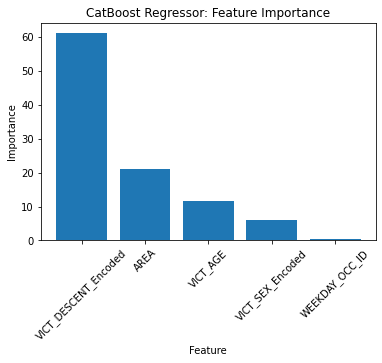

In [26]:
# Get feature importance
feature_importance = best_cat_model.get_feature_importance(prettified=True, type='PredictionValuesChange')

# Plotting feature importance
feature_names = feature_importance['Feature Id']
importance_values = feature_importance['Importances']
plt.bar(range(len(feature_names)), importance_values)
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Regressor: Feature Importance')
plt.show()

### Classification Models

Naive Bayes classifiers: particularly well-suited for classification tasks where the features are normally distributed.

In [19]:

from sklearn.naive_bayes import GaussianNB

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Parameter grid for Gaussian Naive Bayes
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

nb_model = GaussianNB()

grid_search = GridSearchCV(nb_model, param_grid, cv=5)

grid_search.fit(X_train, y_train)




# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)


nb_best_pred = grid_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, nb_best_pred))
print("Recall:", recall_score(y_test, nb_best_pred, average='macro'))
print("Precision:", precision_score(y_test, nb_best_pred, average='macro'))
print("F1 Score:", f1_score(y_test, nb_best_pred, average='macro'))


nb_cof = confusion_matrix(y_test, nb_best_pred)
nb_cr = classification_report(y_test, nb_best_pred)


print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))


Started at:  12:46:04
----------------------------------


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'var_smoothing': 1e-07}
Best cross-validated score:  0.26173735115965574
Accuracy: 0.2774396328078228
Recall: 0.006756756756756757
Precision: 0.0018745921135663703
F1 Score: 0.0029349208611071527
----------------------------------
Elapsed time: 0.03 minutes


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier (gini)

In [23]:
start_time = time.time()
current_time = datetime.now()
print('Started at: ',current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for the Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
dt_gini_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion='gini'), 
                                   param_grid=param_grid, 
                                   cv=5, 
                                   n_jobs=-1, 
                                   verbose=2)

# Fit the grid search to the data
dt_gini_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", dt_gini_grid_search.best_params_)
print("Best cross-validated score: ", dt_gini_grid_search.best_score_)

# Predict on the test set using the best found parameters
dt_gini_best_pred = dt_gini_grid_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_gini_best_pred))
print("Recall:", recall_score(y_test, dt_gini_best_pred, average='macro'))
print("Precision:", precision_score(y_test, dt_gini_best_pred, average='macro'))
print("F1 Score:", f1_score(y_test, dt_gini_best_pred, average='macro'))


dt_gini_cof = confusion_matrix(y_test, dt_gini_best_pred)
dt_gini_cr = classification_report(y_test, dt_gini_best_pred)

print('----------------------------------')
# Calculate elapsed time
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  12:49:08
----------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated score:  0.2937684641838619
Accuracy: 0.2770405108760726
Recall: 0.0067470365528268786
Precision: 0.0018761073188794572
F1 Score: 0.002935858393604872
----------------------------------
Elapsed time: 0.07 minutes


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thantthiri

#### Decision Tree Classifier (entropy)

In [24]:
start_time = time.time()
current_time = datetime.now()
print('Started at: ',current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for Decision Tree with entropy
param_grid_dt_entropy = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree with entropy
dt_entropy_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), 
                                      param_grid=param_grid_dt_entropy, 
                                      cv=5, 
                                      n_jobs=-1, 
                                      verbose=2)

# Fit the grid search to the data
dt_entropy_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found for Decision Tree with entropy: ", dt_entropy_grid_search.best_params_)
print("Best cross-validated score for Decision Tree with entropy: ", dt_entropy_grid_search.best_score_)

# Evaluate the predictions
dt_entropy_best_pred = dt_entropy_grid_search.best_estimator_.predict(X_test)


print("Accuracy:", accuracy_score(y_test, dt_entropy_best_pred))
print("Recall:", recall_score(y_test, dt_entropy_best_pred, average='macro'))
print("Precision:", precision_score(y_test, dt_entropy_best_pred, average='macro'))
print("F1 Score:", f1_score(y_test, dt_entropy_best_pred, average='macro'))


dt_en_cof = confusion_matrix(y_test, dt_entropy_best_pred)
dt_en_cr = classification_report(y_test, dt_entropy_best_pred)

print('----------------------------------')
# Calculate elapsed time
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  12:49:16
----------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters found for Decision Tree with entropy:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validated score for Decision Tree with entropy:  0.3000299628335002
Accuracy: 0.2774396328078228
Recall: 0.006756756756756757
Precision: 0.0018745921135663703
F1 Score: 0.0029349208611071527
----------------------------------
Elapsed time: 0.08 minutes


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thantthiri

#### Random Forest

In [26]:
start_time = time.time()
current_time = datetime.now()
print('Started at: ',current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'], 
    'max_depth': [None, 10],   
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Create a GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              n_jobs=-1, 
                              verbose=2)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found for Random Forest: ", rf_grid_search.best_params_)
print("Best cross-validated score for Random Forest: ", rf_grid_search.best_score_)

# Evaluate the predictions
rf_best_pred = rf_grid_search.best_estimator_.predict(X_test)


print("Accuracy:", accuracy_score(y_test, rf_best_pred))
print("Recall:", recall_score(y_test, rf_best_pred, average='macro'))
print("Precision:", precision_score(y_test, rf_best_pred, average='macro'))
print("F1 Score:", f1_score(y_test, rf_best_pred, average='macro'))


rf_cof = confusion_matrix(y_test, rf_best_pred)
rf_cof

print('----------------------------------')

# Calculate elapsed time
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  12:49:29
----------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

<b>Support Vector Machines with Kernel</b>

In [ ]:
start_time = time.time()
current_time = datetime.now()
print('Started at: ',current_time.strftime("%H:%M:%S"))


# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Type of kernel
}

# Create a GridSearchCV object for SVM
svm_grid_search = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
svm_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found for SVM: ", svm_grid_search.best_params_)
print("Best cross-validated score for SVM: ", svm_grid_search.best_score_)

# Evaluate the predictions using the best estimator
svm_best_pred = svm_grid_search.best_estimator_.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, svm_best_pred))
print("Recall:", recall_score(y_test, svm_best_pred, average='macro'))
print("Precision:", precision_score(y_test, svm_best_pred, average='macro'))
print("F1 Score:", f1_score(y_test, svm_best_pred, average='macro'))

# Confusion Matrix
svm_cof = confusion_matrix(y_test, svm_best_pred)
svm_cof


# Calculate elapsed time
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

In [ ]:
print(classification_report(y_test, svm_best_pred))

### 4.4.Comparison on the models

<b>Plotting Confustion Matrix</b>

Confusion matrices are crucial in evaluating the performance of classification models, showing the counts of true positives, false positives, true negatives, and false negatives.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted for 3 subplots

ConfusionMatrixDisplay(confusion_matrix=dt_gini_cof).plot(ax=ax[0], values_format='d')
ax[0].set_title('Decision Tree Gini Confusion Matrix')

ConfusionMatrixDisplay(confusion_matrix=dt_en_cof).plot(ax=ax[1], values_format='d')
ax[1].set_title('Decision Tree Entropy Confusion Matrix')

ConfusionMatrixDisplay(confusion_matrix=rf_cof).plot(ax=ax[2], values_format='d')
ax[2].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

Based on these metrics above, the Random Forest model performs slightly better in terms of accuracy, recall, precision, and F1 score compared to the Decision Tree with the Gini criterion and the entropy criterion. <br/>
However,to choose the best model,not only these metrics but also factors such as computational complexity, scalability, and maintenance costs should be considered.Random Forest model typically involves more computational cost due to the ensemble of trees but might generalize better when provided with more data. On the other hand, Decision Trees are simpler and faster but may not perform as well on unseen data.
</br>
Between 2 decision Trees,  The Gini model performs slightly better in terms of accuracy, recall, and F1 score, while the entropy model excels in precision and cross-validated score.A simpler model may be preferable since it performs only slightly worse than a more complex model.The Gini model will be chosen to favour higher recall.

## 4.5.Final Model

<b>Model Interpretation on tree-based model (Gini)</b>

In [ ]:
# Assuming X_train is a NumPy array
X_train = pd.DataFrame(X_train)  # Convert to a DataFrame

# Now you can access the columns
features = X_train.columns


# Assume dt_gini_model is your trained Decision Tree model
feature_importance = dt_gini_model.feature_importances_

plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

<b>Model Validation</b>

Plotting learning curves, which is a great way to check for overfitting or underfitting.

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    dt_gini_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

The training score starts high and remains high, indicating that the model is fitting the training data well.
</br>
The cross-validation score starts low and slightly increases, but there is a large gap between the training and cross-validation scores. This indicates that the model is not generalizing well and is likely overfitting the training data. Overfitting happens when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
</br>
Ideally, both lines should converge to a point where the training score decreases slightly and the cross-validation score increases to a point of stability. Both scores should be as high as possible.



In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

<b>Final Model Training</b>

In [ ]:

final_model = RandomForestClassifier(**rf_grid_search.best_params_)
final_model.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))


In [ ]:
final_model.version = '1.0'
final_model.pandas_version = pd.__version__
final_model.numpy_version = np.__version__
final_model.sklearn_version = sklearn_version
final_model.X_columns = [col for col in X_train.columns]
final_model.build_datetime = datetime.datetime.now()

In [ ]:
modelpath = '../models'
save_file(best_model, 'top5_crime_cat_model.pkl', modelpath)